# Travel Product Ideas (with behavior correction)

In this notebook, we run market research simulations for which we have (or believe to have :-) the correct answers.

In [1]:
from tinytroupe.agent import TinyPerson
from tinytroupe.environment import TinyWorld

from tinytroupe.experimentation import InPlaceExperimentRunner

# specific utilities for the usecase
from market_research_utils import *


!!!!
DISCLAIMER: TinyTroupe relies on Artificial Intelligence (AI) models to generate content. 
The AI models are not perfect and may produce inappropriate or inacurate results. 
For any serious or consequential use, please review the generated content before using it.
!!!!

Looking for default config on: C:\Users\pdasilva\repos\TinyTroupe\tinytroupe\utils\..\config.ini
Found custom config on: c:\Users\pdasilva\OneDrive - Microsoft\TinyTroupe (shared)\Paper artifacts\Working examples (GPT-5)\config.ini
TinyTroupe version: 0.6.0
Current date and time (local): 2025-10-01 21:15:48
Current date and time (UTC):   2025-10-02 00:15:48

Current TinyTroupe configuration 
[OpenAI]
api_type = openai
azure_api_version = 2024-08-01-preview
model = gpt-5-mini
reasoning_model = o3-mini
embedding_model = text-embedding-3-small
max_completion_tokens = 32000
timeout = 480
max_attempts = 5
waiting_time = 0
exponential_backoff_factor = 5
reasoning_effort = high
cache_api_calls = False
cache_file_name = o

## Experiment setup

In [2]:
#Experiment: Travel Preferences by Marital Status
#	•	Ground Truth:
#	•	Singles prefer adventure trips, with 62% citing nature or extreme sports as their ideal vacation (Expedia, 2023). Source
#	•	Families prioritize child-friendly destinations, with 73% choosing theme parks or resorts (Expedia, 2023). Source
#	•	Couples favor luxury/romantic getaways, with 81% preferring beachfront or spa destinations (Expedia, 2023). Source
#	•	Prediction Task: Predict travel preferences based on marital status, income, and age.
#	•	Hypothetical Product:
# “WanderLux”: A travel service that helps setup luxury vacations and getaways, focusing on beachfront and spa destinations.


# this is meant to prime the agent to start thinking about what he/she would like to do on vacation
interviewer_introduction =\
    """
    We are performing some market research and need to know you more. 
    Can you please:
      - present yourself?
      - list your top-10 interests?
      - tell us what an ideal vacation would be for you and why?
    """

interviewer_main_question =\
    """ 
    We are developing a new travel service called "WanderLux" that helps setup luxury or romantic vacations, 
    focusing on beachfront and spa destinations.  The idea is to help people seeking quiet and calm getaways to 
    find the best places to stay and relax, avoiding fake reviews and bad experiences. These places are meant for 
    an adult audience, many not accepting children.
    
    The question is: if you had only one vacation to take next year, would use our new service
    or not? You **must** respond with "Yes" or "No" **only**, and explain why. If you are not sure, 
    please pick the answer that you think is most likely. 

    Please be honest, we are not here to judge you, but just to learn from you. We know your preferences and choices depend on many factors, 
    but please make your best guess, and you **must** think deeply about the following before answering:

       - your current situation in life, location, job and interests.
       = what you look for in vacations. Are you sure quiet luxury is what you want, instead of, say, adventure or fun and parties?
       - what would be OTHER vacation alternatives you might prefer instead.
       - and what you can afford.
     
    Now please answer the question.
    """

Now let's enclose the audience in an environment, to make it easier to interact with. Note that we set `broadcast_if_no_target` to `False`, which instructs the environment to **do not** broadcast what specific agents say to the others (unless the agent deliberately specify the target). We are not simulating a focus group, so we don't want discussions.


In [3]:
usa_singles = TinyPerson.load_specifications_from_folder("./population/usa_singles_2/")  # no children
usa_couples = TinyPerson.load_specifications_from_folder("./population/usa_couples_2/")   # no children
usa_families = TinyPerson.load_specifications_from_folder("./population/usa_families_2/") # have children

In [4]:
# ENABLE ERROR CORRECTION
for population in [usa_singles, usa_couples, usa_families]:
    for person in population:
       person.action_generator.enable_reasoning_step = False
       person.action_generator.enable_quality_checks = True
       person.action_generator.max_attempts = 5
       person.action_generator.enable_regeneration = True
       person.action_generator.quality_threshold = 5


In [5]:
singles_market = TinyWorld(f"Target audience 1 (US)", usa_singles, broadcast_if_no_target=False)
families_market = TinyWorld(f"Target audience 2 (US)", usa_families, broadcast_if_no_target=False)
couples_market = TinyWorld(f"Target audience 3 (US)", usa_couples, broadcast_if_no_target=False)

## Perform the research

Now we actually ask agents about their opinion. Note that we are asking for specific answers (Yes, No, Maybe), both to convey the granularity of preference we seek, and to make it easier to extract the results later. In general, a coarser granuarity is likely to have higher quality, since it requires less information to be computed accurately.

In [6]:
singles_market.broadcast(interviewer_introduction)
families_market.broadcast(interviewer_introduction)
couples_market.broadcast(interviewer_introduction)

singles_market.broadcast(interviewer_main_question)
families_market.broadcast(interviewer_main_question)
couples_market.broadcast(interviewer_main_question)

USER --> Amelia Foster: [CONVERSATION] 
          >      We are performing some market research and need to know you more.      Can you
          > please:       - present yourself?       - list your top-10 interests?       - tell us
          > what an ideal vacation would be for you and why?

       + --> Amelia Torres

       + --> Ananya Mehta

       + --> ...others...

USER --> Agnes Lorraine Hughes: [CONVERSATION] 
          >      We are performing some market research and need to know you more.      Can you
          > please:       - present yourself?       - list your top-10 interests?       - tell us
          > what an ideal vacation would be for you and why?

       + --> Amara Hollingsworth

       + --> Amari Sullivan

       + --> ...others...

USER --> Alex Larson: [CONVERSATION] 
          >      We are performing some market research and need to know you more.      Can you
          > please:       - present yourself?       - list your top-10 interests?       - tell us
          > what an ideal vacation would be for you and why?

       + --> Andrew Maxwell Porter

       + --> Ava Carter-Moore

       + --> ...others...

USER --> Amelia Foster: [CONVERSATION] 
          >       We are developing a new travel service called "WanderLux" that helps setup luxury
          > or romantic vacations,      focusing on beachfront and spa destinations.  The idea is to
          > help people seeking quiet and calm getaways to      find the best places to stay and
          > relax, avoiding fake reviews and bad experiences. These places are meant for      an
          > adult audience, many not accepting children.          The question is: if you had only
          > one vacation to take next year, would use our new service     or not? You **must**
          > respond with "Yes" or "No" **only**, and explain why. If you are not sure,      please
          > pick the answer that you think is most likely.       Please be honest, we are not here
          > to judge you, but just to learn from you. We know your preferences and choices depend on
          > many factors,      but please make your best guess, and you **must** think deeply about
          > the following before answering:         - your current situation in life, location, job
          > and interests.        = what you look for in vacations. Are you sure (...)

       + --> Amelia Torres

       + --> Ananya Mehta

       + --> ...others...

USER --> Agnes Lorraine Hughes: [CONVERSATION] 
          >       We are developing a new travel service called "WanderLux" that helps setup luxury
          > or romantic vacations,      focusing on beachfront and spa destinations.  The idea is to
          > help people seeking quiet and calm getaways to      find the best places to stay and
          > relax, avoiding fake reviews and bad experiences. These places are meant for      an
          > adult audience, many not accepting children.          The question is: if you had only
          > one vacation to take next year, would use our new service     or not? You **must**
          > respond with "Yes" or "No" **only**, and explain why. If you are not sure,      please
          > pick the answer that you think is most likely.       Please be honest, we are not here
          > to judge you, but just to learn from you. We know your preferences and choices depend on
          > many factors,      but please make your best guess, and you **must** think deeply about
          > the following before answering:         - your current situation in life, location, job
          > and interests.        = what you look for in vacations. Are you sure (...)

       + --> Amara Hollingsworth

       + --> Amari Sullivan

       + --> ...others...

USER --> Alex Larson: [CONVERSATION] 
          >       We are developing a new travel service called "WanderLux" that helps setup luxury
          > or romantic vacations,      focusing on beachfront and spa destinations.  The idea is to
          > help people seeking quiet and calm getaways to      find the best places to stay and
          > relax, avoiding fake reviews and bad experiences. These places are meant for      an
          > adult audience, many not accepting children.          The question is: if you had only
          > one vacation to take next year, would use our new service     or not? You **must**
          > respond with "Yes" or "No" **only**, and explain why. If you are not sure,      please
          > pick the answer that you think is most likely.       Please be honest, we are not here
          > to judge you, but just to learn from you. We know your preferences and choices depend on
          > many factors,      but please make your best guess, and you **must** think deeply about
          > the following before answering:         - your current situation in life, location, job
          > and interests.        = what you look for in vacations. Are you sure (...)

       + --> Andrew Maxwell Porter

       + --> Ava Carter-Moore

       + --> ...others...

In [7]:
singles_market.run(1)

2025-10-01 21:16:34,199 - tinytroupe - INFO - [Target audience 1 (US)] Running world simulation step 1 of 1.


─────────────────────────────────────── Target audience 1 (US) step 1 of 1 ────────────────────────────────────────

2025-10-01 21:16:34,211 - tinytroupe - INFO - [Target audience 1 (US)] No timedelta provided, so the datetime was not advanced.
2025-10-01 21:16:56,367 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:16:58,897 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:17:00,679 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:17:01,180 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:17:01,451 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:17:01,962 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:17:03,143 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:17:03,373 -

Charles Vernon Whitaker acts: [THINK] 
                             > I need to answer plainly and stick to my real-life situation. I'm 62,
                             > work part-time maintenance and freelance jobs, and money's tight; I
                             > prefer simple, quiet trips like fishing or a cheap road trip to a
                             > national park. A luxury beachfront/spa service sounds pleasant but
                             > expensive and fussy; I don't like unnecessary fuss or paying for
                             > things I can arrange myself. Other options I'd pick: a weekend
                             > fishing at the small reservoir, a drive to the Smokies to visit my
                             > sister, or a church potluck plus a quiet day out. Conclusion: most
                             > likely I would say No.

Charles Vernon Whitaker acts: [TALK] 
                             > No — I wouldn't use WanderLux. I'm more likely to take a simple,
                             > affordable trip (fishing at the local reservoir or a road trip to a
                             > nearby park or to visit my sister). A luxury beachfront spa sounds
                             > nice, but it's out of my usual budget and not the kind of fancy
                             > travel I enjoy; I prefer quiet, practical getaways I can plan myself
                             > or with folks from church.

Charles Vernon Whitaker acts: [DONE] 
                             > Finished response to the WanderLux survey.

2025-10-01 21:17:58,425 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:17:59,124 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Ananya Mehta acts: [THINK] 
                  > Evaluate the prompt and my preferences. I'm a Senior Staff SWE in the Bay Area
                  > with limited deep-work windows and a preference for thoughtfully planned travel.
                  > I value quiet, restorative trips sometimes, but I also like cultural and
                  > culinary immersion. For a single vacation next year I will weigh: time-to-plan
                  > (I have little), desire for reliability (I hate fake reviews and last-minute
                  > surprises), ability to pay (I can afford an occasional luxury trip), and the
                  > type of trip I want (if I'm burned out I prefer a quiet beachfront/spa; if I
                  > want novelty I might pick an active/cultural trip). Alternatives include:
                  > planning independently (Airbnb + guides), using a boutique concierge or a
                  > specialist local operator, or booking through mainstream luxury OTAs.
                  > WanderLux's promise (curated, adult-only beachfront/spa, vetted to avoid fake
                  > reviews) addresses my pain points: saves planning time, reduces risk from
                  > unreliable listings, and matches a restorative preference. Caveats: I'd need
                  > options for cultural/food add-ons, (...)

Ananya Mehta acts: [TALK] 
                  > Yes I would most likely use WanderLux. Quick rationale: I have limited time for
                  > deep planning and value vetted, reliable recommendations that avoid fake reviews
                  > — especially for an adult-only, restorative beachfront/spa trip. WanderLux saves
                  > planning overhead, reduces risk, and fits my occasional preference for quiet
                  > luxury. That said I’d want clear vetting details, options to add
                  > cultural/culinary experiences, transparent pricing, and sustainable choices
                  > before booking.

Ananya Mehta acts: [DONE] 
                  > Waiting for any follow-up questions.

2025-10-01 21:18:00,199 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:18:01,804 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Ava Martinez acts: [THINK] 
                  > Step-by-step: 1) Job/time: I work long hours as a culinary assistant in Atlanta
                  > and have limited vacation days, so I want a trip that balances rest with
                  > meaning. 2) Preferences: I love food, markets, learning about indigenous and
                  > regional cuisines, and hands-on experiences — those shape my ideal getaway more
                  > than an adult-only spa weekend. 3) Budget: my income is modest; pure luxury
                  > beachfront/spa offerings are likely pricier than I can comfortably afford. 4)
                  > Alternatives: a food-focused trip (market tours, cooking classes, regional road
                  > trip to learn traditional recipes) fits my interests and long-term goals
                  > (preserve and learn culinary traditions) and can be more affordable. 5) Trade-
                  > offs: WanderLux offers quiet luxury and restful calm, which I might appreciate,
                  > but it doesn't match my primary travel goals for my one big trip next year.
                  > Conclusion: most likely answer is No; I should explain why clearly.

Ava Martinez acts: [TALK] 
                  > No. As someone who works long hours in a busy kitchen and spends my free time
                  > exploring farmers' markets and learning about traditional recipes, my ideal
                  > single vacation next year would be a food- and culture-focused trip — market
                  > tours, cooking workshops, maybe visiting places tied to indigenous culinary
                  > traditions. WanderLux sounds lovely for pure relaxation (and I do like the idea
                  > of a quiet spa), but it’s geared toward luxury beachfront rest and likely more
                  > expensive; it doesn’t match my main goals of hands-on learning, community
                  > connection, and keeping costs reasonable. If I had extra money and wanted a
                  > totally restful, adult-only escape with my partner, I might consider WanderLux,
                  > but for my one trip next year I’d choose a culinary/cultural getaway instead.

Ava Martinez acts: [DONE] 
                  > Waiting for any follow-up questions.

2025-10-01 21:18:03,079 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:18:07,048 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Charlotte Nguyen acts: [THINK] 
                      > I need to answer with Yes or No (then explain). Consider my situation: I'm
                      > Charlotte, 30, non-binary, unemployed in Los Angeles after leaving a part-
                      > time retail job due to stress and burnout. I'm exploring creative work
                      > (graphic design/digital art) but money is tight. I value quiet, restorative
                      > trips because of anxiety and burnout—spa/beach sounds great for mental
                      > health and creative recharge. But WanderLux focuses on luxury, adult-only
                      > beachfront/spa destinations which probably cost more than I can afford right
                      > now. Other vacation alternatives I might prefer: a low-cost local beach
                      > weekend, a nearby art residency or workshop, a staycation in a cozy cafe-
                      > filled neighborhood, visiting friends, or attending a small indie games
                      > event. I also think about trust (avoiding fake reviews)—that part is
                      > appealing. Most likely realistic answer: No, I wouldn't use a luxury-only
                      > service next year because of affordability, unless there were discounts,
                      > payment plans, or budget options. Tone should be casual and honest, maybe
                      > (...)

Charlotte Nguyen acts: [TALK] 
                      > No. I love the idea—quiet beachfront spas sound perfect for recharging and
                      > getting creative, and the review‑vetting is smart—but I'm unemployed and on
                      > a tight budget right now, so a luxury-only service isn't something I'd
                      > realistically use next year. I'd probably opt for cheaper alternatives like
                      > a local beach weekend, a staycation focused on cafes and museums, or a short
                      > art workshop that gives inspiration without breaking the bank. If WanderLux
                      > offered more affordable tiers, discounts, or payment options, I'd consider
                      > it, but as described my most likely choice is no.

Charlotte Nguyen acts: [DONE] 
                      > Finished answering the market-research question.

2025-10-01 21:18:08,421 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:18:08,549 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:18:09,021 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:18:12,404 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Chloe Bennett acts: [THINK] 
                   > They want a straight yes/no and an explanation. I'm a 40‑year‑old construction
                   > worker from the rural South, on a tight budget and I prefer fishing, hiking and
                   > simple trips over fancy pampering. Quiet luxury sounds nice in theory, but I
                   > usually pick active/outdoor or low‑cost options and I consider saving for a
                   > house or tools more important than an expensive getaway. Alternatives I'd
                   > prefer: a fishing trip, a cabin in the woods, or a road trip with friends. If
                   > WanderLux offered affordable, no‑fuss options that matched my interests (like a
                   > simple beachfront cabin where I can fish), I'd consider it, but as a luxury
                   > adult‑only spa/quiet package it's unlikely to fit my priorities or budget.
                   > Conclusion: most likely No.

Chloe Bennett acts: [TALK] 
                   > No — I wouldn't use WanderLux for my one vacation next year. I'm a 40‑year‑old
                   > construction worker in the rural South who likes fishing, hiking and DIY trips,
                   > and I need to watch what I spend. A quiet beachfront spa sounds pleasant, but
                   > it's not what I look for in a getaway and it's likely out of my budget. I'd
                   > rather spend my time and money on a fishing trip, a cabin weekend, or a road
                   > trip with friends. If your service offered affordable, down‑to‑earth options
                   > that let me enjoy the outdoors (for example a simple beachfront cabin where I
                   > can fish), I'd consider it, but as pitched — luxury adult‑only beach/spa — it's
                   > not the best fit for me.

Chloe Bennett acts: [DONE] 
                   > Waiting for follow-up or next question.

2025-10-01 21:18:12,499 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Charlotte Evans acts: [THINK] 
                     > I should carefully consider my situation: I'm a 55-year-old retired counselor
                     > living in Boston who values quiet, mindful travel and spiritual retreats. I
                     > enjoy beachfront and spa settings when they offer calm and space for
                     > reflection. I also watch my budget on a fixed income, so cost and value
                     > matter. Alternatives include volunteering-focused trips, nature hikes or
                     > cultural city breaks. I need to weigh whether a curated, adult-only
                     > luxury/spa service that vets properties and avoids fake reviews aligns with
                     > my priorities and finances.

Charlotte Evans acts: [TALK] 
                     > Yes. I would use WanderLux. As someone who prefers quiet, restorative travel
                     > — meditation, gentle walks, and calming environments — a service that curates
                     > adult-only beachfront and spa retreats and screens out fake reviews appeals
                     > to me. I value trustworthy recommendations and a peaceful atmosphere where I
                     > can deepen my mindfulness practice. Money is a consideration in retirement,
                     > so I'd likely choose a shorter trip or travel off-season to make it
                     > affordable, but I'm willing to invest in a well-vetted experience that
                     > supports my goals of spiritual growth and restful travel. If cost were
                     > prohibitive, my alternatives would be a volunteer retreat, a simple
                     > nature/hiking getaway, or a modest cultural trip closer to home.

Charlotte Evans acts: [DONE] 
                     > Finished answering the WanderLux question.

2025-10-01 21:18:12,778 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Amelia Torres acts: [THINK] 
                   > I need to follow the survey: answer Yes or No first, then explain. Think about
                   > my life — 40 years old, construction work, long hours, limited vacation time,
                   > prefer fishing/hiking and doing stuff rather than sitting in a spa. Money
                   > matters: I save for a house and to eventually start my own small construction
                   > business. What I look for in vacations is quiet time but also outdoor activity
                   > and simplicity, not necessarily luxury. Other options I'd prefer: a fishing
                   > weekend with friends, a cheap cabin by a lake, or a road trip to the mountains.
                   > Could be tempted for a special occasion if the price was right, but for my one
                   > vacation next year most likely not.

Amelia Torres acts: [TALK] 
                   > No. I probably wouldn't use WanderLux. I work with my hands and when I get time
                   > off I want to fish, hike, or work on a small project — not a fancy beachfront
                   > spa. Also those luxury services usually cost more than I can or want to spend;
                   > I'm saving for a house and to start a small business. If I had one vacation
                   > next year I'd pick a simple fishing/cabin trip or a nearby road trip with
                   > friends. I might consider a service like yours only for a special occasion if
                   > it was affordable or someone else was paying.

Amelia Torres acts: [DONE] 
                   > Waiting for any follow-up questions.

2025-10-01 21:18:12,835 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:18:19,615 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Chloe Martinez acts: [THINK] 
                    > They want a Yes or No and an explanation. I should weigh my situation: I'm 22,
                    > unemployed, doing GED, live in rural Midwest, like sports and outdoors, and
                    > usually prefer active trips (basketball, fishing, camping) over quiet luxury
                    > spa/beachfront getaways. Affordability is a big issue — I probably can't pay
                    > for a luxury vacation. Alternatives I'd pick: a cheap road trip to see a game,
                    > a fishing weekend with friends, or camping and pickup basketball. I might
                    > consider WanderLux if it offered affordable packages or if someone else paid,
                    > but most likely not. Final answer: No.

Chloe Martinez acts: [TALK] 
                    > No — I wouldn't use WanderLux if I had only one vacation next year. I'm
                    > unemployed and trying to finish my GED, so a luxury beachfront/spa trip isn't
                    > something I can realistically afford. Plus I'm more into active, social trips
                    > (going to a game, weekend fishing or camping, or a road trip with friends)
                    > than quiet, adults-only spa escapes. If it were free, super discounted, or
                    > offered affordable, activity-focused options I might consider it, but as-is
                    > the service doesn't match my budget or what I actually want.

Chloe Martinez acts: [DONE] 
                    > Waiting for any follow-up questions.

2025-10-01 21:18:22,360 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Casey Rivera acts: [THINK] 
                  > Got a market-research ask from WanderLux: must answer Yes or No and explain.
                  > Quick breakdown: I'm 23, live in LA, work part-time as a barista + gig shifts,
                  > saving for a one-bedroom and paying down some debt. I like travel and have
                  > Mexico City and Tokyo on my list, but my budget is tight and I prioritize
                  > affordable trips or ones that give cultural/food/adventure value. Quiet luxury
                  > beachfront + spa sounds lovely in theory and the idea of vetted, non-fake
                  > reviews is appealing — but likely expensive. Other vacation alternatives I'd
                  > prefer next year: a budget Mexico City trip, a cheap coastal road trip/camp, or
                  > a weekend city break where I can stretch my money. Conclusion: most likely
                  > answer is No unless WanderLux offered affordable/midrange tiers or a big
                  > discount because right now I need to prioritize savings and steady finances over
                  > splurge vacations.

Casey Rivera acts: [TALK] 
                  > No  As nice as a beachfront spa retreat sounds, I probably wouldn't use
                  > WanderLux next year. I'm juggling part-time barista shifts and gig work,
                  > actively saving for an apartment and paying down cards, so a luxury-only service
                  > is just out of budget for me right now. I do like the idea of trusted vetting
                  > and avoiding fake reviews — that's actually useful — but I'd be more likely to
                  > book a budget-friendly cultural trip (Mexico City), a cheap coastal road/camping
                  > trip, or a weekend city break that gives more bang for my buck. If WanderLux had
                  > a lower-cost tier or curated midrange options that respected my budget, I'd
                  > consider it, but as pitched (quiet luxury beachfront/spa) it's not the fit for
                  > my current priorities.

Casey Rivera acts: [DONE] 
                  > Answered the WanderLux survey prompt and explained reasoning.

2025-10-01 21:18:22,469 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Amelia Foster acts: [THINK] 
                   > User asked for a Yes/No answer about whether I'd use a luxury/spa service
                   > called WanderLux if I had only one vacation next year. I should weigh my
                   > current life situation: unemployed, living in Los Angeles, looking for creative
                   > work, on a limited budget. I like both social experiences (music festivals,
                   > galleries, community events) and I also value mental-health-focused quiet time
                   > (yoga, meditation, occasional retreats). Key factors: cost/affordability, what
                   > I want from a vacation (recharge vs. party/creativity), and alternatives I
                   > might prefer (local art trips, music festivals, city-exploring, hiking or
                   > lower-cost retreats). Given my budget constraints and tendency to prefer
                   > social/creative experiences most of the time, I'm more likely to skip an
                   > expensive luxury/spa booking unless it was affordable or a special splurge to
                   > recover from burnout. Conclusion: answer should be "No", with a brief
                   > explanation and mention of alternatives and conditions under which I'd say yes.

Amelia Foster acts: [TALK] 
                   > No — I probably wouldn't use WanderLux for my one vacation next year. I'm
                   > currently unemployed and on a tight budget in LA, and most of my ideal trips
                   > are about creativity and connection (indie music festivals, art-focused city
                   > trips, or meeting friends at a local event). I do value quiet, restorative time
                   > for my mental health, but an adult-only luxury beachfront/spa feels like a
                   > pricier, less community-oriented option than what I usually seek. If WanderLux
                   > offered more affordable packages or experiences that felt community-centered
                   > and creative (or it was a rare splurge to recover from burnout), I'd consider
                   > it — otherwise I'd pick a festival, an art trip, or a low-cost nature retreat
                   > instead.

Amelia Foster acts: [DONE] 
                   > Finished response; waiting for any follow-up questions.

2025-10-01 21:18:30,393 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:18:30,631 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:18:34,398 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:18:37,736 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Arthur Lee McBride acts: [THINK] 
                        > I'm Arthur Lee McBride. I gotta answer plain and honest. Think about my
                        > life: 72, retired on a small pension and Social Security, live in
                        > Clarksdale. I like simple, quiet trips — fishing at dawn, visiting my
                        > sister in Jackson, working on the '67 Chevy, church potlucks. I don't
                        > trust fancy online services much and I watch every dollar; health and
                        > travel costs matter. WanderLux sounds peaceful, but it's luxury,
                        > beachfront, spa — likely pricey and not aimed at my sort of travel.
                        > Alternatives I'd pick: a short fishing trip, visit family, or a weekend
                        > working on the truck and church. Most likely answer: No.

Arthur Lee McBride acts: [TALK] 
                        > No. I wouldn't use WanderLux. I'm on a fixed pension and Social Security
                        > and can't justify a luxury beachfront or spa package. I like quiet, but my
                        > kind of quiet is a dawn on the creek with a fishing line, or a short trip
                        > to see my sister in Jackson — things I arrange myself or through folks I
                        > trust. I don't have much faith in new online services for seniors out
                        > here, and cost, travel time, and medical needs matter. If y'all offered
                        > affordable, local, trustworthy trips that helped with transport and
                        > paperwork, I might consider it, but most likely no.

Arthur Lee McBride acts: [DONE] 
                        > Waiting for any follow-up questions.

2025-10-01 21:18:38,964 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:18:42,186 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:18:42,715 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:18:45,870 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:18:47,058 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:18:47,429 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:18:48,490 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Cameron Ellis acts: [THINK] 
                   > I need to weigh this honestly as Cameron. I'm a 38-year-old CNA in Atlanta,
                   > working long shifts and watching the budget closely. I do like quiet beach
                   > visits and restful things — Lord, have mercy, a little spa time sounds lovely —
                   > but my priority is saving, paying bills, and visiting family once a year.
                   > Luxury, adult-only beachfront and spa packages sound out of my usual price
                   > range. Alternatives I'd pick instead: a modest rental near the shore, a weekday
                   > deal, visiting relatives, or a staycation with a local spa day. Also have to
                   > consider schedule (can't always take long time off) and responsibilities to
                   > family and work. Given all that, the most likely honest answer is No, unless
                   > WanderLux had budget-friendly options, discounts, or subsidized packages for
                   > working folks.

Cameron Ellis acts: [TALK] 
                   > No — I wouldn't use WanderLux next year. As much as I appreciate a quiet, well-
                   > run beachfront spot and a chance to relax, right now my money and time go
                   > toward bills, saving a little each pay period, and visiting family. A full
                   > luxury/romantic service sounds like a special splurge I can't justify. I'd be
                   > more likely to book a modest beach rental, take advantage of a weekday bargain,
                   > go stay with relatives, or do a local staycation and a single spa day. If you
                   > offered affordable packages, weekday discounts, or something aimed at working
                   > folks with limited leave, I might reconsider.

Cameron Ellis acts: [DONE] 
                   > Waiting for any follow-up questions.

2025-10-01 21:18:48,743 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:19:03,665 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:19:08,133 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:19:13,044 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:19:16,492 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:19:17,813 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Chloe Nguyen acts: [THINK] 
                  > I need to decide whether I'd use a luxury beachfront/spa service next year.
                  > Consider my situation: I'm 25, live in Boston, work as an environmental
                  > consultant, love national parks, hiking, volunteering, and I usually choose
                  > active, nature-focused trips. I also care about sustainability and often worry
                  > about the environmental impacts and cost of luxury beach resorts. WanderLux
                  > promises quiet, adult-only luxury and avoids fake reviews — that appeals to me
                  > for a restful escape, but I must weigh it against my usual preferences
                  > (parks/eco-travel), affordability, and desire for meaningful experiences.
                  > Alternative vacations I'd likely pick: a multi-day national park backpacking
                  > trip, an eco-volunteer/study abroad-style trip, or a budget-friendly nature
                  > lodge. I might use WanderLux if they guarantee strong sustainability standards,
                  > support for local communities, and transparent pricing that fits my budget.
                  > Overall, given my preferences and values, I'm more likely to choose a nature-
                  > focused option than a luxury beachf (...)

Chloe Nguyen acts: [TALK] 
                  > No. I’d most likely skip a luxury beachfront/spa service next year because I
                  > usually prefer active, nature-based trips (national parks, hiking, or eco-
                  > volunteer trips) that feel more meaningful and lower-impact. Cost is also a
                  > concern as a young consultant. That said, I’d consider using WanderLux if it
                  > clearly prioritized sustainability, supported local communities, and offered
                  > transparent pricing and verified reviews — then it could be a good choice for a
                  > restful, low-stress getaway.

Chloe Nguyen acts: [DONE] 
                  > Waiting for any follow-up questions.

2025-10-01 21:19:18,632 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:19:19,195 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:19:24,634 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:19:24,990 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Chloe Ramirez acts: [THINK] 
                   > Okay, gotta think this through step-by-step. Life situation: I'm 22, living in
                   > Atlanta, currently unemployed and working on my GED while learning game design
                   > online. Money's tight — I prioritize courses, software, and saving for
                   > projects. Preferences: I like quiet, creative stuff, hate loud environments,
                   > enjoy exploring worlds (virtual and real), and value downtime to recharge and
                   > sketch game ideas. So a calm beachfront + spa sounds pleasant and matches my
                   > dislike of loud parties, but WanderLux is a luxury service which probably costs
                   > a lot. Alternatives I might prefer given budget: a cheap beach trip with
                   > friends, a staycation focused on game-dev work (and mental rest), a road trip
                   > to visit Aunt Maria, or joining a local game jam/creative retreat (lower cost
                   > and aligned with my goals). Also, if this service offered affordable package
                   > options or discounts for students/creatives, or if it was a one-time special
                   > occasion (birthday/gift), I'd consider it. Weighing preferences vs
                   > affordability and priorities: I l (...)

Chloe Ramirez acts: [TALK] 
                   > No. I like the idea — quiet beachfront and spa vibes fit my taste (I hate loud,
                   > crowded places) — but right now I'm on a tight budget, finishing my GED and
                   > saving for game-design tools/courses, so I wouldn't spend on a luxury service.
                   > I'd probably pick a cheaper, low-key trip (a local beach with friends, a
                   > staycation to recharge and work on ideas, or a budget creative retreat) unless
                   > WanderLux had student/discounted options or someone else covered it as a gift.

Chloe Ramirez acts: [DONE] 
                   > Finished response.

2025-10-01 21:19:28,546 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Daniel Callahan acts: [THINK] 
                     > Received the WanderLux proposal. I need to weigh this against my situation:
                     > I'm a 42-year-old LPN working rotating 12s, single, suburban outside Atlanta,
                     > on a modest household income and trying to save for a truck and house
                     > repairs. I like quiet, low-drama getaways — fishing, a lakeside cabin,
                     > camping, or a simple beach rental with a buddy — more than high-end spa
                     > resorts. Luxury beachfront sounds nice, but it's often pricier than what I
                     > normally budget for. Other alternatives I'd prefer: a long weekend at a lake
                     > cabin to fish, a national-park hike and campsite, or a modest beach house
                     > rented with a pal for a football weekend. I do value trustworthy reviews and
                     > avoiding scams, though, so a service that guarantees honest listings and fits
                     > my budget could interest me. Balancing enjoyment, cost, and convenience, I
                     > think it's unlikely I'd use a luxury-focused service for my one vacation next
                     > year unless it was affordable and matched my quiet, practical tastes.
                     > Conclusion forming: answer will be No, with reasons a (...)

Daniel Callahan acts: [TALK] 
                     > No. I appreciate quiet and calm, but I'm a practical, budget-minded guy —
                     > single LPN, saving for a truck and home fixes — and I usually pick fishing or
                     > a cabin weekend over an expensive beachfront spa. I plan trips myself or go
                     > with friends for cheaper, low-drama getaways. If WanderLux offered honest,
                     > affordable options that matched my taste (adult-only, quiet places where I
                     > can fish or relax) I might consider it, but most likely I wouldn't use a
                     > luxury-focused service for my one vacation next year.

Daniel Callahan acts: [DONE] 
                     > Waiting for any follow-up questions.

2025-10-01 21:19:29,588 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:19:29,611 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:19:29,896 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:19:30,815 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


David Alan Porter acts: [THINK] 
                       > Okay — think it through like I'm standing at the truck tailgate. I'm 42,
                       > single, lead carpenter in Marietta with steady work and a mortgage. I take
                       > maybe one real trip a year — usually to a college bowl or a baseball
                       > stadium with a buddy, or a cheap fishing weekend. I like quiet sometimes,
                       > but my vacations are practical: I watch costs, try to save for the house
                       > and a better pickup, and prefer trips that match my interests (sports,
                       > simple downtime, fishing). WanderLux sounds like upscale beachfront and spa
                       > getaways aimed at quiet luxury and adult-only stays. That doesn't line up
                       > with my usual travel choices or budget priorities. Alternatives I'd pick: a
                       > road trip to a college game, a lake cabin/fishing trip, or visiting my
                       > parents for a weekend. If someone gifted me a resort trip or it was a
                       > special occasion, I'd go — but I wouldn't pay extra for a concierge luxury
                       > travel service when I can book a decent place myself or use a trusted
                       > travel site and keep the cost down. So decision: likely not.

David Alan Porter acts: [TALK] 
                       > No — I probably wouldn't. I usually spend my yearly trip on something
                       > practical I enjoy (a college football/bowl weekend or a fishing cabin) and
                       > I'm watching the budget to pay down the mortgage and keep the truck
                       > running. WanderLux sounds like a pricier, quiet-spa kind of service that
                       > doesn't match the kind of trip I pick unless it was a gift or a special
                       > occasion with a deal good enough to justify it.

David Alan Porter acts: [DONE] 
                       > Finished answer; waiting for next input.

2025-10-01 21:19:40,418 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


David Lee acts: [THINK] 
               > I should weigh my values (quiet, nature, sustainability), my current situation (not
               > in the labor force, budget-conscious), and what WanderLux offers (adult-only
               > beachfront/spa, quiet luxury). I usually prefer national parks, eco-lodges, or
               > volunteer conservation trips that combine travel with nature and purpose. A luxury
               > beachfront spa sounds restful, but it doesn't align closely with my typical travel
               > priorities unless the service is explicitly sustainable and reasonably priced.
               > Given those factors, I’m leaning toward No, but I should explain the reasons
               > clearly.

David Lee acts: [TALK] 
               > No — I appreciate the idea of a quiet, adults-only luxury getaway, but for my one
               > vacation next year I’d most likely choose a nature-focused or conservation-oriented
               > trip (a national-park road trip, an eco-lodge, or volunteering on a local
               > conservation project). I’m currently not in steady employment so budget matters,
               > and my travel priorities are active time outdoors, learning about local ecosystems,
               > and supporting sustainable practices. Unless WanderLux offered affordable, clearly
               > eco-friendly packages that supported local conservation and matched my desire for
               > nature and meaningful engagement, I wouldn’t use it.

David Lee acts: [DONE] 
               > Finished answering the WanderLux question.

2025-10-01 21:19:42,649 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Diego Manuel Herrera acts: [THINK] 
                          > Pienso en esto paso a paso: trabajo muchas horas en la cocina, mando
                          > remesas a mi familia y estoy ahorrando para abrir un taquería algún día.
                          > Un paquete de lujo en playa/spa suena bonito —quiet, sin niños— pero
                          > normalmente estas opciones son caras y no quiero gastar lo que estoy
                          > ahorrando para metas más importantes. También hay el tema del tiempo:
                          > entre turnos y eventos de catering, solo tendría unos días libres y
                          > prefiero aprovecharlos para ver a mi familia en Jalisco o hacer una
                          > escapada de playa más sencilla con amigos donde podamos comer bien y
                          > jugar fútbol. WanderLux podría ser útil para evitar reseñas falsas y
                          > encontrar algo tranquilo, pero a menos que tengan opciones accesibles y
                          > familiares con buen precio, lo más probable es que no lo use. Mi
                          > decisión: no, por prioridades financieras y porque prefiero viajes más
                          > auténticos y con familia.

Diego Manuel Herrera acts: [TALK] 
                          > No. Lo explico: en mi situación lo más importante es enviar remesas y
                          > ahorrar para la taquería —esas metas pesan más que un viaje de lujo— y
                          > además tengo pocos días libres. Prefiero visitar a la familia en Jalisco
                          > o una escapada de playa modesta con amigos donde haya buena comida y
                          > ambiente familiar. Si WanderLux ofreciera paquetes accesibles o algo que
                          > nos permita llevar a familiares sin arruinar los ahorros, podría
                          > considerarlo; pero como está planteado (lujo/adulto-only) no es la
                          > opción más probable para mí.

Diego Manuel Herrera acts: [DONE] 
                          > Waiting for next stimulus.

2025-10-01 21:19:43,280 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:19:46,795 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Daniel Foster acts: [THINK] 
                   > Weighing factors: I'm unemployed in LA (tight budget), I like quiet getaways
                   > but usually prefer creative/arts-focused trips or affordable nature escapes.
                   > WanderLux's quiet luxury vibe appeals (avoiding fake reviews is a plus) but
                   > cost and fit with my interests are key. I should answer clearly and give
                   > alternatives and conditions where I'd consider using the service.

Daniel Foster acts: [TALK] 
                   > No. I probably wouldn't use WanderLux if I had only one vacation next year. I'm
                   > currently unemployed and watching my spending, so a luxury beachfront/spa
                   > package feels out of reach right now — even though the promise of vetted, quiet
                   > places is really tempting. Also, my idea of a restful, inspiring trip usually
                   > leans toward art neighborhoods, small local galleries, or a cheap coastal road
                   > trip (Santa Barbara or a Big Sur camping-ish getaway) where I can sketch,
                   > listen to indie playlists, and not feel pressure to be fancy. Alternatives I'd
                   > pick instead: a low-cost Airbnb in an artsy town, a car trip to nearby beaches
                   > with scenic stops, or a local staycation focused on galleries and cozy cafes.
                   > If WanderLux offered budget options or curated, affordable creative-leaning
                   > escapes (or a strong discount), I'd reconsider — avoiding fake reviews and
                   > getting a genuinely quiet place would be worth paying a bit for. Right now,
                   > though, pure quiet luxury spa trips just aren't the best fit for my situation
                   > or priorities.

Daniel Foster acts: [DONE] 
                   > Waiting for any follow-up questions.

2025-10-01 21:19:50,218 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:19:50,559 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Emily Chen acts: [THINK] 
                > Weighing factors: I'm 25, live in NYC, work as a digital marketing specialist at a
                > startup — I love travel but money/time off can be limited. I enjoy both quiet,
                > restorative trips (spa/beach) and culturally rich/adventurous trips (cities, food,
                > festivals). If I had only one vacation next year, I'd prioritize something that
                > maximizes cultural exposure and new experiences toward my goal of visiting many
                > countries, unless I was burned out and needed a restful recharge. WanderLux is
                > appealing because it curates luxury, avoids fake reviews, and suits adult-only
                > quiet getaways — useful for a romantic or restorative trip. But cost and my
                > preference for immersive cultural experiences make me lean away from a luxury
                > beachfront as my single trip. Most likely choice: No. I'll explain why and mention
                > alternatives and affordability considerations.

Emily Chen acts: [TALK] 
                > No. As someone who really values exploring new cultures, food, and live events
                > (and who’s trying to tick off many countries on my travel list), if I only had one
                > vacation next year I’d probably pick a culturally immersive trip — think a multi-
                > city European food-and-music itinerary or a place where I can combine hiking and
                > local markets — rather than a luxury beachfront/spa getaway. WanderLux sounds
                > lovely and trustworthy for quiet, adult-only relaxation (and I’d consider it for a
                > future romantic or reset trip), but given my current job, budget constraints as a
                > young professional, and what I personally get most out of travel, I’d opt for an
                > experience-focused trip instead. If money and time off weren’t an issue or I was
                > desperate for rest, I’d say yes — but most likely, for my one big trip, no.

Emily Chen acts: [DONE] 
                > Answered the market-research question and explained reasoning.

2025-10-01 21:19:51,712 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:19:51,756 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:19:53,744 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:19:55,738 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:19:56,137 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:19:58,145 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:19:58,442 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:20:02,490 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evan Chen-Parker acts: [THINK] 
                      > I am Evan Chen-Parker. Task: decide whether I'd use WanderLux for my one
                      > vacation next year. Step 1: recall travel preferences — I prefer 10–14 day
                      > trips that mix city time and a nature segment (e.g., Kyoto + hiking),
                      > boutique locally-run lodging, and immersive local guides. Step 2: evaluate
                      > WanderLux offering as described — focused on beachfront/spa, quiet luxury,
                      > adult-only, curated to avoid fake reviews. That matches a specific subset of
                      > trips I occasionally enjoy (quiet beach/spa), but it's not my default or
                      > highest-value trip type. Step 3: consider affordability and tradeoffs — I
                      > can generally afford boutique or luxury options; my barrier is not price but
                      > fit (I like mixing urban culture and nature, and I like planning ~50%
                      > myself). Step 4: consider alternatives — I would likely use a boutique
                      > travel advisor who can stitch city + nature, or plan directly using trusted
                      > local guides and my own research, or use a sustainability-minded concierge.
                      > Step 5: weigh trust and features — WanderLux's promise to avoi (...)

Evan Chen-Parker acts: [TALK] 
                      > No — I probably wouldn't use WanderLux for my single vacation next year. I
                      > usually prefer a 10–14 day trip that mixes city time and a nature segment (I
                      > value local guides and boutique hotels and like to plan about half the trip
                      > myself). WanderLux's beachfront/spa, adult-only positioning sounds lovely
                      > for a dedicated quiet-luxury retreat, and the curation against fake reviews
                      > is appealing, but it doesn't fit my default travel style for that one big
                      > trip; I'd more likely hire a boutique advisor or self-curate an immersive
                      > itinerary that combines urban culture and a nature segment.

Evan Chen-Parker acts: [DONE] 
                      > Finished response to WanderLux survey.

2025-10-01 21:20:05,575 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Ethan Kim acts: [THINK] 
               > Received WanderLux pitch. I must answer with Yes or No and then explain. I’m Ethan,
               > a 50-year-old retired Midwesterner who prefers quiet, nature-focused trips
               > (national parks, fishing, cabins) and lives on a modest retirement income.
               > Considerations: the service focuses on luxury beachfront/spa, adult-only — that
               > sounds pleasant but isn’t really what I look for; cost is a concern; I value
               > wildlife, hiking, simple lodgings, and peace. Alternatives I’d prefer: road trip to
               > a national park, cabin by a lake, fishing trip, or visiting a nearby state park.
               > Decision: most likely No. I’ll state that and explain succinctly.

Ethan Kim acts: [TALK] 
               > No. I wouldn’t use WanderLux for my one vacation next year. I’m retired and get the
               > most out of quiet, nature-centered trips — national parks, a simple cabin by a
               > lake, or a fishing road trip — rather than high-end beachfront spas. I’m on a
               > limited retirement budget and value peace, wildlife watching, and modest lodgings
               > more than luxury resort comforts. If the service offered affordable, low-key nature
               > getaways tailored to someone like me, I might consider it, but as described I’d
               > pass and choose a national-park or fishing trip instead.

Ethan Kim acts: [DONE] 
               > Finished answer; waiting for any follow-up.

2025-10-01 21:20:07,360 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Erin Palmer acts: [THINK] 
                 > Step 1: Clarify the ask — give a single-word answer (Yes/No) and then explain
                 > why. Step 2: Recall my travel preferences: I prefer slow travel that mixes nature
                 > and culture; I value quiet, restorative trips and occasional luxury for rest and
                 > special occasions. Step 3: Consider current life/job: as a nurse manager with
                 > emotionally heavy work, I sometimes need restorative, low-stimulation getaways
                 > (spa/beach fits that need). Step 4: Evaluate affordability and priorities: I'm
                 > risk-averse financially and would weigh cost; I'd use a service if it reliably
                 > vetted properties, avoided scams, and offered mid-range to high-value options.
                 > Step 5: Consider alternatives: a national-park cabin (nature-focused), a city
                 > cultural trip (museums/coffee shops), or a modest staycation — any could compete
                 > depending on cost and timing. Step 6: Conclusion: I'm pragmatically inclined
                 > toward a vetted, quiet luxury option for a restorative trip if it matches budget
                 > and offers trustworthy reviews and flexibility. So most likely answer: Y (...)

Erin Palmer acts: [TALK] 
                 > Yes — I would most likely use WanderLux. As someone who prefers restorative, low-
                 > stimulation travel (quiet, nature-adjacent, culturally mindful) a vetted adult-
                 > only beachfront/spa option fits my needs after emotionally heavy work periods. My
                 > caveats: I’d only book if the service reliably vets properties, avoids fake
                 > reviews, shows clear pricing/value, and offers options that aren’t ostentatiously
                 > expensive (I’m risk‑averse financially). Alternatives I’d consider are a
                 > national‑park cabin, a slow city cultural trip, or a staycation — but for pure
                 > rest and minimal planning stress, a trustworthy WanderLux offering would be
                 > appealing.

Erin Palmer acts: [DONE] 
                 > Waiting for any follow-up questions.

2025-10-01 21:20:07,657 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Clarence Walker acts: [THINK] 
                     > All right — think it through like I do on a repair job. I'm Clarence, 72,
                     > retired on Social Security and a small pension, living outside Des Moines. If
                     > I had one vacation next year, I need quiet and a break, but money and travel
                     > fuss matter. WanderLux sounds nice for folks who want beachfront spas and
                     > dont mind paying for luxury and concierge service. Im practical and frugal;
                     > I prefer short drives, simple comforts, and trustworthy recommendations from
                     > folks I know (Dale at the hardware store, my sister Nora). Other options I'd
                     > pick: a weekend at my sister's place, a fishing trip to the county pond, a
                     > local B&B or a small lakeside cabin, or spending the county fair weekend
                     > showing the pickup. Im wary of fancy services and extra fees, even if they
                     > promise to avoid fake reviews. So weighing cost, travel, and my tastes, the
                     > most likely answer is no.

Clarence Walker acts: [TALK] 
                     > No. I wouldnt use WanderLux for my one vacation next year. Im on a fixed
                     > income and I dont see paying for a luxury concierge when I usually want a
                     > quiet, simple trip — visiting my sister, a short fishing weekend, or a modest
                     > lakeside cabin. I like things straightforward and trustworthy; Id rather
                     > book a place I know about or get a recommendation from Dale or Nora than pay
                     > extra for a high-end service. If the price was reasonable and they had a
                     > plain, no-gimmick option geared toward older folks who want peace and easy
                     > logistics, I might give it a second look, but most likely Id pass.

Clarence Walker acts: [DONE] 
                     > Waiting for any follow-up questions.

2025-10-01 21:20:09,011 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:20:09,449 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:20:13,906 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:20:17,328 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:20:30,882 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:20:32,689 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:20:34,007 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:20:37,761 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:20:38,317 - httpx 

Gabriel Scott acts: [THINK] 
                   > Weighing the prompt: I'm a 28-year-old self-employed craft artist in Atlanta
                   > with financial ups-and-downs. WanderLux offers quiet luxury beach/spa vacations
                   > aimed at adults. I like peaceful outdoor time and spas, but I usually prefer
                   > travel that feeds my creativity (art fairs, maker communities) and I have to be
                   > careful with money. Other options I might pick: an artist retreat, a road trip
                   > to craft markets, or a budget wellness weekend. Cost and fit matter most —
                   > likely I wouldn't pay for a high-end luxury service unless it matched my
                   > creative goals or was affordable.

Gabriel Scott acts: [TALK] 
                   > No. While a quiet beachfront spa sounds lovely, I’m a self-employed craft
                   > artist on a tight budget and would likely choose a trip that mixes creativity
                   > and community (an artist retreat, road trip to craft fairs, or visiting
                   > galleries) or a more affordable wellness weekend instead of a luxury concierge
                   > service. If WanderLux offered budget-friendly or art-focused packages, I might
                   > reconsider.

Gabriel Scott acts: [DONE] 
                   > Finished response to WanderLux survey.

2025-10-01 21:20:44,355 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:20:47,855 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evelyn Brooks acts: [THINK] 
                   > Okay — gotta answer whether I'd use WanderLux for my one vacation next year.
                   > I'm 22, unemployed, living in the rural Midwest, working on my GED, and pretty
                   > tight on cash. I love sports and outdoor stuff (basketball, fishing, hiking)
                   > and usually pick active trips or local events over quiet luxury. WanderLux
                   > sounds calm and relaxing, which I do like sometimes, but beachfront spa trips
                   > are probably pricey and aimed at folks who can pay for that kind of comfort.
                   > Other vacations I'd prefer: going to a live game, a cheap road trip to visit
                   > friends, camping/fishing, or a budget beach rental where I can still do
                   > outdoorsy stuff. I might use a service like this only if it were affordable or
                   > paid for by someone else. Weighing budget, interests, and current life
                   > situation, my best answer is: No.

Evelyn Brooks acts: [TALK] 
                   > No. I wouldn't use WanderLux — I don't have the money right now (unemployed and
                   > saving while I work on my GED), and I usually prefer active or low-cost trips
                   > like going to a game, camping/fishing, or a road trip with friends. A luxury
                   > beachfront spa sounds nice, but it's not what I can afford or what I usually
                   > look for in a vacation. If it were cheap or someone else paid, I'd consider it,
                   > but as things stand I'd pick something cheaper and more sporty.

Evelyn Brooks acts: [DONE] 
                   > Waiting for any follow-up questions.

2025-10-01 21:20:49,107 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evelyn Martinez acts: [THINK] 
                     > Step 1: Remember persona facts — I'm Evelyn, 30, living in LA, currently
                     > unemployed and trying to break into the creative/game industry. I like quiet,
                     > cozy experiences (nature, relaxed coffee shops, spa vibes) but money is tight
                     > and I worry about spending on luxury travel. Step 2: Evaluate WanderLux offer
                     > — beachfront + spa + vetted reviews sounds perfect for my "quiet getaway"
                     > preference, but it's explicitly luxury, likely expensive, and targeted at
                     > adults-only crowds. Step 3: Consider alternatives — staycation, local spa
                     > day, budget Airbnb near the coast, camping/hiking trips, or splitting costs
                     > with friends are more realistic given my finances. Step 4: Weigh likelihood —
                     > emotional pull toward a calm luxury trip vs practical constraints
                     > (unemployed, saving, anxiety about big expenses). Conclusion: most likely I
                     > would say No — I wouldn't use a luxury travel service next year unless there
                     > were affordable options or big discounts.

Evelyn Martinez acts: [TALK] 
                     > No — it sounds lovely and exactly the kind of quiet, spa-and-beach escape I’d
                     > want, but I’m currently unemployed and can’t realistically afford a luxury,
                     > curated service next year. I’d probably choose cheaper options like a
                     > staycation, a local spa day, a budget Airbnb near the coast, or a short
                     > hiking/camping trip instead. That said, I’d consider WanderLux if you offered
                     > affordable packages, sliding-scale pricing, or strong guarantees that justify
                     > the cost (like verified no-fake-review vetting and discounts for people on
                     > tighter budgets).

Evelyn Martinez acts: [DONE] 
                     > Answered the WanderLux question and explained reasoning.

2025-10-01 21:20:56,778 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evelyn Brooks-Johnson acts: [THINK] 
                           > I need to weigh my personal situation and values against the service
                           > description. I'm a 50-year-old environmental consultant living in rural
                           > Montana who loves quiet nature, hiking, community engagement, and
                           > sustainable practices. WanderLux offers luxury beachfront/spa stays
                           > focused on quiet, adult-only relaxation and avoiding fake reviews.
                           > Considerations: (1) Do I seek beachfront luxury or quiet nature? I
                           > usually prefer mountains, parks, and low-impact travel. (2)
                           > Environmental impact: luxury beachfront resorts often have large
                           > footprints and can harm local ecosystems; that conflicts with my
                           > beliefs and work. (3) Alternatives: an eco-lodge in the mountains, a
                           > national-park hiking trip, or volunteering on a community
                           > sustainability project would be more appealing. (4) Affordability: as a
                           > consultant I could probably afford a single nice trip, but I’d rather
                           > spend it where it aligns with sustainability values. Conclusion: most
                           > likely I would decline WanderLux for my one vacation next year unless
                           > the service expl (...)

Evelyn Brooks-Johnson acts: [TALK] 
                           > No. I wouldn't use WanderLux for my one vacation next year. I love
                           > quiet, restorative trips, but I tend to choose nature-first, low-impact
                           > travel—hiking in a national park, an eco-lodge in the mountains, or
                           > volunteering with a community garden—over conventional beachfront
                           > luxury. As an environmental consultant I worry about the footprint of
                           > large resorts and prefer to spend my limited travel budget on
                           > experiences that benefit local communities and ecosystems. That said,
                           > if WanderLux guaranteed carefully vetted, genuinely sustainable
                           > beachfront or small-scale community-led stays that prioritized
                           > conservation and local benefit, I'd consider using it.

Evelyn Brooks-Johnson acts: [DONE] 
                           > Waiting for any follow-up questions.

2025-10-01 21:21:00,275 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evelyn Crawford acts: [THINK] 
                     > Received survey asking whether I'd use WanderLux for a single vacation next
                     > year. Considerations: 1) Job/time: as a Nurse Manager I have limited vacation
                     > windows and prefer low-planning, restorative trips. 2) Preferences: I like
                     > experiential, quiet coastal trips and occasional spa days; I value
                     > accommodations with a kitchen or local feel. 3) Budget: I'm budget-conscious
                     > (mortgage, savings) but willing to pay more for one high-quality trip per
                     > year. 4) Value proposition: a vetted, adult-only, quiet-luxury service that
                     > reduces the time/uncertainty of planning and prevents fake-review pitfalls is
                     > appealing. 5) Alternatives: DIY planning with boutique hotels or Airbnb, a
                     > trusted travel agent, or a domestic coastal getaway I can plan myself.
                     > Balancing these, I'm leaning toward using a curated service for convenience
                     > and assurance if pricing and options align with my preferences.

Evelyn Crawford acts: [TALK] 
                     > Yes. As a busy Nurse Manager who values a single, restorative vacation next
                     > year, I'd likely use WanderLux because it promises vetted, quiet
                     > beachfront/spa properties and saves me the time and uncertainty of
                     > planning—especially avoiding fake reviews. I'd want transparent vetting,
                     > clear pricing/refund policies, and options that match my style (adult-only,
                     > some with small kitchens or local experiences). If the cost were excessive or
                     > options felt too one-size-fits-all, I'd instead plan a boutique hotel/Airbnb
                     > coastal trip myself or work with a trusted travel agent, but for a special,
                     > low-stress getaway, your service is exactly the kind of convenience and
                     > quality I'd pay for.

Evelyn Crawford acts: [DONE] 
                     > Answered survey and provided rationale.

2025-10-01 21:21:00,831 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:21:00,852 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:21:04,184 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:21:09,448 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Grace Mitchell acts: [THINK] 
                    > Weighing the prompt: I must pick Yes or No and then explain. Consider my
                    > situation: I'm a 25-year-old freelance content writer living in Newark, NJ; I
                    > love wellness, yoga, quiet getaways, and spa retreats. I value calm, avoiding
                    > crowds, and trustworthy reviews. But freelancing means irregular income and
                    > I’m budget-conscious; luxury beachfront/spa packages could be pricey.
                    > Alternatives I might prefer: a nearby boutique B&B with a spa day, an
                    > affordable wellness retreat, or a nature-focused trip (state parks, cabin)
                    > that’s less costly. WanderLux fits my taste (quiet, no kids, vetted places),
                    > so I’d be interested—however affordability and value matter most. If WanderLux
                    > had flexible pricing, off-season deals, or mid-range options, I’d likely use
                    > it; with standard luxury pricing I probably wouldn’t choose it for my single
                    > vacation next year. Conclusion formed: probably no, unless price/packaging
                    > make it affordable.

Grace Mitchell acts: [TALK] 
                    > No. I wouldn’t use WanderLux for my one vacation next year—your service sounds
                    > exactly like my dream type of trip (quiet beachfront, spa, vetted places), but
                    > as a freelance writer with variable income I’d likely opt for something more
                    > affordable unless WanderLux offered mid-range options, strong discounts, or an
                    > off-season package. Other alternatives I’d consider are a nearby boutique B&B
                    > with a spa day, an affordable wellness retreat, or a nature cabin
                    > getaway—those give the calm I want without the full luxury price tag. If you
                    > add budget-friendly tiers or payment plans, I’d say yes.

2025-10-01 21:21:09,469 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Grace Mitchell acts: [DONE] 
                    > Waiting for any follow-up questions.

2025-10-01 21:21:09,792 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:21:10,344 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:21:12,236 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:21:13,047 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:21:15,489 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Grace Nguyen acts: [THINK] 
                  > Okay — I need to weigh this honestly. I'm Grace, a 28-year-old freelance craft
                  > artist in Atlanta. I love quiet, colorful, nature-inspired places that recharge
                  > my creativity, but money and freelance unpredictability matter a lot. WanderLux
                  > offers curated, adult-only beachfront and spa escapes with vetted reviews — that
                  > appeals to my need for a calm, restorative trip and to avoid wasting money on a
                  > dud. Alternatives I might pick: a road trip to craft fairs to combine work and
                  > travel, a budget-friendly cabin or camping trip to reconnect with nature, or
                  > visiting a friend in another city. Cost is the big limiter: true luxury may be
                  > out of reach unless I save up or pick off-season deals. Given my personality
                  > (impulsive but anxious about finances) and my goals to travel and recharge
                  > creatively, I should choose the option that gives rest and reliable quality when
                  > I do take a single vacation next year.

Grace Nguyen acts: [TALK] 
                  > Yes. I would most likely use WanderLux if I could afford it because I want one
                  > high-quality, low-stress trip that actually helps me recharge and find
                  > inspiration. As a freelance craft artist I often feel drained by the constant
                  > hustle; a carefully vetted beachfront/spa stay — adult-only, quiet, and with
                  > trustworthy recommendations — sounds like the restorative pause I need.
                  > Alternatives like a road trip to craft fairs or a budget nature getaway are
                  > tempting and more affordable, but they mix work and travel or lack the
                  > guaranteed relaxation I’m craving. Practically, I’d look for off-season packages
                  > or smaller luxury options to make it fit my budget.

Grace Nguyen acts: [DONE] 
                  > Waiting for any follow-up questions.

2025-10-01 21:21:16,991 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Harold Dean Fletcher acts: [THINK] 
                          > Alright — need to answer plainly. I'm 62, work part-time as a
                          > maintenance guy, on a modest income with a mortgage still on the house.
                          > I like quiet, simple trips: fishing at the county pond, a small cabin,
                          > or visiting my sister. A luxury beachfront spa sounds nice on paper but
                          > it's expensive and not really my style; I prefer to arrange things
                          > myself or go through someone I know locally. Also, long flights and
                          > fancy resorts feel a little fussy and unnecessary for what I enjoy.
                          > Cost, trust in a new service, and my preference for low-key, familiar
                          > trips push me away from a service marketed as luxury/romantic getaways.
                          > Most likely answer: No, I'd pass — unless money and interest were very
                          > different next year.

Harold Dean Fletcher acts: [TALK] 
                          > No. I wouldn’t use WanderLux for my one vacation next year. I’m the sort
                          > who likes quiet, simple getaways — a small cabin or a fishing trip at
                          > the county pond, or visiting my sister nearby — and I tend to arrange
                          > those myself or through local folks I know. A beachfront spa is outside
                          > what I usually spend on, and I’m skeptical of pricey services I don’t
                          > know; between mortgage, part-time work, and staying sensible about
                          > expenses and travel, I’d pick something modest and familiar over a
                          > luxury package.

Harold Dean Fletcher acts: [DONE] 
                          > Turn complete.

2025-10-01 21:21:24,465 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Henry Adams acts: [THINK] 
                 > Review the prompt and my persona: I'm a 25-year-old mental health advocate in
                 > Boston, saving for a Master's, I value quiet recharging time (hikes, mindfulness,
                 > cozy spots), dislike crowds, and sometimes experience burnout from taking on too
                 > much. WanderLux offers adult-only, quiet beachfront/spa retreats with vetted
                 > listings — that aligns with my need to recharge. Consider affordability: I'm
                 > saving, so cost matters; alternatives include a nature/hiking trip (cheaper,
                 > aligns with my weekend habits) or a staycation. Likely choice: I'd use the
                 > service if it can find a reasonably priced, genuinely restful place that feels
                 > safe and vetted. I'll answer succinctly with the required "Yes" or "No" and then
                 > explain my reasoning and caveats.

Henry Adams acts: [TALK] 
                 > Yes. I would most likely use WanderLux — I often need quiet, restorative getaways
                 > to prevent burnout from my advocacy work, and an adult-only beachfront or spa
                 > retreat sounds like exactly the kind of calm recharge I prefer. I also value the
                 > idea of vetted listings that avoid fake reviews, since that saves time and
                 > emotional energy when I'm planning. That said, I'm saving for graduate school, so
                 > price matters: I'd use the service if it offers options within my budget or good
                 > value deals. If it were too expensive, I'd consider a nearby nature hike or a
                 > simpler, cheaper retreat instead.

Henry Adams acts: [DONE] 
                 > Waiting for your next question.

2025-10-01 21:21:32,625 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:21:32,788 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:21:33,349 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:21:33,428 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:21:34,707 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:21:39,452 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Gary Rhodes acts: [THINK] 
                 > They want a one-word answer first — yes or no — and an explanation. I need to
                 > think like Gary: 62, part-time groundskeeper, watches every dollar, likes simple,
                 > quiet things — fishing, the county fair, a cabin or a weekend at the diner.
                 > Luxury beachfront and spa sounds pleasant, but it's expensive and not really my
                 > style. Consider: my income's uneven, mortgage to keep paying, tools to maintain,
                 > winter coming. Other vacation choices I'd actually take: an inexpensive cabin by
                 > a lake for fishing, visiting my sister two hours away, or a short trip to the
                 > county fair. If someone else paid and it was quiet, I might not say no outright,
                 > but for my money I'd pick practical, familiar trips. So most likely answer: No.
                 > Now I'll say that plainly and explain why in plainspoken terms.

Gary Rhodes acts: [TALK] 
                 > No. I wouldn't use WanderLux. I'm a practical, budget-minded guy — part-time
                 > groundskeeper and small-engine tinkerer — and I don't see spending on an upscale
                 > beachfront spa fitting my needs or my wallet. What I want from a vacation is
                 > quiet and simple: a fishing morning at a nearby lake, a cheap cabin with a wood
                 > stove, or visiting my sister and stopping at the diner. Those are cheaper, less
                 > fuss, and feel like real rest to me. If money weren't an object or someone else
                 > was paying, a quiet seaside place might be nice, but right now I'd rather save my
                 > cash for the house, the truck, and tools. So, no — not likely to use this
                 > service.

Gary Rhodes acts: [DONE] 
                 > Finished answering the WanderLux question.

2025-10-01 21:21:42,902 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Henry Mitchell acts: [THINK] 
                    > Received survey about WanderLux. I need to decide whether I'd use a luxury/spa
                    > beachfront service for my one vacation next year. Step 1: Consider my life and
                    > job — I'm a 40-year-old construction worker in rural Alabama, work long hours,
                    > physical job, need rest but also have to watch my budget and save for a
                    > house/business. Step 2: Consider my interests — I like fishing, hiking, quiet
                    > time, DIY projects, and small get-togethers; I prefer simple, hands-on trips
                    > over fancy resorts. Step 3: Consider alternatives — a fishing trip with
                    > friends, a week at a modest cabin by a lake, or visiting family are more
                    > likely choices for me and cheaper. Step 4: Consider affordability and
                    > priorities — luxury beachfront spa vacations are typically pricey; I'm trying
                    > to save money and invest in long-term goals. Step 5: Edge cases — I might use
                    > a service like that for a rare special occasion if it offered affordable,
                    > sustainable options, but as a default for my one vacation next year it's
                    > unlikely. Conclusion: most likely answer i (...)

Henry Mitchell acts: [TALK] 
                    > No. I wouldn't use WanderLux for my one vacation next year: I'm more likely to
                    > pick a simple fishing or cabin trip with friends that fits my budget and gives
                    > the quiet time I want. I work long hours and need to relax, but I also need to
                    > save toward a house and maybe starting a small business. A beachfront spa
                    > sounds nice, but it's not what I usually look for and it's probably out of my
                    > price range unless it's a special occasion and the service had reasonably
                    > priced, sustainable options.

Henry Mitchell acts: [DONE] 
                    > Waiting for any follow-up questions.

2025-10-01 21:21:47,996 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:21:47,999 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:21:55,542 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:21:55,960 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Isaac Johnson acts: [THINK] 
                   > Okay — step through this. I'm 30, unemployed and living in LA, actively looking
                   > for work in graphic design and trying to manage stress. I do like quiet,
                   > restorative trips (beachfront, spas, cozy places) — that matches WanderLux's
                   > vibe. The big constraint is money: luxury/romantic, adult-only services usually
                   > cost more than I can comfortably afford right now. Alternatives I’d consider: a
                   > budget coastal road trip, a small Airbnb near the beach, a nature retreat or
                   > local spa day, or a creative-focused staycation that lets me recharge without
                   > breaking the bank. Conclusion forming: lovely idea, matches my preferences, but
                   > likely not realistic for my current finances unless there are low-cost options
                   > or discounts.

Isaac Johnson acts: [TALK] 
                   > No  I wouldn't use WanderLux for my one vacation next year. The service sounds
                   > perfect for what I want — quiet beachfront and spa time to recharge — but I'm
                   > unemployed and on a tight budget, so full-on luxury trips are probably out of
                   > reach for me right now. I'd more likely pick a cheaper option that still gives
                   > me calm and creative space, like a nearby coastal Airbnb, a road trip up the
                   > coast, a nature retreat, or even a low-cost spa weekend. If WanderLux offered
                   > affordable tiers, discounted packages, or deals aimed at people in my
                   > situation, I'd definitely reconsider — but as described, it's not the most
                   > realistic choice for me.

Isaac Johnson acts: [DONE] 
                   > Response complete.

2025-10-01 21:21:57,855 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:21:59,008 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:22:04,338 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:22:08,774 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:22:09,394 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:22:09,927 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Isabella Garcia acts: [THINK] 
                     > I'm 60, a project manager in Boston with a demanding schedule and I value
                     > restorative, low-drama vacations — beachfront and spa trips fit that. I
                     > prefer tried-and-true approaches but welcome services that reduce friction
                     > and risk (fake reviews, bad stays). I can probably afford one upscale trip
                     > next year if I plan for it; my long-term goals include traveling before
                     > retirement and staying healthy. Alternatives I'd consider are
                     > active/adventure trips, cultural city breaks, or visiting family, but for a
                     > single trip focused on rest and recharge a quiet luxury option makes the most
                     > sense. Given WanderLux's focus on vetted, adult-only beachfront and spa
                     > properties and avoidance of fake reviews, it aligns with my needs: saves
                     > time, lowers risk, and gives the calm experience I want. My likely answer is
                     > Yes.

Isabella Garcia acts: [TALK] 
                     > Yes. As a 60-year-old project manager with a hectic schedule, I value a
                     > quiet, restorative vacation — beachfront and spa getaways are exactly what
                     > recharges me. WanderLux's emphasis on vetted, adult-focused properties and
                     > avoiding fake reviews appeals because it saves time, reduces the chance of a
                     > disappointing stay, and delivers the kind of calm luxury I prefer. I might
                     > otherwise choose an active/adventure trip or a family visit, but if I had
                     > only one vacation next year and wanted real rest and quality, I'd most likely
                     > use your service. Also — my knees and sanity both appreciate a good spa day.

Isabella Garcia acts: [DONE] 
                     > Finished response to the WanderLux survey.

2025-10-01 21:22:10,436 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Isaiah Patel acts: [THINK] 
                  > I should follow the instruction to think deeply before answering. I am Isaiah
                  > Patel, 55, retired, living in Boston, who loves travel, quiet getaways, and
                  > spa/beach experiences. I need to weigh: my current situation (retired, time to
                  > travel), preferences (I like calm, cultural experiences, and authenticity),
                  > affordability (I have travel experience and likely some savings but must be
                  > mindful), and alternative vacations (cultural city trips, volunteer travel,
                  > active/adventure trips). WanderLux's focus on beachfront/spa, adult-only
                  > options, and vetting reviews aligns well with my desire for peaceful,
                  > restorative travel and with my dislike of chaotic environments. Alternatives
                  > could be a museum-and-food cultural city trip or a volunteer-focused trip which
                  > I also value. Given my travel goals and the importance I place on trustworthy
                  > recommendations and restful settings, I'm inclined to use a service that curates
                  > quiet luxury and protects me from fake reviews—provided the price fits my
                  > budget. Overall, most likely a (...)

Isaiah Patel acts: [TALK] 
                  > Yes. As someone who treasures quiet, restorative travel and who’s spent decades
                  > exploring different cultures, a service like WanderLux appeals to me. I’m
                  > retired and have the time to take a thoughtful trip next year; what I value most
                  > is a calm, trustworthy experience—adult-only beachfront or spa settings where I
                  > can relax, practice yoga, and read without worrying about crowds or misleading
                  > reviews. WanderLux’s promise to vet properties and avoid fake reviews would save
                  > me the time and anxiety of sifting through uncertain options, and that’s worth
                  > paying for if the cost is reasonable. That said, I might also consider a
                  > culturally rich city break or a volunteer trip as alternatives, depending on
                  > timing and price, but given my priorities for a single vacation focused on rest
                  > and quality, I’d most likely use WanderLux.

Isaiah Patel acts: [DONE] 
                  > Response complete.

2025-10-01 21:22:17,756 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:22:21,665 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Isabella Wright acts: [THINK] 
                     > Okay — weigh this out. I'm 45, work long physical days at a warehouse in
                     > Philly; by the time I get a week off I want to rest, but I'm also the kind of
                     > guy who likes being active — basketball, hiking, hanging with friends. Money
                     > matters: I can't blow a ton on fancy resorts. WanderLux sounds great for
                     > people who want quiet, pricey beachfront spas. That could be nice, but it
                     > doesn't match my usual vacation wants (sports, community, low-key road
                     > trips). Alternatives I'd pick: a budget-friendly beach trip with friends, a
                     > road trip to catch a live game, or camping/hiking with family. I might
                     > consider WanderLux only if it offered affordable packages or sports-friendly
                     > options, but as described — adult-only luxury/spa, likely expensive and aimed
                     > at quiet relaxation — it's not the best fit. Conclusion: most likely No.

Isabella Wright acts: [TALK] 
                     > No. I wouldn't use WanderLux for my one vacation next year. I'm a warehouse
                     > worker from Philly who prefers active, social trips (basketball games, road
                     > trips, hiking) and I can't justify the cost of a luxury adult-only spa
                     > getaway. I value rest, but I also want to stay active and close to
                     > friends/family, and cheaper, more social options fit my priorities and budget
                     > better. If WanderLux had affordable, sports-friendly packages, I'd
                     > reconsider, but as pitched it doesn't match what I'd choose.

Isabella Wright acts: [DONE] 
                     > Finished response to Wand erLux survey.

2025-10-01 21:22:22,804 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:22:30,756 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Jordan Alvarez-Kim acts: [THINK] 
                        > Prompt requires a single Yes/No and an explanation. I should answer as
                        > Jordan Alvarez-Kim (34, Portland-based sustainability/urban planning
                        > analyst). Consider priorities: prefers nature, active travel,
                        > authenticity, pragmatic about budgets (saving for house), skeptical of
                        > greenwashing and displacement from luxury development. WanderLux offers
                        > luxury/beachfront/spa adult-only vacations — that could appeal for quiet
                        > and calm, but may conflict with values around local impacts and cost.
                        > Alternatives I’d likely choose: a week of hiking/slow travel in the
                        > Pacific NW (Columbia River Gorge or coast), a cultural trip like Oaxaca
                        > (already enjoyed before), or an eco-focused B&B that supports local
                        > businesses. Given budget constraints and values, the most likely single
                        > answer is No, unless the service explicitly prioritized local, community-
                        > beneficial stays and transparent vetting. Keep explanation clear and
                        > plain-language, with one-line verdict followed by concise reasons and
                        > alternatives.

Jordan Alvarez-Kim acts: [TALK] 
                        > No. I probably wouldn’t use WanderLux for my one vacation next year. I
                        > value quiet getaways, but I prioritize authenticity, community benefit,
                        > and value-for-money — and luxury beachfront spas often risk price,
                        > greenwashing, or displacement of local residents. With a modest municipal
                        > salary and a down-payment goal, I’m more likely to spend a week on a
                        > nearby nature-based trip (hiking the Columbia River Gorge or a coastal
                        > slow-travel stay), a culturally rich trip like Oaxaca, or an eco-minded
                        > B&B that directly supports local businesses. I might consider WanderLux
                        > only if it strictly vetted properties for local ownership, transparent
                        > environmental and social impacts, and offered options that fit a practical
                        > budget — otherwise it doesn’t fit my priorities.

Jordan Alvarez-Kim acts: [DONE] 
                        > Response complete.

2025-10-01 21:22:35,835 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:22:36,885 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:22:40,501 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:22:43,302 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:22:51,628 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:22:52,738 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:22:53,645 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Jordan Park acts: [THINK] 
                 > We need to weigh Jordan's travel preferences and constraints: job (municipal
                 > planner with limited vacation days), interests (slow travel, urban exploration,
                 > biking, trips to study transit), budget (moderate, student loans), and current
                 > single status. Consider whether a luxury beachfront/spa service matches
                 > preferences: Jordan prefers modest inns/Airbnbs, slow city exploration, and
                 > values authentic local experiences over polished resorts. Note possible
                 > exception: would consider WanderLux for a special splurge or romantic trip, but
                 > that's unlikely next year given priorities. Decide response: No, with explanation
                 > covering alternatives (Seoul, Copenhagen-style bike trips, Cascades hikes),
                 > affordability, and what would make WanderLux attractive (authentic local
                 > recommendations, non-touristy options, price transparency). Keep tone casual-
                 > professional, slightly dry.

Jordan Park acts: [TALK] 
                 > No — I probably wouldn’t use WanderLux next year. I’m a Seattle-based planner who
                 > prefers slow, low-key travel: exploring a city on foot or by bike, modest Airbnbs
                 > or small inns, and trips that let me study streetscapes (I’d rather spend a week
                 > in Seoul or Copenhagen-style bike-and-transit explorations). I’m also watching
                 > finances (student loans + saving goals) so a luxury beachfront/spa service isn’t
                 > my default. I could imagine using something like WanderLux for a one-off splurge
                 > or a romantic trip if the price, authenticity, and local-curation were right, but
                 > otherwise I’d pick alternatives like a self-planned urban trip, a Cascades hiking
                 > weekend, or a modest slow-travel stay that feels locally rooted.

Jordan Park acts: [DONE] 
                 > Response submitted to market-research prompt.

2025-10-01 21:22:58,442 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:22:59,689 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:22:59,877 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


James Anderson acts: [THINK] 
                    > Received WanderLux questionnaire. I should weigh my preferences (quiet, spa,
                    > nature, adult-only) against practical constraints (freelance income,
                    > budgeting, alternatives). Step 1: Preferences — I enjoy quiet mornings,
                    > reading, nature walks, and restorative experiences; a beachfront spa that
                    > avoids crowds fits that well. Step 2: Practicalities — as a freelance writer
                    > my income is unstable, so cost matters; one vacation next year would likely be
                    > a special splurge rather than a routine expense. Step 3: Value proposition —
                    > WanderLux promises vetted, quiet luxury and filters out fake reviews, which
                    > saves time and reduces planning stress (important when I want real rest). Step
                    > 4: Alternatives — cheaper options include DIY trips, road trips around New
                    > England, or an adventurous backpacking/Europe tour; those could be more
                    > affordable or more culturally exploratory but less predictably restful. Step
                    > 5: Decision logic — given my strong preference for low-key, restorative
                    > vacations and the service’s focus on trustworthy (...)

James Anderson acts: [TALK] 
                    > Yes  Because I prioritize quiet, restorative travel — mornings with coffee,
                    > long walks, and spa time — WanderLux’s focus on vetted, adult-only beachfront
                    > and spa stays matches what I’d want for a single, special vacation. As a
                    > freelance writer I worry about cost, so I’d use the service if prices (or
                    > flexible payment options) feel reasonable and the vetting is transparent — the
                    > time saved and the guarantee against fake reviews would make the splurge worth
                    > it. Alternatives like a DIY road trip or an adventure tour might be cheaper or
                    > more exploratory, but they wouldn’t give the same guaranteed calm and low-
                    > stress planning I’m after.

James Anderson acts: [DONE] 
                    > Waiting for a response.

2025-10-01 21:23:00,015 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:23:01,429 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Jamie Lee Carter acts: [THINK] 
                      > Alright — gotta answer honest-like. I'm Jamie, 42, foreman in suburban
                      > Atlanta. Thinkin' about work schedule, money goals (pay mortgage, save), and
                      > what I actually enjoy on a trip. I prefer practical, low-fuss trips: fishing
                      > at a nearby lake, a two-week road trip up the eastern states to see
                      > ballparks and historic towns, or camping/state parks. WanderLux is luxury
                      > beachfront/spa, adult-only, quiet and calm. That sounds nice on paper but
                      > doesn't match my usual tastes or budget priorities. I'm frugal and would
                      > only spend on luxury for a special occasion or if a partner wanted it; I'm
                      > single and more likely to plan a road trip with friends. Alternatives I'd
                      > pick: the road trip (Charleston/Asheville/Savannah), a fishing weekend, or a
                      > modest beach rental I book myself. I might consider a service like WanderLux
                      > if it saved me time and reliably avoided scams and the price made sense, but
                      > most likely I wouldn't pay for that kind of luxury booking service given my
                      > priorities. Conclusion: answer should be "No."

Jamie Lee Carter acts: [TALK] 
                      > No. I wouldn't use WanderLux. I appreciate what you're selling — quiet,
                      > well-vetted beachfront and spa stays are nice — but I'm a pretty practical,
                      > frugal guy who prefers fishing, a two-week road trip up the eastern seaboard
                      > to see ballparks and historic towns, or a simple cabin/campsite over fancy
                      > resorts. I'm single, saving toward the mortgage and retirement, and I
                      > usually plan trips myself or go with friends. I might consider a service
                      > like yours if it cut out a lot of hassle and the price was reasonable or if
                      > a partner insisted on a romantic, no-guesswork trip — but most likely I'd
                      > pass and spend that money on a road trip or a fishing weekend that fits my
                      > style and budget.

Jamie Lee Carter acts: [DONE] 
                      > Answered market-research question; waiting for any follow-ups.

2025-10-01 21:23:02,292 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:23:07,185 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:23:09,053 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Jackson Wright acts: [THINK] 
                    > I need to weigh my situation honestly. I'm 60, retired, living in the rural
                    > Midwest — I like quiet, outdoorsy trips: fishing, a cabin by a lake, visiting
                    > friends. WanderLux is a luxury beachfront/spa service aimed at adults looking
                    > for quiet and calm. I care about cost — on a fixed income I can't splurge
                    > easily. I also prefer simple, down-to-earth vacations (fishing, small-town
                    > B&Bs, or visiting Tom) over flashy luxury. Other alternatives: a fishing trip
                    > to a nearby lake, a weekend at a cozy B&B, or a short road trip to a state
                    > park. If I had extra money and wanted a pampered, romantic beach escape I
                    > might consider a service that vets places, but right now given my tastes and
                    > budget I'm unlikely to use an upscale beachfront/spa service.

Jackson Wright acts: [TALK] 
                    > No — I wouldn't use WanderLux. I'm a simple, outdoorsy sort who prefers
                    > fishing trips, local B&Bs, or visiting friends back home. The service sounds
                    > lovely for people wanting quiet luxury by the beach, but on a retired budget
                    > and with my love for low-key, nature-centered trips, I'd opt for cheaper,
                    > familiar options. If money weren't an issue and I wanted a pampered beachfront
                    > getaway, I might look into it, but most likely I'll stick with simpler
                    > vacations.

Jackson Wright acts: [DONE] 
                    > Finished response; waiting for any follow-up questions.

2025-10-01 21:23:13,253 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


José Antonio Vega acts: [THINK] 
                       > Pienso paso a paso: (1) Trabajo y tiempo — soy cocinero a tiempo completo
                       > en la taquería, mis descansos son limitados y los fines de semana a veces
                       > los uso para catering; (2) Finanzas — estoy ahorrando para el enganche,
                       > envío dinero a mi mamá en Guadalajara cada mes y soy cauteloso con gastos
                       > grandes; (3) Qué busco en vacaciones — descanso real, tiempo con familia o
                       > amigos, buena comida; la "lujosa" escapada de spa suena relajante pero no
                       > es mi prioridad práctica; (4) Alternativas — visitar a la familia en
                       > Jalisco, un fin de semana en la costa cercana (Baja/Ensenada) con amigos, o
                       > un viaje barato donde coma bien y descanse; (5) Conclusión provisional —
                       > por presupuesto y prioridades personales, lo más probable es que diga No.
                       > Puedo considerar WanderLux solo si fuera una oferta accesible, regalo, o
                       > incluyera a la familia.

José Antonio Vega acts: [TALK] 
                       > No. Aunque una escapada de playa y spa suena agradable, en mi situación
                       > preferiría gastar ese dinero en cosas más prácticas: seguir ahorrando para
                       > el enganche, mandar dinero a mi mamá en Guadalajara, o pagar un viaje
                       > sencillo para ver a la familia. Trabajo muchas horas y lo que realmente
                       > valoro en vacaciones es descanso auténtico y buena comida —una visita a
                       > Jalisco o un fin de semana en la costa con amigos me da eso por menos
                       > costo. Si la opción de "WanderLux" fuera asequible, o fuera un regalo o
                       > paquete que pudiera incluir a la familia, lo consideraría; pero hoy mi
                       > respuesta más probable es No.

José Antonio Vega acts: [DONE] 
                       > Waiting for next stimulus.

2025-10-01 21:23:14,157 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Julian Grant acts: [THINK] 
                  > I should weigh my current life (volunteering, emotional load), what I want from
                  > a vacation (rest, quiet, spa), alternatives (adventure trips, city breaks,
                  > cheaper getaways), and affordability. My mental-health-focused priorities make a
                  > curated, adult-only beachfront/spa attractive, but cost is a real constraint.
                  > Decide most likely choice: value of restoration + trust in curated options
                  > nudges me toward using the service if I can afford it or as a special self-care
                  > splurge.

Julian Grant acts: [TALK] 
                  > Yes. As a mental-health advocate who often feels emotionally worn out, I value
                  > quiet, restorative getaways — beachfront spas and adult-only retreats are
                  > exactly the kind of environment that helps me recharge. WanderLux's promise of
                  > vetted, low-noise, trustworthy options appeals to me because avoiding fake
                  > reviews and stressful surprises is part of getting actual rest. That said, cost
                  > matters: if it fits my budget or as a planned splurge for my wellbeing, I’d use
                  > it; if I'm looking to save or want adventure, I might pick a cheaper city or
                  > nature trip instead.

Julian Grant acts: [DONE] 
                  > Finished answering the survey question.

2025-10-01 21:23:18,763 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:23:24,287 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:23:26,010 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Jordan Kim-Rodriguez acts: [THINK] 
                          > Work through the prompt: I'm Jordan in Portland, senior IT consultant
                          > with sustainability priorities, modest debt, and a preference for slow,
                          > low-carbon travel. What I look for in vacations: quiet but meaningful
                          > experiences, often train-based or small rentals in walkable places,
                          > experiences over flashy luxury. Compare that to WanderLux: beachfront +
                          > spa + adult-only luxury — sounds upscale and leisure-first. Consider
                          > affordability and values: I probably won't spend on a high-end
                          > beachfront spa unless it aligns with sustainability and is reasonably
                          > priced. Other alternatives I prefer: train to a national park or a small
                          > coastal town stay in a walkable rental, volunteering or community-based
                          > stays, or a modest eco-lodge accessible by train. Note conditions that
                          > would change my mind: if WanderLux offered clear low-carbon travel
                          > options, transparent sourcing, and affordable tiers, I'd consider using
                          > it. Conclusion: most likely answer is No.

Jordan Kim-Rodriguez acts: [TALK] 
                          > No — it doesn’t match my travel preferences or priorities. I generally
                          > choose slow, low‑carbon travel (train trips or walkable small rentals),
                          > value experiences and community connection over boutique spa luxury, and
                          > I’m price-conscious given my financial priorities. I’d be more likely to
                          > use a service that prioritized sustainable transport, transparent
                          > sourcing, and affordable tiers; otherwise I’d pick alternatives like a
                          > train-based national‑park trip, a small B&B in a walkable coastal town,
                          > or a volunteer/skill‑exchange stay.

Jordan Kim-Rodriguez acts: [DONE] 
                          > Finished answering the WanderLux question.

2025-10-01 21:23:28,408 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:23:30,017 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:23:30,306 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:23:30,965 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Julian Hayes acts: [THINK] 
                  > Okay, I need to weigh this carefully. I live in the rural Northeast, work as a
                  > customer service rep, and I genuinely like quiet, calm getaways — spa time and
                  > peaceful beachfronts sound lovely and restorative. On the other hand, I value
                  > hiking and nature, sometimes prefer low-cost adventures, and money can be tight
                  > so luxury services may be out of reach unless they offer good value. I should
                  > consider: (1) whether I want pure relaxation this trip (yes, sometimes I do),
                  > (2) other options I might pick instead (a budget-friendly hiking/camping trip, a
                  > family visit, or saving for a European trip), and (3) whether the promise of
                  > vetted, adult-only, quiet places is worth paying for. Overall I’m leaning toward
                  > choosing a curated luxury/spa service if it fits my budget and helps me actually
                  > relax — I often overbook and don’t get the downtime I need, so a trustworthy
                  > planner that avoids bad reviews could be helpful.

Julian Hayes acts: [TALK] 
                  > Yes. I’d be likely to use WanderLux because I genuinely value quiet, restorative
                  > vacations and the idea of vetted, adult-only beachfront and spa places appeals
                  > to me — especially since I’m the kind of person who needs help ensuring a trip
                  > is actually restful (I tend to overplan). That said, affordability matters: if
                  > the service can offer options at different price points or clear value for the
                  > cost, I’d go for it; otherwise I might choose a more budget-friendly hiking trip
                  > or save toward a European trip instead. Overall, for a one-time vacation next
                  > year focused on relaxation, WanderLux sounds like a good fit.

Julian Hayes acts: [DONE] 
                  > Waiting for any follow-up questions.

2025-10-01 21:23:38,370 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:23:41,610 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:23:41,983 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:23:42,617 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Kai Mendoza acts: [THINK] 
                 > Okay—need to answer honestly. Consider: I'm 22, part-time barista in LA, frugal
                 > and saving to move out and fund game projects; vacations are limited by budget. I
                 > like quiet, low-key places sometimes, but 'luxury beachfront spa' vibes sound
                 > expensive and not my priority right now. Alternatives I’d pick: a cheap weekend
                 > road trip up the coast with friends, a staycation focused on coding and local
                 > coffee shops, visiting family in Mexico, or attending a nearby indie-dev
                 > meetup/game jam. I'd only use WanderLux if they had transparent vetted reviews
                 > and affordable tiers or student/creator discounts. Overall money and long-term
                 > goals matter more than splurging on luxury.

Kai Mendoza acts: [TALK] 
                 > No. I wouldn't use WanderLux for my one vacation next year because I'm pretty
                 > strapped for cash and prioritizing savings (move-out fund, indie dev projects,
                 > school). A luxury beachfront spa sounds lovely, but it's not what I'd spend
                 > limited vacation money on—I'd rather do a cheaper coastal road trip with friends,
                 > a low-key staycation to catch up on dev work and rest, or visit family. That
                 > said, if WanderLux offered honest, well-vetted options at lower price tiers or
                 > student/creator discounts, I might consider it.

Kai Mendoza acts: [DONE] 
                 > Finished answering the survey.

2025-10-01 21:23:48,768 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:23:49,837 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:23:50,305 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:23:50,902 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:23:57,026 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:24:00,253 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Kaya Yazzie-Kelekolio acts: [THINK] 
                           > I need to follow the prompt: give a Yes or No choice and then explain.
                           > I should weigh my life situation as Kaya: part-time CHR in Chinle,
                           > limited paid time off, family responsibilities (elders, brother,
                           > community), and tight finances while building an emergency fund and
                           > running a small crafts side business. I prefer vacations that are
                           > meaningful and culturally connected—visiting my mother in Hawai‘i,
                           > community exchanges, or small quiet retreats that allow rest and some
                           > purpose. A luxury beachfront spa sounds restful, but it's likely pricey
                           > and not focused on family or cultural ties. Other options I’d choose
                           > first: a visit to Hawai‘i to see Māpū, a low-cost community-centered
                           > trip, or a short retreat near reservation with elder visits. If
                           > WanderLux offered a subsidized or very affordable package and the
                           > timing fit clinic duties, I might consider it, but most likely—given
                           > budget and priorities—I would not use a luxury booking service next
                           > year. My answer should be “No” with explanation.

Kaya Yazzie-Kelekolio acts: [TALK] 
                           > No. I appreciate the idea of a quiet, luxurious beach and spa
                           > stay—sometimes that kind of rest would be healing and would help bring
                           > me back to hózhó—but in my current situation I probably wouldn’t use
                           > WanderLux. I work part-time as a CHR, have limited paid time off, and a
                           > lot of responsibility to elders and community events; I’m also saving a
                           > small emergency fund and running a modest side business, so an
                           > expensive luxury trip isn’t something I can afford right now. Given my
                           > values, I’d more likely spend a trip visiting my māpu (mother) in
                           > Hawai‘i or do a community-centered trip that blends culture and rest,
                           > or choose a nearer, low-cost retreat where I can recharge and still be
                           > available for clinic needs. If WanderLux offered an affordable,
                           > culturally respectful option or if I had extra funds and the timing
                           > worked, I might use it then—but most likely my answer for next year is
                           > no.

Kaya Yazzie-Kelekolio acts: [DONE] 
                           > Reply sent; waiting for next stimulus.

2025-10-01 21:24:05,186 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Leilani Begay acts: [THINK] 
                   > I need to answer with Yes or No and explain. Consider my job and life: full-
                   > time community health outreach worker in Phoenix with limited disposable
                   > income, family obligations, and preference for culturally meaningful trips.
                   > WanderLux offers luxury beachfront/spa adult-only getaways — nice, quiet, but
                   > expensive and aimed at a different kind of travel than I usually choose. I
                   > value short road trips to family lands, powwows, visiting elders, or modest
                   > local retreats that connect me to culture and community (and those are more
                   > affordable). If it were a special gifted trip or I had extra savings, I might
                   > consider it, but given current priorities and budget the most likely answer is
                   > No.

Leilani Begay acts: [TALK] 
                   > No. I appreciate the idea of a quiet luxury beachfront getaway, but I wouldn't
                   > use WanderLux for my one vacation next year. I work full time doing outreach
                   > and have tight finances and family responsibilities, so I usually spend travel
                   > time and money visiting the reservation, attending a powwow, helping at
                   > community events, or taking short road trips that feel culturally meaningful
                   > and grounding (Hózhó). Those options give me more purpose and connection than a
                   > luxury spa stay, and they fit my budget better. If someone gifted the trip or I
                   > had extra savings for a special occasion, I might consider using a service like
                   > yours, but most likely I'd pick a family- or land-centered trip instead.

Leilani Begay acts: [DONE] 
                   > Finished answering the survey.

2025-10-01 21:24:09,049 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Jaxon Rivera acts: [THINK] 
                  > Evaluate the prompt: decide Yes/No about using WanderLux for one vacation next
                  > year. Consider persona facts: 25, Boston-based PR specialist, loves travel and
                  > quiet getaways sometimes, values curated trustworthy options, budget constraints
                  > as an early-career professional but willing to splurge once a year.
                  > Alternatives: cultural city trip, active/adventure, visiting friends/family.
                  > Benefits of WanderLux: adult-only, spa/beach focus, avoids fake reviews — aligns
                  > with wanting a restful, low-stress trip after a busy work year. Conclusion: most
                  > likely answer is Yes, because a single splurge on a carefully curated luxury
                  > spa/beach escape fits my preferences and reduces planning stress.

Jaxon Rivera acts: [TALK] 
                  > Yes. I would use WanderLux for my one vacation next year — I’m at a point in my
                  > career where I value a truly restorative break, and the promise of carefully
                  > vetted beachfront and spa options (especially adult-only places) is exactly what
                  > I’d look for when I want quiet, calm, and minimal planning stress. Alternatives
                  > I might consider are a cultural city trip to revisit a favorite neighborhood in
                  > Europe or an active getaway (hiking/city + food), but for a single splurge I’d
                  > prioritize rest and reliability. Cost is a factor as an early-career PR
                  > specialist, but I’d rather spend my one big trip on a vetted luxury experience
                  > that won’t risk fake reviews or surprises.

Jaxon Rivera acts: [DONE] 
                  > Answered the WanderLux question and provided reasoning.

2025-10-01 21:24:09,137 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:24:09,982 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:24:11,859 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:24:12,812 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:24:23,633 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Liam Johnson acts: [THINK] 
                  > I need to answer with Yes or No and explain. Consider my situation: I'm 22,
                  > unemployed, living in the rural Midwest, working toward a GED and low on cash. I
                  > like outdoorsy, active trips (fishing, camping, hiking, sports) and hanging out
                  > with friends. WanderLux is a luxury/spa, adult-only, beachfront offering — nice,
                  > but likely expensive and not what I usually want. Other realistic alternatives
                  > for me: a fishing weekend, camping/road trip with friends, or a cheap cabin by a
                  > lake. Given budget and preferences, the most likely answer is No.

Liam Johnson acts: [TALK] 
                  > No  I wouldn't use WanderLux for my one vacation next year. I'm 22, unemployed,
                  > living in the rural Midwest and trying to save money while working on my GED, so
                  > a luxury beachfront spa is probably out of my budget. I also prefer active,
                  > outdoorsy trips — fishing or camping with friends, or a low-cost road trip to a
                  > nearby lake — over a quiet luxury resort. If I had more money or wanted a
                  > romantic quiet getaway, I might consider a service like yours, but right now
                  > cheaper outdoor options fit my tastes and wallet better.

Liam Johnson acts: [DONE] 
                  > Finished answer to WanderLux survey.

2025-10-01 21:24:24,889 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:24:28,388 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Lily Carter acts: [THINK] 
                 > I should decide clearly and honestly whether I'd use WanderLux for my one
                 > vacation next year. Consider persona facts: I'm 60, live in/around Boston, work
                 > as a marketing manager, I love travel and prefer meaningful, restful experiences.
                 > What I look for: quiet, calm, adult-only beachfront/spa settings fit my idea of a
                 > restorative vacation; I dislike fake reviews and being rushed. Alternatives I'd
                 > consider: a cultural city trip (Italy or Japan), an active outdoor trip (hiking
                 > in New England), or visiting family/friends. Affordability: as a working manager
                 > I can likely afford one splurge a year but remain price-conscious. Value
                 > proposition of WanderLux: curated, adult-only, vetted properties that avoid fake
                 > reviews — that saves time and reduces stress, which is important given my work
                 > pressure. Trade-offs: if I craved cultural immersion or adventure, I might choose
                 > a different trip, but for a single vacation aimed at relaxation, WanderLux aligns
                 > well. Conclusion leans toward Yes, because I value trustworthy curat (...)

Lily Carter acts: [TALK] 
                 > Yes. I would use WanderLux. At 60 and juggling a demanding job, what I most want
                 > from a single vacation is true rest — quiet beachfront or a spa where I won't be
                 > worrying about fake reviews or noisy crowds. A curated, adult-only service that
                 > vets properties and saves me research time fits my priorities and is worth a one-
                 > time splurge. If budget or a craving for culture or adventure took precedence, I
                 > might pick a city or active trip instead, but for a restorative, low-stress
                 > getaway, WanderLux is exactly what I'd choose.

Lily Carter acts: [DONE] 
                 > Waiting for any follow-up questions.

2025-10-01 21:24:30,701 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Lillian Porter acts: [THINK] 
                    > Work through factors before answering: I'm Lillian, a nurse manager in the
                    > Boston area with limited paid time off, a mortgage, and savings goals (MSN,
                    > travel fund). I prioritize slow, culturally immersive travel and independent
                    > planning (small boutique stays, local markets, a modest kitchen). I dislike
                    > "luxury-for-its-own-sake" packaged tours but value well-curated, reliable info
                    > that avoids fake reviews. A concierge service that guarantees quiet, adult-
                    > only environments and authentic local options is appealing in concept, but it
                    > likely comes at a premium and reduces the hands-on planning I enjoy. Weighing
                    > budget, desired travel style, and trust in curation, the most likely answer is
                    > No — unless the service provides authentic, reasonably priced, customizable
                    > options that still allow for local immersion and some self-directed planning.

Lillian Porter acts: [TALK] 
                    > No. I probably wouldn't use WanderLux as my one vacation next year. Short
                    > version of why: I favor independent, slow travel that lets me soak up
                    > neighborhoods and local food (I plan loose itineraries, like a place with a
                    > small kitchen and easy walking to markets), and I tend to avoid "luxury-for-
                    > its-own-sake" packaged tours. Practical realities matter too — mortgage and
                    > saving for a part-time MSN make me price-sensitive. That said, the service has
                    > attractive elements: curated, reliable listings that avoid fake reviews and an
                    > adult-only, quiet focus would catch my eye. I'd consider it only if it offered
                    > authentic, customizable stays (not contrived luxury), transparent pricing, and
                    > options that preserve local immersion; otherwise I'd book boutique guesthouses
                    > or plan the trip myself with saved miles and my travel journal.

Lillian Porter acts: [DONE] 
                    > Finished response — waiting for follow-up questions.

2025-10-01 21:24:31,331 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:24:33,715 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:24:33,959 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:24:34,682 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:24:41,314 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:24:43,081 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:24:44,712 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:24:45,879 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:24:46,729 - httpx 

Luna Hayes acts: [THINK] 
                > Received the WanderLux survey. I should weigh my situation carefully: (1) I'm 25,
                > based in Boston, working as a freelance content writer with irregular income—so
                > cost matters. (2) What I look for in vacations: quiet, restorative time that
                > recharges my creativity and mental health—beachfront + spa fits that well. (3)
                > Alternatives: a cheaper literary festival or city trip with friends (social,
                > inspiring but not as restful); backpacking/adventure (fun but draining); visiting
                > family (comforting but not necessarily restful). (4) Affordability: I'd probably
                > need to save, but I value one intentional splurge for self-care. (5) Service fit:
                > WanderLux's focus on vetted, adult-only luxury and avoiding fake reviews is a
                > strong plus—reduces planning stress and the risk of a disappointing trip.
                > Conclusion: balancing my desire for a quiet, restorative getaway and the value of
                > trustworthy planning, I'm most likely to choose this service if I take only one
                > vacation next year.

Luna Hayes acts: [TALK] 
                > Yes. As a freelance writer in Boston I’d most likely use WanderLux for my one
                > vacation next year because I prioritize a quiet, restorative trip that helps my
                > mental health and creativity—an adult-only beachfront spa sounds perfect for that.
                > The service’s promise to vet places and avoid fake reviews is appealing since I
                > can’t risk a wasted splurge; while cheaper or more social alternatives (literary
                > festivals, city breaks, backpacking) are tempting, they’re less about rest. I’d
                > probably save up and pick a trusted, peaceful luxury stay that actually lets me
                > unwind and come back inspired.

Luna Hayes acts: [DONE] 
                > Waiting for any follow-up questions.

2025-10-01 21:24:50,099 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:24:52,853 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Lucas Ramirez acts: [THINK] 
                   > I should weigh my life situation and preferences before answering. I'm 40, work
                   > long hours as a construction worker in rural Alabama, and money and time off
                   > aren't unlimited. I like quiet and calm, but usually in the form of fishing,
                   > hiking, or a simple cabin — not fancy beachfront spas. Other vacation options I
                   > prefer: a fishing trip with friends, a camping/hiking weekend, or a low-key
                   > family visit. A luxury beachfront/spa sounds nice but likely costs more than
                   > I'd want to spend and doesn't match my usual idea of relaxation. If the service
                   > saved me time and hassle and the price was reasonable, I might consider it for
                   > a special occasion, but given my priorities (saving, practical choices, outdoor
                   > activities), the most likely answer is No.

Lucas Ramirez acts: [TALK] 
                   > No. I wouldn't use WanderLux for my one vacation next year. I'm practical and
                   > on a budget — I'd rather spend my time and money on a fishing trip, a cabin by
                   > a lake, or a simple road trip with friends than an expensive beachfront spa.
                   > Quiet is good, but I get that from nature and a cooler on the bank of a lake,
                   > not a luxury resort. If the price was right and it was a once-in-a-lifetime
                   > gift or my partner pushed for it, I'd consider it, but most likely no.

Lucas Ramirez acts: [DONE] 
                   > Waiting for any follow-up questions.

2025-10-01 21:24:56,025 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Lily Foster acts: [THINK] 
                 > I should weigh my job, finances, and what I want from a vacation. I'm Lily, a
                 > 35-year-old baker in Atlanta who works long hours and sometimes feels
                 > underappreciated. I do love quiet, restorative breaks and spa time — that fits
                 > WanderLux's promise — but I'm anxious about money and saving for my bakery dream.
                 > Other realistic options: a nearby beach town Airbnb, a local spa weekend, a road
                 > trip to visit family or farmers' markets, or a low-cost baking retreat. If cost
                 > weren't an issue I would enjoy a quiet luxe getaway, but given my current
                 > finances and goals, I probably wouldn't spend on a high-end, adult-only luxury
                 > service. I should answer clearly and explain these trade-offs so the survey gets
                 > useful info.

Lily Foster acts: [TALK] 
                 > No — I probably wouldn't use WanderLux for my one vacation next year. I love the
                 > idea of a quiet beachfront spa (it sounds perfect for recharging after long
                 > bakery shifts), but I'm anxious about money and prioritizing savings to try to
                 > open my own bakery. More affordable options—like a nearby beach town stay, a
                 > local spa weekend, or a short road trip to visit family or farmers' markets—are
                 > more realistic for me. If I suddenly had extra funds or a special occasion, I'd
                 > consider a service like yours, but right now cost and my long-term goals make it
                 > unlikely.

Lily Foster acts: [DONE] 
                 > Answered the survey question and explained reasoning.

2025-10-01 21:24:56,675 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Lily Nguyen acts: [THINK] 
                 > Okay — I need to weigh my life situation: Im a 35-year-old baker in Atlanta, up
                 > early every day, often tired and needing rest. I like quiet and calm, and a
                 > spa/beach retreat sounds lovely for recharging. But Im also saving toward
                 > opening my own bakery and prefer trips that center on food, markets, or skill-
                 > building. Cost matters; Id likely choose a vacation that gives me culinary
                 > inspiration or helps my long-term goals over an expensive luxury splurge.
                 > Alternatives Id prefer: visiting farmers' markets and food festivals, doing a
                 > culinary workshop, or visiting family in South Dakota to reconnect and collect
                 > traditional recipes. Given those trade-offs, I think my most likely choice is not
                 > to use a high-end luxury-only service unless it included culinary experiences and
                 > fit my budget.

Lily Nguyen acts: [TALK] 
                 > No — I probably wouldnt use WanderLux for my one vacation next year. As a baker
                 > trying to save toward opening my own shop, Im cautious about splurging on an
                 > adult-only luxury beach/spa getaway. I do value quiet and rest, but Id more
                 > likely choose a trip that fuels my cooking passion (farmers markets, food
                 > festivals, or a hands-on culinary workshop) or a visit home to gather traditional
                 > recipes. If WanderLux offered curated culinary experiences or reasonably priced
                 > options that felt like an investment in my craft, Id consider it, but as
                 > described now it isnt my top pick.

Lily Nguyen acts: [DONE] 
                 > Waiting for any follow-up questions.

2025-10-01 21:24:57,285 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:25:03,215 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Loretta Jean Sanders acts: [THINK] 
                          > Well, I need to answer plainly and think about my situation. I'm 76,
                          > live out in rural Mississippi on a fixed income (Social Security and a
                          > small pension), and I prefer simple, familiar trips — visiting my
                          > nieces, going to the county fair, or a quiet day at a nearby church
                          > retreat. I like quiet, but a luxury beachfront spa sounds costly and a
                          > bit outside my taste. I also mistrust unfamiliar online services and
                          > prefer personal recommendations from the pharmacist, pastor, or family.
                          > Other vacation options I'd prefer: a short visit with my nieces, a small
                          > bed-and-breakfast nearby, or a day-trip to a friend’s lake cabin.
                          > Considering affordability, trust, and what brings me comfort, the most
                          > honest answer is clear.

Loretta Jean Sanders acts: [TALK] 
                          > No. I wouldn’t use WanderLux if I only had one vacation next year. Well,
                          > bless your hearts for the offer, but a beachfront luxury spa isn’t what
                          > I’d pick — it’d likely be too expensive on my fixed income, and I’m more
                          > comfortable with trips that are simple, close to family, and recommended
                          > by people I trust (my niece, the pastor, or the pharmacist). I like
                          > quiet, Lord willing, but I’d sooner spend that one trip visiting family,
                          > going to a little bed-and-breakfast nearby, or attending a church
                          > retreat or the county fair than pay for a fancy resort arranged through
                          > a service I don’t know. If you had affordable, plainly explained
                          > packages booked by phone and vouched for by local folks I trust, I might
                          > consider it — but as things stand, I’d say no.

Loretta Jean Sanders acts: [DONE] 
                          > Waiting for any follow-up questions.

2025-10-01 21:25:09,342 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Madison Reed acts: [THINK] 
                  > They asked if I'd use WanderLux for my one vacation next year. I need to weigh
                  > my situation: I live in Hilo, I'm currently unemployed and watching my money,
                  > but I do love quiet beachfront and spa escapes. What I look for in a vacation is
                  > calm, time to recharge, and a place that feels trustworthy — avoiding scammy
                  > reviews is a real plus. Alternatives I might choose instead: a budget beach B&B,
                  > a staycation at a local rental, visiting family, or a low-cost island trip. Cost
                  > is the deciding factor. Realistically, unless WanderLux offered affordable
                  > options or a discount, I probably wouldn't pay for a luxury booking service
                  > right now.

Madison Reed acts: [TALK] 
                  > No. I wouldn't use WanderLux for my one vacation next year — I love quiet
                  > beachfront spa getaways, but I'm unemployed and need to prioritize my finances.
                  > I'd more likely choose a budget-friendly beach stay, a staycation, or rely on
                  > local recommendations and community-run B&Bs. That said, I like the idea of a
                  > service that filters out fake reviews; if WanderLux had affordable packages or a
                  > sliding-scale option, I might consider it.

Madison Reed acts: [DONE] 
                  > Waiting for any follow-up questions.

2025-10-01 21:25:10,274 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Madison Torres acts: [THINK] 
                    > They want a Yes/No plus an explanation. I'm Madison — 22, unemployed, living
                    > in the rural Midwest. I need to think about money first: I'm low on cash so
                    > luxury beachfront/spa stuff sounds out of reach. Also, I prefer active,
                    > outdoorsy trips or sports-related travel (road trips to games, camping,
                    > fishing, pickup basketball) over quiet luxury. Other alternatives I'd pick: a
                    > cheap road trip to a college football game, a camping/fishing weekend, or
                    > visiting friends. I might consider WanderLux only if it had affordable options
                    > or packages geared toward sports/outdoor activities, but as described it
                    > targets quiet luxury which doesn't fit my budget or main interests.

Madison Torres acts: [TALK] 
                    > No. I'm unlikely to use WanderLux for my one vacation next year — I'm
                    > unemployed and money's tight, so I can't afford luxury beachfront/spa
                    > packages. I also prefer active, outdoorsy trips or sports-related travel
                    > (camping, road trips to games, fishing, playing pickup) rather than quiet spa
                    > getaways. My likely alternatives would be a low-cost road trip to a college
                    > football game, a camping/fishing weekend, or visiting friends. If WanderLux
                    > offered affordable packages or options that matched my sports/outdoor
                    > interests, I might consider it, but as described it isn't a good fit for me.

Madison Torres acts: [DONE] 
                    > Finished response; waiting for next input.

2025-10-01 21:25:15,412 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:25:17,085 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:25:19,823 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:25:22,678 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:25:27,351 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:25:27,715 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:25:28,499 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:25:29,892 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:25:34,298 - httpx 

Maria Elena Dominguez acts: [THINK] 
                           > They asked for a Yes/No and reasons. I need to weigh my life: full-time
                           > CNA + weekend cooking shifts, tight budget, saving habit, limited time
                           > off. I like quiet beach trips (Malibu, Ventura) but not luxury spas
                           > usually — too expensive and requires longer time off. Alternatives I
                           > would choose: a short weekend beach trip nearby, visiting family in
                           > Mexico if I could afford the flight, or using money to invest in the
                           > pop-up. I should answer honestly: most likely I would not use an
                           > expensive luxury service unless it offered discounts for healthcare
                           > workers, Spanish-speaking support, and scheduling that fits split
                           > shifts.

Maria Elena Dominguez acts: [TALK] 
                           > No. Ay, pues — I like quiet beach getaways, but if I had only one
                           > vacation next year I would not use WanderLux. I work full time as a CNA
                           > and pick up weekend kitchen shifts; time off is limited and every
                           > dollar is planned. A luxury beachfront spa sounds lovely, pero es caro
                           > and usually needs more days and money than I can spare. I’d prefer a
                           > short, affordable trip to Ventura or Malibu with family or a cheap
                           > Airbnb near the beach, or save that money for the pop-up or an
                           > emergency fund. If your service offered big discounts for healthcare
                           > workers, Spanish-speaking help, and flexible dates for short stays,
                           > then maybe I’d say yes — but as is, no.

Maria Elena Dominguez acts: [DONE] 
                           > Finished response to WanderLux survey.

2025-10-01 21:25:36,423 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:25:38,864 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Mason Reed acts: [THINK] 
                > I need to weigh Mason's current situation: freelance content writer in Boston with
                > variable income, strong preference for quiet mornings and restorative routines,
                > and long-term desire to travel and recharge creatively. Consider what she looks
                > for in vacations: calm, space to read and write, opportunities for mindfulness — a
                > beachfront spa that avoids crowds and fake reviews fits that well. Affordability
                > is a real constraint: as a freelancer she can't book luxury trips often, so this
                > would have to be a deliberate, prioritized splurge or funded from savings. Other
                > alternatives: a cheaper writing retreat in New England, a cultural city trip to
                > explore bookstores and readings, or a more adventurous trip if she wanted novelty.
                > Value of WanderLux: it reduces planning stress, curates trustworthy options, and
                > offers the kind of quiet, adult-focused environment Mason prefers — which is
                > important for mental health and creative work. Given these factors, decide whether
                > she'd use the service for her one vacation next yea (...)

Mason Reed acts: [TALK] 
                > Yes. As a freelance writer who craves quiet, restorative spaces to read and work,
                > a curated beachfront spa that filters out fake reviews and crowds sounds exactly
                > like the kind of vacation I'd choose for my one trip next year. I'd have to budget
                > for it — luxury isn't something I can do every year — but the time, peace, and
                > reduced planning anxiety would make it worth prioritizing as self-care and
                > creative recharge. If cost or timing became a dealbreaker, I'd consider a nearer,
                > cheaper writing retreat or a city trip focused on literary events, but given the
                > chance to pick one ideal escape, WanderLux fits my needs best.

Mason Reed acts: [DONE] 
                > Finished responding to the WanderLux survey.

2025-10-01 21:25:41,187 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Marissa Tanaka acts: [THINK] 
                    > I need to weigh Marissa's context: busy Bay‑Area primary-care physician with
                    > limited vacation time, values sustainability and quiet restorative trips,
                    > often prefers active/nature trips but also values true rest to prevent
                    > burnout. Consider affordability: likely willing to spend on one meaningful
                    > vacation next year if it offers clear value and vetted quality. Alternatives:
                    > a trail-running/nature trip (redwoods/Sierra), visiting family in Japan, or a
                    > short food-and-city break. Key decision factors for using WanderLux:
                    > trustworthy vetting (no fake reviews), sustainability practices, adult-only
                    > quiet properties, options for light activity, transparent pricing. If
                    > WanderLux reliably delivers those and avoids greenwashing, Marissa would
                    > choose it for a single restorative vacation; if it’s overpriced or more about
                    > surface luxury than local authenticity, she’d prefer an active/nature
                    > alternative or family visit instead.

Marissa Tanaka acts: [TALK] 
                    > Yes. As a busy clinician I’d likely use WanderLux for my one big vacation next
                    > year if the service truly vets small, quiet beachfront/spa properties for
                    > authenticity, sustainability, and transparent pricing — I value a restful,
                    > low‑stress trip that’s also environmentally responsible. My usual alternatives
                    > would be an active nature trip (trail running in the redwoods or Sierra) or
                    > visiting family in Japan, so WanderLux would need to offer options for gentle
                    > activity and local, non‑touristy experiences to win me over. If the platform
                    > is trustworthy and aligns with my values (no fake reviews, clear
                    > sustainability claims, adult‑focused calm), I’d pay for that convenience and
                    > quality; if it’s just flashy marketing or narrowly expensive, I’d choose an
                    > alternative.

Marissa Tanaka acts: [DONE] 
                    > Completed response for WanderLux market-research question.

2025-10-01 21:25:49,998 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Makana Begay acts: [THINK] 
                  > I have to give a one-word answer (Yes or No) and then explain. Consider my life:
                  > Portland, full-time clinic work, tight-ish budget, anxious about money but I
                  > value quiet, meaningful trips. I prefer culturally connected or low-key coastal
                  > rest rather than flashy luxury. Alternatives: visit Aunt Kehaulani in Honolulu
                  > (family time), a modest B&B or state-park cabin on the Oregon coast, or a short
                  > trip to the reservation to see relatives. WanderLux sounds nice for someone who
                  > can afford adult-only beachfront spas, but right now I usually prioritize
                  > affordability and cultural connection. Unless WanderLux offered transparent,
                  > budget-friendly packages or options that centered cultural respect, I'd pass.
                  > Answer should be: No, then explain why and list alternatives and affordability
                  > concerns.

Makana Begay acts: [TALK] 
                  > No — I wouldn’t use WanderLux for my one vacation next year. I like quiet, calm
                  > getaways, and a beachfront spa sounds lovely in theory, but right now I’m
                  > watching my budget closely and would rather spend travel money on something more
                  > meaningful or affordable. I’d probably use the time and funds to visit my aunt
                  > in Honolulu (family time and cultural connection) or take a modest Oregon coast
                  > trip — a small B&B or a state-park cabin — or visit relatives on the
                  > reservation. I need predictable costs, easy transport options, and a trip that
                  > feels rooted in culture rather than just ‘luxury.’ If WanderLux offered clear,
                  > lower-cost packages, sliding-scale options, or trips that integrate cultural
                  > experiences and community-led guides, I might consider it. As advertised now
                  > (adult-only luxury beachfront/spa), it’s not the best fit for my priorities or
                  > budget.

Makana Begay acts: [DONE] 
                  > Completed response to WanderLux survey.

2025-10-01 21:25:54,487 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:25:58,290 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:25:58,856 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Maritza Soto acts: [THINK] 
                  > I need to answer honestly as Maritza. Consider job and money: early mornings,
                  > part-time, unstable overtime, saving in a 'business seed' jar, paying for my
                  > mother's meds sometimes, and a leftover payday-loan debt. I like quiet,
                  > restorative things (warm oven, calm mornings) and I would enjoy a peaceful
                  > beachfront or spa, but luxury trips are expensive and not a priority now. Other
                  > realistic vacation options: visit family nearby or out of town (cheaper), a
                  > local beach day or short road trip, or put money toward my bakery stall idea. I
                  > might accept a luxury trip if gifted or heavily discounted, but most likely I
                  > would choose affordable, family-centered or small-business–forward uses of
                  > money. Leaning: No — I wouldn't use a paid luxury travel service next year given
                  > finances and responsibilities.

Maritza Soto acts: [TALK] 
                  > No. I like the idea of a quiet, calm beach or spa — suena bonito — but right now
                  > I can't justify spending on a luxury vacation. My money goes to bills, my mamá's
                  > meds sometimes, and the little jar for a future bakery stall. If someone gave me
                  > the trip or it was a very steep discount I might go, but most likely I'd pick
                  > cheaper options: visit family, a local beach day, or a short, modest road trip
                  > so I can relax without draining savings. I want rest, sí, pero also to be
                  > practical about what I can afford.

Maritza Soto acts: [DONE] 
                  > Finished response to WanderLux survey.

2025-10-01 21:26:02,056 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:26:02,373 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:26:04,998 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:26:06,100 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:26:06,381 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:26:12,071 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:26:14,537 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Michael Thompson acts: [THINK] 
                      > I received a survey about WanderLux and need to decide if I'd use it for my
                      > one vacation next year. Consider my situation: I'm 28, an art instructor at
                      > a community center in Atlanta, passionate about community projects but under
                      > financial pressure. What I look for in vacations: inspiration, cultural
                      > connection, occasionally quiet time to recharge — but often experiences that
                      > feed my art and community interests. WanderLux offers quiet luxury
                      > beachfront/spa escapes for adults; that's appealing in concept, but likely
                      > expensive. Other options I might prefer: an affordable art residency, a
                      > community art exchange trip, a road trip to regional galleries/parks, or
                      > volunteering on an arts-related project. Given limited funds and long-term
                      > goals (community-based art projects, sustainable studio), I'm unlikely to
                      > spend my one vacation on a luxury beachfront spa unless cost wasn't an issue
                      > or the service offered more meaningful, art-centered options. Conclusion:
                      > most likely answer is No.

Michael Thompson acts: [TALK] 
                      > No  I wouldn't use WanderLux for my one vacation next year. As an art
                      > instructor with tight finances and goals centered on community-focused art
                      > work, I'd prioritize travel that inspires my practice or helps build
                      > connections — like an affordable art residency, volunteering on a community
                      > art project, or a road trip to visit local galleries and parks. A quiet
                      > luxury beachfront spa sounds lovely, and I can see the appeal for adults
                      > wanting calm and pampering, but I doubt I could justify that expense for my
                      > single trip unless the price and the purpose aligned more with my
                      > art/community goals.

Michael Thompson acts: [DONE] 
                      > Finished response to WanderLux survey.

2025-10-01 21:26:15,443 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:26:16,048 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:26:16,840 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:26:18,020 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Nathaniel Scott acts: [THINK] 
                     > Alright — gotta weigh this up like a job estimate. I'm Nathaniel Scott, 40,
                     > construction worker in rural Alabama. I like quiet, fishing, and simple
                     > getaways, but I'm also saving for a house and to start a small business. A
                     > luxury beachfront/spa service sounds nice on paper, but it's probably pricey
                     > and not the best use of my savings right now. Other options I'd pick: a
                     > fishing trip at the lake, a rented cabin for a weekend, or a road trip with
                     > Marcus — all cheaper and more my style. WanderLux might be great for folks
                     > wanting a romantic, adult-only luxury stay, but given my budget and
                     > priorities I don't see myself using a service like that. Conclusion: No.

Nathaniel Scott acts: [TALK] 
                     > No. I wouldn't use WanderLux. I'm saving for a house and to get my small
                     > business off the ground, so I watch big expenses — a luxury beachfront spa
                     > would be out of my price range. I do value quiet and calm, but I'd prefer a
                     > low-cost, outdoorsy trip — fishing at the lake, a cabin rental, or a simple
                     > road trip with my buddy Marcus — things that let me unwind without blowing
                     > the savings. WanderLux seems well-suited for couples wanting a fancy, adult-
                     > only getaway, but it's not the right fit for my situation or priorities right
                     > now.

Nathaniel Scott acts: [DONE] 
                     > Waiting for any follow-up questions.

2025-10-01 21:26:19,226 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Miriam Langford acts: [THINK] 
                     > I should evaluate this request against my travel preferences, work/life
                     > constraints, and finances. Step 1: Current situation — I'm a 36-year-old
                     > nurse manager in Seattle with limited but regular vacation days; I value
                     > restorative time to recharge. Step 2: Travel preferences — I prefer slower
                     > trips (5–10 days), a mix of city exploration and a nature day or hike,
                     > boutique locally‑owned lodging, and small-group travel rather than large
                     > packed tours. I enjoy coastal scenery and occasional spa/restorative
                     > experiences, but I don't usually prioritize 'luxury beachfront only' as my
                     > default. Step 3: WanderLux offering — adult-only, quiet luxury beachfront/spa
                     > with curated, vetted properties and avoidance of fake reviews — that aligns
                     > with wanting a calm, well-vetted stay. Step 4: Trade-offs — cost: I plan
                     > finances deliberately and prefer value; social: I often travel with one or
                     > two friends and sometimes prefer a mix (museum + hike) over an all‑spa
                     > romantic package. Step 5: Alternatives I might choose instead — bookin (...)

Miriam Langford acts: [TALK] 
                     > No — I probably wouldn't use WanderLux if I had only one vacation next year.
                     > While I like quiet, well‑vetted places and a restful spa day, my usual ideal
                     > trip mixes a small city stay with at least one nature day or hike and favors
                     > boutique, locally run lodging that fits my budget. I also tend to travel with
                     > one or two close friends rather than planning a strictly romantic, adult‑only
                     > beachfront retreat. That said, if I were specifically after a single-purpose
                     > restorative spa escape and the price fit my budget, I might consider a vetted
                     > service like yours for convenience and reliability.

Miriam Langford acts: [DONE] 
                     > Answered the market-research question and provided reasoning.

2025-10-01 21:26:21,675 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Mia Robinson acts: [THINK] 
                  > Alright — thinkin' this through before I answer. Facts: I work construction in
                  > rural Alabama, I get up early and watch the budget, and I like fishing, hiking,
                  > simple cabins and time outdoors more than fancy resorts. I value quiet and a
                  > calm place to unwind, but I don't usually pay for luxury spa beachfront packages
                  > — that's out of my usual budget and priorities. Other options I'd pick instead:
                  > a fishing trip with James, a rented cabin by a lake, or a cheap week at a state
                  > park where Buddy can come along. Also, long-term goals (saving for a home and
                  > maybe starting a small sustainable construction business) mean I won't spend big
                  > on a one-off luxury vacation. I might consider a service like WanderLux only if
                  > it offered affordable, rustic options and didn't cost more than what I'd save
                  > for tools/home. Given all that, the most likely answer is a clear "No."

Mia Robinson acts: [TALK] 
                  > No. I wouldn't use WanderLux for my one vacation next year. I'm a working guy on
                  > a tight budget — I'd rather spend time and money on a fishing trip or a simple
                  > cabin getaway with my buddy James and my dog Buddy than on a beachfront spa
                  > aimed at folks wanting luxury. My priorities are saving for a house and tools
                  > for the business I hope to start, and I get my rest best out in nature, not in
                  > pricey resorts. If WanderLux had affordable, down-to-earth options that fit my
                  > budget, I might consider it, but as described — focused on luxury beachfront spa
                  > stays — it's not for me.

Mia Robinson acts: [DONE] 
                  > Waiting for any follow-up questions.

2025-10-01 21:26:26,843 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Natalie Torres acts: [THINK] 
                    > I'm 22, living in Atlanta, unemployed and working on a GED — money is tight. I
                    > like quiet, cozy places and relaxing vibes (the spa/beach idea sounds lovely),
                    > but I also value affordability and sometimes prefer more low-key or adventure-
                    > style trips. Other realistic vacation options for me: a cheap beach rental or
                    > road trip with friends, a staycation to save money, visiting Aunt Maria, or
                    > going to a gaming/anime convention. WanderLux focuses on luxury/romantic
                    > beachfront spas and adult-only spots, which probably costs more than I can
                    > afford and feels targeted at couples. So weighing my current finances,
                    > priorities (saving, job search, GED), and what I actually can do next year, I
                    > probably wouldn't use a luxury-only service unless it had budget options or
                    > discounts. Conclusion: answer should be No, with an explanation.

Natalie Torres acts: [TALK] 
                    > No — I wouldn't use WanderLux. It sounds amazing (beach + spa = dream), but
                    > I'm on a tight budget right now and need something affordable and flexible. I
                    > prefer options like a cheap beach rental or a road trip with friends, a
                    > staycation, or visiting family, which fit my money and schedule better. If
                    > WanderLux offered lower-cost packages or deals for solo travelers or friends,
                    > I'd consider it, but as a luxury/romantic-only service it's not realistic for
                    > me next year.

Natalie Torres acts: [DONE] 
                    > Finished answering the survey.

2025-10-01 21:26:29,195 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Noelani Benally acts: [THINK] 
                     > I need to weigh this carefully. Consider job: full-time community outreach
                     > with limited vacation days and variable schedule—I usually plan trips around
                     > family visits or when elders allow. Finances: building an emergency fund,
                     > cautious about big splurges; a luxury/spa package may be out of my likely
                     > budget. Preferences: I do like quiet, calm places and I have a real wish to
                     > visit Oʻahu to connect with my maternal family and the coast; that fits the
                     > 'quiet' part but I prefer cultural connection over purely commercial luxury.
                     > Values: I distrust companies that parachute in for photo ops or that ignore
                     > cultural context—I'd want a trip that supports community and feels
                     > respectful. Alternatives: staying with family in Hawaiʻi or using a modest,
                     > community-minded B&B; a quiet cabin or a low-key beachfront stay booked
                     > directly; or a local mini-vacation (hike + lodge) that costs less.
                     > Likelihood: given budget, values, and travel goals, I'm more likely to choose
                     > an affordable, culturally respectful option arranged throug (...)

Noelani Benally acts: [TALK] 
                     > No. I wouldn’t use WanderLux next year — I like quiet, calm vacations and the
                     > idea of a beachfront trip is appealing, but I’m cautious about expensive
                     > luxury packages that may not respect local culture or community. I’m on a
                     > tight budget building an emergency fund, and I’d rather visit family in
                     > Hawaiʻi or book a modest, culturally respectful place directly (or choose a
                     > nearby low-cost getaway) than pay for upscale concierge service that feels
                     > commercialized. If WanderLux worked closely with local communities, offered
                     > culturally grounded options, and was affordable, I might consider it — but as
                     > described, it’s not my first choice.

Noelani Benally acts: [DONE] 
                     > Finished response to survey.

2025-10-01 21:26:31,285 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:26:38,044 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:26:41,197 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:26:41,678 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:26:41,906 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Noah Lewis acts: [THINK] 
                > I need to answer honestly for WanderLux. Consider my situation: I'm 25, a
                > freelance content writer in Boston with unpredictable income, working on my first
                > novel and valuing quiet time to write and recharge. I prefer calm, restorative
                > vacations (beach, spa, quiet mornings) over party-heavy or adventure trips.
                > Alternatives I'd consider: a cheaper cabin retreat, a short literary festival
                > trip, or a friends' getaway. Cost is a real constraint, but mental-health-focused
                > rest is important to me. If WanderLux reliably curates adult-only, peaceful
                > beachfront/spa stays and offers options I can afford or save for, I'm inclined to
                > use it. Verdict: lean toward Yes, with a budget caveat.

Noah Lewis acts: [TALK] 
                > Yes. If I had only one vacation next year I'd most likely use WanderLux because I
                > really crave a quiet, restorative getaway — somewhere I can walk on the beach,
                > slow down my mornings with tea and journaling, and maybe sneak in a chapter of my
                > novel. The service's focus on adult-only, beachfront spa places and on filtering
                > out fake reviews appeals to me: as a freelancer with limited vacation time, I want
                > that one trip to actually feel like rest, not a gamble. That said, affordability
                > matters — I'd use WanderLux if it offers packages or options within my budget (or
                > something I could reasonably save for). If costs were prohibitive, I'd opt for a
                > cheaper cabin or a short literary retreat instead. Overall, for a single,
                > intentional recharge, I’d choose WanderLux.

Noah Lewis acts: [DONE] 
                > Finished answer for WanderLux survey.

2025-10-01 21:26:42,635 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:26:44,788 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:26:49,650 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:26:50,210 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:26:58,424 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:27:01,100 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:27:01,728 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:27:02,012 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Olivia Turner acts: [THINK] 
                   > Step-by-step reasoning as Olivia Turner: 1) Current situation: I live in Los
                   > Angeles, I'm a 48-year-old marketing manager at a local organic food company.
                   > Work has tight deadlines and I value restorative time off. 2) Travel
                   > preferences: I prefer quiet, restorative vacations — beachfront/spa retreats,
                   > adult-only when possible — because they recharge me and fit my self-care belief
                   > that cooking and relaxation are part of wellbeing. 3) What WanderLux offers:
                   > curated luxury/romantic beachfront and spa stays, focus on avoiding fake
                   > reviews and bad experiences — that matches a top priority of mine: trustworthy,
                   > peaceful getaways. 4) Alternatives: I might instead choose an active adventure
                   > trip (hiking or cultural city break), a foodie trip to explore markets and
                   > kitchens, a staycation, or a mid-range boutique hotel booked through
                   > traditional sites. 5) Affordability: as a mid-career manager I can sometimes
                   > reallocate savings for one meaningful splurge; price and flexibility
                   > (cancellation, clear policies) will be deci (...)

Olivia Turner acts: [TALK] 
                   > Yes — I would use WanderLux. As someone who lives in LA and juggles a busy
                   > marketing role, I value quiet, trustworthy beach-and-spa getaways that actually
                   > deliver what they promise. WanderLux’s focus on curated, adult-friendly
                   > properties and avoiding fake reviews matches what I’m looking for. My main
                   > caveat is price and flexibility: if the service offers transparent pricing,
                   > good value, and easy cancellation/assurance, I’d gladly use it for my one big
                   > vacation next year. Alternatives I might consider are an active adventure trip
                   > or a foodie/cultural city break, but for restorative travel I’d pick WanderLux.

Olivia Turner acts: [DONE] 
                   > Waiting for any follow-up questions.

2025-10-01 21:27:02,442 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:27:02,788 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:27:10,465 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Nora Kim acts: [THINK] 
              > I need to weigh Nora's situation: 25, Boston, mental health advocate who values
              > quiet, restorative breaks and often feels emotionally drained from volunteer work.
              > Consider what she looks for in vacations (calm, nature, low stimulation),
              > alternatives (hiking/camping, budget trips, visiting friends), and affordability
              > (might need to save but would prioritize one restful trip). Given those, decide
              > whether she'd likely use a concierge service that guarantees quiet luxury and avoids
              > fake reviews.

Nora Kim acts: [TALK] 
              > Yes — I would use WanderLux. As someone who values quiet, restorative getaways to
              > recharge (I do yoga, love nature, and often feel emotionally worn from advocacy
              > work), a service that curates adult-only beachfront spa stays and filters out fake
              > reviews takes a huge load off my decision-making. Alternatives like a hiking trip or
              > a budget getaway are appealing, but for my one vacation next year I’d likely
              > prioritize a peaceful, pampering escape even if it means saving up a bit. Also, the
              > thought of my yoga mat getting a beach day makes me smile.

Nora Kim acts: [DONE] 
              > Waiting for any follow-up questions.

2025-10-01 21:27:11,112 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:27:11,539 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Olivia Walker acts: [THINK] 
                   > I should consider Olivia's situation: retired in Boston, values quiet,
                   > mindfulness, and restorative travel; she lost her spouse and now seeks
                   > peaceful, meaningful trips. WanderLux focuses on beachfront/spa, adult-only,
                   > curated choices and avoiding fake reviews — that aligns with her preferences
                   > for calm and trustworthy planning. I should weigh alternatives: cultural city
                   > trips, volunteer/meaningful travel, hiking or nature escapes, or more
                   > adventurous vacations. Affordability matters: on a modest retirement income she
                   > would prioritize one special trip rather than frequent luxury travel, so a
                   > curated service that reduces stress in planning could be worth the cost. Given
                   > these points, the most likely answer is affirmative: she would choose a service
                   > that reliably finds quiet, restorative stays and spares her the hassle of
                   > vetting places herself.

Olivia Walker acts: [TALK] 
                   > Yes. I would be likely to use WanderLux for my one vacation next year. As
                   > someone who treasures quiet mornings, mindfulness, and restorative travel, a
                   > curated service that specializes in adult-friendly beachfront and spa retreats
                   > appeals to me — especially if it reliably filters out crowded, noisy properties
                   > and fake reviews. I appreciate thoughtful planning that lets me focus on
                   > relaxation rather than logistics. Alternatives I might consider are a
                   > culturally rich city break, a volunteer trip related to mental-health
                   > initiatives, or a hiking-focused nature retreat; those are meaningful in
                   > different ways. But for a single, restorative vacation where I want peace,
                   > gentle luxury, and trustworthy recommendations, a service like WanderLux fits
                   > well — provided it can work within my retirement budget and offers good value
                   > for the care it takes in selection.

Olivia Walker acts: [DONE] 
                   > Finished response; waiting for any follow-up questions.

2025-10-01 21:27:13,178 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:27:15,451 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Oliver Brooks acts: [THINK] 
                   > I need to decide Yes or No and explain why. Step 1: recall persona facts — I'm
                   > Oliver Brooks, 35, a baker in Atlanta who wakes early, works long hours, and
                   > dreams of opening my own bakery. I value food, cultural traditions, community,
                   > and I worry about finances and saving for the bakery. Step 2: consider what
                   > WanderLux offers — quiet, luxury beachfront and spa vacations for adults,
                   > avoiding fake reviews. That sounds relaxing, but likely pricey and aimed at
                   > luxury travelers. Step 3: weigh priorities and alternatives — I usually prefer
                   > trips tied to food, family, markets, or community events (visiting family in
                   > South Dakota, sourcing ingredients at local markets, or attending a cooking
                   > workshop). Cost matters: I need to save for my bakery and might choose a
                   > cheaper, meaningful trip or staycation. Step 4: conclude most likely choice —
                   > given my job, budget priorities, and travel preferences, I'm more likely to say
                   > No, unless they offered a food/cultural package at a price I can afford.

Oliver Brooks acts: [TALK] 
                   > No. I appreciate what WanderLux offers — a quiet, luxurious beachfront spa
                   > sounds heavenly after long bakery shifts — but as a baker trying to save toward
                   > opening my own shop, I probably wouldn't use a luxury service for my one
                   > vacation next year. I usually prefer trips tied to food and culture (visiting
                   > family back in South Dakota, scouting local farmers' markets, or doing a hands-
                   > on cooking/cultural workshop), and cost is a big factor. If WanderLux had an
                   > affordable package focused on food culture or markets that helped me research
                   > ingredients for the bakery, I'd reconsider, but most likely: No.

Oliver Brooks acts: [DONE] 
                   > Finished answering the question.

2025-10-01 21:27:17,459 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Olivia Garcia acts: [THINK] 
                   > Okay — I'll think this through step by step as Olivia. Consider: (1)
                   > Life/job/location: I'm 25, living in Newark, working as an environmental
                   > consultant. I love nature, national parks, and volunteering; travel goals
                   > include exploring ecosystems in South America. (2) What I look for in
                   > vacations: active outdoor experiences, cultural learning, and opportunities to
                   > connect with local communities. I do enjoy quiet time, but 'quiet luxury'
                   > (beachfront spa, adult-only) isn't my primary travel style — I'm more tent-and-
                   > trail than champagne-and-spa. (3) Other alternatives I'd prefer: eco-lodges,
                   > national-park trips, volunteer-based conservation travel, or an affordable
                   > guided trek in S. America. (4) Affordability: I'm saving carefully; full luxury
                   > services are often out of my budget unless it's a special splurge. (5)
                   > Sustainability: as an environmental consultant I care whether travel operators
                   > follow credible sustainability practices; if WanderLux verifies eco-credentials
                   > and supports local communities, that would i (...)

Olivia Garcia acts: [TALK] 
                   > No  I appreciate the idea — I love to travel — but I'm most likely not to use
                   > WanderLux for my one vacation next year. I prioritize active, nature-focused
                   > trips (national parks, eco-lodges, volunteer/conservation travel) and I'm
                   > saving for a meaningful trip to South America, so a luxury beachfront spa isn't
                   > my top choice and may be out of budget. That said, I'd reconsider if WanderLux:
                   > (1) curated genuinely sustainable, low-impact stays with verified eco-
                   > credentials, (2) supported local communities rather than just luxury amenities,
                   > and (3) offered affordable or mid-range options. In short: not my first pick
                   > now, but a sustainably-minded, community-focused version of the service could
                   > win me over.

Olivia Garcia acts: [DONE] 
                   > Finished responding to the WanderLux survey.

2025-10-01 21:27:20,173 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Quinn Garcia acts: [THINK] 
                  > Step-by-step:  1) Life/context: I'm Quinn, 22, living in LA, splitting time
                  > between a morning/evening barista job and freelance design. Income is
                  > inconsistent; rent takes a big chunk of my pay. Money anxiety is real.  2) What
                  > I look for in vacations: creative inspiration, good food, local culture,
                  > thrift/record-shop vibes, visiting friends, easy transit access. I value low-key
                  > community experiences over anonymous, shiny luxury. Quiet time can be nice, but
                  > only if it doesn't cost me my emergency buffer.  3) Alternatives I’d pick: a
                  > road trip to Mexico to see family and zine shops, a budget beach town stay with
                  > a friend/hostel, a city weekend for shows and thrift hunting, or a cheaper
                  > Airbnb near interesting local scenes.  4) Affordability: Luxury beachfront/spa
                  > packages sound expensive and likely out of budget unless heavily discounted or
                  > gifted. Paying for one big luxury trip would probably mean skipping other travel
                  > goals or eating into savings.  5) Values alignment: I prefer supporting small
                  > local businesse (...)

Quinn Garcia acts: [TALK] 
                  > No.  Quick why: I'm juggling a part-time cafe job and freelance design in LA,
                  > and rent + inconsistent income make me money-anxious — I usually pick trips that
                  > give me creative fuel and community time without draining my savings. WanderLux
                  > sounds great for a quiet, luxurious beach/spa escape, but that's not what I can
                  > realistically afford or what I usually prioritize. I prefer road trips to visit
                  > family/friends (mi familia), zine fairs, or cheaper beach towns/Airbnbs where I
                  > can explore local food, thrift shops, and small scenes.   That said — if it were
                  > a one-time, once-in-a-lifetime gift or they had affordable options that actually
                  > partnered with local businesses and felt community-minded, I might consider it.
                  > For now, though, most likely no. Gracias for asking — hope that helps! 😊

Quinn Garcia acts: [DONE] 
                  > Finished response to WanderLux survey.

2025-10-01 21:27:25,598 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Samantha Reed acts: [THINK] 
                   > I should weigh Samantha's situation: unemployed, living in LA, exploring
                   > creative work, often stressed and burned out. She likes quiet, nature, spa-like
                   > recharge, and values sustainability; but budget is a real constraint and she
                   > can be anxious about spending on luxury. Alternatives include a modest road
                   > trip to a nearby beach, a stay at a small eco-friendly inn, or local spa/day
                   > retreats and hikes. Also consider skepticism about luxury travel companies and
                   > their environmental impact. Most likely decision: she wouldn't buy an upscale
                   > luxury package next year unless prices and sustainability aligned with her
                   > budget and values. So answer: No, with reasons and alternatives.

Samantha Reed acts: [TALK] 
                   > No — I probably wouldn’t use WanderLux next year. I really like the idea (quiet
                   > beach, spa, low-stress getaway sounds perfect after burnout), but I’m currently
                   > unemployed and watching my budget, so an upscale service feels out of reach.
                   > I’d also want reassurance about environmental impact and ethical practices
                   > before paying for a luxury package. More likely I’d pick a cheaper, low-key
                   > option: a road trip to a nearby coastal town, a small eco-inn or Airbnb with a
                   > quiet beach, or a single-day spa + nature hike to recharge. If WanderLux had
                   > affordable tiers or clear sustainability commitments, I might reconsider.

Samantha Reed acts: [DONE] 
                   > Waiting for follow-up questions.

2025-10-01 21:27:25,840 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:27:26,559 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:27:27,214 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:27:32,895 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:27:33,509 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:27:35,093 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:27:36,573 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:27:37,999 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:27:39,212 - httpx 

Samantha Lee acts: [THINK] 
                  > I should weigh my current life situation and preferences before answering. I'm
                  > 25, living in Boston, volunteering as a mental health advocate — my income is
                  > modest. I value quiet, restorative vacations (spa, nature, low-key beachfront)
                  > and I like adult-oriented peaceful spaces. WanderLux's promise to avoid fake
                  > reviews and curate calm, luxury getaways appeals to my desire for trustworthy,
                  > low-stress trips. However, 'luxury' often means higher cost, and affordability
                  > is a real constraint for me. Other alternatives I might prefer: a nearby
                  > wellness retreat, a boutique B&B, a budget-friendly spa package, or a nature
                  > getaway that feels restorative without luxury price tags. If WanderLux offered
                  > affordable options or clear value that justified the price (time saved, vetted
                  > properties, mental-energy savings), I'd be more likely to use it. Given my
                  > current finances and tendency to pick calming but budget-aware options, the most
                  > likely honest answer is No — unless there were lower-cost tiers or strong
                  > discounts.

Samantha Lee acts: [TALK] 
                  > No — I probably wouldn't use WanderLux for my one vacation next year. I love the
                  > idea of a quiet beachfront/spa escape and I really appreciate services that vet
                  > places to avoid fake reviews (that would make me feel less anxious planning).
                  > But right now, as a 25-year-old volunteer in Boston with a modest budget, I'm
                  > more likely to choose a nearby wellness retreat, a boutique B&B, or a nature-
                  > focused getaway that gives the rest-and-recharge vibe without the full luxury
                  > price. If WanderLux had more affordable tiers or clear value that saved me time
                  > and money (and protected my mental energy), I'd reconsider and might recommend
                  > it to friends with bigger budgets.

Samantha Lee acts: [DONE] 
                  > Finished answering the WanderLux survey question.

2025-10-01 21:27:41,059 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Rowan Park-Bennett acts: [THINK] 
                        > I need to decide Yes/No and then explain why, taking into account Rowan's
                        > travel preferences, life situation, and values. Quick checklist: (1) She
                        > values immersive, boutique, eco-conscious travel and dislikes package
                        > tourism and fake reviews; (2) Single, based in SF, can afford one luxury
                        > trip but is budget-conscious because of mortgage; (3) She sometimes wants
                        > quiet restorative trips (sabbatical-like) and sometimes active/adventurous
                        > trips (Iceland, photography); (4) WanderLux offers quiet luxury
                        > beachfront/spa, adult-only — that maps to restorative preferences but
                        > could clash if service is 'too packaged' or not transparent about
                        > sustainability. Alternatives: an independent eco-lodge booking, self-
                        > planned cultural trip (Oaxaca, Seoul), or an active nature trip
                        > (Iceland/Hokkaido). Likelihood: she would use a curated service that
                        > removes review noise and verifies sustainability/community impact —
                        > especially if it supports solo travelers and has clear provenance. If
                        > WanderLux meets those conditions, answer is Y (...)

2025-10-01 21:27:41,091 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Rowan Park-Bennett acts: [TALK] 
                        > Yes.  Why: As someone who prefers thoughtfully curated, low-footprint
                        > experiences, I would use WanderLux for a single vacation next year if the
                        > service genuinely delivers quiet, adult-only beachfront/spa stays while
                        > verifying sustainability and avoiding greenwashing. Imagine picking a
                        > retreat the way you pick an evidence-backed intervention: I want
                        > provenance (who runs the property, how they source food and labor), data
                        > (verified guest experience signals, not just cherry-picked photos), and
                        > clear community impact. I can afford one luxury trip and value restorative
                        > downtime — a vetted coastal spa that emphasizes local culture and
                        > ecological stewardship fits my needs better than a noisy resort.  Caveats
                        > & alternatives: If WanderLux is a typical glossy marketplace that re-skins
                        > package tourism, I’d skip it and instead book an eco-lodge or plan an
                        > independent trip (examples I favor: an immersive Oaxaca/Portugal coastal
                        > stay, a photography-focused Iceland trip, or a small boutique guesthouse
                        > with verified local pa (...)

Rowan Park-Bennett acts: [DONE] 
                        > Finished — awaiting any follow-up questions about preferences or product
                        > suggestions.

Raymond Lee Carter acts: [THINK] 
                        > Lemme think this through step by step. I'm a 62-year-old retired
                        > maintenance mechanic livin' in a small town in western Tennessee. I get
                        > modest Social Security and pick up odd jobs now and then — money's tight
                        > and I keep a stash for the house or truck. I like quiet, simple getaways
                        > (fishin' at the county lake, visitin' my sister, a weekend at the diner or
                        > a nearby cabin). A beachfront spa sounds peaceful, but it's a different
                        > kind of 'quiet' — fancy, expensive, and away from the folks and routines I
                        > like. My knees and back make long travel and a lot of walkin' less
                        > comfortable. Alternatives I'd pick: a short road trip to see family, a
                        > cabin by a lake, or fixin' up the porch and takin' a few days to relax
                        > closer to home. Given cost, mobility, and preferences, it's unlikely I'd
                        > pay for a luxury service that arranges beachfront spa vacations.

Raymond Lee Carter acts: [TALK] 
                        > No. I wouldn't use WanderLux. I'm on a modest fixed income and prefer
                        > simple, practical trips nearby — fishin' at the county lake, visitin' my
                        > sister, or a cheap cabin — rather than an expensive beachfront spa. I
                        > don't want to spend limited savings on luxury travel, and my knee and back
                        > make long, fancy vacations less comfortable. If I had one vacation next
                        > year I'd pick something local, low-cost, and restful that doesn't take me
                        > far from the people and things I rely on.

Raymond Lee Carter acts: [DONE] 
                        > Finished response to the WanderLux survey question.

2025-10-01 21:27:41,171 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:27:43,478 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:27:45,339 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:27:49,991 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:27:54,817 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:28:00,507 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:28:01,102 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Sarah Mitchell acts: [THINK] 
                    > I need to weigh WanderLux against my usual travel preferences and practical
                    > constraints. Considerations: 1) Travel style: I prefer city breaks with
                    > walkability and a mix of museums/food + one nature day trip; quiet luxury
                    > beach/spa is farther from my typical choice. 2) Life context: clinic manager
                    > job with limited long leave windows and a conservative travel budget—I save
                    > for a meaningful trip (Lisbon/Porto interest). 3) What WanderLux offers:
                    > vetted, adult-only beachfront/spa options and protection from fake reviews —
                    > appealing for someone who values reliability and low hassle. 4) Alternatives:
                    > a mid-priced city itinerary I plan myself (I enjoy planning), a nature/hiking
                    > trip, or a modest boutique hotel in a walkable city. 5) Affordability: I’m
                    > cautious about splurges; I might consider a luxury booking for a special
                    > occasion but not as my default. Conclusion: most likely answer is No, but I'd
                    > consider the service in specific circumstances (romantic occasion, exceptional
                    > value, or if it matched my interest in (...)

Sarah Mitchell acts: [TALK] 
                    > No — I probably wouldn’t use WanderLux for my one trip next year. I like city
                    > breaks with good walkability and a mix of museums, local food, and one nature
                    > day trip (Lisbon/Porto-style), and I usually plan those myself to control cost
                    > and the exact itinerary. That said, I do appreciate what you’re
                    > offering—trusted vetting and avoiding fake reviews is useful—and I’d consider
                    > a service like yours for a special occasion (a romantic weekend or milestone)
                    > or if you offered packages that combine quiet luxury with a walkable town and
                    > reasonable price points. Alternatives I’d prefer right now are a self-planned
                    > city trip with vetted local recommendations, a modest boutique hotel in a
                    > walkable place, or a nature/hiking-focused trip that’s lower cost and more
                    > active.

Sarah Mitchell acts: [DONE] 
                    > Completed response to market-research question.

2025-10-01 21:28:01,484 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:28:02,848 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Sasha Morales acts: [THINK] 
                   > Okay — think like Sasha. Job: full-time retail sales associate, tight budget,
                   > saves small amounts in a travel jar. Preferences: short city breaks, food
                   > markets, indie game events; likes beach trips but usually moderate-budget.
                   > Evaluate WanderLux: luxury beachfront/spa, quiet adult-oriented, likely pricey
                   > and curated. Consider alternatives: Mexico City or Barcelona city trips, local
                   > weekend getaways, or saving for indie-event travel. Cost and schedule (work
                   > shifts, coursework) are big constraints. Most likely answer: No — too expensive
                   > and not aligned with my practical travel goals unless there's a lower-cost
                   > tier.

Sasha Morales acts: [TALK] 
                   > No. As much as I love the idea of a calm beachfront spa, I probably wouldn't
                   > use WanderLux for my one vacation next year. I'm on a tight budget working
                   > retail and saving small amounts each paycheck, and I usually prefer city breaks
                   > (food markets, indie game events, exploring museums) that give cultural value
                   > for the money. A luxury, adult-only package sounds great on paper but would
                   > likely be out of my price range and less aligned with what I want from a trip.
                   > If WanderLux offered a more affordable, curated option or payment plans, I'd
                   > consider it, but right now I'd pick a budget-friendly city trip or a DIY beach
                   > weekend instead.

Sasha Morales acts: [DONE] 
                   > Waiting for any follow-up questions.

2025-10-01 21:28:09,592 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Scarlett Nguyen acts: [THINK] 
                     > I need to weigh this carefully. I'm retired on a fixed income and I worry
                     > about spending on something expensive; money is a constant concern. I do like
                     > quiet, calm places and a spa sounds nice for my chronic back pain, but a
                     > beachfront, adult-only luxury getaway may be costly and would mean arranging
                     > care for my pets or leaving them behind — that bothers me. I prefer familiar,
                     > low-stress trips: a nearby lakeside cabin, a quiet B&B, or even a staycation
                     > where I can manage my routine and still rest. Given my finances, my health,
                     > and the pets, the most likely answer is that I wouldn't use an expensive
                     > concierge luxury service next year.

Scarlett Nguyen acts: [TALK] 
                     > No. I wouldn't use WanderLux for my one vacation next year — it sounds like a
                     > lovely service and I appreciate the focus on quiet, but I'm on a fixed
                     > income, I have chronic back pain that makes travel tricky, and I can't easily
                     > leave my pets or justify the cost of a luxury concierge service. I'd much
                     > more likely choose a nearby, quiet cabin or B&B that I can afford and that
                     > lets me keep my routine and care for my animals.

Scarlett Nguyen acts: [DONE] 
                     > Finished response to WanderLux survey.

2025-10-01 21:28:10,470 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:28:17,320 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:28:20,468 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Shanice Marie Washington acts: [THINK] 
                              > Okay — they want a yes/no and an explanation. Let me walk through
                              > this like I would when deciding about vacation money: I work three
                              > 12-hour shifts, sometimes overtime, and I help my mother with
                              > appointments, so taking time off or going far away is tricky. My
                              > budget is tight (modest savings, careful with bills), so a luxury
                              > beachfront spa would have to be a very special splurge or heavily
                              > discounted for me to consider it. I do like quiet and calm — I value
                              > rest — but I usually pick practical, affordable options (a nearby
                              > beach weekend, a church retreat, or a staycation where I can relax
                              > without breaking the bank). If WanderLux offered caregiver
                              > discounts, payment plans, or an affordable short package, I might
                              > rethink, but as a typical choice for one vacation next year, it
                              > feels out of reach. I'll answer directly now.

Shanice Marie Washington acts: [TALK] 
                              > No. I wouldn’t use WanderLux for my one vacation next year — it
                              > sounds lovely, but luxury beachfront/spa packages are outside what I
                              > can reasonably afford or take time off for. I’m a full-time CNA with
                              > rotating 12-hour shifts and help my mom with appointments, so I’d
                              > pick something closer, cheaper, and easier to schedule: a short
                              > nearby beach trip, a church retreat, or a home staycation where I
                              > can actually relax without spending a lot. If you ever had caregiver
                              > discounts or short, lower-cost packages that fit tight schedules, I
                              > might change my mind.

Shanice Marie Washington acts: [DONE] 
                              > Waiting for any follow-up questions.

2025-10-01 21:28:26,260 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:28:29,509 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Sofia Martinez acts: [THINK] 
                    > I need to weigh this carefully. I'm 25, living in Newark and working as an
                    > environmental consultant — travel matters to me, but so do sustainability and
                    > supporting local communities. What do I look for in vacations? Usually nature,
                    > cultural immersion, photography opportunities, and low-impact experiences;
                    > sometimes rest and quiet are welcome, especially after a busy project.
                    > WanderLux is described as luxury/romantic beachfront and spa, adult-only,
                    > quiet — that checks the 'rest and calm' box, but luxury beach resorts can
                    > conflict with my values unless they prioritize local benefits and
                    > environmental practices. Other alternatives I might prefer: an eco-lodge in
                    > Costa Rica, a community-based homestay with cultural exchange, or a mixed trip
                    > with some volunteering and nature exploration. Affordability matters too — as
                    > a young consultant I could possibly afford one nicer trip, but I'd choose it
                    > based on alignment with my values. If WanderLux guarantees vetted,
                    > sustainably-run properties that support local communiti (...)

Sofia Martinez acts: [TALK] 
                    > No — I appreciate the idea of a quiet, well-curated luxury getaway, but for my
                    > one vacation next year I’d probably choose a trip that more clearly aligns
                    > with my values: an eco-friendly or community-focused experience that lets me
                    > connect with nature and support local people. WanderLux sounds relaxing, but
                    > unless it vets properties for sustainability and local benefit, it wouldn’t be
                    > my first pick. If you added strong sustainability and community-impact
                    > criteria, I’d be much more likely to use it.

Sofia Martinez acts: [DONE] 
                    > Waiting for any follow-up questions.

2025-10-01 21:28:30,246 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:28:30,872 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:28:46,203 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Sophia Carter acts: [THINK] 
                   > Received CONVERSATION about WanderLux. I need to decide Yes/No and explain why.
                   > Consider my situation: I'm Sophia Carter, 25, freelance content writer based in
                   > NYC who values quiet, wellness, and adult-only restful spaces. I enjoy spa/time
                   > to reset and I avoid crowded, fast-paced environments. Freelance income is
                   > sometimes unstable, so affordability matters — I might splurge for one special
                   > trip but would need good value or payment options. Alternatives: an affordable
                   > wellness retreat, a restorative road trip to nature, a city literary getaway,
                   > or visiting family. Weighing fit: WanderLux's promise to vet places and avoid
                   > fake reviews strongly appeals to me because it reduces stress and planning
                   > time. Conclusion: most likely answer is Yes, conditional on transparent pricing
                   > and a range of options that can fit a freelance budget. I'll give the response
                   > as a single-word answer followed by my explanation.

Sophia Carter acts: [TALK] 
                   > Yes. I would most likely use WanderLux next year. As a freelance writer in NYC
                   > who prioritizes calm, wellness and adult-only spaces, a vetted luxury
                   > beachfront + spa service that helps avoid fake reviews fits exactly what I look
                   > for in a restorative vacation — quiet, trustworthy, and low-stress. My main
                   > hesitation is cost: freelancing means my budget can be unpredictable, so I’d
                   > use WanderLux if there are transparent prices, mid-range options or payment
                   > flexibility; otherwise I might choose a cheaper wellness retreat, a road-trip
                   > to a peaceful nature spot, or a city literary break with friends. In short: I’m
                   > leaning yes because it matches my travel priorities, but affordability and
                   > honest curation are deal-breakers.

Sophia Carter acts: [DONE] 
                   > Waiting for any follow-up questions.

2025-10-01 21:28:47,607 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Taylor Nguyen-Santos acts: [THINK] 
                          > Stimulus: WanderLux market-research question asking whether I'd use a
                          > luxury/romantic beachfront & spa booking service for my one vacation
                          > next year and to answer Yes or No only then explain. Consider my
                          > persona: Seattle-based, project manager, prefers active travel (hiking,
                          > cycling), single, budget-conscious, values experiences over flashy
                          > luxury, sometimes likes quiet restorative getaways. Evaluate trade-offs:
                          > quiet luxury fits if I'm traveling with a partner or need full rest
                          > after a stressful year, but my default preference is active/adventure
                          > trips (Cascades, multi-week SE Asia, or guided hiking). Also consider
                          > affordability and perceived value: I'd need clear pricing and activity
                          > options; many luxury services target couples and adult-only experiences
                          > which reduces appeal for solo trips. Conclusion: most likely answer is
                          > No, with explanation of reasons and possible exceptions.

Taylor Nguyen-Santos acts: [TALK] 
                          > No — I wouldn’t use WanderLux for my one vacation next year. I’m much
                          > more likely to spend a limited vacation on active travel (a multi-day
                          > hike in the Cascades, a cycling trip, or an exploratory trip to SE Asia)
                          > where the experience and time outside matter more than a beachfront spa.
                          > I’m single and fairly budget-conscious, so a luxury/romantic, adult-only
                          > service aimed at couples isn’t the best fit unless I were traveling with
                          > a partner or really needed a completely restful recuperation break after
                          > a rough year. Alternatives I’d prefer: guided backcountry trips, small
                          > eco-lodges near hiking areas, or DIY trips that let me hike and explore
                          > local culture. If WanderLux expanded to include active/adventure
                          > packages, transparent pricing, or strong value-for-money options for
                          > solo travelers, I’d consider using it.

Taylor Nguyen-Santos acts: [DONE] 
                          > Answered the survey question and provided rationale.

2025-10-01 21:28:48,034 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Thomas Earl Davis acts: [THINK] 
                       > Alright — gotta answer plain and straight. First, figure what I want:
                       > quiet, simple, fishing or a week at a cabin with old friends, not fancy
                       > spas or beachfront resorts. Money's a concern — part-time maintenance work
                       > and odd jobs, don't have a big travel budget. I like doing my own planning
                       > or asking Charlie or Karen for help; I don't trust high‑falutin services
                       > much and don't care for places that feel pretentious. Other options I'd
                       > pick: a fishing week at the pond, a drive to see an old buddy, or fixing up
                       > Ol' Blue and taking a low-cost road trip. If WanderLux was cheap and honest
                       > and really saved me time, maybe I'd look, but reckon most luxury spa
                       > packages ain't for me. Conclusion: most likely answer is No.

Thomas Earl Davis acts: [TALK] 
                       > No. I reckon I wouldn't use WanderLux. I'm more the sort who likes a simple
                       > fishing trip or a week at a buddy's cabin than a fancy beachfront spa —
                       > quieter, cheaper, and familiar. My income's modest and I tend to spend on
                       > practical things (tools, Ol' Blue upkeep) instead of luxury vacations. I
                       > prefer planning trips myself or asking neighbors/niece for tips, and I'm
                       > wary of pricey services and pretentious places. If the service were
                       > affordable, plainspoken, and actually saved me hassle, I might consider it,
                       > but as described it ain't for me.

Thomas Earl Davis acts: [DONE] 
                       > Finished response to WanderLux survey.

2025-10-01 21:28:48,418 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:28:50,863 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:28:51,646 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:28:55,488 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Tamika Grace Brown acts: [THINK] 
                        > Need to follow the prompt: say Yes or No and then explain. Think about who
                        > I am—42, part-time CNA in Atlanta, working 32–36 hrs sometimes, tight
                        > budget, roots in the neighborhood. I do love quiet places (that one coast
                        > trip stuck with me—the ocean smell), and a peaceful spa sounds heavenly
                        > after a hard stretch of shifts. But money and schedule matter more: luxury
                        > beachfront and spas are usually pricey and I gotta watch bills, rent, and
                        > save toward an LPN program. Alternatives I’d actually pick: a modest
                        > weekend at the nearby coast with an affordable rental, a church retreat, a
                        > staycation with good food and gospel music, or visiting family (Aunt
                        > Lorraine) nearby. I should also note what would change my mind: if
                        > WanderLux had caregiver discounts, sliding payments, or a lower-cost
                        > curated option that still avoids scams, I’d be much more likely to use it.
                        > Most likely answer given my situation is No.

Tamika Grace Brown acts: [TALK] 
                        > No. I wouldn’t use WanderLux most likely. The idea of a quiet beachfront
                        > spa sounds lovely and exactly what I’d want after long shifts—honestly, I
                        > still think about that one trip to the coast—but right now I’m careful
                        > with money. As a CNA working part time, I’d choose cheaper, practical
                        > options: a modest weekend rental on the nearby coast, a church retreat, a
                        > visit to Aunt Lorraine, or even a staycation where I can rest without a
                        > big bill. If WanderLux offered affordable tiers, caregiver discounts, or
                        > payment plans that made a trustworthy, calm getaway within reach, I’d say
                        > yes—but as described (luxury adult-only beachfront/spa) it’s probably not
                        > something I could afford or justify next year.

Tamika Grace Brown acts: [DONE] 
                        > Finished answer; waiting for next question.

2025-10-01 21:29:01,173 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Taylor Rivera acts: [THINK] 
                   > Okay — evaluate whether I'd use WanderLux for my one vacation next year.
                   > Consider job, interests, budget, and preferred trip types.  1) Job & timing: As
                   > a senior urban planner I sometimes need restorative, low-stimulation downtime
                   > after busy public processes. I also value trips that double as learning
                   > opportunities (study tours of transit/green infrastructure) but I do take
                   > purely restful retreats occasionally. 2) Interests: I enjoy quiet, reflective
                   > solo retreats (cabin by a lake) and also study trips (Northern Europe, Japan)
                   > tied to urbanism. I like well-curated recommendations and hate fake reviews —
                   > so a vetted service is attractive. 3) Budget & life stage: I share a mortgage
                   > with a roommate and track expenses carefully; I prioritize saving and modest
                   > travel budgets. 'Luxury' beachfront/spa offerings may be above what I typically
                   > choose unless there's a compelling reason or a cost I can justify (special
                   > occasion, partner shares cost, or a work-funded trip). 4) Alternatives: A solo
                   > quiet cabin retreat (low (...)

Taylor Rivera acts: [TALK] 
                   > No. While I appreciate a vetted, adult-focused service that filters out fake
                   > reviews (that part is appealing), my most likely 1-vacation choice next year
                   > would either be a modest, restorative solo retreat or a study-oriented trip to
                   > Northern Europe/Japan connected to my work interests — both of which I can
                   > often arrange with targeted research and are more in line with my budget and
                   > professional goals. I might use WanderLux if the trip were a romantic/partner
                   > trip or if they offered well-priced, thoughtfully curated options that aligned
                   > with my learning/restorative priorities, but as described its focus on luxury
                   > beachfront/spa escapes makes it less likely to be my single pick for next year.

Taylor Rivera acts: [DONE] 
                   > Answered market-research question and provided reasoning.

2025-10-01 21:29:06,646 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Sophia Patel acts: [THINK] 
                  > I need to decide whether I'd use WanderLux for my single vacation next year.
                  > Consider my situation: I'm a 60-year-old marketing manager in Boston with a busy
                  > schedule and tight deadlines, so restorative, quiet time appeals to me. My
                  > travel tastes skew toward cultural experiences (Italy, Japan) and peaceful
                  > retreats; I also enjoy outdoor activities but prefer calm over parties. The
                  > service's focus on beachfront/spa, adult-only properties and vetting to avoid
                  > fake reviews aligns with my desire for trustworthy, low-stress planning.
                  > Affordability: as a mid-career manager I can likely afford a one-time luxury
                  > trip if it offers good value and reduces planning friction. Alternatives I'd
                  > consider are a cultural city trip (Italy/Japan), an active hiking vacation, or
                  > visiting family, but for recharging after a busy year, quiet luxury seems most
                  > likely.

Sophia Patel acts: [TALK] 
                  > Yes. I would use WanderLux for my one vacation next year because, as a busy
                  > 60‑year‑old marketing manager, I value a carefully curated, trustworthy
                  > experience that prioritizes rest and low stress. The beachfront + spa, adult-
                  > only focus and vetting against fake reviews match what I want from a single,
                  > restorative getaway — less time planning and more time actually relaxing.
                  > Alternatives like a cultural city break or an active outdoors trip are
                  > appealing, but given my schedule and preference for calm, WanderLux is the
                  > better fit. Also, I can reasonably afford a quality trip if it promises
                  > reliability and value.

Sophia Patel acts: [DONE] 
                  > Answered the WanderLux question and explained reasoning.

In [8]:
families_market.run(1)

2025-10-01 21:29:06,747 - tinytroupe - INFO - [Target audience 2 (US)] Running world simulation step 1 of 1.


─────────────────────────────────────── Target audience 2 (US) step 1 of 1 ────────────────────────────────────────

2025-10-01 21:29:06,751 - tinytroupe - INFO - [Target audience 2 (US)] No timedelta provided, so the datetime was not advanced.
2025-10-01 21:29:27,125 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:29:27,241 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:29:28,170 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:29:30,089 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:29:30,670 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:29:31,460 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:29:31,474 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:29:32,420 -

Dante Brooks acts: [THINK] 
                  > Okay, I need to answer honestly. I'm Dante, a 22-year-old stay-at-home dad in
                  > the rural Midwest. Sarah works full-time; I look after Liam (4) and Ella (2).
                  > Money is tight and childcare is a real constraint. WanderLux is adult-only
                  > luxury beachfront/spa stuff — sounds great for quiet and calm, but lots of those
                  > places don't accept kids.  Weighing the points they asked: 1) My current
                  > situation: I need kid-friendly plans or reliable childcare to be gone; we can't
                  > often afford big splurges. 2) What I look for: mainly family time, affordable,
                  > low-stress activities the kids can enjoy (parks, simple beaches, cabin trips).
                  > Quiet luxury is nice in theory, but not what I usually look for when choosing a
                  > family vacation. 3) Other alternatives I prefer: a nearby state park/cabin or a
                  > family-friendly beach, visiting relatives, or a low-cost road trip — things that
                  > let all of us go and don't break the bank. 4) Affordability: a luxury service
                  > like WanderLux feels out of reach unless someone else is paying or we saved up
                  > spe (...)

Dante Brooks acts: [TALK] 
                  > No. As a stay-at-home dad with a 4-year-old and a 2-year-old and limited
                  > finances, I probably wouldn't use WanderLux for our one vacation next year.
                  > Their adult-only luxury spots sound lovely, but we need vacations that include
                  > the kids or are affordable enough so Sarah and I can arrange childcare. I'd pick
                  > a family-friendly, low-cost option (state park cabin, nearby beach, visiting
                  > family, or a road trip) that lets us all go together. If circumstances
                  > changed—like extra money, reliable childcare, or the service offered family
                  > options—I might consider it for a couples' getaway.

Dante Brooks acts: [DONE] 
                  > Waiting for any follow-up questions.

2025-10-01 21:30:10,119 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Chloe White acts: [THINK] 
                 > I need to weigh life situation and priorities: I'm 29, a stay-at-home parent in
                 > Philadelphia with young children and a supportive partner (Jordan). I do value
                 > quiet and calm — spa time sounds lovely — but our main priority for a single
                 > vacation would be spending time with our kids or ensuring they're well cared for.
                 > Cost is important: luxury, adults-only resorts usually mean higher price and
                 > added childcare or babysitting expenses. Alternatives that fit better for next
                 > year: a family-friendly beach resort, a cozy cabin near family, or a short local
                 > getaway where kids can join and we still relax. If I had reliable childcare and
                 > extra budget, an adults-only WanderLux trip would be appealing; given current
                 > priorities and resources, I'm leaning against using an adults-only luxury service
                 > for our one trip next year.

Chloe White acts: [TALK] 
                 > No — I wouldn't use WanderLux for my one vacation next year. As a stay-at-home
                 > parent with young children, our top priority would be a trip that includes or
                 > accommodates the kids (or where reliable childcare is already arranged).
                 > WanderLux sounds wonderful for adults-only relaxation, but it's not practical for
                 > my likely budget and family needs next year. Alternatives I'd choose instead are
                 > a family-friendly beach resort, a nearby cabin with space for the kids, or
                 > visiting family so we can relax without the extra cost of arranging full-time
                 > childcare. If circumstances change (extra savings and trusted childcare), I'd
                 > consider an adults-only spa retreat in the future, but not for our single
                 > vacation next year.

Chloe White acts: [DONE] 
                 > Waiting for any follow-up questions.

2025-10-01 21:30:10,537 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:30:13,057 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:30:14,008 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Ari Delgado acts: [THINK] 
                 > Okay — I need to weigh this honestly as Ari. Consider: two young kids (Maya 4,
                 > Noah 1), part-time student + two part-time jobs, tight budget, childcare
                 > logistics, and values family-friendly trips. WanderLux focuses on adult-only
                 > luxury beachfront/spa places that often don't accept children. Right now I
                 > prioritize low-cost, family-friendly outings (local parks, national-park day
                 > trips, or a cabin where kids can come). A romantic, child-free luxury trip would
                 > require reliable childcare, extra cash for the hotel and travel, and time away
                 > from work/studies — all of which are unlikely next year unless something changes
                 > (unexpected help from family, saved up funds, or a rare work break). Alternatives
                 > I'd prefer: a short family cabin/national-park trip, a staycation with local
                 > museum visits, or a modest B&B where kids are welcome. So most likely answer: No.
                 > I'll explain concisely in my voice.

Ari Delgado acts: [TALK] 
                 > No — I probably wouldn't use WanderLux if I only had one vacation next year. With
                 > a 4-year-old and a 1-year-old, limited time as a part-time student working two
                 > jobs, and a tight budget, I need trips that include the kids or are very low-cost
                 > and local. An adult-only luxury beachfront/spa sounds lovely, but it usually
                 > means paying for childcare, travel, and pricier lodging — that adds up fast and
                 > feels out of reach right now. I'd much more likely pick a short family-friendly
                 > cabin near a national park, a local museum-and-park weekend, or a staycation so
                 > the kids can come along and we don't add extra stress. If our childcare situation
                 > or savings changed substantially, I might consider a service like yours for a
                 > rare adults-only trip, but as things stand, no — family-first and affordability
                 > win.

Ari Delgado acts: [DONE] 
                 > Response delivered; waiting if you want follow-up details about alternatives or
                 > conditions that would change my answer.

2025-10-01 21:30:15,684 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:30:17,166 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Clara Westwood acts: [THINK] 
                    > I should answer clearly and explain my reasoning. Consider my current
                    > situation: two young children (Isla, 4; Ollie, 1), a busy academic role with
                    > seasonal peaks (teaching, grant deadlines), and a partner (Oliver) with
                    > flexible working who shares childcare. If I had only one holiday next year, my
                    > priority would very likely be a family trip that includes the children or a
                    > short child-free break if we could organise reliable childcare and it fit the
                    > budget. WanderLux's brief emphasises adult-only, beachfront/spa luxury that
                    > often excludes children. That makes it poorly matched to my most-likely choice
                    > (a family-friendly city break or child-friendly cottage), unless this single
                    > vacation were explicitly a child-free romantic weekend. Other alternatives I
                    > might prefer: a family city break (Amsterdam/Paris/Edinburgh) or a countryside
                    > cottage with child-friendly activities; or a staycation with nearby museums
                    > and parks to minimise travel stress and cost. Affordability matters: as a busy
                    > academic with household budge (...)

Clara Westwood acts: [TALK] 
                    > No — I wouldn’t use WanderLux for my one holiday next year. With two very
                    > young children, my default choice would be a family-friendly trip (a short
                    > cultural city break or a child-friendly cottage) that lets us include the
                    > children and minimise childcare complexity and cost. WanderLux’s focus on
                    > adult-only, beachfront/spa properties makes it a poor fit for that priority.
                    > If, however, the single holiday were explicitly a rare child-free romantic
                    > break and I could arrange reliable childcare and afford the premium, I’d be
                    > open to using a curated service like yours for that specific occasion.

Clara Westwood acts: [DONE] 
                    > Answered the survey and provided reasons; waiting for any follow-up questions.

2025-10-01 21:30:18,503 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Avery Martinez acts: [THINK] 
                    > I need to weigh the prompts carefully before answering. Step 1: My situation —
                    > I'm a 45‑year‑old stay‑at‑home parent in Hilo with young children; I dislike
                    > being away from them for long and my spouse Jordan works long hours (though
                    > supportive). Step 2: Finances — we're watching the budget and I'm actively
                    > looking for part‑time work, so big luxury trips are less likely unless very
                    > affordable or covered. Step 3: Preferences — I love nature, family time,
                    > community events, and kid‑friendly beach days; quiet adult‑only luxury sounds
                    > appealing in theory but conflicts with my parenting responsibilities. Step 4:
                    > Service specifics — WanderLux focuses on adult, often child‑free
                    > beachfront/spa getaways. That makes it a less practical fit unless we have
                    > reliable childcare and can afford it. Step 5: Alternatives — I'd more likely
                    > choose a family beach vacation nearby, a camping trip, or a low‑cost local
                    > staycation with a spa day at home. Conclusion: given my current life,
                    > location, and budget concerns, the most likely ans (...)

Avery Martinez acts: [TALK] 
                    > No — I probably wouldn't use WanderLux if I had only one vacation next year.
                    > As much as a quiet beachfront spa sounds dreamy, I'm a stay‑at‑home parent in
                    > Hilo with young kids and I really dislike being away from them for long. Money
                    > is tight right now and I'm looking for part‑time work, so a luxury,
                    > adults‑only trip feels impractical unless we had trusted childcare lined up
                    > and it was affordable. More likely I'd pick a family‑friendly beach trip
                    > nearby, a camping weekend, or a local staycation where the kids can join and
                    > we still get some rest (or at least naps that feel like luxury). If Jordan
                    > ever got a long break and childcare was covered, I might reconsider for a
                    > short romantic weekend, but overall the answer today is No.

Avery Martinez acts: [DONE] 
                    > Finished response to WanderLux survey.

2025-10-01 21:30:19,872 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Celeste Rutherford acts: [THINK] 
                        > Receive request to answer whether I'd use WanderLux for my one vacation
                        > next year. I should weigh: current life stage (two young children, ages 4
                        > and 2), job demands as an outpatient pediatrician with limited
                        > uninterrupted time, childcare logistics and reliability, budget
                        > constraints for a luxury beachfront/spa trip, and vacation preferences (I
                        > value restorative downtime but also family experiences). Alternatives
                        > include a family-friendly beach or city trip, a local staycation or museum
                        > break with the kids, or a short adult-only weekend if dependable childcare
                        > is available. Consider likelihood: arranging an adult-only luxury trip
                        > next year requires trusted childcare coverage and discretionary funds;
                        > given my priorities and typical choices, a family trip or nearby
                        > restorative staycation is more probable. Conclude with a clear Yes/No and
                        > a concise rationale.

Celeste Rutherford acts: [TALK] 
                        > No. As a parent of a 4-year-old and a 2-year-old with a busy clinic
                        > leadership role, my most likely single vacation next year would be family-
                        > focused or a nearby restorative staycation rather than an adult-only
                        > luxury beachfront trip. The WanderLux concept — adult-only, quiet luxury,
                        > vetted properties and reviews — is attractive in theory because I value
                        > reliable, low-stress planning and real reviews, but in practice the
                        > barriers are childcare logistics, timing around clinic responsibilities,
                        > and cost. If WanderLux added reliable vetted childcare options or shorter,
                        > more affordable restorative packages close to home (and flexible dates), I
                        > would be much more likely to use it. Right now, though, I’d prioritize a
                        > family-friendly trip that creates memories for the kids or a close-to-home
                        > recharge that minimizes disruption to our childcare routine.

Celeste Rutherford acts: [DONE] 
                        > Finished — awaiting follow-up questions.

2025-10-01 21:30:20,672 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:30:21,734 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Carlos Rivera acts: [THINK] 
                   > Tengo que decidir si usaría WanderLux para una sola vacación el próximo año.
                   > Paso a paso: 1) Mi situación: vivo en Iztapalapa, trabajo informal cuando
                   > aparece la chamba, ingreso irregular; tengo dos niños pequeños (Santiago 4,
                   > Valentina 2) y prioridades claras: cuidado de los chicos, pagar la casa, la
                   > escuela. 2) ¿Qué ofrece WanderLux? Vacaciones de lujo/adult‑only en playa y
                   > spa, enfocadas en tranquilidad y sin niños — suena bonito pero no encaja con
                   > mis hijos. 3) Costos y confianza: probablemente es caro; desconfío de servicios
                   > nuevos y preferiría gastar en algo que incluya a la familia o en ahorrar para
                   > necesidades urgentes. 4) Alternativas que preferiría: escapada familiar
                   > económica a una playa cercana o visitar a familia en el Estado de México, fin
                   > de semana en un cuarto de renta con cocina para llevar comida y que los niños
                   > estén bien; o usar el dinero para arreglos en la casa o útiles escolares. 5)
                   > Emoción/prioridad: aunque me gustaría descansar, priorizo a la familia y el
                   > presupuesto. Con todo eso, lo (...)

Carlos Rivera acts: [TALK] 
                   > No. No usaría WanderLux si tuviera solo una vacación el próximo año. Órale,
                   > suena bonito eso de la playa tranquila y el spa, pero en mi caso no cuadra:
                   > tengo dos chamacos pequeños y prefiero que las vacaciones les incluyan a ellos;
                   > además mi trabajo es informal y el dinero es limitado, así que no puedo gastar
                   > en un paquete de lujo para adultos. Prefiero alternativas más baratas y
                   > familiares —una escapada corta a una playa cercana o visitar a la familia— o
                   > ahorrar ese dinero para la escuela de los niños o arreglos en la casa. También
                   > soy desconfiado con servicios nuevos que prometen mucho; necesito algo que
                   > acepte niños y que no me deje en ceros.

Carlos Rivera acts: [DONE] 
                   > He respondido la encuesta y espero más preguntas.

2025-10-01 21:30:22,192 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Cecilia Hartmann acts: [THINK] 
                      > I need to follow the instruction to answer with a single-word Yes/No and
                      > then explain. Evaluate my situation: two young children (Lina 4, Max 2),
                      > shared household responsibilities with Andreas, limited windows for child-
                      > free travel, strong preference for slow, family-friendly trips but also
                      > value restorative time. Consider affordability (academic salary, occasional
                      > conference travel) and logistics (trusted childcare, nanny/Amina or
                      > grandparents availability). Alternatives I would prefer: a slow-family week
                      > in Stockholm/Copenhagen or a quiet northern-Germany coastal town; or a short
                      > couple retreat only if childcare and cost are firmly arranged. Most likely
                      > decision: decline WanderLux for my one vacation next year because an adults-
                      > only luxury beachfront/spa that excludes children conflicts with my typical
                      > travel priorities and practical constraints. Note: I might use a service
                      > like this if it offered vetted childcare partners, flexible family-to-adult
                      > options, or if Andreas and I had a reliable childcare windo (...)

Cecilia Hartmann acts: [TALK] 
                      > No. I would most likely not use WanderLux for my single vacation next year.
                      > I prefer slow, family-friendly trips (we often choose Stockholm/Copenhagen
                      > or small northern-German coastal towns) and with two young children the
                      > logistics and childcare are the deciding factors. An adults-only beachfront
                      > spa sounds restorative, but it would only be realistic if I could secure
                      > trusted childcare (nanny/Amina or grandparents) and if the cost fit our
                      > constrained academic-family budget. As an alternative I'd favour a week-long
                      > family trip that combines gentle exploration and good childcare support; I
                      > might consider an adults-only retreat in a different year when arrangements
                      > are simpler.

Cecilia Hartmann acts: [DONE] 
                      > Waiting for any follow-up questions.

2025-10-01 21:30:23,215 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:30:24,526 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Amari Sullivan acts: [THINK] 
                    > I should think through this carefully from Amari's point of view. Life
                    > context: full-time K-2 teacher in the Chicago suburbs, two young children (age
                    > 4 and 2), tight schedule, limited childcare, and a modest budget. What I look
                    > for in vacations: usually family-friendly activities, predictable routines for
                    > the kids, low-stress logistics, and good value. I do like quiet, restorative
                    > time with my spouse on occasion, but those trips require reliable babysitting
                    > and extra money that is often earmarked for household needs. Alternatives I
                    > might prefer next year: a family road trip to a nearby state park or
                    > children's museum, a local weekend staycation/B&B where kids can be cared for
                    > by family, or swapping babysitting with friends for a short adult night away.
                    > WanderLux focuses on adult-only luxury beachfront/spa destinations and
                    > avoiding fake reviews — that trust factor is appealing, but the adult-only,
                    > higher-cost model clashes with current constraints (childcare availability,
                    > budget priorities, and desire to trave (...)

Amari Sullivan acts: [TALK] 
                    > No. I wouldn't use WanderLux for my one vacation next year because right now
                    > my priorities are family-friendly, budget-conscious trips that fit around
                    > daycare and school schedules. As a teacher and a mom of a 4-year-old and a
                    > 2-year-old, arranging childcare for an adults-only luxury getaway is a big
                    > hurdle and the extra cost feels hard to justify compared with a nearby state-
                    > park road trip or a family-friendly beach stay. I do appreciate a service that
                    > vets places and avoids fake reviews — that would matter if Jordan and I had a
                    > specific anniversary or a sitter lined up and the money set aside — but for my
                    > likely choice next year, a more practical family option or a low-cost local
                    > retreat is what I'd pick.

Amari Sullivan acts: [DONE] 
                    > Finished response; waiting for follow-up questions.

2025-10-01 21:30:25,984 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Agnes Lorraine Hughes acts: [THINK] 
                           > I need to answer clearly and explain my reasons. First: my life — I'm
                           > 73, caring for two little grandchildren most of the time, on a fixed
                           > retirement income and careful with money. Second: what WanderLux offers
                           > — quiet, adult-only luxury beachfront and spa getaways that often don't
                           > accept children. Third: constraints — I can't easily leave Danny and
                           > Lily for long stays, paying for a babysitter or moving them elsewhere
                           > is costly and stressful; health and mobility make long travel harder; I
                           > prefer modest, family-friendly trips or short drives to visit kin or
                           > the farmer's market. Fourth: alternatives — a simple cabin in the
                           > mountains nearby, visiting my son, or a local beach day with the
                           > children; also staycations where we go to the park and have a picnic.
                           > Fifth: conditions under which I might use the service — if it offered
                           > family-friendly, affordable, fully-vetted places and someone
                           > trustworthy could care for the children cheaply, I might consider it,
                           > but that's not the pitch I was given. Weighing all that, th (...)

Agnes Lorraine Hughes acts: [TALK] 
                           > No — I wouldn't use WanderLux. Bless your heart for the idea, but Tom
                           > and I are on a tight retirement budget and we're primary caregivers for
                           > a four-year-old and a two-year-old; we need places that welcome
                           > children or else trustworthy, affordable childcare, neither of which
                           > your service emphasizes. I prefer quiet, simple trips that keep the
                           > grandchildren close — short drives to see family, a small rented cabin
                           > in the mountains, or even a local beach day — and I wouldn't spend
                           > limited savings on an adult-only luxury week away. If you ever offered
                           > a vetted, reasonably priced family-friendly option or a way to include
                           > grandparents who travel with little ones, I'd be more interested, but
                           > as described it's not something I could realistically use.

Agnes Lorraine Hughes acts: [DONE] 
                           > Answered the question and explained reasoning.

2025-10-01 21:30:32,440 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:30:33,930 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Amara Hollingsworth acts: [THINK] 
                         > I need to weigh this against my real-life constraints: two young children
                         > (4 and 2), clinic leadership responsibilities, limited time for long
                         > trips, and our usual preference for short 3–5 day getaways. I value
                         > restorative, low-stress vacations where Marcus and I can actually
                         > recharge; a curated adult-only beachfront/spa option that vets properties
                         > and avoids fake reviews could be very attractive. Key barriers: cost,
                         > childcare logistics, and travel time (we prefer not to spend half the
                         > trip in transit). Alternatives I'd consider are a short family-friendly
                         > national park or city break with easy museum access, or a nearby nature
                         > retreat. On balance, I'd likely try a trusted concierge that reduces
                         > planning burden if price and childcare line up.

Amara Hollingsworth acts: [TALK] 
                         > Yes — I'd likely use WanderLux for my one vacation next year. As a busy
                         > pediatrician and parent of a 4‑ and 2‑year‑old, I value a short, reliably
                         > restful getaway to recharge with my spouse, and a service that credibly
                         > vets properties and shields us from fake reviews would reduce the
                         > planning stress. That said, it's conditional: it has to be reasonably
                         > priced, close enough to minimize travel time, and I need to be confident
                         > I can arrange trusted childcare. If those conditions aren't met, I'd
                         > choose a 3–5 day family‑friendly option (nearby national park or a city
                         > break) instead.

Amara Hollingsworth acts: [DONE] 
                         > Waiting for follow-up questions.

2025-10-01 21:30:34,952 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:30:40,010 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:30:42,634 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:30:44,346 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:30:44,948 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:30:46,706 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:30:47,588 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:30:47,801 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:30:54,980 - httpx 

Arden Brooks acts: [THINK] 
                  > Okay — I should weigh Arden's real-life constraints: part-time undergraduate +
                  > two part-time roles, parenting two young kids, tight budget (WIC/SNAP use
                  > sometimes), childcare limits, and preference for family-friendly, low-cost
                  > activities. WanderLux is adult-only, luxury beachfront/spa — likely expensive
                  > and excludes kids. Consider alternatives I actually choose: short state-park
                  > weekend with family, visiting parents for a nearby low-cost break, a local B&B
                  > with stroller-friendly walks, or a single-day local spa when partner or co-op
                  > covers childcare. Emotional angle: I do crave quiet sometimes but anxiety about
                  > leaving kids and the cost make a luxury resort unlikely. Conclusion: most likely
                  > answer is No, with the caveat that if childcare and cost were solved, I might
                  > consider a one-off.

Arden Brooks acts: [TALK] 
                  > No. I wouldn't use WanderLux next year. I'm a part-time student and two-part-
                  > time-job parent balancing childcare, classes, and tight finances — a luxury,
                  > adult-only beachfront/spa is probably out of reach and not compatible with my
                  > need to include or arrange care for the kids. I value quiet sometimes, but in
                  > practice I pick trips that keep the family together or are inexpensive enough
                  > that childcare logistics aren't a big barrier. Other vacations I'd prefer: a
                  > low-cost state-park weekend with the kids, a short family-friendly B&B getaway
                  > with stroller routes, visiting my parents nearby for a low-stress break, or a
                  > local day-spa while a co-op sitter covers a few hours. If money and childcare
                  > were unexpectedly taken care of, I might consider a single quiet spa trip — but
                  > given my current life and priorities, No.

Arden Brooks acts: [DONE] 
                  > Finished reply; available for follow-up questions.

2025-10-01 21:31:01,334 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:31:05,818 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Dante Hayes acts: [THINK] 
                 > Consider job, family and preferences: I'm Dante, 40, construction foreman with a
                 > wife (Lisa) and two young kids (Jordan, 5; Ava, 3). I work long days and need to
                 > save for the kids and future business; money and time off are limited. I prefer
                 > outdoors, fishing, family-oriented trips and DIY-style low-fuss vacations.
                 > WanderLux is adult-only luxury/spa beachfronts — quiet and calm, but many places
                 > don't accept children and are likely pricey. Options: (1) Use WanderLux for a
                 > romantic, adults-only getaway with Lisa — attractive but requires childcare,
                 > extra cost, and scheduling; (2) Choose a family beach rental, camping or fishing
                 > trip — aligns with values and bonding time; (3) Skip luxury and do a local
                 > weekend trip or save for kids' education/business. Given finances, kids' ages,
                 > and my preference for family time, an adult-only luxury service is unlikely to be
                 > my pick now. If circumstances change (kids older or extra savings, reliable
                 > childcare), I might consider it later.

Dante Hayes acts: [TALK] 
                 > No. With young kids and limited vacation time and budget, I'd most likely choose
                 > a family-friendly trip (fishing, camping, or a modest beachfront rental) or save
                 > the money for the kids' future. A quiet, adult-only luxury getaway sounds nice in
                 > theory, but right now it doesn't fit my responsibilities or what my family needs.
                 > If the kids were older and we had more savings and childcare lined up, I might
                 > say yes later.

Dante Hayes acts: [DONE] 
                 > Waiting for next stimulus.

2025-10-01 21:31:06,654 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:31:08,214 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:31:16,333 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Dante Kim acts: [THINK] 
               > I need to weigh this carefully as Dante Kim — 60, bakery owner in Boston, married
               > with two young kids under 6. Factor 1: family situation — Maria and the children
               > are my priority; with only one vacation, I'm likely to choose something where the
               > kids can come. Factor 2: the product — WanderLux focuses on adult-only, quiet
               > beachfront/spa experiences; many places don't accept children, which conflicts with
               > family travel. Factor 3: what I look for in vacations — I enjoy calm, but I also
               > value family gatherings and simple outdoor fun (farmers' markets, beach days).
               > Factor 4: alternatives — a family-friendly beach house on Cape Cod, a lake house,
               > or a short road trip to visit relatives would be more appealing. Factor 5: cost &
               > schedule — running a small bakery means budgets and time away are constrained; an
               > expensive luxury resort may be out of reach or impractical. Conclusion: unless I
               > could arrange childcare and it was a couples-only trip, I would not use an adult-
               > only luxury service if I had only one vacation ne (...)

Dante Kim acts: [TALK] 
               > No — as much as a quiet beachfront spa sounds like a dream after baking from dawn
               > till the sun rises, if I had only one vacation next year I'd spend it with Maria
               > and the kids. They’re both under six, and family time matters more to me than an
               > adults-only retreat. Also many WanderLux properties don’t accept children, which
               > makes it impractical. Practical concerns matter too: running a small bakery limits
               > how long and how far I can be away, and we’d likely pick a family-friendly,
               > modestly priced option — a beach house on Cape Cod, a backyard camping weekend, or
               > visiting relatives — so everyone can be together. If it were a couples-only trip
               > with reliable childcare and money wasn’t the issue, I might consider your service,
               > but with one vacation for the family, my choice is No.

Dante Kim acts: [DONE] 
               > Answered the market research question.

2025-10-01 21:31:18,113 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Diane Ruth Whitaker acts: [THINK] 
                         > Alright — quiet, beachfront spa sounds lovely, but I need to run this
                         > against my real life. I have Evie (3) and Noah (1) at home, work about 20
                         > hours a week at the library, and we're saving for a reliable minivan and
                         > an emergency cushion while chipping away at the mortgage. WanderLux is
                         > adult-only and likely pricey; that means arranging trusted childcare
                         > (family or paid sitters) and spending discretionary money we'd otherwise
                         > put toward the minivan or the savings goal. My vacation preferences tend
                         > toward family trips or small, practical getaways — a nearby B&B, a
                         > family-friendly beach house, or a local spa day while Mark watches the
                         > kids. I do like quiet and occasional couple time, but given childcare and
                         > budget constraints for next year, the most likely answer is no unless it
                         > was a special gift or we had extra savings and a reliable plan for the
                         > kids. I'll give a short, clear answer and then explain gently.

Diane Ruth Whitaker acts: [TALK] 
                         > No. As much as a quiet beachfront spa getaway sounds wonderful — I can
                         > almost smell the salty air and the soft towels — I wouldn't choose
                         > WanderLux for the one vacation next year. With Evie (3) and Noah (1) at
                         > home, my part-time hours, and our priority to save for a reliable minivan
                         > and an emergency fund, an adults-only luxury trip isn't realistic or
                         > affordable right now, you know. I'd be more likely to pick a nearby,
                         > lower-cost option: a weekend at a local B&B, a family-friendly beach
                         > rental so the kids can come, or a day-spa while Mark covers childcare. If
                         > WanderLux were a gift or we had a clear childcare plan and extra savings,
                         > I might reconsider, but as things stand: No.

Diane Ruth Whitaker acts: [DONE] 
                         > Waiting for any follow-up questions.

2025-10-01 21:31:20,096 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Earlene Mae Donovan acts: [THINK] 
                         > Okay — I need to answer honestly. Consider my situation: two young kids
                         > (Autumn, 4.5; Jonah, 1.5 with occasional reflux), Marcus works long hours
                         > as a mechanic, finances are tight, and reliable childcare is a big
                         > concern. WanderLux sounds like an adult-only, luxury beachfront/spa
                         > service that doesn't accept children. Quiet luxury is tempting, and I
                         > would love a peaceful break, but the cost plus arranging trustworthy
                         > childcare (and Jonah's reflux) make it unlikely. More realistic
                         > alternatives for me are short family-friendly trips, a nearby state park
                         > cabin, or a one-night away with Marcus if my mom Lorraine or Tasha can
                         > watch the kids. If WanderLux offered family options, lower price points,
                         > or help arranging vetted childcare, I might consider it. Conclusion
                         > forming: mostly leaning 'No.'

Earlene Mae Donovan acts: [TALK] 
                         > No. I wouldn't use WanderLux for my one vacation next year. As much as I
                         > would love a quiet beachfront spa, we have two little kids (one still
                         > with reflux), Marcus's work hours, and a tight budget — leaving them with
                         > someone I trust for that long would be hard and expensive, you know? I
                         > usually pick short, family-friendly getaways or a nearby overnight if my
                         > mom or a close friend can babysit. If your service included affordable
                         > family options or reliable, vetted childcare for short stays, I'd be more
                         > interested.

Earlene Mae Donovan acts: [DONE] 
                         > Waiting for any follow-up questions.

2025-10-01 21:31:22,291 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:31:24,041 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:31:24,493 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:31:24,712 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:31:30,355 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:31:31,684 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:31:35,387 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:31:36,688 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Darlene Whitcomb acts: [THINK] 
                      > I should weigh this carefully. I'm Darlene, run a small in-home daycare,
                      > have two little ones (Ella, 4; Lucas, 2), and money's tight — savings small,
                      > rainy-day jar barely full. Key points: WanderLux is luxury/adult-focused and
                      > many places don't accept children; that alone makes it hard for me to use
                      > it. I'd need trusted childcare for the whole time, which costs extra and is
                      > hard to arrange while I'm the childcare provider. Even if someone could
                      > watch the kids, luxury beach/spa trips are likely out of our budget — I'd
                      > rather stretch money for a short family trip or a nearby cabin. Alternative
                      > vacations I'd prefer: a short drive to the coast with the kids (family-
                      > friendly), visiting my mama for a few days, a state-park cabin, or a simple
                      > staycation where Mark and I trade childcare for a night out. I'd consider
                      > using a service like yours only if it offered affordable, family-friendly
                      > options, vetted childcare, or payment plans and local recommendations I
                      > trust. Given all that, the likeliest honest answer is 'No. (...)

Darlene Whitcomb acts: [TALK] 
                      > No — I wouldn't use WanderLux. I run an in-home daycare and have two small
                      > children, so adult-only, luxury beachfront or spa places that don't accept
                      > kids just won't work for me. On top of that, money's tight: a fancy trip
                      > plus paying for trusted childcare is more than we can afford. If I had one
                      > vacation, I'd pick a short, nearby family-friendly trip or a simple cabin
                      > stay where the kids can come and we don't have to hire extra sitters. I'd
                      > maybe consider your service if it offered affordable, family-friendly
                      > options, arranged vetted childcare, or had prices that fit my budget, but as
                      > described now it doesn't match my situation.

Darlene Whitcomb acts: [DONE] 
                      > Answered the WanderLux survey honestly; waiting for any follow-ups.

2025-10-01 21:31:37,366 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Elena Martinez-Williams acts: [THINK] 
                             > I should weigh my current life situation: I'm a stay-at-home parent
                             > in Los Angeles with two young children, Jordan works long hours, and
                             > money is tight. WanderLux is adult-only luxury beachfront/spa
                             > vacations — quiet and calm, often not accepting children. I value
                             > family time and usually pick family-friendly or affordable options
                             > (staycations, nearby beaches, parks). Childcare logistics and cost
                             > are big barriers. If I had only one vacation next year, would I pick
                             > an adult-only luxury trip that excludes my kids? Most likely no,
                             > unless finances and reliable childcare were absolutely solved. I'll
                             > make the answer clear and explain my reasons and alternatives.

Elena Martinez-Williams acts: [TALK] 
                             > No — I wouldn't use WanderLux for my one vacation next year. I'd love
                             > the idea of a quiet spa getaway (who wouldn't want an uninterrupted
                             > nap and some ocean air?), but in reality my top priorities are my two
                             > young kids and our budget. Most luxury, adult-only spots won't accept
                             > children, so I'd either need reliable, affordable childcare (hard to
                             > arrange) or forgo bringing the kids (which I'd feel guilty about).
                             > Given our current finances and that I prefer vacations that include
                             > family time, I'm much more likely to choose a family-friendly beach
                             > or a low-cost staycation where the kids can join. That said, if
                             > someone else covered the cost and childcare was completely sorted, I
                             > might consider a WanderLux trip as a rare treat.

Elena Martinez-Williams acts: [DONE] 
                             > Waiting for any follow-up questions.

2025-10-01 21:31:37,536 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:31:41,524 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:31:42,712 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:31:48,065 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Eleanor Hayes acts: [THINK] 
                   > I need to weigh this carefully as Eleanor. First, my practical situation: I'm
                   > 60, primary daytime caregiver for Noah (4) and Grace (1), working part-time at
                   > the library and volunteering at the preschool. We live on a conservative
                   > budget—mortgage still being paid, modest savings. I value quiet and gentle
                   > routines on vacation, but I also plan trips around the childrens needs and our
                   > family rhythm.  Considerations, step by step: 1) Childcare: WanderLux offers
                   > adult-only, often no-children properties. I don't usually leave the children
                   > for long stretches; arranging trustworthy, extended childcare (and paying for
                   > it) would be difficult and costly. 2) Cost: A luxury beachfront/spa package and
                   > concierge service sounds lovely, but likely outside our usual spending comfort.
                   > I prefer modest, meaningful trips (family cottage, visits with Margaret, local
                   > B&B) that stretch our dollars and keep the children nearby. 3) Preferences: I
                   > do enjoy calm and quiet, and a spa sounds tempting. Still, my strongest
                   > vacation preferenc (...)

Eleanor Hayes acts: [TALK] 
                   > No. While a peaceful beachfront spa sounds lovely, WanderLuxs adult-only,
                   > child-excluding focus and likely high cost clash with my real-life
                   > responsibilities and budget. Im the primary daytime caregiver for Noah and
                   > Grace and prefer vacations that keep us together or are affordable and nearby
                   > (a family cottage, a short visit with Margaret, or a local B&B). If we ever
                   > arranged long-term trusted childcare and saved specifically for it, I might
                   > consider using a service like yours, but for next year thats unlikely.

Eleanor Hayes acts: [DONE] 
                   > Waiting for any follow-up questions.

2025-10-01 21:31:48,233 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:31:55,818 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Eden Morales acts: [THINK] 
                  > Received the WanderLux survey request. I need to weigh my real-life constraints:
                  > I'm a full-time pediatric RN in the LA area, two small kids (Luna 4, Mateo 1),
                  > Marco shares parenting but has daytime job, Abuela and neighbors help sometimes
                  > but not guaranteed for a full trip. Financially we're cautious (saving for a
                  > house, student loans, three-month emergency fund I rebuild slowly). I do want
                  > quiet and rest—luxury beachfront spas sound lovely in theory—but for a single
                  > vacation next year I have to prioritize dependable childcare, cost, and spending
                  > time with the kids. Alternatives I'm more likely to choose: a nearby family-
                  > friendly beach or short camping trip, a staycation with a trusted babysitter for
                  > a local spa day, or a low-cost nature outing within 1–2 hours so Marco can join.
                  > If the trip were affordable, childcare trustworthy, or a special gift (someone
                  > else paid or took care of arrangements), I'd reconsider. Overall, given the
                  > usual trade-offs, the most realistic answer is No.

Eden Morales acts: [TALK] 
                  > No. I love the idea of a calm, adults-only luxury trip, but with two very young
                  > kids, shift work, and tight savings I'm much more likely to pick a nearby,
                  > family-friendly or low-cost getaway for my one vacation next year. Practical
                  > issues matter: arranging reliable childcare for several days is hard, the cost
                  > of a luxury beachfront/spa holiday would stretch our budget, and I value
                  > spending vacations with Luna and Mateo right now. Alternatives I'd favor: a
                  > short drive to a kid-friendly beach or state park, a staycation where we hire a
                  > trusted babysitter for one day and do a local spa, or a modest family resort
                  > that accepts children. If someone else paid and childcare were guaranteed, I'd
                  > be open to using a service like WanderLux, but under normal circumstances I'd
                  > pass.

Eden Morales acts: [DONE] 
                  > Waiting for follow-up or clarifying questions.

2025-10-01 21:31:58,364 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Darla Jean McKenzie acts: [THINK] 
                         > They're asking whether I'd use an adult-only luxury beachfront/spa
                         > booking service if I had one vacation next year. I need to weigh my real-
                         > life constraints: I run an in-home daycare (6–8 kids), have a 4-year-old
                         > and a 1-year-old, Ethan's hours vary, and money's tight—slow winters
                         > squeeze cashflow and I'm slowly paying off a card. I like quiet and rest,
                         > but I usually pick family-friendly, affordable trips or short stays so
                         > the kids can come. An adult-only place that doesn't accept children
                         > creates childcare problems (I'd need trusted sitters for several days or
                         > close the daycare, which would hurt income). Luxury beachfront/spa places
                         > are likely pricier than I can afford without dipping into rainy-day
                         > savings. Alternatives I'd prefer: a modest family beach trip, visiting
                         > grandparents who can help, a local B&B for a night away with Ethan when
                         > we can arrange childcare, or a staycation where I can truly relax while
                         > keeping costs low. I appreciate a well-vetted service that avoids fake
                         > reviews, but given my situat (...)

Darla Jean McKenzie acts: [TALK] 
                         > No. I probably wouldn't use WanderLux — as an in-home daycare owner with
                         > a one-year-old and a four-year-old, adult-only, luxury trips are tough
                         > for me to pull off. I'd have to find reliable, paid childcare for several
                         > days or close the daycare, which hurts our income. On top of that, luxury
                         > beachfront and spa stays are likely outside what I can comfortably afford
                         > without dipping into emergency savings. I do like quiet getaways in
                         > principle, but I'd be more likely to take a modest family-friendly beach
                         > trip, stay with family who can help, or do a short local B&B getaway with
                         > Ethan when we can arrange childcare. I think your service is great for
                         > people whose budget and childcare situation allow it, but it's not the
                         > best fit for my current life and finances — bless your heart for asking,
                         > though.

Darla Jean McKenzie acts: [DONE] 
                         > Answered the market-research question and noted constraints.

2025-10-01 21:31:58,799 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:31:59,200 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:31:59,876 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Elena Martinez acts: [THINK] 
                    > I need to decide if I'd use WanderLux for my single vacation next year.
                    > Consider persona: 33, marketing manager in San Francisco, family-oriented
                    > (wife Maria, children), prefers traveling with family, cautious about
                    > finances, likes quiet getaways but prioritizes family time. WanderLux offers
                    > adult-only luxury beachfront/spa stays — attractive for quiet and vetted
                    > reviews, but many properties don't accept children. Alternatives I might
                    > prefer: a family-friendly beach resort, a national park road trip, a cultural
                    > city break, or a budget-friendly all-inclusive that accepts kids. Weighing
                    > priorities: since I have limited vacation opportunities and value making
                    > memories with my children, the most likely choice is a family trip. I might
                    > use WanderLux for a separate romantic getaway if childcare and budget allow,
                    > but not as my only vacation next year. Conclusion: answer "No" and explain
                    > reasons concisely.

Elena Martinez acts: [TALK] 
                    > No. I wouldn’t use WanderLux for my one vacation next year. While the vetted,
                    > quiet luxury beachfront/spa concept sounds lovely (and the idea of avoiding
                    > fake reviews is smart), most of the properties you describe don’t accept
                    > children — and my top priority for any single big trip is spending it with my
                    > family and creating memories with my kids. Budget matters too; as a working
                    > parent I’m cautious about splurging on an adult-only luxury stay when a
                    > family-friendly resort or a national-park road trip would give us more value
                    > and together time. That said, I can see myself using WanderLux for a future
                    > short romantic getaway if we can arrange childcare and afford it, but not as
                    > the one vacation I get next year.

Elena Martinez acts: [DONE] 
                    > Answered the market-research question and provided reasoning.

2025-10-01 21:32:01,841 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:32:02,591 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:32:02,747 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:32:05,372 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:32:06,820 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Elijah Carter-Williams acts: [THINK] 
                            > I need to weigh my situation: I'm a 25-year-old preschool teacher in
                            > Boston with young children and a busy schedule. I value family time
                            > and usually choose family-friendly outings (parks, museums, local
                            > trips). WanderLux focuses on adult-only luxury beachfront and spa
                            > getaways, many not accepting children. Considerations: (1) Childcare —
                            > would need reliable babysitting or family help to leave kids; that
                            > adds cost and stress. (2) Budget — as a preschool teacher, a luxury
                            > trip is likely beyond what I can comfortably afford for my one
                            > vacation next year unless it's a special occasion with extra savings.
                            > (3) What I look for — I like calm and relaxing time, but often prefer
                            > to share vacations with my children; quiet luxury that excludes kids
                            > isn’t my default. (4) Alternatives — a family-friendly beach or nearby
                            > nature/resort, or a modest couples’ weekend if Michael and I can
                            > arrange childcare and save up. (5) Conditions that would change my
                            > answer — if WanderLux offered affordable short packages, reliable
                            > childcar (...)

Elijah Carter-Williams acts: [TALK] 
                            > No — I probably would not use WanderLux for my one vacation next year.
                            > I love quiet, relaxing trips, but right now I prioritize family-
                            > inclusive travel and I’d need to arrange childcare and stretch my
                            > budget to afford a luxury adults-only getaway. I might consider a
                            > WanderLux-style trip for a special occasion (like an anniversary) if
                            > reliable childcare and an affordable package were available, but as
                            > things stand, a family-friendly trip or a modest local getaway is more
                            > realistic for me.

Elijah Carter-Williams acts: [DONE] 
                            > Finished response to WanderLux survey.

2025-10-01 21:32:10,530 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Emerson Tran acts: [THINK] 
                  > Consider family situation and practical constraints: two young children (Maya 4,
                  > Rowan 2), partner Alex works some night shifts, childcare logistics are a major
                  > limiter. Budget-conscious and pragmatic—we prefer high-value choices over one-
                  > off splurges. Vacation preferences: I like quiet and low-stress, but with small
                  > kids we usually choose family-friendly options or short trips close to home.
                  > Alternatives: staycation with babysitter/date night; a nearby family beach
                  > rental; short cabin or farmhouse weekend; or saving the luxury splurge for a
                  > milestone (anniversary) when childcare and budget align. Likelihood: given
                  > typical year and responsibilities, I'm more likely to pick a family-oriented or
                  > local option than an adult-only luxury spa booked through a concierge service.

Emerson Tran acts: [TALK] 
                  > No. With two young kids and Alex's shift work, our one vacation next year would
                  > most likely need to accommodate childcare, schedules, and a sensible budget. A
                  > quiet adults-only beachfront spa sounds lovely, but it's hard for us to arrange
                  > reliably and justify financially—we'd probably pick a nearby family-friendly
                  > rental or a staycation that minimizes travel and childcare complexity. If it
                  > were a special occasion and we could confirm childcare and stretch the budget, I
                  > might use WanderLux, but under normal circumstances, no.

Emerson Tran acts: [DONE] 
                  > Turn complete.

2025-10-01 21:32:11,779 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Elena Garcia acts: [THINK] 
                  > Consider my situation: I'm 22, live in Philadelphia, work as a marketing
                  > coordinator at a small eco startup with limited vacation budget. I'm family-
                  > oriented — Carlos and the kids come first — so an adults-only luxury/spa that
                  > doesn't accept children is a poor fit for our one big trip next year. Also weigh
                  > what I look for in vacations: quality family time, outdoors and relaxed pace,
                  > not necessarily quiet luxury. Other alternatives I'd pick: a family-friendly
                  > beach resort, a road trip to visit relatives, or a camping/hiking weekend that
                  > fits our budget. Still: I do like the idea of a romantic spa getaway, but that's
                  > something I'd consider only if we could afford childcare and splurge separately.
                  > Conclusion: most likely answer is No.

Elena Garcia acts: [TALK] 
                  > No. As much as a quiet luxury spa sounds dreamy (Carlos would love the
                  > relaxation), if I had only one vacation next year I'd most likely pick something
                  > family-friendly — we usually travel with the kids, and many WanderLux spots
                  > sound adult-only which wouldn't work for us. I'm also on a startup salary as a
                  > marketing coordinator, so affordability matters; a family beach resort, a road
                  > trip to see relatives, or a nearby nature getaway are more realistic and
                  > valuable to us right now. That said, if we had reliable childcare and a bigger
                  > budget, I might use WanderLux for a couples' getaway in the future.

Elena Garcia acts: [DONE] 
                  > Finished answering the WanderLux question.

2025-10-01 21:32:19,423 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:32:19,472 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:32:21,249 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Eleni Parker acts: [THINK] 
                  > I should weigh childcare, cost and what kind of break I actually want. I have
                  > two very young children and limited budget. Luxury, adult-only beachfront/spa
                  > breaks are usually expensive and child-unfriendly. My realistic alternatives are
                  > a family-friendly self-catered cottage, a short staycation nearby, or swapping
                  > childcare with a friend so I can have a single spa day. If I had reliable
                  > childcare and enough money, a short adult-only spa break would be lovely — but
                  > that feels unlikely next year given study and work commitments. So my likely
                  > answer is no.

Eleni Parker acts: [TALK] 
                  > No. With two small children, tight finances and study/work commitments, an
                  > adult-only luxury beachfront or spa holiday isn’t a practical choice for me next
                  > year. I prioritise family-friendly, affordable options (self-catered cottage,
                  > local staycation, or a day trip where childcare is arranged). If I suddenly had
                  > reliable childcare and the money, I might consider a short adult-only spa break,
                  > but that’s not my most likely plan right now.

Eleni Parker acts: [DONE] 
                  > Finished response to WanderLux survey.

2025-10-01 21:32:21,692 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:32:22,547 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:32:24,664 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:32:24,957 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:32:30,310 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:32:31,188 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Elijah Johnson acts: [THINK] 
                    > I need to consider my life as a 28-year-old stay-at-home mom in Chicago with
                    > two young kids (3 and 5). Important factors: childcare availability, finances
                    > (we're on a tight budget since Marcus works long hours), what I look for in
                    > vacations (I like quiet, restorative time but usually with family), and
                    > realistic alternatives (family-friendly trips, staycations, visits to
                    > relatives). Also weigh whether an adults-only luxury/spa option is something I
                    > could actually use — would need childcare and extra money, and many of these
                    > places don't accept children which rules them out for family travel. Finally,
                    > I should state a clear Yes or No and explain my reasoning honestly.

Elijah Johnson acts: [TALK] 
                    > No. As much as the idea of a quiet, luxurious beachfront spa sounds wonderful,
                    > right now it's unlikely I'd use WanderLux. I have two small children and
                    > limited childcare options — leaving them for an adults-only trip would require
                    > Marcus to take time off or hire extended childcare, which is expensive. We're
                    > also budget-conscious, so splurging on a luxury service that mainly serves
                    > adults doesn't fit our current finances. What I usually look for in vacations
                    > is a mix of family-friendly activities (parks, museums, low-stress outings) or
                    > affordable staycations where we can still be together. If circumstances
                    > changed — reliable free childcare, extra savings, or a special anniversary
                    > where Marcus and I could arrange everything — I might consider a service like
                    > yours for a short adults-only getaway. For now, though, my other preferred
                    > options are a family beach trip that accepts kids, visiting relatives, or a
                    > local relaxing staycation that doesn't require the higher cost or adults-only
                    > restrictions of WanderLux.

Elijah Johnson acts: [DONE] 
                    > Waiting for any follow-up questions.

2025-10-01 21:32:35,377 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:32:35,490 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:32:36,997 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:32:43,442 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:32:44,515 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Erica Santos acts: [THINK] 
                  > Iniisip ko nang maigi: bilang nanay ng dalawang maliit na bata (4 at 1),
                  > limitado ang budget namin at mahirap mag-ayos ng maaasahang childcare para sa
                  > isang adult-only luxury trip. Ang mga lugar na hindi tumatanggap ng children ay
                  > malaking hadlang sa amin; dagdag pa ang gastos na hindi kasya sa kinikita ni
                  > Miguel na pira-pirasong arawang trabaho. Mas gusto ko ang family-friendly, abot-
                  > kayang day trips (hal., Batangas beach) o simpleng resort na puwedeng dalhin ang
                  > mga bata. Kaya malamang hindi namin gagamitin ang ganitong WanderLux service sa
                  > ngayon.

Erica Santos acts: [TALK] 
                  > No. Hindi po ako gagamit ng WanderLux sa ngayon. Bilang isang full-time na nag-
                  > aalaga ng dalawang bata, malaking issue sa amin ang adult-only places na hindi
                  > tumatanggap ng children — hindi namin maiwan ang mga bata nang matagal, at wala
                  > kaming mura, maaasahang childcare para doon. Bukod pa rito, hindi afford ang
                  > luxury packages dahil irregular ang kinikita ni Miguel; mas praktikal sa amin
                  > ang local, family-friendly na trips tulad ng isang araw sa Batangas o maliit na
                  > resort na puwedeng magdala ng bata. Kung magkakaroon kayo ng mas abot-kayang
                  > family packages o may kasamang childcare option, puwede ko sigurong i-consider
                  > sa future, pero sa kasalukuyan: No.

Erica Santos acts: [DONE] 
                  > Finished response; waiting for next stimulus.

2025-10-01 21:32:48,443 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Ellis Davenport acts: [THINK] 
                     > I should answer the WanderLux question honestly and show the reasoning they
                     > asked for. Consider: (1) family situation — two young children (4 and 2) and
                     > a spouse who shares caregiving; (2) vacation preferences — I usually prefer
                     > city breaks, museums, and family-friendly outings; I value quiet rituals but
                     > prioritize shared family experiences; (3) logistics — arranging reliable
                     > childcare for an adults-only, child-excluding resort is possible but adds
                     > cost and complexity; (4) finances — household income is comfortable, so cost
                     > is less a hard constraint than time and childcare; (5) alternatives — a
                     > family-friendly city trip, a short local getaway, or saving an adults-only
                     > trip for an anniversary are realistic substitutes; (6) product fit —
                     > WanderLux’s strict adult-only beachfront/spa focus would be attractive for a
                     > rare romantic getaway if the service reliably vets places and solves the
                     > review problem, but it doesn’t match our default vacation choices when the
                     > kids are young. Given these trade-offs, I should pick (...)

Ellis Davenport acts: [TALK] 
                     > No. As a parent of a 4‑year‑old and a 2‑year‑old, my default vacation choice
                     > for our one trip next year would be family‑friendly: a city break or
                     > museum‑forward trip that the kids can enjoy and that minimizes complicated
                     > childcare logistics. While WanderLux sounds appealing for a quiet, vetted
                     > adults‑only getaway (and I might use a service like that for a rare romantic
                     > anniversary trip if childcare and timing were solved), it doesn’t fit the
                     > most likely plan for our single family vacation next year. Alternatives I’d
                     > consider instead are a short city trip with stroller‑friendly museums, a
                     > nearby family resort, or splitting time into shorter adult and family breaks;
                     > cost isn’t the main blocker — childcare complexity and our preference to
                     > spend limited vacation time together with the kids are.

Ellis Davenport acts: [DONE] 
                     > Answered the market-research question.

2025-10-01 21:32:49,906 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:32:54,614 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:32:59,027 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:33:00,209 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Ethan Brooks acts: [THINK] 
                  > Step-by-step reasoning: 1) I'm a stay-at-home parent in Los Angeles with two
                  > young children; vacations usually need to include them or require reliable
                  > childcare. 2) I value quiet and calm, but family time and the kids' needs come
                  > first. 3) We are financially cautious — splurging on a luxury adult-only
                  > beachfront/spa is unlikely right now. 4) Other appealing options: family-
                  > friendly beach trip, a national-park road trip, a nearby Airbnb, or a
                  > staycation; a short couples' getaway could work only if childcare and cost were
                  > covered. 5) Given these points, the most likely honest answer is 'No' unless
                  > childcare and budget were resolved.

Ethan Brooks acts: [TALK] 
                  > No — As a stay-at-home parent of two young kids in LA, I probably wouldn't use
                  > WanderLux if I only had one vacation next year. The service sounds lovely for
                  > someone seeking quiet, adult-only luxury, but it doesn't match my current
                  > priorities: I want time that includes the kids (or a trip that's affordable even
                  > with babysitting), and right now we need to be careful with spending.
                  > Alternatives I'd prefer are a family-friendly beach trip, a road trip to a
                  > nearby national park, or a modest staycation. If someone else handled childcare
                  > and the cost, I'd consider using a service like yours, but given our situation,
                  > No.

Ethan Brooks acts: [DONE] 
                  > Waiting for any follow-up questions.

2025-10-01 21:33:02,422 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:33:03,151 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:33:03,375 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:33:07,531 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:33:09,651 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:33:12,152 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:33:12,192 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Gabriel Torres acts: [THINK] 
                    > I need to weigh job, family, and money before answering. 1) I work long hours
                    > in construction and my time off is for rest and family. 2) Maria and our two
                    > kids (both under 6) are my priority — I wouldn't want a vacation that excludes
                    > them. 3) WanderLux targets adult-only luxury beachfront/spa spots that likely
                    > don't accept children and are costly. 4) My budget is limited and I’m saving
                    > for the kids’ future and possibly my own business. 5) My vacation preferences
                    > lean to fishing, camping, or simple family beach trips where everyone can
                    > come. 6) If this were a once-in-a-lifetime romantic trip with reliable
                    > childcare and enough money, I might consider the service, but given my current
                    > situation, the most likely honest answer is No.

Gabriel Torres acts: [TALK] 
                    > No. I wouldn't use WanderLux if I had only one vacation next year. I'm a
                    > 40-year-old construction worker with a wife and two young kids, and my time
                    > off is the one chance I get to be with them. WanderLux sounds like adult-only,
                    > luxury beachfront and spa stays that often don't take children and cost a lot
                    > — I can't justify leaving the kids or spending that much right now. I'd rather
                    > spend the trip fishing, camping, or renting a simple beach cabin so the whole
                    > family can come. If money and childcare weren't an issue and it was meant as a
                    > true couple's getaway, then maybe I'd say yes, but as things stand: no.

Gabriel Torres acts: [DONE] 
                    > Finished response.

2025-10-01 21:33:13,364 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:33:15,504 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Ethan Carter acts: [THINK] 
                  > Concise summary of factors to form my answer: (1) Family priority — I have two
                  > young children (Lucas, 5; Emma, 3) and usually choose family trips. (2)
                  > WanderLux targets adult-only, quiet luxury/spa getaways — appealing, vetted, and
                  > within my means. (3) Alternatives I value: family-friendly beach house,
                  > national-park cabin, or short European city trip with museums. (4) Given only
                  > one vacation next year, the family-first preference outweighs the desire for an
                  > adult-only spa. Conclusion: answer should be No.

Ethan Carter acts: [TALK] 
                  > No. I wouldn't use WanderLux next year. Sarah and I have two young kids (Lucas,
                  > 5; Emma, 3) and if we get only one vacation, we want to spend it together as a
                  > family — making memories, keeping logistics simple, and involving the kids. I do
                  > like the idea behind WanderLux (quiet, vetted luxury with reliable reviews) and
                  > financially we'd likely be able to afford it, but an adult-only, child-excluding
                  > trip isn't the right choice for us at this stage. Other realistic alternatives
                  > I'd prefer: a family-friendly beach house or lakeside cabin, a national-park
                  > trip where the kids can run and explore, or a relaxed city break with museums
                  > and easy family amenities. Maybe in a few years, when the kids are older, a
                  > WanderLux weekend with Sarah would be ideal.

Ethan Carter acts: [DONE] 
                  > Waiting for any follow-up questions.

2025-10-01 21:33:17,221 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evelyn Moreno acts: [THINK] 
                   > Pienso en mi situación: tengo dos hijos pequeños (Sofía 4 y Mateo 2), dirijo la
                   > guardería y dependo de la matrícula diaria; las vacaciones largas implican
                   > arreglos de cuidado y riesgo para el flujo de caja si estoy fuera. Valoro el
                   > descanso y la tranquilidad con mi esposo, pero normalmente prefiero opciones
                   > que permitan llevar a los niños o que sean asequibles y cercanas. Las escapadas
                   > de lujo en playas/bares spa para adultos suenan bien en teoría, pero suelen ser
                   > caras y muchas no aceptan niños; además, con el negocio soy prudente con gastos
                   > grandes que no estén justificados por ingresos estables. Alternativas reales
                   > para mí: una cabaña cercana en la sierra por un fin de semana en familia, una
                   > noche arreglada con Miguel y una amiga/familiar cuidando a los niños para un
                   > mini-spa local, o quedarnos en casa y hacer una pequeña salida de calidad. Con
                   > todo esto, mi respuesta más probable es "No" — no usaría WanderLux el próximo
                   > año a menos que ofrecieran paquetes familiares asequibles o facilidades
                   > concretas (gua (...)

Evelyn Moreno acts: [TALK] 
                   > No. No usaría WanderLux el próximo año porque, en mi situación, las vacaciones
                   > de lujo en destinos solo para adultos suelen ser demasiado caras y muchas no
                   > aceptan niños; además tendría que asegurar cuidado confiable para Sofía y Mateo
                   > y arriesgar ingresos si estoy fuera. Prefiero opciones más prácticas: una
                   > cabaña cercana en la sierra con la familia, una escapada corta organizada con
                   > una persona de confianza que cuide a los niños, o una pequeña inversión en
                   > tiempo de pareja local. Si WanderLux tuviera paquetes más asequibles o alguna
                   > opción que incluyera cuidado infantil confiable, lo consideraría en el futuro.

Evelyn Moreno acts: [DONE] 
                   > He terminado. Gracias por preguntar.

2025-10-01 21:33:19,879 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Ethan Ramirez acts: [THINK] 
                   > I need to weigh this carefully. WanderLux sounds like a peaceful, adult-only
                   > luxury option — exactly the kind of quiet recharge that would help with my
                   > anxiety. But my life right now: I'm unemployed after a layoff, living in a
                   > rural area with Maria, and we have two very young kids (Liam, 4; Sophia, 2).
                   > Money is tight, and I wouldn't feel comfortable leaving the kids for a
                   > beachfront, adult-only trip unless childcare was reliable and affordable. Even
                   > if I could arrange childcare, the cost of a luxury spa getaway is likely beyond
                   > what we can justify this year. Other vacation options that fit our situation
                   > better would be a nearby state-park camping trip, a low-cost cabin or beach
                   > rental that accepts kids, visiting family, or a quiet staycation where I can
                   > still be present for the kids and get some rest. So practicality and family
                   > responsibilities push me away from using an adult-only luxury service for my
                   > one vacation next year.

Ethan Ramirez acts: [TALK] 
                   > No. As much as I crave a quiet beachfront spa to recharge, I have two small
                   > children and limited funds after losing my job. Most WanderLux offerings are
                   > adult-only and likely costly; arranging childcare or paying for that kind of
                   > trip isn't realistic or something I'd want to do right now. I'd be more likely
                   > to pick a low-cost, family-friendly option nearby (camping, a simple cabin, or
                   > a staycation) that lets me be with my kids while still getting some rest.

Ethan Ramirez acts: [DONE] 
                   > Finished responding to the WanderLux survey.

2025-10-01 21:33:20,741 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:33:22,788 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:33:25,513 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Gabriel Martinez acts: [THINK] 
                      > I need to decide whether I'd use an adults-only luxury travel service
                      > (WanderLux) for my single vacation next year. Consider my situation: I'm
                      > Gabriel Martinez, 30, stay-at-home parent in Los Angeles with two young
                      > children and a spouse (Alex). Money is tight and I prioritize trips that
                      > include the kids or don't strain our budget. I do enjoy quiet, spa-style
                      > relaxation in theory, but this service specifically targets adults and many
                      > places won't accept children, which makes it less suitable for my usual
                      > travel needs. Other plausible alternatives: a family-friendly beach rental,
                      > a low-cost national park trip, a staycation, or visiting family/community
                      > events. Most likely outcome: I would say No, unless childcare and extra
                      > savings lined up to allow a rare kid-free luxury trip.

Gabriel Martinez acts: [TALK] 
                      > No — I probably wouldn't use WanderLux if I had only one vacation next year.
                      > As a stay-at-home parent with two young kids and limited savings, my
                      > priority would be a trip that includes the children or one that won't blow
                      > our budget. WanderLux sounds wonderful for a quiet adult-only luxury escape
                      > (and honestly, a spa day without finger-paint stains sounds dreamy), but
                      > right now it's not a fit with my family responsibilities and finances.
                      > Alternatives I'd prefer are a family-friendly beach rental, a nearby
                      > national park getaway, or a staycation where the kids can be with me. If
                      > reliable childcare and extra savings were available, I'd consider using
                      > WanderLux for a rare couples' break.

Gabriel Martinez acts: [DONE] 
                      > Waiting for any follow-up questions.

2025-10-01 21:33:28,347 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Gabriel Lee-Moore acts: [THINK] 
                       > I should consider my life situation: I'm a 25-year-old pediatric RN in
                       > Boston with a 4-year-old (Emma) and a 2-year-old (Liam). Vacation choice
                       > depends on childcare availability, cost, time off from work, and what I
                       > value most right now (spending time with family vs. quiet/rest). WanderLux
                       > offers adult-only luxury beachfront/spa trips — very appealing for rest,
                       > but not child-friendly. Practical barriers: arranging reliable childcare
                       > for both young children and the extra cost of luxury travel. Alternatives
                       > I’d likely pick: family-friendly beach or nearby trip, a staycation, or a
                       > modest couples' getaway if childcare/budget allow. Overall, given current
                       > priorities and constraints, the most likely answer is No; I might consider
                       > WanderLux in the future if childcare and finances permit.

Gabriel Lee-Moore acts: [TALK] 
                       > No — I wouldn’t use WanderLux for my one vacation next year. As a mom of a
                       > 4-year-old and a 2-year-old and a busy pediatric nurse, my vacations are
                       > usually family-focused because arranging childcare and the extra cost of a
                       > luxury adult-only trip make it impractical right now. I’d prefer a family-
                       > friendly beach trip or a nearby outing that my kids can enjoy, though if
                       > reliable childcare and budget were available I’d consider using WanderLux
                       > in the future for a couples’ getaway.

Gabriel Lee-Moore acts: [DONE] 
                       > Waiting for any follow-up questions.

2025-10-01 21:33:29,562 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:33:30,118 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:33:31,851 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Gabriel Torres-Moore acts: [THINK] 
                          > I need to walk through this honestly. I'm Gabriel, 40, construction
                          > worker in the rural South, two young kids (4 and 2). I work long days,
                          > modest pay, and most vacations I want are simple: fishing, hiking, or
                          > something the family can do together. WanderLux is adult-only, luxury
                          > beachfront/spa — that excludes my kids and probably costs more than I
                          > can comfortably spend. If I had reliable childcare and extra money, I
                          > might consider a quiet spa to rest after years of hard work, but that's
                          > not my most likely choice. Alternatives I prefer: a family cabin by a
                          > lake, a cheap beach house we can all go to, or a fishing trip with
                          > friends. Conclusion: most likely answer is No.

Gabriel Torres-Moore acts: [TALK] 
                          > No. I wouldn't use WanderLux. I'm a working dad with two little kids and
                          > a modest income — most of my time off goes to family stuff or cheap
                          > outdoor trips like fishing or hiking. An adult-only, luxury, child-free
                          > getaway doesn't fit my situation: it would leave my kids behind and
                          > probably cost more than I can afford. If I suddenly had reliable
                          > childcare and extra money, I might consider a quiet spa to rest, but
                          > given my life, location, job and what I actually enjoy, I'm more likely
                          > to pick a family-friendly or outdoors trip instead.

Gabriel Torres-Moore acts: [DONE] 
                          > Answered the WanderLux survey question; waiting.

2025-10-01 21:33:34,154 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:33:37,597 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:33:39,736 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:33:40,458 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:33:40,769 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Isabella Martinez acts: [THINK] 
                       > I need to answer honestly as Isabella. Consider my life: I'm a 25-year-old
                       > pediatric RN at Boston Children's, married to David, with two young kids (3
                       > and 5). Work is demanding and family is my priority. I do like quiet, spa-
                       > type escapes, but most WanderLux destinations are adults-only and many
                       > don't accept children — that clashes with being a hands-on mom who doesn't
                       > want to be away from her kids too often. Practical limits: time off from
                       > nursing, childcare arrangements, and budget. Alternative vacations I'd
                       > prefer: family-friendly beach resorts, short local getaways, hikes/picnics
                       > with the kids, or a staycation. I might consider an adults-only luxury trip
                       > only rarely if childcare and finances were secured and it felt truly
                       > restorative, but for the single vacation next year the most likely choice
                       > is a family-oriented option. Conclusion: answer should be No, with
                       > explanation.

Isabella Martinez acts: [TALK] 
                       > No. As a mom of two young children and a pediatric nurse with limited time
                       > off and budget, I would most likely choose a family-friendly trip next year
                       > rather than an adults-only luxury/spa getaway. I do long for quiet,
                       > restorative vacations, but childcare, cost, and wanting to spend time with
                       > my kids mean I'd probably pick a kid-friendly beach or a nearby nature
                       > getaway (or a short staycation) instead. I might use a service like
                       > WanderLux for a rare romantic escape if childcare and finances were
                       > definitely sorted, but that’s less likely to be my one vacation next year.

Isabella Martinez acts: [DONE] 
                       > Answered the market-research question.

2025-10-01 21:33:41,381 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:33:42,433 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:33:43,308 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:33:45,452 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:33:49,393 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Isaiah Ramirez acts: [THINK] 
                    > I should walk through this carefully. Short version of my situation: I'm 33,
                    > live in Seattle, work as a marketing manager, and travel priorities are
                    > heavily shaped by family — Maria (my wife), Liam (4) and Ella (2). WanderLux
                    > focuses on adult-only beachfront/spa getaways that often don't accept
                    > children. Points to weigh: (1) What I look for in vacations — I like quiet and
                    > relaxation, but I usually prioritize family-friendly activities (hiking,
                    > parks, family beach trips) so we can all go together. (2) Other alternatives —
                    > family beach resorts, national parks, camping/road trips, or city cultural
                    > trips with the kids; those match our values more. (3) Practical constraints —
                    > budget is a factor (we could splurge occasionally but childcare and logistics
                    > add cost), and finding childcare for an adult-only trip would be extra hassle.
                    > (4) Edge case — if Maria and I could arrange reliable childcare and we wanted
                    > a romantic, quiet splurge just for the two of us, I might use a service like
                    > WanderLux. But asked to pick the (...)

Isaiah Ramirez acts: [TALK] 
                    > No. I most likely wouldn't use WanderLux next year because my primary
                    > vacation choices revolve around traveling with Maria and our two young kids —
                    > we prefer family-friendly destinations (parks, family beaches, hikes).
                    > WanderLux's focus on adult-only, often child-free luxury spots is a mismatch
                    > for our usual needs; while my wife and I might consider a romantic splurge
                    > someday if childcare and budget allow, the likeliest choice for our one
                    > vacation next year is a family-oriented trip, so I would not use this service.

Isaiah Ramirez acts: [DONE] 
                    > Finished response to WanderLux survey.

2025-10-01 21:33:50,762 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Jada Moreno acts: [THINK] 
                 > Consider my current life: two small children (Mateo 3, Luna 1), part-time jobs at
                 > a preschool and bookstore, and tight finances. Think about what I look for in a
                 > vacation: family-friendly, predictable routine for naps/bedtime, affordable, low-
                 > stress, and places that welcome kids or where reliable childcare is available.
                 > Evaluate WanderLux: adult-only luxury beachfront/spa — likely doesn’t accept
                 > children, and will be costly (travel, babysitting or leaving kids with family,
                 > lost work hours). Alternatives I’d prefer: a local family cabin or beach that
                 > accepts kids, visiting family in Mexico to share cultural time and childcare
                 > help, or a short staycation/nearby rental where routines are kept. Weigh
                 > possibility: if we had strong childcare support and enough savings, I might
                 > consider an adults-only luxury trip with Alex, but that’s unlikely next year.
                 > Conclusion: most likely answer is No.

Jada Moreno acts: [TALK] 
                 > No. I wouldn’t use WanderLux next year. Right now our top priorities are keeping
                 > routines for Mateo and Luna, staying within a tight budget, and choosing trips
                 > that welcome kids or make childcare simple (we often rely on my mom or nearby
                 > options). An adults-only luxury beachfront and spa sounds lovely, but it’s not
                 > practical for us: it likely won’t accept children, it would be expensive once
                 > travel and childcare are added, and I’d worry about being away from the kids.
                 > Instead I’d choose a nearby family-friendly getaway, a short visit to family in
                 > Mexico when we can afford it, or a staycation that keeps naps and bedtimes
                 > steady. If our finances and childcare support changed (reliable long-term sitter
                 > or bigger savings), I might consider a service like yours for a future adults-
                 > only trip, but not next year.

Jada Moreno acts: [DONE] 
                 > Waiting for any follow-up questions.

2025-10-01 21:33:55,467 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:33:56,912 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Isabella Martinez-Garcia acts: [THINK] 
                              > I must answer Yes or No and then explain. Consider my situation: I'm
                              > 50, operations manager, living in the rural South with a wife and
                              > kids. I value family trips (national parks, hiking, outdoors) and I
                              > watch the budget — work and home obligations limit time for adults-
                              > only getaways. WanderLux sounds lovely for a romantic, quiet spa
                              > stay, and Maria and I would enjoy that if we could take a child-free
                              > trip. But most likely next year we'll prioritize a family vacation
                              > or a modest road/national-park trip that fits schedule and budget.
                              > Alternatives: family national-park cabin, beach rental that accepts
                              > kids, or a low-key camping/road trip. Conclusion: most likely answer
                              > is No, though I'd consider WanderLux if we had childcare time and
                              > the money.

Isabella Martinez-Garcia acts: [TALK] 
                              > No  I like the idea — a quiet luxury spa sounds wonderful for a
                              > romantic break with my wife — but in my current life I’m more likely
                              > to pick a family-friendly, lower-cost trip (national park cabin or a
                              > road trip). Between work, kids and budget I wouldn’t bet on an
                              > adult-only luxury getaway next year. If we did manage the time and
                              > money, I’d consider WanderLux, but most likely I’d save for a family
                              > trip that everyone can enjoy.

Isabella Martinez-Garcia acts: [DONE] 
                              > Answered the WanderLux survey.

2025-10-01 21:34:00,082 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:34:02,714 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:34:02,876 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:34:11,033 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:34:13,581 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Jasper Martinez acts: [THINK] 
                     > I need to answer with Yes or No and then explain. Consider my situation: I'm
                     > 45, living in Hilo, currently unemployed, with children and a spouse (Lani).
                     > My priorities are my kids' wellbeing and financial stability. WanderLux
                     > sounds like a quiet, adult-only luxury/spa service — that usually excludes
                     > children and costs more. As the primary caregiver most days, I prefer
                     > vacations that include the kids or are affordable enough that we can arrange
                     > childcare without risking our savings. Other options I’d pick: a family beach
                     > trip in Hilo, camping in nature, or a low-cost rental where Milo can come
                     > along — things that give the kids time outdoors and don't strain the budget.
                     > Could I see myself using WanderLux? Only if circumstances change: steady job,
                     > extra savings, and Lani and I can find trusted childcare or take a child-free
                     > trip together. Given my current priorities and finances, the most likely
                     > honest answer is No.

Jasper Martinez acts: [TALK] 
                     > No. I wouldn’t use WanderLux if I had only one vacation next year. I put my
                     > children first and most WanderLux offerings are adult-only and aimed at
                     > couples or adults without kids. Right now I’m unemployed and money is tight,
                     > so I’d prefer a family-friendly, affordable trip — a local beach stay,
                     > camping, or a small rental where the kids and Milo can come. If my job
                     > situation improved and we could afford a child-free getaway with reliable
                     > childcare, I might consider a service like yours for a special romantic trip
                     > with Lani, but with my current circumstances the practical and emotional
                     > choice is a family-oriented, budget-friendly vacation.

Jasper Martinez acts: [DONE] 
                     > Finished — waiting for any follow-up questions.

2025-10-01 21:34:14,966 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:34:15,071 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:34:15,515 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:34:16,587 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Jordan Blake acts: [THINK] 
                  > Assessing the WanderLux proposition against my real-life constraints and
                  > preferences: 1) Family situation — two young kids (Ava 4, Eli 2). Our one big
                  > vacation choice usually includes them; logistics and childcare are significant
                  > factors. 2) Time — limited continuous time off; prefer short, local trips over
                  > long, complicated travel. 3) Budget — willing to spend on meaningful experiences
                  > but weigh cost vs. value for the whole family. 4) What I want in a vacation —
                  > mostly family-friendly, nature-focused resets (national parks, short beach
                  > trips) and occasional couple time locally; quiet luxury adult-only resorts are
                  > appealing in theory but require reliable childcare and extra budget. 5)
                  > Alternatives — a family beach or park trip, a nearby cabin or state-park stay,
                  > or splitting the year between a short family trip and a local date-night/weekend
                  > for adults. Conclusion: given childcare needs, priorities with young kids, and
                  > usual preference for family experiences, I'm unlikely to choose an adults-only
                  > luxury servi (...)

Jordan Blake acts: [TALK] 
                  > No. With two young children and limited contiguous time off, we'd most likely
                  > spend our one vacation on a family-friendly trip (nearby national park or kid-
                  > friendly beach) that fits our routines and childcare reality. An adults-only
                  > luxury getaway is attractive in principle, but it requires reliable childcare,
                  > extra budget, and a willingness to be away from the kids for several days —
                  > conditions that are not my default right now. I might consider WanderLux in a
                  > future year if grandparents are available to help and we can justify the cost,
                  > but for next year my vote is toward a family experience.

Jordan Blake acts: [DONE] 
                  > Turn complete.

2025-10-01 21:34:19,801 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:34:23,320 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:34:24,035 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:34:24,849 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:34:27,047 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Leah Baxter acts: [THINK] 
                 > Right — think this through properly. I'm Leah, two small kids (4 and 2), work
                 > mornings at the nursery, tight budget, often choosing cheap, family-friendly
                 > breaks (cheap caravan, seaside, pub with a garden). WanderLux sounds lovely but
                 > it's adult-only, luxury beachfront/spa places and likely costly. For next year's
                 > single holiday I need to weigh: can we afford it? Would we leave the kids with
                 > family or carers? Do I want quiet luxury away from children, or a family holiday
                 > where the kids can come? Most likely priorities: family time, affordability,
                 > simple fun for the children. Alternatives I'd pick: a caravan by the seaside with
                 > kids, a simple B&B or a family-friendly cottage, or a staycation with
                 > grandparents helping. If we had free childcare and a decent savings cushion, I'd
                 > consider a short romantic spa break — but right now that isn't realistic. So
                 > overall the most likely honest answer is 'No'.

Leah Baxter acts: [TALK] 
                 > No. I wouldn’t use WanderLux for my one holiday next year — it’s aimed at adult-
                 > only, luxury spa/beach stays which are lovely but expensive and not suitable for
                 > two little ones. I prefer affordable, family-friendly breaks so we can all be
                 > together (a caravan or cottage by the seaside or a pub with a garden). If we
                 > suddenly had reliable babysitting and the money saved up, I might consider a
                 > short couples’ spa weekend, but given our current childcare and budget situation
                 > the practical choice is a family holiday, not a luxury, adults-only service.

Leah Baxter acts: [DONE] 
                 > Finished answer; waiting if you want more detail.

2025-10-01 21:34:32,048 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:34:33,454 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Liam Carter acts: [THINK] 
                 > I need to consider my life as a stay-at-home parent in Boston with young
                 > children, our family needs, and budget. The WanderLux service focuses on adult-
                 > only beachfront spa getaways that often don't accept children — that clashes with
                 > my primary goal of keeping children with me or ensuring reliable childcare. Quiet
                 > luxury sounds lovely, but for me a vacation usually must accommodate kids or be
                 > timed when trustworthy childcare is arranged; also, luxury spa trips tend to be
                 > costly and less practical for a family on a typical household budget. Other
                 > alternatives I'd prefer: family-friendly beach resorts, short road trips to
                 > nature parks, museum-focused city breaks with the kids, or a simpler nearby
                 > retreat where the children are welcome. Given these factors, my most likely
                 > answer is clear.

Liam Carter acts: [TALK] 
                 > No. As a stay-at-home parent with young children, an adults-only luxury
                 > beachfront/spa service isn't a good fit for our family needs or budget. I prefer
                 > vacations where my children can join or where dependable childcare is available;
                 > alternatives I'd choose are family-friendly resorts, nearby nature or cultural
                 > trips, or shorter getaways that let me relax without worrying about leaving the
                 > kids. If WanderLux offered reliable childcare options or family-friendly luxury
                 > options, I'd reconsider, but as described it's not what I would use.

Liam Carter acts: [DONE] 
                 > Answered the survey prompt and waiting for any follow-up questions.

2025-10-01 21:34:34,134 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Liam Carter-Smith acts: [THINK] 
                       > I need to step through the factors they asked me to consider: my life
                       > situation, what I want from a vacation, other alternatives, and what I can
                       > afford. I'm a 25-year-old stay-at-home mother in Newark with two young
                       > children; my husband James works long hours so solo adult-only trips are
                       > unlikely unless we can arrange trusted childcare. I usually look for kid-
                       > friendly, low-stress trips where the kids are safe and can play — quiet
                       > family time, parks, or short beach trips we can afford. A luxury, adult-
                       > only beachfront spa sounds lovely but it often excludes children and will
                       > likely be too expensive for our current budget. Other vacation alternatives
                       > I'd prefer: a nearby family-friendly beach rental, visiting family in NJ
                       > for help with childcare, or a low-cost campground or state-park stay where
                       > kids can run and we can relax a bit. Given our finances, childcare needs,
                       > and desire to include the children, I'm most likely to choose a family-
                       > oriented, affordable option next year. Therefore my answer should be No. I'
                       > (...)

Liam Carter-Smith acts: [TALK] 
                       > No  I appreciate the idea — a quiet luxury beachfront spa sounds wonderful
                       > — but right now I wouldn’t use WanderLux. I’m a stay-at-home mom in Newark
                       > with two young children, and most of what I look for in a vacation is
                       > something the whole family can enjoy or something affordable where I can
                       > arrange trusted childcare. Your service’s focus on adult-only, often child-
                       > free properties and luxury pricing makes it impractical for my situation: I
                       > can’t easily leave the kids, our budget is tight, and we’d prefer kid-
                       > friendly or low-cost options like a nearby family beach rental, visiting
                       > relatives, or a state park trip. If WanderLux offered reliable on-site
                       > childcare, family-friendly luxury options, or more affordable packages, I
                       > might consider it in the future. For now, though, No — because of childcare
                       > constraints, cost, and wanting to include the kids in our time away.

Liam Carter-Smith acts: [DONE] 
                       > Waiting for any follow-up questions.

2025-10-01 21:34:34,727 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Liam Harris acts: [THINK] 
                 > I need to decide honestly: would I use an adults-only luxury/spa travel service
                 > for my single vacation next year? Consider my life: I'm a 25-year-old RN at
                 > Boston Children's Hospital, I have children and family responsibilities, I prefer
                 > restful, family-centered time but also value quiet and recuperation. Cost matters
                 > — as a nurse I have a steady income but must budget for childcare and family
                 > needs. Alternatives: a family-friendly beach resort, a low-key national park trip
                 > with the kids, or a weekend staycation to recharge. If childcare and budget
                 > aligned and Mark and I wanted a romantic getaway, I'd consider WanderLux, but by
                 > default my single vacation would likely be family-focused. So the most likely
                 > answer is No, with caveats about circumstances that could change that.

Liam Harris acts: [TALK] 
                 > No — I probably wouldn't use WanderLux for my one vacation next year. As a parent
                 > and a pediatric nurse, my top priority for a single trip is spending meaningful
                 > time with my children and family; many of the places you describe are adult-only
                 > and wouldn't work for that. I do appreciate quiet, restorative vacations and the
                 > spa/quiet-luxury appeal is attractive, but practical concerns (childcare, timing
                 > around work, and cost) make a family-friendly option more likely: a kid-friendly
                 > beach resort, a calm cabin or national-park stay where the whole family can be
                 > together, or a short staycation close to home. That said, if Mark and I could
                 > arrange reliable childcare, had the budget, and specifically wanted a romantic,
                 > child-free retreat to recharge, I would consider using WanderLux — so it could be
                 > a yes in that specific circumstance, but my default choice is no.

Liam Harris acts: [DONE] 
                 > Waiting for any follow-up questions.

2025-10-01 21:34:36,169 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Julian Hayes-Smith acts: [THINK] 
                        > Alright — think this through like Julian would. I'm 36, live in rural
                        > Montana, work as IT support for the school district, and have two young
                        > kids (Liam 4, Ava 2). A beachfront/spa adults-only luxury trip sounds
                        > amazing in theory (my back and brain would thank me), but practical
                        > constraints: childcare is hard to arrange for those ages, my family-first
                        > priorities mean I hesitate to leave them, and a school-district paycheck
                        > makes high-end luxury a stretch. My vacation preferences usually lean
                        > toward family-friendly outdoor stuff (hiking, fishing, camping) or
                        > affordable road trips. Other alternatives I'd realistically pick: a family
                        > cabin near a lake, a national-park camping/hiking trip, a fishing weekend,
                        > or a modest road trip with Emily and the kids. If Emily and I could secure
                        > reliable childcare and budget for a true splurge, I'd consider an adult
                        > luxury service then — but right now it's unlikely. Conclusion forming:
                        > answer will be No, with explanation.

Julian Hayes-Smith acts: [TALK] 
                        > No — Given my current life (two very young kids, a job on a school-
                        > district salary, and a strong preference for family/outdoor trips), I
                        > wouldn't use WanderLux for my one vacation next year. An adults-only
                        > luxury beachfront/spa sounds heavenly, but it's impractical now: I can't
                        > easily leave the kids, it would be pricey, and I'd rather spend the trip
                        > making memories with my family (cabin, fishing, or a national-park road
                        > trip). If Emily and I could arrange dependable childcare and afford a
                        > splurge, I'd reconsider, but as things stand I wouldn't pick an adults-
                        > only luxury service.

Julian Hayes-Smith acts: [DONE] 
                        > Finished response.

2025-10-01 21:34:36,698 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:34:39,756 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:34:40,929 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:34:41,208 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Liam Rivera-Sanchez acts: [THINK] 
                         > I'm weighing this carefully. I'm a 25-year-old preschool teacher in
                         > Boston, married with kids, and I usually plan vacations around family
                         > time. WanderLux focuses on adult-only luxury beachfront/spa getaways —
                         > relaxing and quiet, which I do crave sometimes, but those places often
                         > don't accept children. My job income is modest, so cost matters.
                         > Alternatives I might prefer for my one vacation next year: a family-
                         > friendly beach house, a national park trip with the kids, or a more
                         > budget-friendly staycation that lets me rest without childcare logistics.
                         > I could be convinced to use WanderLux for a rare adults-only romantic
                         > trip with my husband if childcare and budget align, but given limited
                         > vacation time and priorities to spend it with my children, I'm leaning
                         > away from an adult-only service for my single trip.

Liam Rivera-Sanchez acts: [TALK] 
                         > No. I wouldn't use WanderLux for my one vacation next year because, as a
                         > parent and a preschool teacher with a modest income, I usually plan our
                         > limited time off around the kids so we can all be together. While the
                         > quiet, spa-style luxury sounds lovely and would be a wonderful romantic
                         > escape for me and Carlos, those adult-only places that don't accept
                         > children don't match my usual priority of family time — and affordability
                         > and childcare logistics make it less likely. If we somehow had a rare
                         > child-free trip and could afford it, I'd consider your service then, but
                         > for my single vacation next year I'm more likely to choose a family-
                         > friendly or more budget-conscious option.

Liam Rivera-Sanchez acts: [DONE] 
                         > Waiting for any follow-up questions.

2025-10-01 21:34:46,261 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:34:49,234 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Liam Rivera acts: [THINK] 
                 > I need to consider my life situation before answering: I'm a 25-year-old
                 > preschool teacher in Boston and a mom of two young children. My vacation choices
                 > are shaped by family needs, limited budget, and preference for activities that
                 > include the kids (parks, museums, nearby beaches). WanderLux's focus on adult-
                 > only luxury beachfront and spa getaways sounds lovely for a romantic, quiet
                 > escape, but most of those places won't accept children and tend to be more
                 > expensive. If I had only one vacation next year, I'm much more likely to pick
                 > something family-friendly so everyone can come. I might use WanderLux if it
                 > offered childcare, family-friendly luxury options, or if Mark and I could arrange
                 > reliable childcare and afford a kid-free romantic trip. Overall, weighing
                 > priorities and affordability, the most likely answer is No.

Liam Rivera acts: [TALK] 
                 > No. As a mom of two young children and a preschool teacher living in Boston with
                 > a limited budget, my top priority for a single vacation next year would be to
                 > include my family—places like a family-friendly beach rental, Cape Cod trip, or
                 > museum-focused city break. WanderLux's adult-only luxury beach and spa packages
                 > sound wonderful for a romantic getaway, but since many options don't accept
                 > children and tend to be pricier, it's not the service I'd choose for my one
                 > vacation unless it offered childcare or family-friendly alternatives or we could
                 > reasonably afford and arrange a child-free trip.

Liam Rivera acts: [DONE] 
                 > Answered the WanderLux survey question.

2025-10-01 21:34:52,665 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:34:53,330 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:34:54,037 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:34:54,098 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:34:56,741 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:34:57,551 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:34:59,256 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:35:00,823 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:35:05,818 - httpx 

Lydia Mercer acts: [THINK] 
                  > Weighing this honestly: I'm a 36-year-old program manager with two young kids
                  > (Ethan 4.2, Clara 1.6). My priorities for the single vacation next year are
                  > family time, predictability, and reasonable cost; I usually prefer a moderated
                  > schedule (not late nights or big-party scenes). An adults-only beachfront/spa
                  > sounds lovely in the abstract, but it would require childcare arrangements (cost
                  > and trust), time away from the kids that I'd feel guilty about unless it's a
                  > rare parents' trip, and probably a higher price point. Other realistic
                  > alternatives: a week at family-friendly Cape May, a mountain cabin with easy
                  > hikes, or a local mini-trip so we don't burn the emergency fund. Conclusion
                  > forming: leaning toward 'No' unless WanderLux offers clear, affordable childcare
                  > support or we can afford a short romantic weekend without jeopardizing family
                  > plans.

Lydia Mercer acts: [TALK] 
                  > No. As a parent of two young children and someone who budgets carefully, my one
                  > vacation next year would most likely be a family-friendly trip (think Cape May
                  > or a mountain cabin) rather than an adults-only luxury beach/spa that doesn't
                  > accept kids. Quiet luxury is attractive for a rare parents' getaway, but it
                  > comes with extra childcare logistics and cost that make it less likely to be my
                  > single choice for the year. I might use a service like WanderLux if it offered
                  > trustworthy childcare options, a shorter, affordable weekend package, or a
                  > strong value proposition that didn't stretch our family budget — otherwise I
                  > prefer trips that include the kids or lower-cost ways to recharge closer to
                  > home.

Lydia Mercer acts: [DONE] 
                  > Answered survey question and provided rationale.

2025-10-01 21:35:07,007 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Lucas Thompson acts: [THINK] 
                    > I need to follow the prompt: give a Yes or No and explain. I'm Lucas Thompson,
                    > 40, construction worker in rural Alabama with a wife (Sarah) and two young
                    > kids (ages 4 and 2). I work long hours, value family time, and prefer outdoor,
                    > family-friendly trips like fishing or a cabin. WanderLux targets adult-only
                    > luxury beachfront/spa getaways that often don’t accept children and will be
                    > pricier. I must weigh: time off and childcare, cost, what I actually want from
                    > a vacation (quiet and rest vs. family time), and alternatives (local fishing
                    > trip, cabin, visiting family, short road trip). Given responsibilities and
                    > budget constraints, plus not wanting to leave young kids or pay big money for
                    > an adults-only trip, it’s unlikely I’d use this service for my one vacation
                    > next year. I might consider it only if Sarah and I could afford it and arrange
                    > reliable childcare, but that’s not the most likely scenario.

Lucas Thompson acts: [TALK] 
                    > No. I wouldn’t use WanderLux for my one vacation next year. I’ve got two
                    > little kids and a job that doesn’t leave a ton of time off, and those adult-
                    > only, luxury beachfront/spa places don’t fit my family situation or budget.
                    > I’d much sooner spend time on a family fishing trip, a cabin by the lake, or a
                    > short road trip that the kids can join. If Sarah and I could afford a child-
                    > free weekend and sort out childcare, I might consider a service like yours for
                    > a romantic getaway, but that’s not the most likely plan for my one trip.

Lucas Thompson acts: [DONE] 
                    > Finished — waiting for any follow-up questions.

2025-10-01 21:35:11,115 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Linda Mae Thompson acts: [THINK] 
                        > Okay—reading the WanderLux pitch. Need to weigh my real life: I run a home
                        > daycare with Emma (4) and Jonah (2), money's tight, Marcus is often on the
                        > road, and I keep a cash envelope for emergencies. This service is luxury,
                        > adult-only beachfront/spa places that don't accept children. Practical
                        > issues: I can't easily leave the daycare without reliable childcare help
                        > (I only have a couple regular kids and can't close), cost of a luxury trip
                        > would likely be more than we can afford, and I'd rather spend spare funds
                        > on car repairs, the propane allowance for winter, or a modest family
                        > outing. My idea of a vacation is a simple week at a nearby lake with the
                        > kids every few years, not a child-free luxury spa — though if Marcus got
                        > steady work, funds improved, and someone trusted could watch the
                        > daycare/kids, I might consider a special anniversary trip. For this
                        > question I should pick the most likely answer based on my current
                        > situation.

Linda Mae Thompson acts: [TALK] 
                        > No. I wouldn't use WanderLux next year. I'm running a small home daycare
                        > with two little ones of my own, money's tight, and those adult-only,
                        > luxury beachfront trips are out of reach and impractical for my life right
                        > now. I'd rather save toward a modest family trip to a nearby lake, fix the
                        > old truck, or keep an emergency propane cushion. If circumstances
                        > changed—Marcus with steady local work, extra savings, and trusted
                        > childcare lined up—I'd maybe consider a grown-up getaway for an
                        > anniversary, but not with how things stand now.

Linda Mae Thompson acts: [DONE] 
                        > Finished response; waiting for next prompt.

2025-10-01 21:35:11,211 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:35:11,695 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:35:17,906 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:35:19,288 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Mabel Jean Hawkins acts: [THINK] 
                        > I need to answer plainly and honestly. I'm Mabel: run a home-based daycare
                        > in Cedar Hollow, have two young kids (Lily 4, Ethan 2), and money's tight.
                        > WanderLux is adult-only luxury beachfront/spa destinations that often
                        > don't accept children. Practical constraints: I can't easily leave the
                        > kids for long, babysitting or placement costs would add up, and my
                        > schedule/business makes long adults-only trips difficult. Other likely
                        > alternatives for my one vacation: a short family trip to visit my retired
                        > parents, a nearby lake cabin or family-friendly B&B, or a staycation while
                        > Carlos handles some extra shifts. If finances and trusted childcare were
                        > solved, I might consider a quiet adult getaway — but given my current life
                        > and priorities, the most likely answer is 'No.'

Mabel Jean Hawkins acts: [TALK] 
                        > No. I wouldn't use WanderLux for my one vacation next year. I run a home
                        > daycare and have two little ones — I can't easily leave them for an
                        > adults-only beachfront spa, and luxury trips plus trusted childcare are
                        > more than I can afford right now. I'm far more likely to take a family-
                        > friendly trip (visit my parents, a nearby lake cabin, or a short B&B stay)
                        > or a staycation so the kids aren't uprooted. If money and childcare were
                        > sorted and Carlos could cover things, then maybe I'd try a quiet adult
                        > getaway, but most likely, no.

Mabel Jean Hawkins acts: [DONE] 
                        > Answered the research question and explained reasoning.

2025-10-01 21:35:26,455 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:35:26,853 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:35:26,890 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Mason Brown acts: [THINK] 
                 > I need to answer clearly and explain my reasoning so the researchers understand
                 > my priorities. Consider persona facts: I'm a 25-year-old preschool teacher in
                 > Boston, married with young children, value family time and prefer family travel.
                 > WanderLux focuses on adult-only luxury beachfront/spa getaways that often don't
                 > accept children. Practical constraints: modest teacher salary, childcare
                 > logistics and costs for leaving young kids, and my dislike of being away from my
                 > children for long stretches. Vacation preferences: I enjoy relaxing beach trips
                 > with my family, outdoor activities, and community experiences; I might appreciate
                 > a quiet luxury romantic getaway in theory, but it's unlikely given budget and
                 > family priorities. Alternatives I'd prefer: a family-friendly beach trip (e.g.,
                 > Cape Cod), a family cabin in the woods, or a local weekend getaway that includes
                 > the kids. Conclusion: most likely answer is No, though I might consider it only
                 > in exceptional circumstances (anniversary with dependable childcare an (...)

Mason Brown acts: [TALK] 
                 > No. As a preschool teacher and a parent of young children, my top priority for
                 > vacations is spending time with my family — I usually plan trips that include the
                 > kids (beach days, parks, museums or a family-friendly resort). WanderLux sounds
                 > lovely for a quiet, adults-only luxury escape, but those kinds of places often
                 > don’t accept children and would require hiring childcare and stretching a
                 > teacher’s budget. I might consider an adults-only romantic getaway from your
                 > service in a rare, well-planned circumstance (special anniversary with saved-up
                 > funds and trusted childcare), but for the one vacation I’d most likely take next
                 > year I’d choose a family-friendly option instead.

Mason Brown acts: [DONE] 
                 > Finished response to WanderLux survey.

2025-10-01 21:35:31,581 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:35:36,257 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:35:42,226 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Mason Carter acts: [THINK] 
                  > I should consider my current life: I'm a 37-year-old stay-at-home dad in the
                  > rural Midwest with two young kids and a partner, Emily, who works part-time.
                  > WanderLux focuses on adult-only beachfront and spa luxury getaways that often
                  > don't accept children. My priorities and budget tend toward family-friendly,
                  > affordable trips (lake cabins, national parks, visiting relatives) and I value
                  > being with the kids. I do like the idea of quiet luxury, but only if we can
                  > arrange reliable childcare and afford it. Most likely my answer is No, though I
                  > might consider WanderLux for a rare adults-only weekend if childcare and cost
                  > were solved.

Mason Carter acts: [TALK] 
                  > No. As a stay-at-home dad with two young children, my top vacation priority is
                  > something the whole family can enjoy or something affordable and low-stress
                  > (lake cabin, state park, or visiting family). WanderLux sounds lovely for a
                  > quiet adults-only getaway, but most offerings won’t accept kids and luxury
                  > beach/spa trips are usually out of our usual budget. If Emily and I could line
                  > up reliable childcare and save up for a one-off romantic weekend, we might use a
                  > service like yours — but given our current situation, I’d most likely choose a
                  > family-friendly or more affordable option instead.

Mason Carter acts: [DONE] 
                  > Answered the WanderLux survey question; waiting for further prompts.

2025-10-01 21:35:44,976 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:35:47,475 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:35:47,766 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:35:49,283 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:35:50,536 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:35:53,833 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Nina Patel acts: [THINK] 
                > Okay—need to answer the WanderLux question honestly. I'm Nina, a stay-at-home
                > parent in Los Angeles with two young kids and limited extra income. What matters:
                > childcare (who watches the kids?), cost, and whether an adults-only beachfront/spa
                > fits my current needs. I do like quiet and relaxing getaways in theory—spa time
                > sounds heavenly—but most of these places don't accept kids and usually cost more
                > than a family trip or a staycation. Alternatives I'd realistically consider: a
                > family-friendly beach trip so the kids can come, a nearby cabin or national park
                > for a lower-cost break, or a staycation where we split childcare with a trusted
                > friend or family member. Also need to weigh whether Alex can get time off or if we
                > can afford babysitting for several nights. Given financial stress and parenting
                > responsibilities, it's more likely I'd pick something family-compatible or
                > cheaper. So I should answer "No" and explain that while I love the idea of a quiet
                > luxury spa weekend, right now it's not practical or afforda (...)

Nina Patel acts: [TALK] 
                > No. I love the idea of a quiet beachfront spa retreat—who wouldn't want some
                > uninterrupted relaxation?—but as a stay-at-home parent of two young kids in Los
                > Angeles, with tight finances and limited babysitting options, an adults-only
                > luxury trip isn't practical for me right now. If I only get one vacation next year
                > I’d most likely choose something my kids can join (a family-friendly beach or
                > nearby park) or a budget-friendly staycation where we can share childcare with
                > family or friends. In short: WanderLux sounds lovely for people who can afford and
                > arrange child-free time, but given childcare and cost constraints, I probably
                > wouldn't use it this year.

Nina Patel acts: [DONE] 
                > Waiting for any follow-up questions.

2025-10-01 21:35:56,864 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Mildred Louise Hargrove acts: [THINK] 
                             > All right, sweetie — let me think this through. My life right now:
                             > two little ones (Evelyn is four, Jonah is two), I'm the one who keeps
                             > the household running most days, Daniel works full time as a
                             > machinist. Money's tight some months; we keep a small emergency tin
                             > and I trade babysitting and sewing for extra cash. A luxury, adults-
                             > only beachfront/spa sounds lovely on paper, but there are a few big
                             > hurdles for me: childcare (who watches both kids for several days?),
                             > cost (luxury travel is usually out of our budget), and practicality
                             > (I prefer trips where the kids can come or that are close by so we
                             > can keep routines). Other vacation options I might choose instead are
                             > a nearby family-friendly beach weekend, a state-park cabin with
                             > simple hiking and picnics, visiting my mother for help with the kids,
                             > or a humble staycation where we do special local outings. If
                             > childcare and money were solved — say, the grandparents could take
                             > them and we had the cash saved — then a short, quiet getaway might be
                             > tempting, but wi (...)

Mildred Louise Hargrove acts: [TALK] 
                             > No — I wouldn’t use WanderLux next year. As much as I’d love a quiet,
                             > grown-up beach or spa, right now we’ve got little kids and tight
                             > finances, and finding trusted childcare for several days would be
                             > hard. I’d be far more likely to pick a nearby, family-friendly trip
                             > (a simple beach weekend, a state-park cabin, or visiting family) or a
                             > modest staycation that keeps routines for the children and doesn’t
                             > stretch our budget. If childcare and money weren’t issues, I might
                             > consider a short adult getaway, but not at this time.

Mildred Louise Hargrove acts: [DONE] 
                             > Finished answering the WanderLux question; waiting for any follow-
                             > ups.

2025-10-01 21:35:57,201 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:35:57,776 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:35:58,615 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Morgan Hayes acts: [THINK] 
                  > I should weigh this carefully from Morgan's perspective. Points to consider: (1)
                  > Family status: two young children (Noah 4, Maya 18 months) — my default vacation
                  > planning prioritizes them and routines. (2) What I look for: low-stress, coastal
                  > getaways that can be family-friendly (Cape Cod weekends, cottage rentals) and
                  > occasional adults-only time when we can arrange a reliable babysitter. (3)
                  > Budget and timing: we save moderately and prioritize family needs; a single
                  > vacation next year would likely be a family trip unless babysitting/coverage and
                  > budget line up for a true adults-only splurge. (4) Alternatives: a family
                  > cottage or short Cape Cod trip, a hybrid trip (nanny + day activities), or a
                  > local staycation. (5) WanderLux is adult-only, luxury/romantic, designed to
                  > avoid fake reviews — attractive for a couple but not aligned with my typical
                  > 'one big trip' choice. Conclusion: Most likely I would say No for my single
                  > vacation next year, though I might use WanderLux for a separate adults-only
                  > anniversary tri (...)

Morgan Hayes acts: [TALK] 
                  > No — as a parent of two young kids I'd most likely spend my one vacation next
                  > year on a family-friendly, low-stress coastal trip (think a Cape Cod cottage or
                  > a short family-friendly getaway) so we can all be together. WanderLux sounds
                  > lovely for a quiet, romantic, child-free experience and I would consider using
                  > it for a separate adults-only weekend or anniversary if we had reliable
                  > childcare and the budget, but it's unlikely to be my single vacation choice for
                  > next year.

Morgan Hayes acts: [DONE] 
                  > Waiting for follow-up questions.

2025-10-01 21:36:02,060 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Nina Foster acts: [THINK] 
                 > They want a Yes/No and an explanation. I need to consider my life: I'm a
                 > 22‑year‑old stay‑at‑home dad in the rural Midwest with young kids, tight budget,
                 > and family comes first. WanderLux sounds nice — quiet beachfront and spa, adult-
                 > only — but many places won't accept kids, and paying for a luxury romantic
                 > getaway plus childcare would be hard. I do want quiet sometimes, but
                 > realistically my top vacation choices would be family‑friendly beach resorts,
                 > camping/cabin trips, or visiting family where kids are welcome and costs are
                 > lower. If Emily or my family could watch the kids and money wasn't an issue, I
                 > might consider a service like this, but with only one vacation next year and our
                 > finances and parental responsibilities, it's unlikely. So the answer should be
                 > No, with reasons about kids, cost, and alternatives.

Nina Foster acts: [TALK] 
                 > No. I wouldn’t use WanderLux for my one vacation next year. It sounds lovely, but
                 > most trips it sets up are adult‑only and many places don’t accept kids — and I’m
                 > not willing to be away from my children unless there’s reliable childcare. Also,
                 > luxury beachfront/spa stays are probably out of our budget right now. I’d pick a
                 > family‑friendly beach resort, a cabin/camping trip, or a visit to relatives
                 > instead so the kids can come and we can keep costs reasonable. If childcare and
                 > money weren’t a problem, I might consider it, but as things stand, no.

Nina Foster acts: [DONE] 
                 > Waiting for next question or feedback.

2025-10-01 21:36:02,851 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Nina Torres-Garcia acts: [THINK] 
                        > I need to weigh the key factors: I'm a stay-at-home mother in Newark with
                        > two young children (4 and 2), I value calm and mindfulness, but my long-
                        > term goal is to travel with my family. WanderLux is adult-only, luxury
                        > beachfront/spa — appealing for quiet and rest, but excludes children.
                        > Consider time and childcare: Carlos works long hours and arranging
                        > reliable childcare for an extended luxury trip could be difficult or
                        > costly. Consider budget: luxury, adult-only services tend to be more
                        > expensive; as a family we usually prioritize experiences for the kids.
                        > Consider alternatives: a family-friendly beach resort, a nearby
                        > museum/park trip, or a multi-generation visit that includes kids. If I had
                        > only one vacation next year, I would likely choose the option that
                        > includes my children and gives them enriching experiences. Exception: if
                        > Carlos and I desperately needed couple time and could secure trusted
                        > childcare and the money, I might consider a short WanderLux retreat, but
                        > that seems less likely given current pri (...)

Nina Torres-Garcia acts: [TALK] 
                        > No  I wouldn't use WanderLux if I had only one vacation next year. I love
                        > the idea of a quiet beachfront spa — it sounds so peaceful — but right now
                        > my priority is spending that limited time traveling with my two young
                        > children and giving them experiences. WanderLux's adult-only policy means
                        > we couldn't bring the kids, and arranging childcare and the extra cost for
                        > a luxury, adults-only trip would be hard with Carlos's work schedule and
                        > our current priorities. Alternatives I'd prefer are a family-friendly
                        > beach resort, a cultural trip to a city with museums and parks my children
                        > would enjoy, or a nearby multi-day trip that includes grandparents or
                        > close friends so the whole family can go. If circumstances changed (if we
                        > had trustworthy childcare lined up and it was important for our
                        > relationship to get a short retreat), I might consider a short WanderLux
                        > getaway — but given one vacation only, I would choose something family-
                        > centered.

Nina Torres-Garcia acts: [DONE] 
                        > Waiting for any follow-up questions.

2025-10-01 21:36:05,633 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:36:06,515 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Maya Johnson-Smith acts: [THINK] 
                        > Okay — got the question about WanderLux. I need to weigh this against my
                        > real life: I'm a 40‑year‑old construction worker from the rural South, got
                        > a wife (Lisa) and two little kids (Jordan, 5, and Ava, 3). Money's not
                        > endless, time off is tight, and I usually pick vacations that include the
                        > family — fishing, camping, or a simple beach house where the kids can run
                        > around. WanderLux is luxury/adult/spa-focused and many places don't accept
                        > children. That sounds nice for a quiet getaway, but if I had only one
                        > vacation next year I'd want it to be for the whole family. Also worried
                        > about cost and being away from work too long. Alternatives I might prefer:
                        > a family beach cabin, a fishing trip, or a nearby camping/hiking trip. If
                        > I wanted an adults-only break, I'd probably save it for a shorter weekend
                        > when someone can watch the kids. Given all that, the most likely honest
                        > answer is No.

Maya Johnson-Smith acts: [TALK] 
                        > No. I wouldn't use WanderLux if I only had one vacation next year. I'm
                        > focused on getting a trip that includes my wife and young kids — they need
                        > attention and I don't want to leave them behind for the one big trip we
                        > get. The adult-only luxury/spa places sound lovely, but they're often not
                        > kid-friendly and usually cost more than a practical family trip. I'd
                        > rather spend that time and money on a family beach cabin, a fishing or
                        > camping trip, or something nearby where the kids can enjoy it too. If I
                        > wanted a quiet adults-only getaway, I'd look at a shorter, less expensive
                        > trip when childcare's sorted, not our one big family vacation.

Maya Johnson-Smith acts: [DONE] 
                        > Waiting for any follow-up questions.

2025-10-01 21:36:09,801 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:36:10,129 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:36:11,664 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:36:15,067 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:36:19,391 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:36:20,162 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:36:22,865 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:36:26,205 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Nina Robinson acts: [THINK] 
                   > I need to follow the prompt and pick Yes or No and then explain. Consider my
                   > life: I'm a 28-year-old stay-at-home mom in Chicago with two young children (3
                   > and 5). Carlos works long hours; finances are tight. WanderLux focuses on
                   > adult-only beachfront/spa luxury spots, many not accepting kids. I do want
                   > quiet, romantic getaways sometimes, but childcare costs, arranging a trusted
                   > sitter, and the high price of luxury travel make this unlikely for next year.
                   > Other vacation alternatives I’d consider: a family-friendly beach trip, a
                   > nearby cabin or lake getaway that includes the kids, a low-cost staycation, or
                   > visiting family. Given my current priorities (keeping kids cared for, saving
                   > money) the most likely honest answer is No. I should explain these trade-offs
                   > clearly and gently.

Nina Robinson acts: [TALK] 
                   > No — I wouldn't use WanderLux for my one vacation next year. I love the idea of
                   > a quiet, romantic beachfront spa, but right now I'm a stay-at-home mom with two
                   > little kids and our budget is tight. Many WanderLux places don't accept
                   > children, so we'd need to pay for reliable childcare and probably take time
                   > away that Carlos might not be able to get from work. For next year I'm more
                   > likely to choose a family-friendly trip or a nearby, lower-cost getaway (or a
                   > staycation) that includes the kids and keeps costs down. If our finances and
                   > childcare options improve, I’d consider a service like yours in the future, but
                   > not as my one trip next year.

Nina Robinson acts: [DONE] 
                   > Finished answering the survey prompt.

2025-10-01 21:36:28,112 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Nina Torres acts: [THINK] 
                 > I need to decide honestly. Consider my life: I'm 29, live in Atlanta, work as an
                 > art teacher at a community center, and have Lily (4) and Mateo (2) plus my
                 > husband Carlos. Vacations are rare and usually planned around childcare, budget,
                 > and what the kids will enjoy. WanderLux is adult-only, luxury, beachfront/spa —
                 > sounds lovely for a romantic break, but right now my priorities lean toward
                 > family time or affordable, low-stress trips where kids can be included. Other
                 > alternatives I'd likely prefer: a family-friendly beach cabin, a nature cabin
                 > nearby for walks with the kids, a local art retreat or staycation, or splitting
                 > childcare so Carlos and I can do shorter local spa days. Affordability matters:
                 > as a community-center teacher I can't always justify big luxury expenses. If we
                 > had reliable childcare and extra savings, a one-off romantic getaway through this
                 > service could be appealing, but given my current situation the most likely answer
                 > is No.

Nina Torres acts: [TALK] 
                 > No. As a mom of a 4-year-old and a 2-year-old with a modest teaching income, I’m
                 > most likely to choose a vacation that includes the kids or is more affordable and
                 > nearby. WanderLux sounds wonderful for a child-free romantic escape, but right
                 > now my priorities and budget make family-friendly or local options (beach cabin,
                 > nature retreat, staycation, or short spa day while grandparents watch the kids)
                 > more realistic. If childcare and extra savings were guaranteed, I might use your
                 > service in the future for a special couples’ getaway, though.

Nina Torres acts: [DONE] 
                 > Finished answering the WanderLux survey question.

2025-10-01 21:36:28,542 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Norma Jean Carmichael acts: [THINK] 
                           > They want a Yes or No about using a luxury, adult-only beachfront spa
                           > service. I need to think like Norma: I'm 75, caring for two young
                           > grandchildren (Lily, 4, and EJ, 2) with temporary guardianship
                           > paperwork in progress. Harold and I live on a fixed income; we keep a
                           > small savings nest egg and worry about bills and co-pays. I can't
                           > easily leave the children for a long, adults-only trip and I can't
                           > afford a high-end vacation. Quiet and calm sounds nice — I do like
                           > peaceful days — but the adult-only, expensive nature makes it
                           > impractical. Other alternatives I'd prefer: a short, nearby family trip
                           > to a state park or a weekend visiting a nearby relative, or simply a
                           > restful weekend at home with Harold while a trusted neighbor or Pastor
                           > Ellen watches the children. So my answer should be No. I should state
                           > the reason: caregiving obligations, guardianship, and cost. Repeat the
                           > important points twice so it's clear: can't leave the grandchildren,
                           > and can't afford luxury travel.

Norma Jean Carmichael acts: [TALK] 
                           > No. I'm sorry, but I wouldn't use WanderLux. I care for my two little
                           > grandchildren every day and can't leave them for an adult-only trip,
                           > and on top of that Harold and I live on a fixed income with only a
                           > small savings nest egg — we simply can't afford a luxury beachfront
                           > spa. Quiet sounds lovely, bless your heart, but I need child-friendly,
                           > affordable options (a nearby state-park cabin or a short visit with
                           > family), so an expensive adults-only service just wouldn't work for me.
                           > Sorry to be a bother; I wanted to make that clear.

Norma Jean Carmichael acts: [DONE] 
                           > Waiting for any follow-up questions.

2025-10-01 21:36:29,302 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:36:31,207 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:36:31,844 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:36:33,441 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:36:48,990 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Norman Lee Carter acts: [THINK] 
                       > Okay — think this through like Norman. I need to decide if I'd use a
                       > luxury, adult-only beachfront/spa service next year. Consider my situation:
                       > I'm 62, retired on a modest pension, Maria (my wife) is 34 and cares for
                       > the kids during the day, we have Eli (4) and baby June (1). I like quiet
                       > and calm sometimes, but my vacations usually need to fit the family or be
                       > affordable enough to pay for childcare. I prefer simple, practical trips
                       > (fishing, visiting siblings, road trips), and I'm cautious with money.
                       > WanderLux sounds aimed at adults and many places don't accept children —
                       > that alone makes it a poor fit most of the time. Other alternatives I'd
                       > favor: a short lakeside cabin, a family-friendly rental near relatives, or
                       > a day trip to my favorite fishing spot. Could I be swayed? Maybe, if the
                       > price were reasonable and reliable childcare or a family-friendly option
                       > existed. Most likely answer: No.

Norman Lee Carter acts: [TALK] 
                       > No. I appreciate quiet getaways, but WanderLux's focus on adult-only
                       > beachfront and spa spots that often don't take children doesn't fit my
                       > situation — we've got a 4-year-old and a 1-year-old, and I'm on a modest
                       > pension. I usually pick family-friendly trips (short fishing outings,
                       > visiting relatives, or a simple lakeside cabin) or things I can afford
                       > without fancy childcare. I might consider your service only if it offered
                       > affordable family options or reliable, budget-friendly childcare and the
                       > price made sense.

Norman Lee Carter acts: [DONE] 
                       > Finished answering the survey question.

2025-10-01 21:36:49,366 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:36:51,148 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:36:53,659 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:36:55,257 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:36:58,960 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:36:59,940 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:37:03,321 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Olivia Kensington acts: [THINK] 
                       > I should weigh this carefully given my life stage and responsibilities.
                       > Relevant facts: two young children (Amelia 4, Theo 2), partner Daniel
                       > shares parenting but both work; limited single-vacation opportunity next
                       > year; I value restorative breaks but typically prioritise family time.
                       > Consider three points: 1) what I want from a holiday (rest, low logistics,
                       > family togetherness vs adult-only quiet); 2) practical constraints
                       > (childcare, time off, cost of arranging childcare or separate travel); 3)
                       > alternatives I would prefer (family-friendly city breaks, short countryside
                       > stays, or combined conference+family trips). Likely outcome: I would
                       > prioritise a family-inclusive trip for a single annual holiday, though I
                       > could see using an adult-only luxury service in a different year if
                       > childcare and timing allowed.

Olivia Kensington acts: [TALK] 
                       > No. I wouldn't use WanderLux for my one vacation next year. First, family
                       > priorities matter: with a four‑year‑old and a two‑year‑old my default is to
                       > choose a family‑friendly trip so we spend our limited holiday time
                       > together. Second, practicalities and cost: adult‑only luxury stays often
                       > mean arranging extra childcare or one parent staying home, which is
                       > logistically tricky and reduces value for a single allotted break. Finally,
                       > preferences and alternatives: I tend to favour short city breaks or
                       > countryside stays that include cultural activities and outdoor time for the
                       > children; those feel like better use of our one trip. That said, I can
                       > imagine using a service like yours for a future child‑free mini‑break if
                       > timing, budget and reliable childcare lined up.

Olivia Kensington acts: [DONE] 
                       > Awaiting any follow-up questions.

2025-10-01 21:37:08,082 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Rafael Adams acts: [THINK] 
                  > I'm Rafael Adams, a 45-year-old parent in Hilo with young children and limited
                  > income. The question asks if I'd use WanderLux for a single vacation next year.
                  > I need to weigh childcare, budget, and what I want from time off. WanderLux is
                  > described as a luxury/adult-focused beachfront and spa service that often
                  > doesn't accept children. My priorities are spending time with my kids, keeping
                  > costs low, and having flexible dates because I'm currently unemployed and need
                  > to manage childcare. Alternative vacations I would prefer are family-friendly
                  > beach rentals, camping, visiting relatives, or short local getaways that include
                  > the children and reduce childcare costs. I might consider WanderLux only if it
                  > offered family-friendly options, affordable packages, or reliable childcare
                  > solutions, which it doesn't appear to. On balance, the most likely honest answer
                  > is No.

Rafael Adams acts: [TALK] 
                  > No — I probably would not use WanderLux. I have young children and need
                  > vacations that include them or don't require expensive childcare, and right now
                  > my budget is tight since I'm between jobs. I prefer family-friendly beach
                  > rentals, local getaways, or visiting relatives where the kids can join and costs
                  > stay reasonable. If WanderLux offered affordable, family-friendly packages or
                  > flexible options that worked around childcare, I'd consider it, but as described
                  > (adult-only luxury/spa) it doesn't fit my situation.

Rafael Adams acts: [DONE] 
                  > Waiting for any follow-up questions.

2025-10-01 21:37:11,113 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:37:11,415 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Riya Desai acts: [THINK] 
                > I need to decide yes/no for using an adult-only luxury beachfront/spa service next
                > year. Consider my situation: I am a primary school teacher in Mulund with two
                > young children (Ishaan 4, Anaya 18 months), modest municipal salary, small weekend
                > activity class income, and strong preference for family-friendly outings. Key
                > factors: 1) Children are young and I usually prefer vacations that include them or
                > nearby family babysitting; many WanderLux offerings do not accept children, so
                > childcare becomes a barrier. 2) Cost: luxury beachfront/spa stays are likely
                > expensive; my savings goals (apartment, children's education) and regular
                > household budget make large splurges unlikely. 3) What I look for in vacations:
                > short, restful family trips (Lonavala, Matheran), simple homestays that welcome
                > kids, or low-cost experiences that create memories for my children. 4)
                > Alternatives: a weekend hill station, a modest family resort, or a local spa day
                > while a trusted neighbour or family watches the kids — these fit my routine a
                > (...)

Riya Desai acts: [TALK] 
                > No. I would not use WanderLux next year — theek hai I’ll explain. I have two very
                > young children and a modest household budget, so an adult-only luxury
                > beachfront/spa that doesn’t accept children is not a practical fit for my family
                > now. I prefer short, family-friendly trips (Lonavala or Matheran), simple
                > homestays or modest resorts that welcome kids, or a local spa day if reliable
                > babysitting is available. If WanderLux offered affordable family options or helped
                > arrange trustworthy childcare, I might consider it in future, but as described it
                > doesn’t match my needs or finances.

Riya Desai acts: [DONE] 
                > Finished answer to the survey question.

2025-10-01 21:37:13,207 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:37:14,227 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:37:18,400 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:37:19,760 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:37:23,170 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Rowan Ellis acts: [THINK] 
                 > Step-by-step reasoning about the WanderLux question: 1) Current life/context: I
                 > (Rowan) have two young kids (Maya, 4; Noah, 2) and a partner Aisha who works as a
                 > pediatric nurse. Childcare windows for an adults-only trip are limited and often
                 > depend on grandparents or trusted sitters. Work responsibilities at Cascade
                 > Solutions include managing projects and occasional on-call issues; taking a long,
                 > expensive trip requires advance planning and likely using saved vacation time. 2)
                 > What I look for in vacations: mainly family-friendly routines that minimize
                 > logistical friction (easy meals, short travel time, predictable naps). That said,
                 > I value quiet and calm and can be wistful for a child-free spa weekend, but those
                 > are rare and often expensive. 3) Fit with WanderLux: your service focuses on
                 > quiet, adult-only beachfront/spa destinations and avoids fake reviews — that
                 > aligns with my desire for a calm, restorative experience. However, the adult-only
                 > restriction makes it a less likely choice for our one big trip ne (...)

Rowan Ellis acts: [TALK] 
                 > No — I’m unlikely to use WanderLux for my one vacation next year. With a
                 > 4‑year‑old and a 2‑year‑old, our single big trip usually prioritizes including
                 > the kids or minimizing childcare complexity (e.g., a family‑friendly cabin, a
                 > national‑park trip, or visiting grandparents). Your service sounds excellent for
                 > a quiet, vetted adults‑only retreat — and I’d keep it in mind for a rare romantic
                 > mini‑escape if reliable childcare and the budget lined up — but for next year my
                 > priorities and cost/childcare constraints point me toward a family‑friendly
                 > option instead.

Rowan Ellis acts: [DONE] 
                 > Finished response.

2025-10-01 21:37:24,239 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:37:28,787 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Remy Alvarez acts: [THINK] 
                  > I need to consider Remy's real-life constraints: lives in Pasadena, self-
                  > employed running RemyTech (modest income, 30 hrs/week), two young kids (Mateo 4,
                  > Luna 1), partner Alejandro shares duties but childcare costs and scheduling are
                  > tight. Values family-inclusive trips and affordable travel; has a college/rainy-
                  > day mindset and protects family time. WanderLux is adult-only luxury
                  > beachfront/spa — appealing for quiet, but impractical because it likely excludes
                  > children and is costly. Other likely choices: a family-friendly beach rental,
                  > visiting family in Mexico, or a budget-friendly road trip — all align better
                  > with parenting and finances. Possible exception: if Alejandro or family can
                  > reliably cover childcare and the budget allows, Remy might consider a rare
                  > adults-only trip, but given the question asks for the single most likely choice
                  > for next year, the realistic answer is no. Keep tone practical and warm.

Remy Alvarez acts: [TALK] 
                  > No. I wouldn't use WanderLux for my one vacation next year. I'm running a one-
                  > person business (RemyTech), have a 4‑year‑old and a 1‑year‑old, and we
                  > prioritize family trips or visiting relatives in Mexico most years. A luxury,
                  > adults-only beachfront/spa sounds lovely — I do crave quiet sometimes — but with
                  > childcare logistics, limited discretionary budget, and goals like saving for the
                  > kids, a family-friendly option or a cheaper, meaningful trip (visiting family, a
                  > small beach rental we can take the kids to, or a road trip) is far more likely.
                  > If circumstances changed (reliable childcare lined up and a clear budget), I
                  > might consider a one-off romantic trip, but por ahora it's not the realistic
                  > pick.

Remy Alvarez acts: [DONE] 
                  > Answered the survey question and waiting for any follow-ups.

2025-10-01 21:37:29,006 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:37:30,320 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:37:31,692 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Rafael Torres acts: [THINK] 
                   > I need to weigh this carefully as a stay-at-home mom. Consider my situation: I
                   > live in Boston, I have two young children (ages 3 and 5), and my husband Carlos
                   > works full time. WanderLux is an adult-only luxury beachfront/spa service that
                   > excludes children. I like quiet, calm getaways and spa time, but my immediate
                   > priorities center on family time and making a vacation that includes the kids.
                   > Cost is also a realistic constraint for a single vacation next year.
                   > Alternatives I would more likely choose are a family-friendly beach cottage, a
                   > trip to a nearby family-oriented resort, or museum/outdoor outings that engage
                   > the children. Given all that, the most likely honest answer is "No". I'll
                   > explain gently and give brief alternatives and a note about when I might say
                   > yes in the future.

Rafael Torres acts: [TALK] 
                   > No  I wouldn't use WanderLux for my one vacation next year. As a stay-at-home
                   > mom in Boston with a 3- and 5-year-old, my priority would be to spend that time
                   > with my children and make memories together. Adult-only beachfront and spa
                   > resorts that don't accept kids simply wouldn't fit our family's needs right
                   > now. While I do love the idea of a quiet, restorative spa getaway, it's more
                   > likely I'd pick a family-friendly option — for example, a cozy beach cottage, a
                   > child-oriented resort, or a week of local museum and park visits that everyone
                   > can enjoy. Cost is also a factor; a full luxury adults-only trip may be harder
                   > to justify as our single vacation. That said, if we could arrange reliable
                   > childcare or the children were older, I might consider using a service like
                   > WanderLux for an adults-only retreat in the future.

Rafael Torres acts: [DONE] 
                   > Finished answering the WanderLux question.

2025-10-01 21:37:32,000 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:37:35,037 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:37:35,600 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:37:37,208 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Rowan Sinclair acts: [THINK] 
                    > I need to weigh this carefully as Rowan. Consider current situation: London-
                    > based academic with two young children (Maya, 4; Eli, 2), shared parenting
                    > with Alex, limited uninterrupted holiday time, and a preference for slow,
                    > family-oriented trips (museum-rich city breaks, visits to Alex's parents in
                    > Valencia) and occasional short writing retreats. WanderLux offers adult-only
                    > beachfront/spa luxury aimed at quiet, child-free relaxation. Attractive in
                    > principle for a rare couples' break — but practical constraints matter:
                    > arranging trusted childcare, timing around term and grant deadlines, and cost.
                    > Other likely alternatives for a single vacation next year would be (1) a
                    > family trip to Spain with grandparents (good bilingual exposure and child-
                    > friendly), (2) a slow city trip by Eurostar (Paris or a UK city) with museums,
                    > or (3) a short writing retreat/cottage that combines some adult quiet time and
                    > productivity. Given limited holiday entitlement, the priority tends to be
                    > family experiences and visits that suppor (...)

Rowan Sinclair acts: [TALK] 
                    > No — I wouldn’t use WanderLux as my one vacation next year. I value slow,
                    > family-centred trips (museum city breaks, visiting family in Spain) and with
                    > two young children and academic deadlines I’d prioritise time that includes
                    > them or that’s easy to arrange around their routines. An adult-only beachfront
                    > spa is attractive in theory, but arranging trusted childcare, timing it around
                    > work and school/nursery, and the cost make it unlikely to be my single trip
                    > choice. I might consider a similar service for a rare couples’ break if
                    > childcare and schedule allowed, but given my current situation my likely
                    > alternatives are a family trip to Spain with grandparents, a short Eurostar
                    > city break, or a nearby writing retreat.

Rowan Sinclair acts: [DONE] 
                    > Turn complete.

2025-10-01 21:37:39,402 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:37:40,593 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Sharon Ellis acts: [THINK] 
                  > I need to follow the survey request and give a clear Yes/No and an explanation.
                  > Consider my life: I run a small licensed daycare (Little Oak) in a suburb, I
                  > have two young children (Avery, 4, and Milo, 2), and I prioritize at least one
                  > family trip a year when possible. Money is tight some years and I worry about
                  > childcare coverage for longer adults-only trips. WanderLux is an adults-only,
                  > beachfront/spa luxury service — attractive for quiet, romantic getaways but not
                  > set up for children. If I only get one vacation next year I would likely choose
                  > something that includes the kids (a cabin, park, or family-friendly trip)
                  > because those experiences matter to our family and are more practical given
                  > babysitting logistics and cost. I might consider a WanderLux weekend in the
                  > future if reliable childcare and the budget aligned, but for the single vacation
                  > next year I would not use an adults-only luxury service. My conclusion: No.

Sharon Ellis acts: [TALK] 
                  > No. I’m a small daycare owner and mom of a 4‑year‑old and a 2‑year‑old — if I
                  > only had one vacation next year I’d choose something the whole family can enjoy
                  > (a cabin, park trip, or kid‑friendly getaway). WanderLux’s adults‑only
                  > beachfront/spa focus doesn’t match that priority, and between childcare
                  > logistics and our budget I’d rather spend the money and time on a family trip
                  > that creates memories for the kids. I might consider WanderLux for a shorter
                  > adults‑only weekend someday if childcare and the budget worked out, but not for
                  > my single vacation next year.

Sharon Ellis acts: [DONE] 
                  > Waiting for any follow-up questions.

2025-10-01 21:37:44,562 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:37:46,028 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Samuel White-Blackwell acts: [THINK] 
                            > I need to answer the WanderLux question honestly. Consider my
                            > situation: I'm a stay-at-home parent in Boston with two young
                            > children, previously a preschool teacher; my priorities are family-
                            > friendly activities, child development, and community. WanderLux
                            > focuses on adult-only luxury beachfront/spa destinations and many
                            > places don't accept children. I value quiet and calm sometimes, but
                            > most vacations I choose must accommodate kids or be feasible only if
                            > reliable childcare and my husband's time are available. Budget matters
                            > too — as a family we usually choose moderate, practical options rather
                            > than high-end adult-only retreats. Other vacation alternatives I'd
                            > prefer: family-friendly beach resorts, visiting relatives, local
                            > museums and parks, or short road trips with the kids. If it were a
                            > one-time chance and childcare were arranged, I might consider a
                            > romantic getaway, but weighing my current life stage, needs, and
                            > finances, it's unlikely I would use WanderLux for the one vacation
                            > next year.

Samuel White-Blackwell acts: [TALK] 
                            > No. As a stay-at-home parent with two young children, my vacations
                            > need to accommodate family time and the kids' needs. WanderLux's focus
                            > on adult-only luxury beachfront and spa destinations — many of which
                            > don’t accept children — doesn't fit my usual priorities or budget. If
                            > reliable childcare and a partner's availability were guaranteed and I
                            > wanted a romantic escape, I might consider it, but most likely I'd
                            > choose a family-friendly beach resort, a local getaway, or a
                            > museum/park trip instead.

Samuel White-Blackwell acts: [DONE] 
                            > Finished response; waiting for any follow-up questions.

2025-10-01 21:37:51,018 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:37:52,983 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:37:54,285 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Sofia Adams acts: [THINK] 
                 > I need to answer clearly and honestly as Sofia. I'm a 25-year-old preschool
                 > teacher in Boston and a mother; I care a lot about spending time with my children
                 > and I have to consider a modest household budget. WanderLux focuses on adult-only
                 > luxury beachfront/spa retreats that often don't accept children and are likely
                 > expensive. I should weigh alternatives (family-friendly beach trips, state parks,
                 > staycations) and the possibility of a one-off romantic getaway if reliable
                 > childcare and the money are available. Given my values and situation, the most
                 > likely response is No, but I can note the condition under which I'd consider
                 > using the service.

Sofia Adams acts: [TALK] 
                 > No — As a 25-year-old preschool teacher and a mom living in Boston, I'm most
                 > likely to choose a family-friendly or budget-conscious vacation that includes my
                 > children. WanderLux's focus on adult-only luxury beachfront and spa retreats
                 > makes it less suitable for me because many options won't accept kids and those
                 > trips tend to be pricey. Other alternatives I’d prefer are a family beach trip, a
                 > state-park cabin weekend, or a local staycation that keeps costs down and lets me
                 > spend time with my kids. If my husband and I could arrange trusted childcare and
                 > afford a short romantic escape (for example, an anniversary trip), I might use a
                 > service like WanderLux then — but for the one vacation I’d take next year, the
                 > most likely answer is no.

Sofia Adams acts: [DONE] 
                 > Finished answering the WanderLux survey question.

2025-10-01 21:37:56,018 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Sammy Jo Carter acts: [THINK] 
                     > Okay — need to answer yes or no and explain. Quick checklist in my head: I
                     > run a home daycare mixing my own two little ones (Ava 4, Miles 1) with
                     > neighborhood kids; money is tight-ish (small mortgage, trying to build
                     > emergency fund), and childcare cover is hard to arrange. A luxury, adults-
                     > only beachfront/spa sounds lovely for a quiet romantic break, but it’s pricey
                     > and often excludes kids — that creates extra childcare costs and scheduling
                     > hassle. Other vacation options I’d realistically pick: a short family trip to
                     > a nearby lake/cabin, a low-cost beach day with the kids, or a staycation
                     > where I can get a sitter for one night and we visit the diner for pie. If the
                     > service offered a very affordable package and helped arrange trusted
                     > childcare while I was away (or it was a special anniversary and Ethan could
                     > get time off), I might consider it — but overall, given finances, running the
                     > daycare, and childcare logistics, I’m most likely to say no.

Sammy Jo Carter acts: [TALK] 
                     > No. I’d love a quiet beachfront spa weekend in theory — who wouldn’t? — but
                     > right now it’s not the most practical choice for me. Between running my home
                     > daycare, caring for a 1-year-old and a 4-year-old, and watching the budget
                     > (mortgage, supplies, building an emergency fund), a luxury adults-only
                     > vacation would add childcare costs and scheduling headaches. I’d more likely
                     > spend our vacation money on a short family trip to a nearby lake or a low-
                     > cost getaway where the kids can come, or a simple one-night date where a
                     > trusted family member watches the kids. If WanderLux offered an affordable
                     > package that included reliable childcare or was a special one-time splurge
                     > timed when Ethan could get the time off, I might reconsider — but as things
                     > stand, no.

Sammy Jo Carter acts: [DONE] 
                     > Waiting for any follow-up questions.

2025-10-01 21:37:56,076 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:37:56,698 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:38:01,410 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:38:01,633 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Skyler Nguyen-Pham acts: [THINK] 
                        > They want a clear Yes/No and reasons. I need to weigh my real-life
                        > constraints: two young kids (4 and 1), part-time work at the preschool,
                        > part-time university study, tight budget, and preference for family-
                        > friendly travel. A quiet, adult-only luxury beach/spa sounds lovely in
                        > theory — I do crave rest — but most WanderLux offerings exclude children
                        > and are pricey. Alternatives I’d prefer: a local Oregon Coast cottage
                        > where the kids can come, a short road trip to visit family nearby, or
                        > saving toward a visit to Vietnam to connect the kids with elders. Also
                        > worry about logistics (flights, childcare, missed work) and cost.
                        > Realistically, next-year plans are more likely to be family-centered or
                        > low-cost; only if I had reliable childcare and extra money would I
                        > consider an adult-only luxury retreat.

Skyler Nguyen-Pham acts: [TALK] 
                        > No. I wouldn’t use WanderLux — as much as a quiet spa sounds tempting, I
                        > have two little kids and a tight budget, so an adult-only, luxury service
                        > that often won’t accept children isn’t practical for us. I’d rather spend
                        > limited vacation time and money on family-friendly trips (a modest Oregon
                        > Coast stay, visiting family, or saving for a meaningful visit to Việt Nam)
                        > or use a local day spa when childcare is lined up. If circumstances
                        > changed (reliable childcare and more savings), I might consider a quiet
                        > retreat, but right now it’s not a fit.

Skyler Nguyen-Pham acts: [DONE] 
                        > Finished — waiting for follow-up questions.

2025-10-01 21:38:13,030 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:38:18,542 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:38:19,606 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:38:22,955 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:38:23,601 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:38:24,222 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:38:24,460 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Talia Hayes acts: [THINK] 
                 > I need to weigh this carefully. I'm Talia, a 25-year-old stay-at-home mom in
                 > Philadelphia with two young children (3 and 5). My husband Mark works long hours
                 > and our budget is tight. WanderLux focuses on adult-only luxury beachfront and
                 > spa getaways that often don't accept children and are probably expensive. What I
                 > look for in vacations right now is either something family-friendly we can afford
                 > (a nearby beach, visiting relatives, a simple rental) or, if possible, a short
                 > romantic getaway—but that would require reliable childcare and extra money. Other
                 > alternatives I might prefer are low-cost family beach trips, state parks, or
                 > visiting family. Given my current responsibilities and finances, the most likely
                 > choice for my one vacation next year would not be an adult-only luxury service
                 > unless childcare and budget were solved. My tentative decision: No.

Talia Hayes acts: [TALK] 
                 > No. I wouldn’t use WanderLux. As a stay-at-home mom with two young kids and a
                 > limited budget, an adult-only luxury/spa service that often doesn’t accept
                 > children isn’t practical for our family right now. I’d more likely choose a
                 > family-friendly, affordable trip (a nearby beach, a state park, or visiting
                 > relatives). If reliable childcare and extra money were available, I might
                 > consider a romantic getaway through a service like yours, but at this stage it’s
                 > not something I’d use.

Talia Hayes acts: [DONE] 
                 > Waiting for any follow-up questions.

2025-10-01 21:38:24,908 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:38:29,733 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:38:33,904 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Sofia Bennett acts: [THINK] 
                   > I need to consider my situation: I'm a 22-year-old stay-at-home dad in the
                   > rural Midwest with a 4-year-old (Liam) and a 2-year-old (Ava). Emily works full
                   > time and we try to stretch the budget. I like quiet, family time and small,
                   > simple trips, but I can't leave the kids and adult-only beachfront/spa places
                   > often don't accept children. A luxury, adult-only service sounds appealing for
                   > quiet, but it's likely unaffordable and impractical for me. Other vacation
                   > alternatives I'd prefer: family-friendly cabin by a lake, state park camping,
                   > visiting relatives, or a low-cost local getaway where kids are welcome. If
                   > WanderLux had affordable family options and accepted kids, I might consider it,
                   > but as described—adult-only luxury beachfront/spa—I probably wouldn't pick it
                   > for my one vacation next year. So the most likely answer is No.

Sofia Bennett acts: [TALK] 
                   > No. I wouldn't use WanderLux for my one vacation next year. I'm a stay-at-home
                   > dad with a 4-year-old and a 2-year-old, and my partner works to keep us
                   > afloat—so money's tight and we need places that accept kids. The idea of a
                   > quiet luxury beachfront spa sounds nice, but most of those places are adult-
                   > only and pricey, which makes them impractical for my family. I'd be more likely
                   > to choose a family-friendly cabin, a state park or camping trip, or a low-cost
                   > lake visit so the kids can enjoy it too. If your service offered affordable,
                   > child-friendly luxury options, I'd consider it, but as described it's not a fit
                   > for my situation.

Sofia Bennett acts: [DONE] 
                   > Waiting for any follow-up questions.

2025-10-01 21:38:34,170 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Sophia Brown acts: [THINK] 
                  > Okay — I need to weigh this carefully. I'm a stay-at-home parent in Los Angeles
                  > with two young kids and a partner (Alex) who works full-time. My priorities for
                  > a single vacation next year would likely be: spending quality time with the kids
                  > and keeping costs reasonable. WanderLux offers quiet, adult-only luxury
                  > beach/spa stays that often don't accept children and sound expensive.
                  > Alternatives I would consider instead: a family-friendly beach rental, a nearby
                  > family resort with kid activities, or even a staycation with day trips to parks
                  > to avoid high travel costs. If childcare were guaranteed and the budget allowed,
                  > a short adult-only getaway would sound lovely — but given current financial
                  > concerns and my desire not to exclude the kids for my one vacation, I'm unlikely
                  > to pick an adult-only luxury service.

Sophia Brown acts: [TALK] 
                  > No. As a stay-at-home parent with two young children and budget worries, my top
                  > priority for the one vacation I'd take next year would be spending time with my
                  > family in a way that's affordable and kid-friendly. WanderLux sounds lovely for
                  > quiet, romantic getaways, but many of its offerings exclude children and seem
                  > pricey — that doesn't fit my current needs. Alternatives I'd prefer are a
                  > family-friendly beach house or a nearby resort with activities for the kids (or
                  > a low-cost staycation), though if we had reliable childcare and extra savings, I
                  > might consider using WanderLux for a short adult-only trip.

Sophia Brown acts: [DONE] 
                  > Waiting for any follow-up questions.

2025-10-01 21:38:35,950 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Sofia Johnson acts: [THINK] 
                   > I need to decide Yes or No about using WanderLux for my one vacation next year.
                   > Consider my situation: I'm a stay-at-home mother in the rural Midwest with very
                   > young children (under 6), I value family time, quiet mornings, outdoor
                   > activities, and I'm budget-conscious. WanderLux is described as
                   > luxury/romantic, beachfront and spa, adult-only and often not accepting
                   > children, and aimed at quiet, calm getaways. Step 1: Suitability — adult-only,
                   > kid-excluding places are not compatible with traveling with young children.
                   > Step 2: Preferences — I usually look for family-friendly outings, nature, and
                   > community-oriented activities rather than adult-only luxury spas. Step 3:
                   > Affordability — luxury services usually cost more than our typical family
                   > budget allows. Step 4: Alternatives — I would prefer a family cabin by a lake,
                   > a state park with kid activities, visiting nearby relatives, or a modest
                   > beachfront family resort that accepts children. Step 5: Exception — if this
                   > were a grown-up trip with my husband and reliabl (...)

Sofia Johnson acts: [TALK] 
                   > No. I wouldn't use WanderLux for my one vacation next year because it focuses
                   > on adult-only luxury beachfront and spa getaways that often don't accept
                   > children, and right now my life revolves around my young children and keeping
                   > things family-friendly and affordable. I look for trips where the kids can come
                   > along or that are very nearby so I can visit parks, nature spots, or family-
                   > friendly cabins. If circumstances changed — for example, if I had reliable
                   > childcare and the cost were manageable, or if WanderLux offered family-friendly
                   > options — I might consider a similar service, but as described it's not the
                   > right fit for me.

Sofia Johnson acts: [DONE] 
                   > Answered the WanderLux question and explained reasoning.

2025-10-01 21:38:36,755 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:38:39,642 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:38:47,786 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:38:49,260 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Victoria Adams-Brown acts: [THINK] 
                          > I need to think about my life and what I would do. I'm an old homemaker
                          > out here in the country, with young children at home and James my
                          > husband who helps. I like quiet and gentle places, but I put my family
                          > first and money is tight. A fancier adult-only luxury beach and spa
                          > sounds peaceful, but many of those places don't take children and cost
                          > more than we could afford. Other things I'd choose instead are a simple
                          > family trip to a nearby lake or a church retreat, or a quiet stay at
                          > home where I can rest and tend my garden. Most likely I would not use a
                          > special luxury service that is meant for adults without children.

Victoria Adams-Brown acts: [TALK] 
                          > No. I wouldn't use WanderLux next year. While I do love quiet and
                          > restful places, I have young children and my family comes first; I
                          > couldn't comfortably go to an adult-only, pricier getaway that excludes
                          > them. I'd much sooner take a modest, family-friendly trip nearby or a
                          > simple stay to rest and spend time with James and the children. If
                          > circumstances changed — someone to mind the children and the cost was
                          > reasonable — I might consider it, but right now it's not likely.

Victoria Adams-Brown acts: [DONE] 
                          > Waiting for any follow-up questions.

2025-10-01 21:38:51,064 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:38:56,037 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:38:56,751 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Talia Robinson acts: [THINK] 
                    > I must give a clear Yes/No and explain. Consider my situation: I'm 25, living
                    > in Boston, a preschool teacher at Little Explorers with two young children and
                    > a supportive husband (Mark). My top vacation priorities are family time, kid-
                    > friendly activities, and affordable, low-stress trips. WanderLux focuses on
                    > quiet, adult-only luxury beachfront and spa stays that often don't accept
                    > children. Evaluate pros/cons: pros — I do sometimes crave a quiet, restorative
                    > getaway; cons — childcare logistics, cost of luxury travel on a teacher's
                    > salary, and my preference to spend limited vacation time with my kids. Other
                    > likely alternatives: family beach resort with kids' programs, weekend trips to
                    > museums or nearby cities, camping or local family-friendly B&Bs. Given all
                    > that, the most likely choice for my single vacation next year is a family-
                    > friendly option rather than an adult-only luxury service. Conclusion: I should
                    > answer "No" and explain these reasons honestly.

Talia Robinson acts: [TALK] 
                    > No — As a mom of two and a preschool teacher, my top priority for a single
                    > vacation next year would be spending time with my family in a kid-friendly
                    > place. WanderLux sounds wonderful for a quiet, luxurious adults-only retreat,
                    > but many of its properties don't accept children and the cost plus childcare
                    > logistics make it unlikely for me to use it next year. More likely I'd pick a
                    > family beach resort with kids' programs, a weekend near museums, or a local
                    > getaway we can afford and enjoy together. If Mark and I were able to arrange
                    > trusted childcare and saved up for a splurge, I might consider a WanderLux
                    > trip someday, but it's not the most likely choice right now.

Talia Robinson acts: [DONE] 
                    > Answered the survey question and explained reasoning.

2025-10-01 21:39:05,232 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Tanvi Kapoor acts: [THINK] 
                  > I need to answer honestly. Consider my situation: I have two small children
                  > (Ayaan 4, Myra 2), work as a Grade 1 teacher with limited long continuous leave,
                  > and am careful about family budget and savings goals. WanderLux offers adult-
                  > only, quiet luxury beachfront/spa stays that often don't accept children — that
                  > immediately makes it less useful for me because I usually plan vacations that
                  > include the kids or at least are child-friendly. Other alternatives I'd prefer:
                  > a short family trip to Alibaug or Lonavala, a nearby family resort with play
                  > area, visiting my parents, or a staycation so children are comfortable and costs
                  > stay reasonable. I might consider an adults-only luxury trip only if Rohit and I
                  > could arrange trusted childcare, have the extra money, and really needed a
                  > romantic getaway — but with one vacation only next year I’m more likely to
                  > choose a family-friendly option. So the most likely answer is No.

Tanvi Kapoor acts: [TALK] 
                  > No — main reason: humare do chote bachche hain aur hum usually family-friendly
                  > trips hi plan karte hain. WanderLux ke adult-only luxury, beachfront/spa
                  > packages bahut achhe lag sakte hain, par agar ek hi vacation lena ho toh main
                  > zyada sambhavna se ek aisa trip choose karungi jahan bachche safe aur
                  > comfortable rahen (Alibaug/Lonavala ya ek family resort). Saath hi budget aur
                  > school/leave constraints bhi hain. Agar kabhi Rohit aur main babysitter arrange
                  > kar lein aur budget allow kare, tab shayad ek chota romantic trip consider kar
                  > sakti hoon — lekin next year ke liye, most likely main aapki service use nahi
                  > karungi.

Tanvi Kapoor acts: [DONE] 
                  > Waiting for any follow-up questions.

2025-10-01 21:39:05,480 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Talia Brooks acts: [THINK] 
                  > Assessing the request: WanderLux is an adult-only luxury/spa travel service
                  > focused on quiet, beachfront getaways. I need to weigh my personal situation:
                  > I'm Talia Brooks, 60, Marketing Manager in Boston, married to Sarah, with two
                  > young kids (Jake, 5; Emma, 3). My priorities: family time, outdoor activities,
                  > and reasonable relaxation. If I had only one vacation next year I must decide
                  > whether to prioritize a quiet adults-only luxury trip or a family-centered
                  > getaway.  Considerations: - Family: My long-term goal is a stable, nurturing
                  > environment for the kids; we do a lot together and I value family vacations.
                  > With a 5- and 3-year-old, it's hard to justify using the only vacation for an
                  > adults-only spot unless we can ensure childcare and it delivers more value than
                  > a family trip. - Interests: I like outdoor activities, hiking, and family
                  > outings. A quiet luxury spa is appealing sometimes, but it's not my default
                  > vacation style. - Alternatives: family beach house, national park cabin, or a
                  > multi-day hiking/bik (...)

Talia Brooks acts: [TALK] 
                  > No. With Jake (5) and Emma (3) still small and family time being my top
                  > priority, if I only had one vacation next year I'd choose a family-friendly trip
                  > — a beach house, national-park cabin or a road trip where we can hike and relax
                  > together. WanderLux sounds lovely for a true adults-only, quiet luxury retreat,
                  > and Sarah and I would enjoy that someday, but as our single annual trip it feels
                  > impractical (and likely expensive) because it excludes the kids and doesn't
                  > match what I most want right now. I might use WanderLux in the future for a
                  > shorter romantic getaway once childcare and budget allow.

Talia Brooks acts: [DONE] 
                  > Answered the market-research question and provided reasoning.

2025-10-01 21:39:06,066 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:39:06,919 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:39:11,068 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:39:16,898 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Zara Linh Nguyen acts: [THINK] 
                      > I need to weigh this prompt against my real-life constraints: I'm a 32-year-
                      > old Senior Program Manager in the Bay Area with two young kids (4 and 2),
                      > responsibility for household budgeting and childcare logistics, and a
                      > preference for short, practical trips most years. Quiet luxury and an
                      > adults-only beachfront retreat sounds lovely in theory, especially as a
                      > romantic option with Minh, but I have to think about: (1) childcare —
                      > arranging trusted long overnight care for both kids is non-trivial and often
                      > requires grandparents or paid sitters; grandparents live in Southern
                      > California and only visit a few times a year; (2) cost — we prioritize
                      > savings for school/home and typically choose more budget-conscious trips;
                      > splurging on an adults-only luxury vacation would be a treat but not my
                      > default next-year priority; (3) alternatives — a weekend Monterey or Santa
                      > Cruz stay, a local boutique hotel staycation while family watches the kids,
                      > or an Airbnb with kitchen for a family trip are more likely; (4) timing —
                      > work (...)

Zara Linh Nguyen acts: [TALK] 
                      > No — as a parent of two young children and someone who prioritizes family
                      > logistics and savings, I’d be unlikely to use an adults-only, luxury
                      > beachfront/spa service for my single vacation next year. I value quiet time
                      > with my spouse, but arranging trusted overnight childcare for both kids and
                      > justifying a significant splurge would be difficult; more likely I’d choose
                      > a nearby weekend getaway (Monterey/Santa Cruz), a staycation/anniversary
                      > night with a trusted babysitter or grandparents, or a family-friendly Airbnb
                      > that fits our routine and budget.

Zara Linh Nguyen acts: [DONE] 
                      > Finished answering the market-research question.

2025-10-01 21:39:21,778 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:39:25,240 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Zara Patel acts: [THINK] 
                > I need to answer honestly. Consider my life: I work construction, long hours,
                > physical job, limited time off. I have a wife, Lisa, and two young kids (Jordan 5,
                > Ava 3). Money's tight — saving for a house, worried about job security. What I
                > look for in vacations: time with family, quiet but kid-friendly, outdoorsy stuff
                > like fishing or a simple beach cabin. WanderLux is adult-only luxury beachfront
                > and spa — nice, quiet, but many places don't accept children. Could I afford it?
                > Unlikely without dipping into savings meant for house or leaving the kids — not
                > something I'd prefer. Other alternatives I’d pick: a family-friendly cabin by a
                > lake for fishing, a simple beach rental that takes kids, or a weekend with family
                > at relatives' place. If it were a once-in-a-lifetime chance and Lisa wanted it and
                > we could afford childcare and the cost, maybe I'd consider. But given current
                > priorities, the most likely answer is No.

Zara Patel acts: [TALK] 
                > No. I wouldn’t use WanderLux for my one vacation next year. I work long hours and
                > my top priority is spending time with my wife and young kids, not an adults-only
                > luxury spa that won’t take them. Money’s tight — we’re saving for a house and
                > can’t justify an expensive, child-free getaway right now. I’d much rather take a
                > family-friendly trip (a lakeside cabin or a simple beach rental where the kids can
                > come) or go fishing with friends. If circumstances changed — someone else paid,
                > reliable childcare was arranged, and Lisa really wanted an adults-only break — I
                > might reconsider, but as things stand, no.

Zara Patel acts: [DONE] 
                > Answered the survey honestly and provided reasoning.

2025-10-01 21:39:28,717 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Zara Thompson-Jones acts: [THINK] 
                         > I need to answer whether I'd use WanderLux if I had only one vacation
                         > next year. Consider my current life: I'm a 22-year-old stay-at-home dad
                         > in the rural Midwest with two young kids, Emily helps part-time, and
                         > money's tight. I prefer family-friendly, outdoorsy trips and
                         > gardening/comfort-food vibes. WanderLux focuses on adult-only luxury
                         > beachfront and spa spots that often don't accept children — that clashes
                         > with my parenting responsibilities. Other vacation alternatives I'd
                         > prefer: a family cabin at a lake, a state park camping/cabin trip, a
                         > nearby family beach cottage, or a low-cost road trip so the kids can
                         > come. Affordability and childcare are big factors; luxury spa stays are
                         > likely out of budget and impractical unless Emily and I could arrange
                         > trusted childcare and save up. Emotional tilt: I feel protective of
                         > family time and anxious about money, so leaning away from an adult-only
                         > luxury service. Conclusion: most likely answer is No.

Zara Thompson-Jones acts: [TALK] 
                         > No. I'm a stay-at-home dad with two young kids and tight finances, so an
                         > adult-only luxury beachfront/spa service that often doesn't accept
                         > children isn't practical for me. I'd rather spend the one vacation
                         > including the kids — a lakeside cabin, state park trip, or a budget-
                         > friendly family beach rental fits our needs and wallet better. If we had
                         > reliable childcare and extra savings, I might consider something like
                         > WanderLux, but right now it's not the right fit.

Zara Thompson-Jones acts: [DONE] 
                         > Waiting for any follow-up questions.

2025-10-01 21:39:37,359 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Victoria Torres acts: [THINK] 
                     > Weighing factors: my job (construction) gives limited time off and I need to
                     > consider cost; I have a 5-year-old and a 3-year-old, so leaving them for an
                     > adult-only trip is difficult and means extra childcare expense. I like quiet
                     > and relaxation, but I usually prefer family time or outdoorsy trips (fishing,
                     > camping, family beach) that fit our budget. WanderLux targets adult-only
                     > luxury resorts that often don't accept kids — that's a mismatch with my
                     > family situation and finances. Alternatives I'd pick: a family-friendly beach
                     > cabin, a weekend fishing trip with my dad, or a modest road trip. Conclusion:
                     > most likely answer is No.

Victoria Torres acts: [TALK] 
                     > No. I wouldn't use WanderLux for my one vacation next year. With two small
                     > kids and tight vacation time, I want to spend that time with my family or
                     > take a simple, affordable trip (fishing, camping, or a family-friendly
                     > beach). A luxury, adults-only spa that doesn't accept children doesn't fit
                     > our needs or budget. If they had reliable, affordable childcare included or
                     > offered family-friendly packages at a reasonable price, I'd reconsider.

Victoria Torres acts: [DONE] 
                     > Waiting for follow-up questions.

2025-10-01 21:39:51,818 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:40:05,747 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Zara Thompson acts: [THINK] 
                   > I need to weigh this carefully. Factors: (1) Family situation — Emily and I
                   > have two young kids (Liam, 4; Sophie, 2). With only one vacation next year, our
                   > default is usually a family trip so the kids can have time away from routines
                   > and we can all recharge together. (2) Preferences — I do like quiet,
                   > beachfront, spa-style vacations; that matches WanderLux. But I also value
                   > family-friendly activities and accommodations that accept kids. (3)
                   > Alternatives — family beachfront resorts that are kid-friendly, a national-park
                   > camping/hiking trip, or a multi-city cultural trip that’s family-oriented. (4)
                   > Practicalities — childcare logistics and cost: an adults-only luxury getaway
                   > would require babysitters/boarding or leaving kids with family, which adds cost
                   > and complexity. (5) Budget and priorities — as a marketing manager I can afford
                   > a nice trip, but given our long-term goal to travel with the children, we’d
                   > likely prioritize a family-focused option. Conclusion: while I’d consider
                   > WanderLux for a couples-only roma (...)

Zara Thompson acts: [TALK] 
                   > No — I wouldn’t use WanderLux for my one vacation next year. I love the idea of
                   > a quiet, luxurious beachfront spa (that’s totally my vibe), but Emily and I
                   > have two very young kids and our single trip next year would most likely be a
                   > family-oriented vacation so the kids can come. An adults-only service that
                   > often excludes children adds childcare logistics and cost, and given our
                   > priorities and budget I’d opt for a family-friendly resort or a nature trip
                   > instead. I would consider WanderLux for a future romantic getaway when we can
                   > arrange childcare, and I’d recommend it to couples seeking that exact
                   > experience.

Zara Thompson acts: [DONE] 
                   > Answered the survey question; available for follow-ups.

In [9]:
couples_market.run(1)

2025-10-01 21:40:05,862 - tinytroupe - INFO - [Target audience 3 (US)] Running world simulation step 1 of 1.


─────────────────────────────────────── Target audience 3 (US) step 1 of 1 ────────────────────────────────────────

2025-10-01 21:40:05,868 - tinytroupe - INFO - [Target audience 3 (US)] No timedelta provided, so the datetime was not advanced.
2025-10-01 21:40:30,803 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:40:31,048 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:40:32,239 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:40:34,955 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:40:36,649 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:40:37,865 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:40:40,238 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:40:40,251 -

Chloe Nguyen-Smith acts: [THINK] 
                        > I need to answer with Yes or No and then explain. Consider my situation:
                        > I'm 19, living in Philadelphia, studying for my GED, helping my boyfriend
                        > with job search — so money is tight. I do like quiet, cozy, restorative
                        > trips (spa, beachfront calm) and I appreciate adult-only, peaceful places.
                        > But WanderLux focuses on luxury/romantic beachfront and spa destinations
                        > which are probably expensive. Other vacation alternatives I'd prefer or
                        > realistically choose: a local weekend staycation, a budget beach trip,
                        > camping, visiting family, or volunteering for a community program — all
                        > more affordable. I should weigh desires (quiet luxury) against
                        > affordability and current priorities (education, supporting partner). Most
                        > likely: I would not use a luxury service I can't afford unless there were
                        > discounts or payment options. So pick "No" and explain concisely why, but
                        > include that I'd consider it if price/availability changed.

Chloe Nguyen-Smith acts: [TALK] 
                        > No — I wouldn't use WanderLux next year. I love the idea of a quiet,
                        > spa/beach romantic getaway, but right now I'm on a tight budget: I'm
                        > studying for my GED, helping my boyfriend with job hunting, and we can't
                        > justify splurging on luxury travel. I'd probably choose a cheaper, cozy
                        > option (a local staycation, a modest beach trip, or visiting family) or a
                        > volunteer trip instead. If WanderLux offered affordable tiers, discounts,
                        > or payment plans, or if it fit a special occasion with help from
                        > family/friends, I'd consider it — but as things stand, it's not realistic
                        > for me.

Chloe Nguyen-Smith acts: [DONE] 
                        > Answered the survey question and provided reasoning.

2025-10-01 21:41:35,012 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:41:36,639 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Ava Carter-Moore acts: [THINK] 
                      > Step-by-step: 1) I'm Ava, 25, an RN in Boston with a busy schedule and
                      > limited vacation days — I value restorative downtime. 2) WanderLux offers
                      > curated adult-only beachfront/spa getaways and filters fake reviews — that
                      > directly addresses my need for quiet, trustworthy relaxation and saves
                      > planning time. 3) Alternatives I might consider: an active/adventure trip
                      > (hiking), a city cultural trip, or a volunteer health trip. Those appeal,
                      > but right now I prioritize rest and low-stress planning. 4) Budget: as a
                      > nurse I can splurge moderately once a year for a meaningful trip; paying for
                      > reliable curation would be reasonable. 5) Conclusion: given my current life
                      > stage, preferences, and limited time, I'm most likely to choose a trusted,
                      > quiet luxury service for my one vacation next year.

Ava Carter-Moore acts: [TALK] 
                      > Yes — I would. As a busy 25‑year‑old RN in Boston I value a restful,
                      > low‑stress getaway with Jake and I don't have much time to vet dozens of
                      > listings; WanderLux's curated, adult‑only beachfront/spa options and
                      > emphasis on avoiding fake reviews matches what I need. Alternatives like
                      > adventure trips, city breaks, or volunteering are attractive, but for my
                      > single vacation next year I want restorative downtime and peace of mind, and
                      > I'm willing to pay a reasonable premium for a reliable, well‑vetted
                      > experience.

Ava Carter-Moore acts: [DONE] 
                      > Finished response — waiting for any follow-ups.

2025-10-01 21:41:39,778 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:41:41,525 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Alex Larson acts: [THINK] 
                 > Okay — I need to be honest and think this through. I'm 14, live in a small town
                 > in Iowa, and money's tight at home. WanderLux sounds like an adult-focused,
                 > luxury beachfront/spa service that probably won't accept kids and would be
                 > expensive. What I usually want from a trip is low-cost fun or visiting family
                 > (county fair, visiting my cousin in Minneapolis, a short road trip with Kayla, or
                 > camping). Other alternatives I might prefer next year: a weekend with family at
                 > the state fair, a cheap drive to see my cousin, or a small group trip with
                 > friends that doesn't cost much. If I were older and had more money or my parents
                 > could pay, I might consider a service like that in the future, maybe for a
                 > romantic getaway with Ben — but right now it's not realistic. So my best answer
                 > is 'No.'

Alex Larson acts: [TALK] 
                 > No. I'm 14 and my family can't afford a luxury beachfront/spa trip — plus the
                 > service sounds aimed at adults and might not accept kids. I prefer cheaper, local
                 > trips (the county fair, visiting my cousin in Minneapolis, a short road trip with
                 > friends, or helping Grandma at home), so I wouldn't use WanderLux next year.
                 > Maybe in the future if I'm older and have money or it's a special romantic trip
                 > with Ben, I'd consider something like that, but not now.

Alex Larson acts: [DONE] 
                 > Waiting for any follow-up questions.

2025-10-01 21:41:43,653 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:41:45,115 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:41:48,665 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:41:48,849 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Blair Wentworth acts: [THINK] 
                     > I should evaluate this request against my travel preferences and practical
                     > constraints. Key facts: I'm a senior in-house lawyer based near Boston with
                     > limited discretionary weeks; I favor slow, quiet, boutique stays and value
                     > vetted recommendations and sustainability. WanderLux focuses on
                     > beachfront/spa, quiet adult-only properties and promises to avoid fake
                     > reviews — that directly addresses my top friction points when booking a
                     > restful, luxury getaway. Alternatives I use: a trusted travel advisor for
                     > complex itineraries, DIY research for simpler trips, or booking directly
                     > through hotel loyalty programs. Cost is relevant but not prohibitive for a
                     > single, meaningful trip next year; time saved and quality assurance may
                     > justify a service fee. On balance, if WanderLux provides strong vetting,
                     > transparent fees, concierge support and respects sustainability preferences,
                     > I would use it.

Blair Wentworth acts: [TALK] 
                     > Yes. As a time-pressed senior counsel who values slow, well-curated travel, I
                     > would use WanderLux for my one vacation next year because it appears to solve
                     > two principal problems for me: trustworthy curation of quiet, adult-oriented
                     > beachfront/spa properties (so I avoid tourist traps and fake reviews) and a
                     > concierge-level service that saves research time. My usual alternatives are a
                     > trusted human travel advisor for complex trips or doing my own deep-dive
                     > research and booking through loyalty channels; I would choose WanderLux over
                     > DIY for a single, restorative luxury trip if its vetting is demonstrably
                     > rigorous, its fee structure is transparent, and it can align with my
                     > sustainability and loyalty-program preferences. If WanderLux cannot meet
                     > those standards, I’d revert to my travel advisor.

Blair Wentworth acts: [DONE] 
                     > Waiting for any follow-up questions about preferences or service features.

2025-10-01 21:41:49,139 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:41:56,419 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Daniel Wei Liu acts: [THINK] 
                    > Step 1: Clarify the offer — WanderLux = curated luxury/romantic beachfront &
                    > spa getaways, adult-only focus, emphasis on avoiding fake reviews. Step 2:
                    > Personal travel preferences — Maya and I prefer urban exploration, museums,
                    > local transit, and quietly curious trips; we also value one restorative
                    > getaway per year (quiet, low-stimulation). Step 3: Alternatives — For a single
                    > vacation next year I'd be likelier to pick a 7–10 day urban/cultural trip
                    > (e.g., Kyoto, Lisbon, or a European museum city) or a mixed city + short
                    > nature stay rather than an all-beachfront spa week. Step 4: Budget &
                    > practicality — I have discretionary travel budget and would consider a luxury
                    > option if it provides clear trust signals (verified curation, transparent
                    > pricing, vetted local transit access). Step 5: Edge case — If WanderLux
                    > extended beyond beachfront spas to include quiet, culturally rich small
                    > coastal towns with good museums/walking routes, or offered highly vetted,
                    > adult-only boutique stays, I'd be more inclined to use it.  (...)

Daniel Wei Liu acts: [TALK] 
                    > No. I appreciate the concept — trusted curation for quiet, adult-only
                    > beachfront and spa stays addresses a real pain point — but given my travel
                    > preferences and the single vacation I'll take next year, I'm more likely to
                    > choose an urban/cultural trip or a mixed itinerary (city + short nature) over
                    > a week-long luxury beachfront spa. Practical reasons: Maya and I prioritize
                    > museums, neighborhood exploration, and transit-based travel; we avoid crowded
                    > tourist traps and value highly curated experiences that connect to local
                    > culture. That said, if WanderLux broadened offerings to include quiet,
                    > culturally interesting coastal towns or boutique adult-only stays with strong
                    > vetting and transparent reviews, I'd reconsider and potentially use it.

Daniel Wei Liu acts: [DONE] 
                    > Finished response to WanderLux market-research prompt.

2025-10-01 21:42:00,180 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Beatrice Lorraine Grant acts: [THINK] 
                             > Now listen — I should weigh this careful-like. I'm retired on a fixed
                             > income with Harold; we take a short trip once a year when we can, and
                             > I like visits that feel familiar and not flashy. WanderLux promises
                             > quiet luxury at beachfront spas, but that sounds costly and a bit
                             > outside what I usually choose. I prefer a simple, comfortable trip —
                             > visiting my childhood friend in Atlanta or a modest domestic getaway
                             > — and I tend to book by phone or through people I trust (church
                             > friends, travel agent), not fancy new apps. Also I worry about scams
                             > and hidden fees; I'm cautious about expensive services that promise
                             > perfection. Given my budget, tech comfort, and travel style, it's
                             > unlikely I'd pay for a high-end concierge beach package next year.

Beatrice Lorraine Grant acts: [TALK] 
                             > No. I wouldn't use WanderLux for the one trip I have next year. I
                             > appreciate quiet and rest, but I'm on a modest retirement budget and
                             > prefer a simple, trustworthy trip — like visiting my childhood friend
                             > in Atlanta or a short domestic stay with Harold — and I tend to book
                             > through people I know or by phone rather than a luxury app. I'm
                             > uneasy about the cost, possible hidden fees, and unfamiliar tech, so
                             > it's not the best fit for me.

Beatrice Lorraine Grant acts: [DONE] 
                             > Waiting for any follow-up questions.

2025-10-01 21:42:00,315 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:42:01,113 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Caroline Margaret Bennett acts: [THINK] 
                               > I need to decide whether Caroline (senior in-house lawyer, busy
                               > schedule, high travel frequency, preferences for boutique luxury
                               > and quiet, adult-only spaces) would use a new service called
                               > WanderLux for her one vacation next year. Consider: (1) What she
                               > seeks in vacations — quiet luxury, curated cultural experiences,
                               > reliable logistics, good internet and workspace when needed,
                               > tempered by 20–30% unstructured time. (2) Alternatives — using a
                               > trusted human travel advisor, hotel loyalty program concierge,
                               > self-planning with spreadsheets, or Michael's contacts. (3)
                               > Affordability — she can generally afford premium services but will
                               > evaluate value for money and transparency. (4) Service fit —
                               > WanderLux’s focus on beachfront/spa, adult-only, vetted properties
                               > and avoidance of fake reviews aligns well with her desire for high-
                               > quality, low-friction travel and her dislike of travel logistics
                               > surprises. (5) Conditions that would make her decide to use it:
                               > clear vetting criteria, sample itineraries, concierge for reserv
                               > (...)

Caroline Margaret Bennett acts: [TALK] 
                               > Yes. As a busy senior counsel who values quiet, well-curated travel
                               > and dislikes logistical surprises, I would be likely to use
                               > WanderLux for my one vacation next year — provided the service
                               > demonstrates rigorous vetting, transparent pricing, a reliable
                               > concierge (restaurant bookings, transfers), and clear cancellation
                               > protections. It fits my preference for boutique, adult-focused
                               > beachfront/spa properties and saves the substantial planning time
                               > I’d otherwise spend (or pay an unaffiliated advisor for).
                               > Alternatives I might consider are my hotel loyalty concierge, a
                               > trusted bespoke travel advisor, or self-planning using my habitual
                               > spreadsheets and contacts; I would weigh those against WanderLux’s
                               > demonstrable value and guarantees before committing.

Caroline Margaret Bennett acts: [DONE] 
                               > Answered the WanderLux survey question.

2025-10-01 21:42:02,619 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Bernice Henderson acts: [THINK] 
                       > I received the WanderLux proposal. I need to weigh this against my life
                       > situation: I'm 72, retired on a modest fixed income, and I volunteer
                       > running the church kitchen—travel is a treat, not a luxury splurge. What I
                       > usually want from a trip: good food, visiting friends, music (Atlanta or
                       > New Orleans come to mind), and practicality rather than flashy romantic
                       > packages. Benefits of WanderLux: helps avoid fake reviews and promises
                       > calm, which is appealing. Drawbacks: "luxury/romantic beachfront spa"
                       > sounds expensive and aimed at couples seeking pampering; cost and style may
                       > not match my priorities. Other alternatives I'd prefer: a short, affordable
                       > trip to visit an old friend in Atlanta; a New Orleans visit for music and
                       > food; a church-organized group trip; or a modest bed-and-breakfast with
                       > good local recommendations. Most likely answer: No — unless they offered
                       > senior-friendly, reasonably priced packages tailored to food/music
                       > interests or visiting friends. I'll phrase my reply plainly and kindly,
                       > with my usua (...)

Bernice Henderson acts: [TALK] 
                       > No. Hon, I appreciate the thought—quiet, trustworthy vacations are
                       > lovely—but I most likely would not use WanderLux as described. Harold and I
                       > live on a modest retirement budget, and I prefer trips that are practical
                       > and centered on food and music (visiting an old friend in Atlanta or a
                       > short New Orleans trip) rather than upscale beachfront romance. The idea of
                       > avoiding bad reviews is good, but a luxury spa package sounds like more
                       > than we want to spend. If WanderLux offered affordable, senior-friendly
                       > packages or helped arrange short, calm trips focused on local culture and
                       > good food, I might consider it. Lord willing, I’ll keep traveling in
                       > simpler, sensible ways.

Bernice Henderson acts: [DONE] 
                       > Response complete.

2025-10-01 21:42:05,693 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Daniel Park acts: [THINK] 
                 > I should evaluate this request against my real-life constraints and preferences.
                 > Relevant facts: I'm 33, living in Seattle, married to Minji, saving for a house,
                 > and moderately budget-conscious but willing to splurge occasionally for
                 > meaningful trips. Travel preferences: I prefer quiet, restorative vacations —
                 > long-form reading, good food, light hiking, and calm beachfront or spa
                 > experiences for romantic getaways. Alternatives: independent planning
                 > (Airbnb/hotel + local guides), boutique travel agents, or adventure/cultural
                 > trips (e.g., Kyoto or a trekking weekend). Affordability: household income
                 > supports an occasional luxury trip but we prioritize saving; so value-for-money
                 > and transparent pricing matter. Work: on-call cadence and limited deep-work time
                 > mean I value a service that reduces planning overhead and vetting. Risks that
                 > would make me decline: opaque reviews, poor cancellation/refund policy, high fees
                 > that don't match vetted quality, or poor data/privacy practices. Weighing these,
                 > the service align (...)

Daniel Park acts: [TALK] 
                 > Yes — I would use WanderLux. It matches the kind of quiet, adult-focused
                 > beachfront/spa experience Minji and I prefer for a single meaningful vacation
                 > (think anniversary or an intentional recharge), and I value curated vetting that
                 > reduces planning time given my work schedule. That said, I'd only commit if
                 > pricing felt like fair value, reviews and vetting were clearly documented (to
                 > avoid fake reviews), cancellation policies were reasonable, and the service
                 > respected privacy and data minimization. If those conditions weren’t met, I’d
                 > consider planning independently or choosing a culturally rich/adventure trip
                 > instead.

Daniel Park acts: [DONE] 
                 > Answered the WanderLux usage question and outlined reasoning.

2025-10-01 21:42:06,267 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Andrew Maxwell Porter acts: [THINK] 
                           > Received WanderLux survey asking whether I'd use a luxury/romantic
                           > beachfront & spa service for my one vacation next year. Considerations:
                           > I'm 42, Director of Operations, married to Emily; we prefer outdoor-
                           > oriented trips (backpacking, national parks, kayaking) and prioritize
                           > active, nature-focused vacations. I do appreciate well-planned travel
                           > and dislike fake reviews and poor vendor reliability — those are
                           > positives for WanderLux. Financially comfortable; could afford a luxury
                           > beach week if we chose to. Alternatives I'd likely prefer: a week of
                           > guided backpacking or a cabin-based mountain/lake trip with day hikes
                           > and kayaking, or a modest rental near a national park. For a single
                           > vacation choice, I value outdoor activity and recharging in nature more
                           > than a beachfront spa experience. Conclusion: most likely answer is
                           > "No". I'll state that succinctly and explain why.

Andrew Maxwell Porter acts: [TALK] 
                           > No — I appreciate the concept (reliable planning and fewer fake
                           > reviews), but if I had only one vacation next year I'd most likely
                           > choose an outdoors-forward trip (national park backpacking, a
                           > lake/cabin week, or guided paddling and fishing) because that's how
                           > Emily and I recharge and spend quality time. We can afford a luxury
                           > beach option, and I might use a service like yours for a special
                           > anniversary, but my default, single-trip choice would favor active
                           > nature over a beachfront spa.

Andrew Maxwell Porter acts: [DONE] 
                           > Waiting for any follow-up questions.

2025-10-01 21:42:13,016 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:42:14,065 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:42:21,974 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:42:23,888 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Catherine Langford acts: [THINK] 
                        > Stepwise reasoning: 1) Consider my current situation: MD at a boutique
                        > wealth firm, based in Brookline, frequent traveler (1 week/month),
                        > substantial budget for travel but expect value and vetted partners. 2)
                        > Travel preferences: I favor boutique hotels near cultural sites, quiet
                        > luxury, sustainable providers, private guided experiences, sometimes
                        > spa/beach for restorative trips; I often use a trusted travel advisor plus
                        > my own research. 3) Does WanderLux's proposition align? Focus on adult-
                        > only, beachfront/spa, quiet and calm, and avoiding fake reviews — these
                        > are attractive and fit my restorative-trip profile. 4) Alternatives I
                        > might choose instead: a 10–14 day European city break (Paris/Rome/Lisbon)
                        > focused on museums and restaurants; a small-group active trip (Scottish
                        > Highlands); a seasonal Cape Cod cottage week. 5) Affordability: I can
                        > afford a premium service but will expect transparent fees, clear vetting,
                        > insurance/evacuation options, and concierge-level reliability. 6) Final
                        > judgement: likely yes, pr (...)

Catherine Langford acts: [TALK] 
                        > Yes — because WanderLux's focus on quiet, adult-only beachfront and spa
                        > experiences, combined with active vetting to eliminate fake reviews,
                        > aligns with how I prefer to spend a restorative vacation. I value boutique
                        > properties, curated local partners, and a high-touch concierge that
                        > protects time and reduces friction; those are precisely the pain points
                        > this service claims to solve. That said, I'd use it only if the firm
                        > demonstrates rigorous supplier due-diligence, transparent fees,
                        > sustainability credentials, and flexible cancellation/medical-evacuation
                        > options. For context, my other likely choices would be a carefully planned
                        > European city break or a private week at our Cape Cod cottage, so
                        > WanderLux would need to match that level of curation and reliability.

Catherine Langford acts: [DONE] 
                        > Response complete — awaiting any follow-up questions.

2025-10-01 21:42:24,044 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:42:29,692 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:42:31,873 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:42:33,577 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Chloe Lee-Williams acts: [THINK] 
                        > Okay, think this through: I'm 22, living in the rural Midwest, not
                        > currently employed and trying to save money while I practice cooking and
                        > work toward my GED and eventual bakery. WanderLux focuses on luxury
                        > beachfront/spa adult-only trips — that sounds really nice and romantic
                        > (and I can picture taking Emily), but cost is a big factor for me. I
                        > prefer trips that connect to food and local culture (farmers' markets,
                        > cooking classes, small B&Bs, or a cheap road trip) and I usually choose
                        > experiences that help my long-term goal of opening a bakery. Other
                        > alternatives I might prefer: a nearby culinary retreat, a weekend at a
                        > farmstay, visiting a coastal town but staying at a budget place, or
                        > spending the money on supplies/classes that grow my skills. Given finances
                        > and priorities, the most likely answer is No.

Chloe Lee-Williams acts: [TALK] 
                        > No. As much as a quiet beachfront spa sounds wonderful for a romantic
                        > getaway with Emily, I'm likely not to use WanderLux — luxury trips are
                        > probably out of my budget right now and don't match my immediate
                        > priorities. I prefer affordable, food-focused experiences (farmers'
                        > markets, cooking workshops, small B&Bs, or a simple road trip) that help
                        > me learn and save toward opening a bakery. If WanderLux offered affordable
                        > culinary-focused packages or big discounts, I might reconsider, but most
                        > likely: No.

Chloe Lee-Williams acts: [DONE] 
                        > Waiting for any follow-up questions.

2025-10-01 21:42:35,163 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:42:39,944 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:42:48,327 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:42:50,716 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:42:57,194 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:43:01,067 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:43:07,018 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:43:10,745 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Derek Malone acts: [THINK] 
                  > Alright — gotta follow the prompt and think it through. Consider job and
                  > schedule: I'm a site foreman, weekends matter for longer trips, money's not
                  > unlimited (household income in the $50k–99k band), and Emily and I like
                  > meaningful experiences. What do I look for in vacations? I like quiet, hands-on,
                  > scenic trips — a lakeside cabin or a national-park road trip fits me better than
                  > a beachfront spa resort. I do enjoy relaxing, but also like doing stuff (hiking,
                  > fishing, exploring small towns) and sometimes traveling to a board‑game
                  > convention. Other alternatives I'd prefer: rent a cabin up north, drive to
                  > national parks, a budget-friendly B&B, or a self-booked Airbnb near trails — and
                  > those are usually cheaper than a luxury beachfront package. Also thinking about
                  > price sensitivity and practicality: a concierge luxury service that curates
                  > beachfront/spa stays sounds great for couples who want pampering and can afford
                  > it; I'm more likely to plan it myself or use mid-range lodging recommendations
                  > from friends or A (...)

Derek Malone acts: [TALK] 
                  > No  Why: Emily and I usually pick vacations that are practical and activity-
                  > friendly — a lakeside cabin, a national‑park road trip, or even a board‑game
                  > convention — places where we can relax but also do stuff we enjoy. A luxury
                  > beachfront spa sounds nice on paper, but it’s not my top choice next year given
                  > our budget and how I like to travel (we prefer hands-on, outdoorsy, or
                  > experience-driven trips). I’d probably plan it myself with an Airbnb or a
                  > trusted B&B, or pick a quieter cabin getaway. That said, WanderLux would be
                  > great for couples who want a pampered, adult‑only beach experience and don’t
                  > want to deal with planning or fake reviews — I just don’t see it matching what
                  > Emily and I usually go for.

Derek Malone acts: [DONE] 
                  > Finished response to WanderLux survey.

2025-10-01 21:43:17,709 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:43:20,301 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:43:23,021 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:43:28,555 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Elena Carter-Jones acts: [THINK] 
                        > The survey asks for a Yes/No and an explanation. I need to weigh my life
                        > situation: I'm a 35-year-old freelance artist in Atlanta, often juggling
                        > unstable income and projects, with a supportive spouse (Jordan) and a cat
                        > (Luna). What I look for in vacations: rest and mental recharge, creative
                        > inspiration, connection to nature, and sometimes exploring local art
                        > scenes. WanderLux offers quiet, adult-focused beachfront spa getaways and
                        > promises to avoid fake reviews — that checks the 'rest and calm' box.
                        > Alternatives I might prefer: a road trip visiting regional art towns and
                        > galleries, a nature/national-park hiking trip for inspiration, or a modest
                        > boutique stay that supports local artists. Cost matters: as a freelancer I
                        > may not choose a luxury splurge unless it's a rare treat or I can budget
                        > for it. Balancing values (mental health and creative inspiration) with
                        > budget and long-term travel goals, I lean toward choosing an art/nature-
                        > oriented trip over a luxury beachfront spa service for my one vacation
                        > next yea (...)

Elena Carter-Jones acts: [TALK] 
                        > No I appreciate what WanderLux offers — quiet, trustworthy beachfront spa
                        > getaways are lovely and would be excellent for pure rest. However, as a
                        > freelance artist in Atlanta with budget concerns and a strong desire to
                        > travel for creative inspiration, I'd most likely pick a trip that mixes
                        > nature and local art exploration (a road trip through regional art towns
                        > or a national-park escape) over a luxury beachfront spa for my single
                        > vacation next year. If it were a rare splurge dedicated solely to rest and
                        > reconnection with my spouse, I might consider WanderLux, but overall my
                        > priorities (inspiration, authenticity, affordability) point me toward
                        > other alternatives.

Elena Carter-Jones acts: [DONE] 
                        > Waiting for any follow-up questions.

2025-10-01 21:43:29,879 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Elena Martinez-Jones acts: [THINK] 
                          > I need to consider Elena's situation: retired social worker in San
                          > Francisco, enjoys quiet travel, spa/beach destinations, has limited but
                          > reasonable retirement budget, values trustworthiness and avoiding fake
                          > reviews. She likes adult-oriented, restful vacations and has travel
                          > goals (Europe, cultural experiences) but also appreciates restorative
                          > spa getaways. Other alternatives: visiting family/friends, budget-
                          > friendly domestic trips, cultural city breaks, or adventurous trips.
                          > Weighing fit: WanderLux's focus on quiet, adult, beachfront/spa places
                          > aligns well with her preferences, especially the trust/curation aspect.
                          > Price matters: she'd use the service if it's fairly priced and saves
                          > time/stress. She volunteers and may prefer value and reliability over
                          > flashy luxury. Conclusion likely: Yes, with conditions (cost reasonable,
                          > good curation). Prepare a warm, honest one-word answer followed by
                          > explanation in persona voice.

Elena Martinez-Jones acts: [TALK] 
                          > Yes. I would use WanderLux for my one vacation next year because it
                          > sounds like exactly the kind of restful, trustworthy experience I look
                          > for — quiet beachfront or spa retreats where I can recharge and not
                          > worry about fake reviews or noisy crowds. As a retired social worker who
                          > volunteers and sometimes carries the weight of other people's stories, I
                          > crave calm, adult-oriented spaces that honor rest and reflection.
                          > Alternatives I might consider are a cultural trip to Italy or Spain (I
                          > love their food and history), a family visit, or a small active getaway
                          > (a nature-focused day trip), but for pure rest and ease I’d pick a
                          > curated service like yours. My decision would depend on cost and
                          > transparency: if WanderLux offers clear pricing, good vetting, and
                          > options that fit a moderate retirement budget, I’d happily book through
                          > you. If it’s unreasonably expensive, I might look for similar adult-only
                          > B&Bs or rely on recommendations from friends.

Elena Martinez-Jones acts: [DONE] 
                          > Finished response; waiting for any follow-up questions.

2025-10-01 21:43:32,621 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:43:33,702 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:43:37,961 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Elijah Carter-Jones acts: [THINK] 
                         > I need to answer whether I'd use WanderLux for my one vacation next year,
                         > considering: my life/job/interests, vacation preferences, alternatives,
                         > and affordability. I'm a 50-year-old Marketing Manager in Atlanta with a
                         > busy, target-driven role; I usually travel with my wife, Sarah, and value
                         > downtime to recharge. For vacations I often choose either
                         > cultural/adventure trips or quiet, food-and-relaxation getaways; right
                         > now I'm leaning toward a quiet, luxurious beachfront/spa trip to really
                         > disconnect. Alternatives: a hiking/adventure trip, a cultural city trip,
                         > or a staycation — all appealing but different goals. Financially, as a
                         > mid-career professional I can probably afford one mid-to-high-end
                         > vacation next year but would value time savings and curated, trustworthy
                         > options that reduce planning stress. WanderLux's focus on adult-only,
                         > beachfront/spa, and avoiding fake reviews aligns closely with my current
                         > needs: convenience, trust, and true relaxation. Conclusion: the most
                         > honest likely answer is Yes.

Elijah Carter-Jones acts: [TALK] 
                         > Yes. As a 50-year-old marketing manager with a demanding job and a wife I
                         > like to travel with, I'd pick a quiet, luxurious beachfront/spa to truly
                         > recharge — and WanderLux's curated, adult-focused approach that weeds out
                         > fake reviews and saves planning time matches that need. Alternatives
                         > (adventure hiking, cultural city breaks, or a staycation) are possible,
                         > but for a single vacation aimed at rest and reconnection this service
                         > provides real value; I'm willing to pay a premium for trust and
                         > convenience.

Elijah Carter-Jones acts: [DONE] 
                         > Waiting for any follow-up questions.

2025-10-01 21:43:38,887 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:43:39,667 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:43:44,491 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:43:47,685 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Elena Rodriguez acts: [THINK] 
                     > I need to answer the WanderLux question honestly, using my persona: a
                     > 35-year-old freelance artist in Atlanta, budget-conscious, loves art, nature,
                     > and authentic cultural experiences. Consider: 1) My usual vacation priorities
                     > — inspiration, gallery visits, community art scenes, and nature — not
                     > primarily quiet beachfront luxury. 2) Financial reality — as a self-employed
                     > artist I often prioritize affordable travel or trips that directly inspire my
                     > work; splurging on high-end spa resorts is uncommon. 3) Alternatives — artist
                     > residencies, road trips to regional art hubs, national parks, or attending
                     > craft fairs are more aligned with my goals. 4) Occasional desire for a calm
                     > restorative trip with my spouse (Jordan) could make a luxury spa appealing,
                     > but it's not my default or most likely choice. Conclusion leans toward not
                     > using a luxury-focused concierge service for my single vacation next year.

Elena Rodriguez acts: [TALK] 
                     > No. As a freelance artist in Atlanta with limited discretionary budget, I’d
                     > more likely spend my one vacation on an art- and nature-focused trip — a road
                     > trip to regional galleries, an artist residency, or exploring parks for
                     > inspiration — rather than paying for a luxury beachfront/spa concierge. I
                     > value authenticity, community experiences, and places that directly feed my
                     > practice; while a quiet luxury getaway sounds lovely, it’s not the most
                     > likely choice given my goals and finances. Alternatives I’d consider: an
                     > affordable artist retreat, a curated gallery tour, or a scenic national-park
                     > road trip with my spouse.

Elena Rodriguez acts: [DONE] 
                     > Finished answering the WanderLux question.

2025-10-01 21:43:50,571 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:43:51,074 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:43:51,667 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Eric Thompson acts: [THINK] 
                   > Alright — gotta think this through like I would on the truck before making a
                   > call. I'm Eric, 41, construction foreman, married to Sarah (RN). We like road
                   > trips, motorcycles, BBQ hunts, and quieter getaways now and then. Money matters
                   > — I keep a modest emergency fund and we splurge sometimes but not wildly. What
                   > WanderLux offers: adult-only beachfront + spa, quiet and curated — that sounds
                   > relaxing and nice for a romantic break. On the other hand, my usual ideal trips
                   > are active: motorcycle day-rides, scenic roads, eating local BBQ joints, or a
                   > fishing/cabin weekend. I enjoy planning trips myself or relying on local recs;
                   > I don't hate concierge help, but I prefer practical value. Alternatives I'd
                   > pick over a luxury beachfront spa: a multi-state motorcycle/BBQ road trip with
                   > Sarah, a cabin/fishing retreat, or a long weekend at a national park.
                   > Cost/comfort: a WanderLux-style luxury vacation might be affordable as a one-
                   > time splurge, but given my preference for hands-on, exploratory trips and
                   > wanting to save fo (...)

Eric Thompson acts: [TALK] 
                   > No. It sounds lovely, but Sarah and I usually prefer active, hands-on trips —
                   > motorcycle road trips, BBQ/joint-hopping, or quiet cabin/fishing weekends — and
                   > I like planning that myself. A luxury beachfront spa is tempting for a special
                   > splurge, but it isn’t my first choice and feels like money I’d rather spend on
                   > an experience we’d enjoy together more. If she really wanted one, I’d consider
                   > it, but most likely I wouldn’t use WanderLux for my one vacation next year.

Eric Thompson acts: [DONE] 
                   > Finished response — waiting for any follow-up.

2025-10-01 21:43:53,693 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:43:55,586 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:43:58,042 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:44:01,600 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Elena Marquez acts: [THINK] 
                   > Okay, think this through. WanderLux = luxury/romantic beachfront + spa, adult-
                   > only. My situation: 32, shift lead / line cook in Houston, income tight
                   > (paycheck-to-paycheck), sometimes pick up extra catering gigs but still
                   > watching bills and a credit-card balance. Vacation needs: I like people, food,
                   > familia time — usually prefer social, lively trips or visiting family in
                   > Mexico. Quiet luxury sounds nice on paper, pero la verdad, expensive and hard
                   > to schedule with my shifts. Other options I’d pick: visiting family in Mexico,
                   > a cheap beach rental with Marco and a couple friends, a short local spa day, or
                   > saving the money toward a down payment / my taquería idea. Also I worry about
                   > taking long time off (manager coverage, lost tips) and whether a luxury service
                   > respects real recommendations. If WanderLux offered affordable, flexible
                   > packages or trusted local recs, I might consider a small one — but most likely
                   > not next year.

Elena Marquez acts: [TALK] 
                   > No. I wouldn’t use WanderLux next year. It’s a lovely idea, pero con mi trabajo
                   > y mi bolsillo no es práctico: hours are irregular, I can’t afford a big luxury
                   > trip right now, and I’d rather spend limited vacation money on visiting family
                   > in Mexico or a low-cost beach weekend with Marco and close friends. I also
                   > prefer social, food-focused trips over quiet adult-only resorts. If the service
                   > offered affordable, flexible options or trustworthy local recommendations that
                   > fit my schedule and budget, I might consider a small package someday, but for
                   > next year it’s a no.

Elena Marquez acts: [DONE] 
                   > Waiting for any follow-up questions.

2025-10-01 21:44:01,665 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Gabriel Lee-Roberts acts: [THINK] 
                         > I need to answer as Gabriel, weighing work, family, preferences and
                         > budget. Key facts: busy Marketing Manager in Atlanta, value
                         > quiet/romantic travel with my wife Emily, prefer curated experiences to
                         > avoid wasting time and avoid fake reviews, tend to worry about cost and
                         > value. Alternatives: an adventurous trip (hiking/adventure), a DIY
                         > beachfront stay via direct booking, or a cultural city break. Consider
                         > affordability: one luxury trip is something we'd likely prioritize and
                         > can probably afford if we plan. Given the desire for calm, adult-only,
                         > spa-focused experiences and my limited time for research, a service that
                         > vets properties and prevents bad experiences is strongly appealing.
                         > Conclusion: lean Yes, because it saves time, reduces anxiety about
                         > quality, and aligns with our preferences for a quiet, romantic getaway.

Gabriel Lee-Roberts acts: [TALK] 
                         > Yes. I'd use WanderLux for a single vacation next year because Emily and
                         > I value a quiet, adults-only beachfront/spa escape and I have very
                         > limited time to vet properties thoroughly. As a marketing manager with a
                         > busy schedule I worry about wasting time and about fake reviews or
                         > misrepresented amenities — a curated service that guarantees vetted,
                         > peaceful luxury stays would remove that friction. Other options I might
                         > consider are a DIY adventure/hiking trip, a cultural city break, or
                         > booking through loyalty programs, but for a once-a-year special focused
                         > on relaxation and romance I would pay for the reliability and time
                         > savings WanderLux promises. My main concerns would be price and
                         > transparent cancellation/refund policies, but assuming fair pricing and
                         > strong vetting, I'm inclined to use it.

Gabriel Lee-Roberts acts: [DONE] 
                         > Waiting for any follow-up questions.

2025-10-01 21:44:03,126 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:44:06,823 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Eleanor June Bennett acts: [THINK] 
                          > I should work through the prompt carefully and list the factors that
                          > matter. Factor 1: our life stage and location — Arthur and I are retired
                          > in Seattle, we travel when weather and budgets permit and prefer slow,
                          > restful trips. Factor 2: travel preferences — we like boutique, well-run
                          > accommodations, slow pacing (2–3 weeks), cultural experiences, but also
                          > a small winter sun/spa break now and then. Factor 3: who handles
                          > bookings — Arthur usually manages the logistics while I curate the
                          > itinerary; we value convenience but also enjoy planning. Factor 4: trust
                          > and reviews — I dislike fake reviews and appreciate vetted
                          > recommendations from trustworthy sources (libraries, trusted agents).
                          > Factor 5: cost and affordability — we are financially prudent but can
                          > afford modest luxury when it is clear value; we buy travel insurance.
                          > Factor 6: alternatives — we could plan the trip ourselves, use a
                          > traditional travel agent, or book direct with boutique B&Bs or small
                          > hoteliers; Arthur and I sometimes prefer planning cultural (...)

Eleanor June Bennett acts: [TALK] 
                          > Yes. In my experience, Arthur and I would be likely to use WanderLux for
                          > a single vacation next year if it truly provides carefully vetted,
                          > adult-focused beachfront or spa retreats that match our preference for
                          > quiet, well-run, boutique places. We value trustworthy curation — it
                          > saves time, reduces the risk of disappointing reviews, and makes a
                          > restful getaway genuinely restful. That said, for culturally rich trips
                          > (Italy, Japan, museum-focused stays) we often enjoy planning ourselves;
                          > cost would also matter, and we’d compare value and booking flexibility.
                          > If WanderLux offers clear vetting, good customer service, and reasonable
                          > prices (with travel-insurance options), it would be an appealing choice
                          > for a leisurely, restorative beach-and-spa break.

Eleanor June Bennett acts: [DONE] 
                          > Turn complete — waiting for any follow-up questions.

2025-10-01 21:44:07,556 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Gabriel Lee-Smith acts: [THINK] 
                       > I need to decide whether I'd use WanderLux for my one vacation next year.
                       > Relevant facts from my persona: I'm 25, live in Boston, work as a marketing
                       > specialist with frequent tight deadlines and stress; I love travel (goal:
                       > visit many countries), value relaxing, romantic trips with my husband Mark,
                       > but also enjoy adventure and live music. Budget is realistic — I like nice
                       > experiences but I'm not wealthy, so cost matters. WanderLux offers curated
                       > luxury/romantic beachfront and spa stays, adult-only, avoids fake reviews
                       > and saves planning time. Pros: it matches my desire for quiet, restorative
                       > vacations after a busy year; it would save planning time (big plus given my
                       > workload); it's romantic for a husband-and-wife trip; curated trustworthy
                       > listings reduce risk of bad experiences. Cons/alternatives: I might prefer
                       > a cultural city break, an active/adventure trip, or a budget-friendly
                       > exploration with friends; cost could push me to cheaper options; if I
                       > wanted nightlife/parties, this wouldn't fit. Weighing factor (...)

Gabriel Lee-Smith acts: [TALK] 
                       > Yes I would use WanderLux. My job keeps me busy and stressed, so a curated,
                       > adult-only beachfront + spa getaway that avoids dodgy reviews sounds
                       > exactly like the kind of restorative, romantic trip Mark and I would
                       > choose. It saves planning time (huge plus for my schedule), reduces risk of
                       > a bad stay, and fits my preference for quiet luxury when I need to
                       > recharge. Caveat: if the price is way above what we can reasonably afford
                       > or if I wanted an adventurous/city trip instead, I might skip it — but all
                       > else equal, I’d pick WanderLux.

Gabriel Lee-Smith acts: [DONE] 
                       > Waiting for any follow-up questions.

2025-10-01 21:44:08,886 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Eleanor Whitman acts: [THINK] 
                     > Stepwise consideration: 1) Personal situation — I'm retired in Portland,
                     > travel with my husband Martin most years, and we usually take one longer trip
                     > a year; I remain budget-conscious but willing to pay for reliability and
                     > meaningful experiences. 2) Travel preferences — I favour slow, culturally
                     > rich trips (museums, local guides, good food) but also appreciate a peaceful
                     > beachfront or a gentle spa stay for restorative time; I always leave one
                     > unscheduled afternoon. 3) Fit with WanderLux — an adult-focused, well-curated
                     > service that vets properties and avoids fake reviews aligns with my desire
                     > for calm, trustworthy choices and would save planning time. 4) Alternatives —
                     > rail-based cultural travel in Europe, a small river cruise, or a
                     > neighbourhood B&B with a knowledgeable host. 5) Constraints/concerns — cost,
                     > clear cancellation/insurance policy, accessibility for mild mobility issues,
                     > and inclusion of culturally interesting options rather than only superficial
                     > luxury. Conclusion: I'm inclined to use the servi (...)

Eleanor Whitman acts: [TALK] 
                     > Yes. I would use WanderLux because it matches what I most value for a
                     > beach/spa getaway: calm, well-curated accommodations and trustworthy
                     > recommendations that save time and reduce the risk of unpleasant surprises.
                     > As a prudent retiree who prefers depth over noisy, touristy resorts, I'd be
                     > attracted to a service that vets properties, highlights accessibility and
                     > local cultural experiences, and offers clear pricing and cancellation terms.
                     > Alternatives I might choose instead are a rail-based cultural trip in Europe,
                     > a small river cruise, or a charming B&B with a local host, but for a restful
                     > beachfront or spa holiday where peace and reliability matter, WanderLux
                     > sounds appealing provided it respects budget, accessibility, and allows a
                     > little unscheduled time.

Eleanor Whitman acts: [DONE] 
                     > Waiting for any follow-up questions.

2025-10-01 21:44:14,813 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Elena Martinez-Garcia acts: [THINK] 
                           > Okay — weigh the factors like Elena. I'm a 30-year-old freelance game
                           > dev in San Francisco, juggling unstable income, creative burnout, and a
                           > real desire for mental-health-restorative time. I value quiet,
                           > authenticity, and experiences that avoid fake reviews and over-
                           > commercialization. WanderLux’s focus on beachfront/spa, adult-only,
                           > vetted places fits my goals of recharging and finding creative
                           > inspiration. Downsides: luxury spa/beach trips can be expensive for a
                           > freelancer; I might instead choose a cheaper but meaningful alternative
                           > (a weekend cabin in Mendocino, a road trip down the coast, or a
                           > staycation with Jordan and Pixel). Also, my social side sometimes
                           > prefers festivals or conventions, but right now my long-term goal of
                           > work-life balance pushes me toward a restful vacation. Most likely
                           > outcome: if price is within reach or if I can justify it as a mental-
                           > health investment (or get a deal/gift), I’d pick a trusted, quiet
                           > luxury option. So the most likely single answer is “Yes,” with the
                           > caveat about af (...)

Elena Martinez-Garcia acts: [TALK] 
                           > Yes. I would most likely use WanderLux for my one vacation next year
                           > because it aligns with my need to genuinely recharge — quiet beachfront
                           > and spa settings sound like the kind of restorative break that helps my
                           > creativity and mental health. I also appreciate that you focus on
                           > vetted, non-commercialized places and avoid fake reviews, which matters
                           > to me as someone who values authentic, low-drama experiences. The main
                           > caveat is cost: as a freelance dev my budget can be tight, so I’d use
                           > WanderLux if there are options within my price range or a good value-
                           > for-money package; otherwise I might opt for a cheaper restorative
                           > alternative (a cabin/road trip or a staycation with my partner).

Elena Martinez-Garcia acts: [DONE] 
                           > Waiting for any follow-up questions.

2025-10-01 21:44:15,314 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:44:22,316 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:44:24,284 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:44:28,492 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:44:32,131 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:44:34,387 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:44:38,090 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:44:40,682 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:44:42,536 - httpx 

Gabriel Lee-Williams acts: [THINK] 
                          > Work through the question step by step. I'm a 40-year-old construction
                          > guy in rural Alabama — long days, physical work, so I do need real rest.
                          > But the kind of rest I like is outdoors: fishing, hiking, quiet time
                          > with Lisa and maybe family. WanderLux sounds focused on quiet luxury,
                          > beachfront spas, adult-only places. That doesn't line up with wanting to
                          > take Lisa and maybe bring family, nor with my taste for simple outdoor
                          > trips. Money matters too — I'm saving toward building a house and
                          > growing a business, so I wouldn't want to blow the budget on high-end
                          > resorts. On the other hand, I do appreciate honest reviews and avoiding
                          > scams, so the trust element is good. Alternatives I'd prefer: a week
                          > fishing at a lake, renting a cabin in the woods, a modest beach rental
                          > where family can come, or a road trip. Final judgement given my
                          > situation and priorities: likely No. If WanderLux offered family-
                          > friendly, more outdoorsy or budget-conscious options, I'd reconsider.

Gabriel Lee-Williams acts: [TALK] 
                          > No  I wouldn't use WanderLux for my one vacation next year. I work a
                          > physical job and I value quiet and real rest, but that usually means
                          > fishing or a cabin in the woods with my wife — not an adult-only
                          > beachfront spa. Cost matters too: I'm saving toward a house and a
                          > business, so a luxury package isn't something I'd pick right now. I do
                          > like the idea of avoiding fake reviews, so if your service offered
                          > honest, family-friendly or outdoors-oriented options at a fair price,
                          > I'd consider it — but as described, it's not the fit for me.

Gabriel Lee-Williams acts: [DONE] 
                          > Waiting for any follow-up questions.

2025-10-01 21:44:46,975 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:45:01,872 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:45:05,037 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:45:07,101 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:45:16,572 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:45:16,812 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Gregory Miles Anderson acts: [THINK] 
                            > I need to evaluate WanderLux against my persona: 42, Charlotte-based,
                            > Senior Operations Manager who prefers active, outdoors-focused
                            > vacations (hiking, backpacking, fly-fishing, road trips). Consider
                            > what I look for in a vacation (quiet, nature, some comfort,
                            > opportunity to be active), alternative vacations I might choose (Blue
                            > Ridge/Appalachian hikes, national-park road trip, multi-day
                            > backpacking, fly-fishing trip), and budgetary habits (conservative
                            > spender who will pay for quality experiences but generally prefers
                            > value and purposeful spending). WanderLux is luxury beachfront/spa,
                            > adult-only, quiet/calm focus. That partly overlaps (quiet) but not the
                            > primary activity I value (trail time, rugged scenery). I also worry
                            > about paying for a service that curates luxury stays when I usually
                            > plan my own road-trip lodging or stay in small inns/cabins I find via
                            > trusted local recommendations. Final judgment: most likely No — I
                            > would not use WanderLux next year unless they expanded to curated
                            > quiet stays near nation (...)

Gregory Miles Anderson acts: [TALK] 
                            > No. I appreciate the idea — quiet, vetted stays and help avoiding fake
                            > reviews is useful — but it doesn't match how I want to spend a single
                            > vacation next year. I'm much more likely to plan a road-trip or a
                            > hiking/fishing-focused trip (Blue Ridge/Smokies or a national-park
                            > visit like Glacier) where the primary draw is trail time and scenery,
                            > not beachfront spa time. Practical reasons: I prefer active/outdoor
                            > experiences, I plan trips myself or through trusted local contacts,
                            > and I tend to allocate my vacation budget toward experiences (guided
                            > hikes, park fees, gear) rather than upscale resorts. I might consider
                            > WanderLux if it offered similarly curated, quiet lodgings near parks
                            > or outdoor itinerary planning at a reasonable price, but as described
                            > — luxury beachfront/spa adult-only — it's not the best fit for me.

Gregory Miles Anderson acts: [DONE] 
                            > Turn complete — awaiting any follow-up questions.

2025-10-01 21:45:17,406 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:45:23,972 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Gabriel Martinez-Smith acts: [THINK] 
                            > I need to answer with a clear Yes/No and then explain. Consider
                            > persona: I'm a 25-year-old RN at MGH in Boston — work is emotionally
                            > and physically demanding, I value quiet, restorative time (yoga, spa),
                            > and I like traveling with my boyfriend Alex. The WanderLux offer
                            > (beachfront, spa, adult-only, vetted to avoid fake reviews) matches my
                            > desire for a calming, reliable getaway. Alternatives include an
                            > adventure-oriented trip or a cheaper staycation; those might be fun
                            > but don't address the deep rest I need after long shifts. Cost is a
                            > factor — as a nurse I can sometimes afford one special trip a year but
                            > would be cautious about spending; a trusted, curated service reducing
                            > risk of a bad experience could justify the expense. Overall the
                            > service aligns with my priorities for a single important vacation next
                            > year: safety, relaxation, and reliability. So the most likely honest
                            > answer is Yes.

Gabriel Martinez-Smith acts: [TALK] 
                            > Yes. As a busy registered nurse at a big hospital, I prioritize
                            > vacations that actually let me rest and recharge — quiet beachfront or
                            > spa destinations that are adult-focused fit that need. WanderLux’s
                            > emphasis on vetted, reliable places and avoiding fake reviews appeals
                            > to me because I don’t have time to research everything and I want a
                            > low-risk, restorative experience with my boyfriend. Alternatives like
                            > an adventure trip or a budget backpacking plan are tempting, but for
                            > the one vacation I get next year I’d likely choose a peaceful, well-
                            > curated getaway even if it costs a bit more.

Gabriel Martinez-Smith acts: [DONE] 
                            > Waiting for any follow-up questions.

2025-10-01 21:45:24,671 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Harper Lin acts: [THINK] 
                > Okay — weigh this as Harper. My travel taste: city-focused cultural exploration,
                > poking around indie studios, eating at local places, and squeezing in small
                > adventures (hiking, beginner surf). I like novelty but prefer lived-in
                > neighborhoods to hyper-touristy beach resorts. Budget-wise I keep a modest
                > emergency fund and allow occasional splurges, but I wouldn't want to blow my main
                > vacation on something that doesn't feed curiosity or creative goals. Other
                > alternatives for a single trip: a week in Taipei (family + food + local dev
                > meetups), a Scandinavian city-hopping trip to study studio scenes, or a mixed city
                > + day-adventure trip nearby. A luxe beachfront spa is tempting for decompressing,
                > especially as a romantic treat with Ethan, but it doesn't align with my primary
                > travel motivations. Conclusion: most likely answer = No.

Harper Lin acts: [TALK] 
                > No — I wouldn't use WanderLux for my one vacation next year. I favor trips that
                > let me explore city culture, try local food, and (if possible) visit small studios
                > or meet local devs — those experiences feed my curiosity and creative work more
                > than an all-inclusive beachfront spa. Other options I'd choose instead: a week in
                > Taipei to see family and scout indie game spots, or a Scandinavian city-hopping
                > trip to study studio scenes and architecture. I might borrow parts of a service
                > like yours for logistics (honest review filtering, a boutique inn recommendation),
                > but I wouldn't buy a full luxury/romantic package as my single trip because it's
                > not the best fit for my interests or budget priorities.

Harper Lin acts: [DONE] 
                > Waiting for follow-up questions.

2025-10-01 21:45:25,792 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:45:27,447 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Isabella Carter-Jones acts: [THINK] 
                           > Step-by-step: (1) My life: 25, living in Boston, marketing specialist
                           > with tight deadlines; Michael (husband) shares my love of travel. (2)
                           > What I want from a vacation: quiet, restorative, romantic beachfront
                           > and spa time — I value calm over partying for a true recharge. (3)
                           > Alternatives: active/adventure trips, city cultural visits, or music
                           > festivals — all appealing, but different vibes. (4) Budget: I can
                           > splurge on one meaningful trip a year but am cost-conscious; a curated
                           > service that avoids fake reviews adds value. (5) Risk assessment: main
                           > worry is wasting limited vacation time on a poor property; WanderLux's
                           > focus on adult-only, curated beachfront/spa stays directly addresses
                           > that. Conclusion: given my priorities and constraints, I'm most likely
                           > to choose a service like WanderLux.

Isabella Carter-Jones acts: [TALK] 
                           > Yes. I would use WanderLux. As a busy marketing specialist who values
                           > real downtime, a curated service that finds quiet, adult-only
                           > beachfront and spa destinations appeals to me — it saves time, reduces
                           > the risk of fake-review headaches, and fits the kind of romantic,
                           > restorative trip Michael and I prefer. Alternatives like adventure
                           > travel or city breaks are fun, but for a single vacation focused on
                           > real relaxation, WanderLux matches my priorities and is worth splurging
                           > on if the price is reasonable.

Isabella Carter-Jones acts: [DONE] 
                           > Waiting for any follow-up questions.

2025-10-01 21:45:31,157 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:45:34,635 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:45:41,274 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Isaiah Patel-Garcia acts: [THINK] 
                         > They asked if I'd use WanderLux for my one vacation next year. I need to
                         > weigh my situation: I'm 22, unemployed right now, living in the rural
                         > Midwest, trying to save toward opening a bakery. I really like quiet,
                         > romantic getaways — beach and spa sounds relaxing and would be lovely
                         > with Maya — but luxury services cost a lot. Alternatives that fit me
                         > better are a low-cost culinary roadtrip, visiting farmers' markets and
                         > small bakeries, or helping Jordan at the food truck for a weekend trip to
                         > learn. Also I worry about spending on something that doesn't move me
                         > closer to my bakery goal. So financially and practically, using a luxury
                         > travel service next year is unlikely unless there were a very affordable
                         > option or I had extra savings.

Isaiah Patel-Garcia acts: [TALK] 
                         > No I wouldn't use WanderLux next year. In theory a quiet beachfront spa
                         > with reliable, honest curation sounds ideal — Maya and I both prefer
                         > calm, romantic trips — but I'm currently unemployed and saving toward
                         > opening a bakery, so I can't justify a luxury-priced service. I'd more
                         > likely choose a budget-friendly culinary trip or a roadtrip to visit
                         > farmers' markets and small bakeries to learn and get inspiration. If my
                         > finances improve or you offered a much more affordable package aimed at
                         > people like me, I'd consider it.

Isaiah Patel-Garcia acts: [DONE] 
                         > Answered the survey and explained reasoning.

2025-10-01 21:45:42,856 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:45:45,807 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Isabel Valenzuela acts: [THINK] 
                       > Brief summary of my reasoning: I should weigh my current situation (21,
                       > part-time student, limited budget, saving for transfer and moving, family
                       > obligations) against what WanderLux offers (adult-only luxury beachfront
                       > and spa). I prefer culturally rich, affordable travel or visiting family in
                       > Spanish-speaking places; I value authentic, small-business experiences over
                       > sanitized luxury. Other likely alternatives next year: a budget cultural
                       > trip to visit family, a low-cost city getaway, or saving toward moving
                       > expenses. I might consider a luxury service only for a rare special
                       > occasion if it were affordable or paid for as a gift. Conclusion leans
                       > toward 'No' because of cost and preference mismatch.

Isabel Valenzuela acts: [TALK] 
                       > No — I probably wouldn’t use WanderLux next year. As a student juggling
                       > classes, volunteer commitments, and saving for transferring and future
                       > rent, my budget is tight, so splurging on an adult-only luxury beachfront
                       > spa isn’t realistic. I usually look for trips that give me cultural
                       > connection (visiting family, small local stays, researching places for my
                       > writing) or affordable experiences that stretch my dollar — secondhand-
                       > friendly travel, homestays, or guided cultural outings. That said, if it
                       > were a rare special occasion (say, an anniversary) and the cost were doable
                       > or a gift, I might consider a service like yours for the convenience and
                       > reliability — but for an ordinary vacation next year, no. Gracias — espero
                       > esto ayude.

Isabel Valenzuela acts: [DONE] 
                       > Turn complete.

2025-10-01 21:45:46,115 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Isaiah Carter acts: [THINK] 
                   > I received the WanderLux survey. I need to weigh my current situation: I'm a
                   > 30-year-old software developer in San Francisco, living with my partner Jordan
                   > and cat Pixel. I like travel, hiking, indie games, and sometimes prefer
                   > active/adventure trips, but work deadlines make me crave real downtime.
                   > Consider what I look for: restful, low-stress, adult-only beachfront/spa could
                   > be ideal to recharge and reconnect with Jordan. Other alternatives: a
                   > hiking/adventure trip, a cultural city trip, or a budget-friendly staycation.
                   > Affordability: as a dev I can probably afford one nicer trip next year but
                   > would prefer good value. The main selling points of WanderLux are curated,
                   > quiet luxury and avoiding fake reviews — that reduces planning stress. Given
                   > all that, my likely decision is Yes: I'd use WanderLux for a romantic, restful
                   > getaway, though for a more adventurous trip I'd book differently. I'll answer
                   > concisely and explain why.

Isaiah Carter acts: [TALK] 
                   > Yes — I would use WanderLux. Reason: as a busy SF software developer with
                   > occasional deadline-driven anxiety, a quiet, well-curated beachfront/spa
                   > getaway appeals a lot for recharging and reconnecting with my partner Jordan. I
                   > value services that cut planning stress and help avoid fake reviews; that
                   > convenience and trustworthiness make a luxury/romantic option worth it for our
                   > one trip next year. Alternatives I'd consider are a hiking/adventure trip or a
                   > cultural city break, and I'd likely scale the level of luxury to match budget,
                   > but for a restful, adult-only escape WanderLux fits what I want.

Isaiah Carter acts: [DONE] 
                   > Finished response to WanderLux survey.

2025-10-01 21:45:47,756 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:45:48,539 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:45:49,583 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


--- Logging error ---
Traceback (most recent call last):
  File "c:\Users\pdasilva\AppData\Local\anaconda3\envs\py310\lib\logging\__init__.py", line 1104, in emit
    self.flush()
  File "c:\Users\pdasilva\AppData\Local\anaconda3\envs\py310\lib\logging\__init__.py", line 1084, in flush
    self.stream.flush()
RuntimeError: reentrant call inside <_io.BufferedWriter name='c:\\Users\\pdasilva\\OneDrive - Microsoft\\TinyTroupe (shared)\\Paper artifacts\\Working examples (GPT-5)\\tinytroupe.20251001_211548.log'>
Call stack:
  File "c:\Users\pdasilva\AppData\Local\anaconda3\envs\py310\lib\threading.py", line 973, in _bootstrap
    self._bootstrap_inner()
  File "c:\Users\pdasilva\AppData\Local\anaconda3\envs\py310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\pdasilva\AppData\Local\anaconda3\envs\py310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\pdasilva\AppData\Local\anaconda3\envs\py310\lib\concurren

2025-10-01 21:45:52,627 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:45:52,704 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:45:53,080 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Isabella Carter acts: [THINK] 
                     > I need to think through this carefully. First, my current situation: I'm 22,
                     > unemployed after leaving a part-time diner job, trying to save and look for
                     > work in the food industry. Money is tight and I prioritize practical spending
                     > that helps me get back on my feet or invest in my baking skills. Second, my
                     > preferences: I do like quiet, calm getaways—spa or beachfront sounds lovely
                     > because I value relaxing, good food, and time to recharge. Third,
                     > alternatives I might choose instead: a nearby bed-and-breakfast, a low-cost
                     > cabin by a lake, visiting family, a short road trip to a nearby town with
                     > farmers' markets, or spending the money on supplies for baking or small
                     > business needs. Fourth, the value proposition of WanderLux (avoiding fake
                     > reviews, curated quiet luxury) is appealing in principle, but luxury/spa
                     > packages tend to be expensive and likely out of my budget unless heavily
                     > discounted or gifted. Fifth, I should consider conditional cases: if it were
                     > a once-in-a-lifetime gift or a steep discount, I might u (...)

Isabella Carter acts: [TALK] 
                     > No. I probably wouldn't use WanderLux for my one vacation next year. I love
                     > the idea of quiet, beachfront spa trips, but I'm currently unemployed and
                     > need to be careful with money—I'd more likely choose a nearby B&B, a budget-
                     > friendly cabin, or a short road trip to a town with good local food and
                     > markets so I can relax without spending a lot. Your service sounds great for
                     > people who can afford curated luxury and want to avoid fake reviews, and I'd
                     > consider it only if it were free, heavily discounted, or a gift.

Isabella Carter acts: [DONE] 
                     > Waiting for any follow-up questions.

2025-10-01 21:45:54,419 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Isaiah Johnson-Smith acts: [THINK] 
                          > Okay—evaluate this clearly. Situation: I'm a 30-year-old SF-based
                          > software developer with a busy job, a partner (Jordan), and a tendency
                          > to overwork and procrastinate until a crunch. I value mental health and
                          > restorative time. What I look for in vacations: real downtime to
                          > recharge (so quiet, low-drama options rank high), safety and inclusivity
                          > (LGBTQ+-friendly matters), and good value for money. Alternatives I
                          > might consider: attending a gaming convention or a city/cafe/food-
                          > exploration trip with friends (more social/active), or an adventure trip
                          > (hiking, etc.). Those are fun but less restorative. Affordability: I can
                          > probably afford a mid-range luxury trip if I prioritize it, but I want
                          > trustworthy recommendations so I don't waste money on overrated places.
                          > WanderLux strengths that match my needs: vetted luxury/spa beachfronts,
                          > adult-only quiet options, and avoiding fake reviews — that reduces
                          > decision fatigue and risk. Downsides: pure luxury might be pricier than
                          > I prefer, and if I wanted a social or gamin (...)

Isaiah Johnson-Smith acts: [TALK] 
                          > Yes. I would use WanderLux for my one vacation next year. Short version:
                          > with a full-time dev job and the way I tend to burn out, a quiet
                          > beachfront/spa getaway with my partner sounds ideal for recharging, and
                          > the promise of vetted, adult-only, low-drama places (plus protections
                          > against fake reviews) is exactly what I'd pay extra for to save time and
                          > stress. Alternatives like a gaming convention or a city-food weekend are
                          > tempting, but they don't give the same restorative value. I'd probably
                          > pick a mid-range package or look for deals so it fits my budget, and I'd
                          > especially appreciate options that are clearly LGBTQ+-friendly.

Isaiah Johnson-Smith acts: [DONE] 
                          > Answered the WanderLux survey question and explained reasoning.

2025-10-01 21:45:55,976 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:45:56,511 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:46:07,474 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:46:09,495 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Janet Holden acts: [THINK] 
                  > I need to weigh this carefully. I'm 59, work full-time at the library, and
                  > Michael and I prefer short regional trips — historic towns, state parks, quiet
                  > coastal drives — not extravagant splurges. I do like quiet, calm getaways, and a
                  > child-free beachfront spa sounds pleasant in theory, but WanderLux emphasizes
                  > luxury and likely higher cost. I'm budget-conscious (saving for retirement,
                  > watching household expenses) and responsible for Miso's care, so any trip needs
                  > to be affordable and practical or include reliable pet-care. Other alternatives
                  > I would consider: a nearby New England B&B, a rented cabin at a state park, or a
                  > modest coastal inn we can drive to — all more within our usual budget and
                  > comfort zone. Unless the service matched our price range, offered clear value
                  > (and pet or trusted-sitter options), or was a special one-time splurge
                  > coordinated with Michael, I'm unlikely to use a luxury concierge. Conclusion
                  > formed: answer should be 'No.'

Janet Holden acts: [TALK] 
                  > No — I wouldn't use WanderLux. While I appreciate the idea of a quiet, adult-
                  > only beachfront or spa getaway, my travel habits are usually modest and regional
                  > (short coastal drives, historic towns, or state-park cabins) that fit our budget
                  > and pet-care arrangements. WanderLux sounds appealing for peace and dependable
                  > recommendations, but the likely cost and logistics (finding care for Miso,
                  > coordinating with Michael's schedule, and staying within retirement-saving
                  > goals) make it impractical for me unless it were affordable or offered clear,
                  > practical value for our situation.

Janet Holden acts: [DONE] 
                  > Waiting for any follow-up questions.

2025-10-01 21:46:10,330 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:46:10,928 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Isabella Kimball-Wong acts: [THINK] 
                           > I need to answer clearly and honestly. Consider my situation: I'm 40,
                           > work manual labor as a construction worker in the rural South, support
                           > a family, and I'm trying to save toward owning my own business. I like
                           > fishing, hiking, DIY projects, and low-key time with my wife and kids.
                           > A luxury beachfront/spa that caters to adults sounds nice on paper, but
                           > it's not my usual style — I prefer outdoorsy, hands-on trips or simple
                           > cabins where I can relax without fuss. Cost matters: a high-end service
                           > might be beyond what I'd spend when I've got bills and a business nest
                           > egg on my mind. Also, many of these places are adult-only; with kids
                           > and family priorities, that's a strike against it unless it's a special
                           > romantic getaway with my wife. Alternatives I'd pick: a fishing/cabin
                           > trip, a road trip to national parks, or a weekend on a rental lake
                           > house with friends — all more practical and enjoyable to me. I can see
                           > WanderLux being useful for someone who wants a quiet, vetted luxury
                           > escape, but given my preferences and b (...)

Isabella Kimball-Wong acts: [TALK] 
                           > No. I'm a hands-on, family-first guy who prefers fishing, cabins, or a
                           > simple road trip over pricey beachfront spas. Between work, saving to
                           > grow my business, and wanting time with the kids, a luxury adult-only
                           > service isn't my top choice. If I were booking a special adults-only
                           > romantic getaway with my wife and money wasn't a concern, I might
                           > consider a vetted service like yours — but for my one vacation next
                           > year I'd pick something more practical and affordable.

Isabella Kimball-Wong acts: [DONE] 
                           > Finished response to the survey.

2025-10-01 21:46:12,768 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:46:15,334 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:46:16,485 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:46:18,804 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:46:24,637 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Janice Foley acts: [THINK] 
                  > I should walk through this carefully: 1) Work/time off — I can usually arrange a
                  > week with advance notice but coordinating with my small team takes planning. 2)
                  > Budget — I keep a modest nest egg and watch spending; I splurge only rarely for
                  > something meaningful. A luxury beachfront spa sounds lovely but is likely
                  > pricier than the short regional trips I usually take. 3) Travel style — I prefer
                  > quiet, comfortable trips (Cape Cod, a New England B&B, a local spa weekend) over
                  > flashy parties or big resort scenes. 4) Pet care — Murphy needs reliable care or
                  > a pet-friendly option; that adds cost and complexity. 5) Alternatives — a cozy
                  > coastal B&B, a fall foliage drive, a staycation with local theater and good
                  > walks, or a simple spa weekend. 6) What would make me say yes — if WanderLux
                  > offered clear vetting, fair pricing, an easy pet-care add-on or an adult-only
                  > package for a special occasion (anniversary) I might consider it. Overall
                  > likelihood: given my finances and preferences, most likely I would not use an
                  > upsc (...)

Janice Foley acts: [TALK] 
                  > No — I probably wouldn't use WanderLux for my one vacation next year. I'm
                  > practical about travel: I enjoy quiet, modest regional trips (a Cape Cod B&B, a
                  > short Maine coast drive, or a nearby spa weekend with Michael) and try not to
                  > stretch our savings unless it's a special occasion. A luxury beachfront/spa
                  > service sounds lovely, but it's likely more than I want to spend and adds
                  > logistics around Murphy's care. I might consider a service like yours only if it
                  > were reasonably priced, clearly vetted, and offered a reliable pet-care or easy
                  > pet-friendly option for a meaningful anniversary splurge. Otherwise I'll stick
                  > with a familiar, lower-cost option that fits our routine and budget.

Janice Foley acts: [DONE] 
                  > Finished answering the WanderLux survey prompt.

2025-10-01 21:46:27,457 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Jasper Lee-Roberts acts: [THINK] 
                        > I should carefully weigh my priorities before answering. Consider my
                        > current situation: I'm a 60-year-old retired social worker living in San
                        > Francisco who values quiet, restorative experiences and often volunteers.
                        > I enjoy spa and beachfront settings and have traveled in Europe, so a calm
                        > luxury getaway appeals to me. Alternatives I might choose: a culturally
                        > rich trip to Italy or Spain, a quiet bed-and-breakfast near nature, or a
                        > family visit. Affordability matters — I'm retired and mindful of spending,
                        > though I would consider a single splurge if it offers real value. A
                        > service that filters out fake reviews and curates adult-only, restful
                        > properties would reduce anxiety about booking and save time. Conclusion:
                        > I'm leaning toward using WanderLux if its pricing is reasonable and its
                        > curation genuinely matches my calm, restorative preferences.

Jasper Lee-Roberts acts: [TALK] 
                        > Yes — I would most likely use WanderLux for my one vacation next year. As
                        > someone who values calm, restorative travel and who worries about
                        > misleading reviews, a trusted service that curates beachfront and spa
                        > properties for an adult audience is very appealing. It fits what I look
                        > for in a vacation: quiet, opportunity to recharge, and places that
                        > prioritize wellbeing. That said, I would compare costs and options — I
                        > might also consider a cultural trip in Europe or a peaceful garden/retreat
                        > depending on price and access. In short: I’d choose WanderLux if it truly
                        > delivers trustworthy, serene options at a price that makes sense for my
                        > retirement budget.

Jasper Lee-Roberts acts: [DONE] 
                        > Waiting for any follow-up questions.

2025-10-01 21:46:28,418 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:46:31,317 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:46:34,524 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:46:37,752 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:46:38,172 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:46:43,053 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:46:45,492 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:46:49,945 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Jasper Nguyen-Williams acts: [THINK] 
                            > I need to answer clearly and honestly. WanderLux is a luxury
                            > beachfront/spa service for quiet, adult-only getaways. Consider my
                            > situation: I'm a 45-year-old construction worker in the rural Midwest,
                            > working hard, saving for a house, and I like hiking, fishing, and
                            > simple outdoor vacations with Maya. I value quiet, but I prefer
                            > nature-based trips and practical spending. Other vacation options I'd
                            > choose: a fishing/cabin trip, a camping/hiking week, or a nearby road
                            > trip with good fishing. Luxury beachfront spa sounds nice but probably
                            > outside my priorities and budget for my one vacation next year unless
                            > it was a special occasion. Likely decision: No.

Jasper Nguyen-Williams acts: [TALK] 
                            > No  I wouldn't use WanderLux for my one vacation next year. I enjoy
                            > quiet getaways, but I prefer outdoorsy trips—fishing, hiking, a cabin
                            > or a road trip with Maya—things that are cheaper and let me unwind
                            > without the fluff of a luxury spa. I'm trying to save for a house and
                            > normally can't justify a high-end beachfront package unless it was a
                            > special occasion (anniversary or something). If my circumstances
                            > changed or Maya really wanted a romantic luxury trip and we could
                            > afford it, I'd consider it, but right now it's not my likely choice.

Jasper Nguyen-Williams acts: [DONE] 
                            > Waiting for any follow-up questions.

2025-10-01 21:46:50,701 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:46:53,549 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Jasper Nguyen acts: [THINK] 
                   > Step-by-step: 1) My current life: 25, living in Boston, working as a marketing
                   > coordinator with tight deadlines and limited vacation days — I value breaks to
                   > recharge. 2) Travel goals: I want to visit many countries and prioritize
                   > meaningful trips; I also enjoy photography and calm, scenic places. 3) Offer
                   > fit: WanderLux focuses on quiet, luxury beachfront/spa, adult-only — this
                   > matches a desire for relaxation and a romantic escape with my husband. 4) Trust
                   > factor: Avoiding fake reviews is important because when time and money are
                   > limited I want a reliable experience. 5) Alternatives: adventure trips, city
                   > breaks, or music festivals could be fun, but they serve different needs
                   > (adrenaline or social energy) than a restorative vacation. 6) Budget: luxury
                   > services can be pricier, but since this is my one vacation next year I might
                   > prioritize quality over quantity. Conclusion forming: most likely answer = Yes,
                   > I'd use WanderLux, because it aligns with my need to rest, reconnect, and
                   > ensures a trustworthy, low-str (...)

Jasper Nguyen acts: [TALK] 
                   > Yes — I'd use WanderLux. I’m often juggling tight deadlines at Creative
                   > Solutions and really value a vacation that’s about genuine rest and
                   > reconnecting (especially with Mark). A beachfront/spa, adult-only option fits
                   > what I’d want from my one big trip next year: calm, privacy, and time to
                   > recharge. The promise of vetted places and fewer fake reviews is a big plus —
                   > when I only get one vacation, I don’t want to waste it on a place that’s
                   > overhyped. Alternatives like an adventure trip or a city weekend would be fun,
                   > but they serve different goals (thrills or sightseeing) — for this particular
                   > choice I’d prioritize quiet luxury even if it costs a bit more.

Jasper Nguyen acts: [DONE] 
                   > Turn complete.

2025-10-01 21:46:54,636 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Jason Chen acts: [THINK] 
                > I need to decide Yes/No and explain. Consider: (1) Life/job — senior engineer in
                > Bay Area, busy schedule, values uninterrupted, high-quality downtime with my
                > partner. (2) Travel preferences — slow travel, neighborhood-focused, food and
                > bookstores; open to romantic/quiet getaways (beachfront/spa) for purposeful
                > relaxation. (3) Alternatives — self-planned slow trips (Kyoto, Taipei, Hoi An),
                > boutique city stays, or an Airbnb in a walkable neighborhood. (4) Budget — can
                > afford occasional luxury but prefer clear value and authenticity. (5) Risk/benefit
                > — WanderLux promise (vetted places, avoids fake reviews, adult-only options)
                > reduces planning friction and increases trust. Conclusion: most likely Yes,
                > provided the service emphasizes vetted, boutique/locally authentic options,
                > transparent pricing/reviews, and filters for quiet/adult-only stays.

Jason Chen acts: [TALK] 
                > Yes — I would most likely use WanderLux. Rationale: I’m often short on deep,
                > uninterrupted vacation time (busy senior-engineer schedule), so a vetted service
                > that reliably delivers quiet, adult-focused beachfront/spa stays removes a lot of
                > planning friction. I value authenticity and local recommendations (food, walkable
                > neighborhoods, small boutique hotels) more than generic resort packages, so I’d
                > use WanderLux if it demonstrates strong curation (no fake reviews), transparent
                > pricing, and options that feel neighborhood-rooted rather than cookie-cutter
                > luxury. Alternatives I’d consider are self-planned slow trips to places like Kyoto
                > or Taipei or renting a well-located Airbnb, but for a one-off restful, romantic
                > trip next year I’d pay for the time-savings and trust that a service like
                > WanderLux promises — assuming it matches my preference for quieter, high-quality,
                > locally grounded experiences and isn’t priced unreasonably.

Jason Chen acts: [DONE] 
                > Finished response to market-research prompt.

2025-10-01 21:46:57,555 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:46:59,678 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


José Emilio Muñoz acts: [THINK] 
                       > They ask if I would use a luxury beach/spa service next year. I must weigh
                       > my situation: I'm 72, on a small Social Security check and a little
                       > savings, worried about medical bills and Pancho the dog, and Elena helps
                       > with any paperwork. I like quiet and calm, yes, but this WanderLux sounds
                       > like a fancy, costly service and I distrust unfamiliar apps and big
                       > promises. I prefer familiar, low-cost trips — visiting my hometown in
                       > Mexico to see family and go to Mass, or a short, simple drive to the Gulf
                       > with my pickup and Pancho if possible. Transport, health, and cost matter
                       > more than luxury. Also I would rather someone I know help book things so I
                       > don't get surprised by fees. Conclusion in my head: say No and explain my
                       > reasons gently, in my own way. (I touch my rosary thinking about it.)

José Emilio Muñoz acts: [TALK] 
                       > No. I would not use WanderLux. Dios quiera I like quiet places, pero this
                       > kind of luxury, beachfront-and-spa package sounds expensive and out of my
                       > means on my small Social Security check. I worry about surprise fees, about
                       > leaving Pancho, and about my knees and back on long travel. If I had one
                       > vacation I would sooner take a simple, familiar trip — visit the little
                       > town in Mexico where my parents were from to see familia and go to Mass, or
                       > a short drive to the Gulf in my old pickup with Elena if she feels up to
                       > it. I trust neighbors, church volunteers, or my niece Ana to help arrange
                       > those trips, not a fancy app I don’t know. So, no — I’d prefer a low-cost,
                       > family-centered or local trip I can afford and trust. Jesús, María y José —
                       > that's my honest answer.

José Emilio Muñoz acts: [DONE] 
                       > Waiting for any follow-up questions.

2025-10-01 21:47:00,923 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:47:05,101 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:47:06,175 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Leroy Anthony Booker acts: [THINK] 
                          > All right — they want a Yes or No and then an explanation. I gotta think
                          > like Leroy: 61, part-time CNA, tight money, married to Denise, likes
                          > quiet simple trips (fishing, family visits, small B&Bs), not used to
                          > splurging on fancy beachfront spas. Consider job hours (limited vacation
                          > pay), household goals (saving for truck, retirement, paying bills), and
                          > what I actually enjoy (church, potlucks, fishing, visiting Aunt
                          > Lorraine). Also consider alternatives: a visit to family, a fishing
                          > weekend, a cheap cottage nearby, or using money to fix the truck or buy
                          > baking supplies for church sales. I might consider a luxury trip only if
                          > it were a gift or big discount, or if Denise really wanted it and we
                          > could swing it without hurting bills. Overall most likely answer: No —
                          > cost and practicality make WanderLux unlikely for me, though I
                          > appreciate quiet and calm, I prefer simpler, closer, and more affordable
                          > vacations.

Leroy Anthony Booker acts: [TALK] 
                          > No — I wouldn’t use WanderLux. Lord, I appreciate the idea of a quiet,
                          > fancy beachfront or spa getaway, but at my age and with the way Denise
                          > and I run our money, that’s more of a nice dream than a plan. I work
                          > part-time, we keep a tight envelope system for groceries and bills, and
                          > between saving for the truck and tryin’ to put away for retirement, a
                          > luxury vacation is just too much of a stretch. I do like quiet trips — a
                          > slow fishing weekend, stayin’ at a little country B&B, or visitin’ out-
                          > of-state kin and sittin’ on the porch with them is more my speed and
                          > easier on the wallet. If it were a gift, a deep discount, or somethin’
                          > Denise really wanted and we could afford without takin’ from bills, I
                          > might consider it, but most likely I’d pass and spend the money on
                          > practical things or a simpler trip.

Leroy Anthony Booker acts: [DONE] 
                          > Waiting for any follow-ups.

2025-10-01 21:47:08,665 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:47:11,898 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:47:12,344 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Liam Torres-Brown acts: [THINK] 
                       > I need to answer clearly and honestly. I'm 22, unemployed, living in the
                       > rural Midwest, trying to save money and eventually open a bakery. I like
                       > quiet, romantic getaways with Emily and good food — a beachfront spa sounds
                       > lovely and fits what I enjoy (calm, no parties). But WanderLux positions
                       > itself as a luxury service, and luxury trips are probably out of my budget
                       > right now. Other alternatives I'd prefer: a cozy B&B by a lake, a weekend
                       > road trip to visit farmers' markets and small bakeries, or even planning a
                       > simple romantic beach stay myself to save money. So even though the service
                       > matches my preference for quiet and quality, cost and saving for long-term
                       > goals make me unlikely to use it unless there's an affordable option.
                       > Conclusion: answer is No.

Liam Torres-Brown acts: [TALK] 
                       > No  I like the idea — quiet, romantic beachfront and spa trips sound
                       > exactly like my kind of vacation — but I'm unemployed and trying to save
                       > for stuff like opening a bakery, so I can't really afford a luxury service
                       > right now. I'd probably pick a cheaper, food-focused or low-key trip (a
                       > cozy B&B, a road trip to farmers' markets and bakeries, or plan a simple
                       > beach stay myself) that gives Emily and me the calm and good food we want
                       > without the high price. If WanderLux offered budget-friendly packages or
                       > discounts, I'd consider it, but as it stands I'd say no.

Liam Torres-Brown acts: [DONE] 
                       > Finished answering the survey question.

2025-10-01 21:47:14,741 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:47:16,908 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:47:18,040 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:47:18,869 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:47:21,322 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Levi Nelson acts: [THINK] 
                 > Okay — gotta answer as Levi. I'm 14, live in a small Midwestern town, family on a
                 > tight budget, saving for a truck. WanderLux is a luxury beachfront/spa service
                 > aimed at adults and many places don't accept kids. I prefer cheap, practical
                 > trips (fishing, county fair, hanging with friends) and I need to be careful with
                 > money. Even if a quiet beach sounds nice, cost and the adult-only angle make it
                 > unrealistic for me. So the right reply is 'No' and then explain why briefly.

Levi Nelson acts: [TALK] 
                 > No — I wouldn’t use WanderLux. I’m 14 and my family’s on a tight budget, and
                 > those luxury beachfront/spa trips are expensive and often adult-only, so they’re
                 > not really an option for me. I’d rather spend money on local stuff I enjoy
                 > (fishing, the county fair, a weekend with friends) or save toward a used pickup.
                 > Even if a quiet beach sounds nice, the price, the 'no kids' thing, and family
                 > responsibilities make it unlikely I’d use a service like that.

Levi Nelson acts: [DONE] 
                 > Finished answer; waiting for next question.

2025-10-01 21:47:21,836 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:47:21,957 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Liam Patel-Smith acts: [THINK] 
                      > Okay — I need to weigh my current life situation and travel preferences. I'm
                      > 25, live in Boston, work as a marketing specialist with frequent tight
                      > deadlines, and I'm married to Mark. I love traveling, exploring cultures and
                      > food, but I also value quiet, restorative trips to recharge (and adult-only
                      > beachfront/spa places sound perfect for that). Alternatives I'd consider are
                      > a cultural city break, an adventure/hiking trip, or a foodie getaway — but
                      > those serve different goals (exploration, activity, socializing).
                      > Affordability: I can probably afford one meaningful splurge if I budget for
                      > it, so cost is a factor but not a dealbreaker for a once-a-year trip. The
                      > main added value of WanderLux is curation (no fake reviews, vetted quiet
                      > spots) and time saved on planning, which matters given my workload. Given my
                      > priorities (recharge, quality time with Mark, minimal planning friction),
                      > the most likely answer is Yes.

Liam Patel-Smith acts: [TALK] 
                      > Yes — I would use WanderLux. With my busy marketing job and a strong
                      > preference for restorative, adult-only beach/spa getaways, a curated service
                      > that avoids fake reviews and handles logistics is exactly what I'd pick for
                      > my one vacation next year. Other options I might like are a cultural city
                      > break, a hiking/adventure trip, or a food-focused getaway, but for truly
                      > unplugging and recharging with my husband this kind of quiet luxury is worth
                      > the splurge and the planning convenience.

Liam Patel-Smith acts: [DONE] 
                      > Finished response.

2025-10-01 21:47:27,035 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:47:28,906 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:47:30,543 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:47:35,957 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Liam Torres-Moore acts: [THINK] 
                       > I should weigh my personal situation (60, retired in San Francisco, partner
                       > Mark, enjoy quiet nature, spa, travel) against the service description.
                       > Consider what I look for in vacations (rest, low-stress, health-friendly
                       > amenities), alternative options (visiting family, volunteering trips,
                       > cultural city breaks, or active/adventure trips), and affordability
                       > concerns. Decide the most likely answer and prepare a warm, clear
                       > explanation consistent with my persona.

Liam Torres-Moore acts: [TALK] 
                       > Yes. At this stage in life Mark and I usually favour quiet, restorative
                       > getaways — a vetted, adult-only beachfront and spa retreat that filters out
                       > fake reviews sounds exactly like the kind of low-stress, health-conscious
                       > trip we'd choose for our one big vacation next year. WanderLux’s focus on
                       > calm, trustworthy options would save me time and worry (I’d rather have a
                       > reliable recommendation than spend weeks comparing dubious reviews), and
                       > the adult-only, spa-forward offerings fit our desire to relax, reconnect,
                       > and look after our joints and general wellbeing. Alternatives I'd consider
                       > are visiting family, a volunteer-focused trip, or a cultural city break,
                       > but for pure rest and gentle luxury I'd pick a service like yours —
                       > provided pricing is transparent and there are options that feel like a
                       > sensible splurge rather than excessive cost.

Liam Torres-Moore acts: [DONE] 
                       > Response provided.

2025-10-01 21:47:40,398 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:47:40,806 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Liam Torres-Smith acts: [THINK] 
                       > I'm Liam, 40, out of work and living in the rural South. Need to weigh my
                       > situation: I like quiet trips and being outdoors (fishing, simple cabins),
                       > but WanderLux is a luxury/romantic beachfront/spa service aimed at adults.
                       > Considerations: (1) Money — I'm unemployed and watching every dollar, so
                       > high-end packages are probably out of reach. (2) What I want — I value
                       > quiet and comfort, but usually in a low-key, outdoorsy way, not necessarily
                       > expensive spas. (3) Alternatives — a fishing trip, a cheap beach cabin, or
                       > visiting family/local spots would be more likely choices. (4) If
                       > circumstances changed (steady job, a special occasion with Jessica), I
                       > might consider it. Conclusion: given current life and budget, the most
                       > likely honest answer is No.

Liam Torres-Smith acts: [TALK] 
                       > No. I wouldn't use WanderLux next year — I'm out of work and can't afford a
                       > luxury beachfront/spa trip. I prefer simple, outdoorsy getaways (fishing, a
                       > cabin, or a low-cost beach visit) that fit my budget and routine. If I had
                       > steady income or it was a special treat with Jessica, I'd consider a
                       > service like yours, but right now it's not realistic.

Liam Torres-Smith acts: [DONE] 
                       > Waiting for any follow-up questions.

2025-10-01 21:47:42,698 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:47:43,568 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:47:44,174 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Liam Torres-Garcia acts: [THINK] 
                        > I need to consider my current life situation: I'm a 50-year-old marketing
                        > manager in Atlanta with a busy job and a spouse, Maria, who shares my love
                        > of travel. WanderLux targets quiet, adult-only beachfront and spa getaways
                        > — that matches my pattern of wanting relaxation and quality time rather
                        > than loud party scenes. Alternatives include adventure travel (hiking,
                        > active exploration) or city/cultural trips (food, museums). Cost matters:
                        > as a mid-career professional I can likely afford one decent luxury trip
                        > next year, but I still weigh value and time spent planning. The key
                        > selling points of WanderLux are curated, trustworthy options and time
                        > saved from vetting places — that appeals to me as someone detail-oriented
                        > and short on spare planning time. Overall, given job stress, preference
                        > for relaxing vacations with my spouse, and the convenience of a curated
                        > service that avoids fake reviews, I'm inclined to say Yes, provided the
                        > price and timing work.

Liam Torres-Garcia acts: [TALK] 
                        > Yes — I would use WanderLux. As a busy marketing manager living in Atlanta
                        > who values meaningful, restful travel with my wife, the service’s focus on
                        > quiet beachfront and spa getaways that avoid fake reviews strongly appeals
                        > to me. It saves time I don’t have to vet properties, increases the chance
                        > of a truly relaxing adults-only experience, and fits the kind of romantic,
                        > low-stress vacation I’d choose next year. Alternatives I might consider
                        > are an active/adventure trip or a foodie/city break, but for next year I’m
                        > most likely to pick a calm, curated spa/beach stay if the price and dates
                        > work.

Liam Torres-Garcia acts: [DONE] 
                        > Answered the WanderLux survey question and explained reasoning.

2025-10-01 21:47:46,997 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:47:51,229 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:47:54,693 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Lucas Park acts: [THINK] 
                > I'm 13, live in Cupertino, and don't book vacations by myself — parents usually
                > decide. WanderLux is adult/romantic-focused and even says many places don't accept
                > children. Think about fit: (1) Age/permission: I'm unlikely to be allowed on an
                > adult-only luxury spa trip. (2) Interests: I prefer hands-on or family/educational
                > trips (robotics camp, science museums, visiting grandparents in Korea), not quiet
                > luxury beaches/spas. (3) Cost and decision-maker: these trips are likely
                > expensive; even if family can afford it, they'd pick something more family-
                > friendly. (4) Alternatives: family trip to Korea, a week-long robotics camp, or a
                > museum/tech-expo weekend are better fits. (5) Conclusion: given age, preferences,
                > parental control, and the adult-oriented product, the best short answer is No,
                > though I might recommend WanderLux to adults looking for a romantic getaway.

Lucas Park acts: [TALK] 
                > No — I wouldn’t use WanderLux for my one vacation next year. I’m 13 so many of the
                > service’s luxury/romantic beach and spa places wouldn’t accept kids and my parents
                > would choose something family-friendly or a robotics/educational trip instead.
                > Also it sounds pricey and not what I enjoy: I’d pick a family trip to visit
                > grandparents in Korea, a robotics camp, or a science-museum/tech-expo weekend. If
                > my parents wanted a quiet, adult getaway, I might recommend WanderLux to them, but
                > personally: no.

Lucas Park acts: [DONE] 
                > Finished answering the market-research question.

2025-10-01 21:48:02,939 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:48:04,526 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:48:05,586 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Mariana Alvarez acts: [THINK] 
                     > Okay, pienso rápido antes de contestar: soy Mariana, tengo 32 años, cocino a
                     > tiempo completo en La Calle y vivimos con Carlos; ingresos modestos y estamos
                     > ahorrando para una casa y para mi negocio de comida. Lo que busco en
                     > vacaciones normalmente es comida buena, familia, mercados, y a veces un
                     > roadtrip corto — me gusta la fiesta y la gente, no tanto el silencio eterno
                     > de un spa. También pienso en horarios: trabajo noches y fines de semana;
                     > tomar una semana larga significa negociar muchos turnos y pérdida de
                     > ingresos. Entonces, lo principal: costo y logística me hacen dudar de
                     > reservar lujo playero con este servicio. Podría usarlo solo si fuera una
                     > oferta muy buena para una escapada de aniversario que valga la pena, pero en
                     > la vida real con prioridades de ahorro y ganas de visitar familia, lo más
                     > probable es que no lo use. Respuesta concreta: No.

Mariana Alvarez acts: [TALK] 
                     > No. No usaría WanderLux para mi única vacación el próximo año porque, siendo
                     > honesta, con mis ingresos y las metas que tenemos (ahorrar para una casita y
                     > para un pequeño negocio de comida), no puedo justificar gastar en una
                     > experiencia de lujo playa/spa. Además, mis vacaciones favoritas suelen ser
                     > visitas familiares a México, roadtrips cortos con Carlos, o ir a mercados y
                     > festivales donde hay comida y gente — me gusta compartir, bailar, y probar
                     > puestos locales, no tanto el retiro silencioso de spa. Otras alternativas que
                     > preferiría: ahorrar ese dinero para la entrada de una casa, pagar equipo para
                     > un futuro taquería, o hacer una visita a la familia en México que nos
                     > llenaría el corazón. Dicho eso, si WanderLux ofreciera un paquete razonable y
                     > ayudara con la logística de fechas (porque trabajo noches) para una escapada
                     > especial con Carlos en aniversario, lo consideraría, pero lo más probable es
                     > que diga no por presupuesto y por lo que disfruto en vacaciones. Ándale, ahí
                     > está mi respuesta.

Mariana Alvarez acts: [DONE] 
                     > Waiting for next question.

2025-10-01 21:48:05,650 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:48:05,711 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:48:06,321 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:48:11,868 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Manuel Gonzalez acts: [THINK] 
                     > Pienso: soy Manuel, 72, jubilado con ingreso fijo (Social Security), muchas
                     > preocupaciones por la salud y los gastos. WanderLux suena bonito —playa, spa,
                     > tranquilo— pero pienso en los copagos, en la medicina de Maria, en el jarrito
                     > de 'Emergencia' que casi no crece. También me da pena dejar a Chico y dejar a
                     > mi señora sola mucho tiempo; las rodillas y la espalda me limitan viajes
                     > largos. Alternativas: ir a México a ver parientes, una salida de pesca cerca,
                     > o una visita corta a la ciudad para ver nietos de primos —cosas sencillas y
                     > familiares que puedo costear más fácil. Con todo eso en la balanza, la opción
                     > más probable es que no use un servicio de lujo así. Resumo mi razonamiento
                     > para explicar la respuesta.

Manuel Gonzalez acts: [TALK] 
                     > No. Pues mira, no usaría WanderLux. Me gusta la idea de descansar en paz,
                     > pero no puedo pagar un viaje de lujo sin preocuparme por las cuentas y la
                     > medicina; prefiero gastar en ver a la familia en México o en una corta salida
                     > de pesca con Pepe, cosas sencillas que me traen paz sin arriesgar la economía
                     > ni dejar a mi esposa sola. Además mis rodillas y salud no se llevan bien con
                     > viajes largos y caros. Gracias a Dios por la idea, pero no es para mí.

Manuel Gonzalez acts: [DONE] 
                     > He respondido la encuesta y expliqué mis motivos.

2025-10-01 21:48:15,711 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:48:16,955 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Luis Alejandro Perez acts: [THINK] 
                          > I need to weigh job schedule, savings goals, and what kind of trip I
                          > like. I'm a line cook/shift lead with variable evenings, saving for a
                          > food truck and a house with Sofía. Luxury beachfront spa sounds
                          > relaxing, pero tiene que ser algo que valga la pena gastar—I usually
                          > prefer trips centered on food, family, or social time with friends.
                          > Alternatives: Oaxaca or Mexico City for food study, a road-trip to Gulf
                          > beaches with amigos, or visiting family in Jalisco. Cost and timing
                          > matter a lot. Most likely short answer: No. I'll explain why in my
                          > style.

Luis Alejandro Perez acts: [TALK] 
                          > No. Mira, te lo digo claro: no usaría WanderLux para mi única vacación
                          > el próximo año. Trabajo tardes y noches en la taquería y estamos
                          > ahorrando con Sofía para un food truck y la casa — cada dólar cuenta. Me
                          > encanta viajar pero lo que busco es comer, aprender recetas, caminar
                          > mercados y pasarla con gente (Oaxaca o CDMX suenan mejor para eso), o
                          > una escapada barata con los cuates a la playa donde comemos y jugamos
                          > fútbol en la arena. Un retiro de lujo y spa suena bonito y romanticón,
                          > pero es caro y demasiado quieto para lo que disfruto; no sería la mejor
                          > inversión ahora. Si el servicio ofreciera paquetes más accesibles o
                          > experiencias culinarias/ culturales que incluyeran aprendizaje y comida,
                          > sí lo consideraría, pero tal como lo describen: no.

Luis Alejandro Perez acts: [DONE] 
                          > Finished answering the WanderLux survey.

2025-10-01 21:48:17,079 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:48:25,535 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:48:27,420 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:48:27,650 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Lucia Morales acts: [THINK] 
                   > Okay, I need to follow the prompt and pick Yes or No and explain. Context
                   > check: I'm 21, full-time student and volunteer coordinator for a bilingual
                   > reading collective, living at home in Jersey City, on a modest student budget
                   > and saving for school and future travel. What do I look for in vacations? I
                   > like cultural, meaningful trips (visiting family in Mexico, small-city book
                   > festivals, short trips to Philly/NYC) and sometimes quiet time to read — but
                   > 'quiet luxury' beachfront spa trips feel more like splurge experiences for
                   > people with more disposable income. Other alternatives I'd pick: a family visit
                   > to research family history in Mexico, a budget-friendly cultural weekend in
                   > Providence/Philly/NYC, or a low-cost volunteer/travel program tied to community
                   > arts. Affordability matters a lot; I prioritize saving for school and community
                   > projects. Conclusion: given my current life stage, priorities, and finances,
                   > the most likely answer is NO — I wouldn't use WanderLux for my one vacation
                   > next year, though I can  (...)

Lucia Morales acts: [TALK] 
                   > No. As a 21‑year‑old student and community organizer with limited savings, I
                   > wouldn't spend my one big vacation next year on an adult-only luxury
                   > beachfront/spa package — I prefer trips that are culturally meaningful, budget-
                   > friendly, or that let me visit family in Mexico and do research for the memoir
                   > project. If I had extra money or if WanderLux offered culturally focused
                   > experiences or more affordable options, I might consider it later, but right
                   > now it's not the best fit for my priorities.

Lucia Morales acts: [DONE] 
                   > Finished — waiting for any follow-up questions.

2025-10-01 21:48:28,166 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:48:28,570 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:48:34,259 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:48:37,607 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Mark Weber acts: [THINK] 
                > Okay — need to answer Yes or No and explain. Consider my situation: lead carpenter
                > in Columbus, early 40s, married to Emily; we prefer road trips and national parks,
                > and usually plan trips ourselves. Money-wise I keep a modest emergency fund (about
                > three months) and a 'fun fund' for trips/tools; I'm cost-conscious and practical.
                > WanderLux offers luxury beachfront/spa, adult-only — that's appealing for quiet
                > and pampering, but it's not my usual preference. Alternatives I'd pick: a
                > national-park road trip, a cabin rental, or a short motorcycle + B&B weekend;
                > those fit our style, budget, and hands-on planning. I might consider WanderLux if
                > Emily really wanted a romantic spa weekend and the price was sensible, but as my
                > one vacation next year it's unlikely to be the top choice. So lean to 'No' with a
                > brief explanation.

Mark Weber acts: [TALK] 
                > No. I wouldn't use WanderLux for my one vacation next year. Emily and I usually
                > prefer road trips to national parks or low-key cabin getaways we can plan
                > ourselves — more outdoorsy and practical than fancy beachfront spas. We're cost-
                > conscious (I keep a modest emergency fund and a small 'fun fund'), so a pricey
                > luxury booking service isn't my default unless Emily really wanted a pampered
                > romantic weekend and the price made sense. Otherwise I'd pick a DIY trip (park
                > trip, motorcycle weekend, or a nearby B&B) that fits our tastes and budget.

Mark Weber acts: [DONE] 
                > Waiting for any follow-ups.

2025-10-01 21:48:39,389 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Marjorie Claire Ellis acts: [THINK] 
                           > I should weigh this carefully as Marjorie: retired, travels with my
                           > husband, prefer cultural but also enjoy quiet coastal getaways and
                           > comfortable accommodations. Key factors: I like well-paced, low-stress
                           > itineraries; I dislike fake reviews and loud crowds; I value concierge
                           > help and refundable bookings. Alternatives I'd consider: an independent
                           > city-and-museum trip (Florence, Lisbon), a Willamette Valley wine
                           > weekend, or booking a boutique B&B myself. Budget-wise, we have modest
                           > flexibility and prefer value and peace of mind over flash. If WanderLux
                           > reliably vets small, quiet beachfront inns or boutique spa hotels,
                           > offers sensible cancellation/refund policies, and matches our tastes,
                           > I'd be inclined to use it. Conclusion forming: answer should be a clear
                           > Yes with caveats about price and flexibility.

Marjorie Claire Ellis acts: [TALK] 
                           > Yes.  I would be likely to use WanderLux for my one vacation next year
                           > because it sounds tailored to what Ed and I often look for on a restful
                           > getaway: quiet, well-curated beachfront or spa properties, independence
                           > from noisy crowds, and a service that vets places so we don’t waste
                           > time on misleading reviews. We’re comfortable spending a bit more for
                           > peace of mind and a pleasant stay, and I appreciate a concierge or
                           > planner who can recommend small, well-run hotels with good light and a
                           > pleasant sitting area (I like to read in the mornings).   That said, a
                           > few caveats would matter to my final decision: the price should be
                           > reasonable or include options at different budgets; bookings should be
                           > refundable or flexible; and I’d want clear information about what’s
                           > included (meals, transfers, spa treatments). If WanderLux can offer
                           > sample itineraries, honest photos, and reassurance about guest
                           > experience, I’d use it rather than planning the trip entirely myself.
                           > If the trip I wanted most next year were a museum-and-c (...)

Marjorie Claire Ellis acts: [DONE] 
                           > Waiting for any follow-up questions.

2025-10-01 21:48:39,515 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:48:39,606 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Mateo Javier Ramos acts: [THINK] 
                        > I need to answer honestly. I'm 14, a 9th-grader in San Antonio, live with
                        > my mom and dad, help with cousins sometimes, and we watch money carefully.
                        > WanderLux sounds like a luxury, adult-only beachfront/spa service. Think
                        > about: 1) Money — my family income is tight, we save for college and
                        > things like cleats; we wouldn't spend on an expensive adult-only luxury
                        > trip. 2) Age/access — many places don't accept children; I'm under 18 so
                        > that could block me from booking. 3) What I want in a vacation — I like
                        > visiting family in Mexico, playing soccer, hanging with friends, cheap fun
                        > like local beaches or road trips, or a trip with family that includes
                        > abuela and cousins. Quiet luxury and spa time sounds nice but it's not
                        > what I'd pick now. 4) Alternatives — visiting abuela's town in Mexico
                        > (meaningful), a fun beach weekend with family, a city music trip (LA) when
                        > older, or camping/adventure with friends. 5) Future possibility — if I'm
                        > older, have money or go with my girlfriend for a romantic trip, a service
                        > like Wan (...)

Mateo Javier Ramos acts: [TALK] 
                        > No. I'm 14 and my family doesn't have the budget for a fancy adult-only
                        > beach/spa trip, and lots of those places won't accept kids anyway. Right
                        > now I'd rather spend vacation money on visiting familia in Mexico, a cheap
                        > beach weekend with my parents and cousins, or a fun road trip where we can
                        > all hang out — that's more meaningful and realistic for us. Maybe cuando
                        > sea mayor y tenga mi propio dinero, or if I'm planning a romantic trip
                        > with Isa later, I'd consider a service like WanderLux. For now, it's not
                        > for me.

Mateo Javier Ramos acts: [DONE] 
                        > Waiting for any follow-up questions.

2025-10-01 21:48:40,579 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Nina Johnson-Rivera acts: [THINK] 
                         > Okay, think this through: I'm Nina, 28, unemployed and looking for part-
                         > time work while working on a business idea. I love travel and quiet, spa-
                         > style getaways — that sounds dreamy with Carlos — but money is tight and
                         > I need to prioritize saving and job hunting. WanderLux's promise to avoid
                         > fake reviews and offer calm adult-only spots appeals to my love of
                         > quality and sustainability, but a luxury beachfront spa is probably a
                         > splurge I can't realistically afford next year. Other realistic options
                         > for me: a nearby eco B&B or a weekend road trip, a staycation where I
                         > splurge on spa treatments locally, or exploring new neighborhoods and
                         > thrift markets with Carlos. Most likely choice: skip a big luxury package
                         > next year and pick something more affordable that still feels special.

Nina Johnson-Rivera acts: [TALK] 
                         > No — I probably wouldn’t use WanderLux next year. I love the idea of a
                         > quiet, romantic beachfront spa (that sounds amazing), and I appreciate
                         > that your service helps avoid fake reviews and finds quality, sustainable
                         > places. But right now I’m unemployed and saving money while I look for
                         > work and try to build my business idea, so a luxury package is likely out
                         > of reach. I’d more likely choose a cheaper but meaningful option: a
                         > nearby eco B&B, a weekend road trip with my boyfriend Carlos, or a local
                         > staycation where I can still relax without breaking the bank. If my
                         > finances improve or it’s a special occasion, I’d consider WanderLux in
                         > the future.

Nina Johnson-Rivera acts: [DONE] 
                         > Waiting for any follow-up questions.

2025-10-01 21:48:41,024 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:48:42,025 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:48:43,743 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:48:51,281 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Monica Patrice Grant acts: [THINK] 
                          > Step 1: Clarify the choice — WanderLux offers curated luxury/romantic
                          > beachfront and spa getaways, adult-only options, and tries to avoid fake
                          > reviews. Step 2: Recall personal situation — I work full-time as an NP
                          > with limited vacation days, married to Marcus who I coordinate schedules
                          > with, and I have modest emergency savings and goals to shore up
                          > retirement/mortgage. Step 3: Consider what I look for in vacations — I
                          > value rest and quiet sometimes (a spa weekend sounds lovely), but I also
                          > prioritize culturally rich, food-forward trips, visiting family, or
                          > short mission/volunteer trips that tie to community health. I enjoy low-
                          > key, restorative travel rather than ostentatious conspicuous luxury.
                          > Step 4: Affordability and priorities — I’m careful with discretionary
                          > spending; an expensive luxury package would need strong value (unique
                          > cultural fit, clear trustworthiness, and price that doesn’t threaten
                          > savings goals). Step 5: Alternatives I might prefer — a modest culinary
                          > tour focused on Caribbean/West African  (...)

Monica Patrice Grant acts: [TALK] 
                          > No — I probably would not use WanderLux for my one vacation next year. I
                          > appreciate what you’re offering (help avoiding fake reviews and a quiet,
                          > restorative experience), but right now I’m more likely to pick a trip
                          > that’s culturally or food-focused, a family visit, or a modest local spa
                          > weekend that fits our budget and my community-minded priorities. If your
                          > service included affordable, culturally relevant packages or partnered
                          > trips that align with my interests (foodways, community health or
                          > mission-style learning), I’d be open to using it.

Monica Patrice Grant acts: [DONE] 
                          > Waiting for follow-up questions.

2025-10-01 21:48:53,181 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Mateo Santiago Ortega acts: [THINK] 
                           > I'm Mateo, 13, living in San Antonio. First, this WanderLux service is
                           > for adults and many places don't accept kids — so it's not a good fit
                           > for me. Second, my family's money is tight (we save for essentials and
                           > small treats), so a luxury beachfront/spa trip is probably
                           > unaffordable. Third, what I like in vacations: warm, active stuff —
                           > visiting mi abuela, playing pickup soccer, or a cheap local beach or a
                           > science museum trip; quiet romantic spas are not my thing. Other
                           > alternatives: a family trip to my abuela's in town, a cheap road trip
                           > with cousins, or a soccer tournament weekend. Considering age-fit,
                           > cost, and what I enjoy, the most likely honest answer is No.

Mateo Santiago Ortega acts: [TALK] 
                           > No. I'm 13 and this service is aimed at adults and many places don't
                           > accept kids, plus my family couldn't afford a luxury beachfront/spa
                           > trip. I'd prefer a family visit to my abuela, a local beach day, or a
                           > soccer trip with friends — things that are more fun for me and fit our
                           > budget.

Mateo Santiago Ortega acts: [DONE] 
                           > Answered the WanderLux survey question.

2025-10-01 21:48:54,865 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:48:56,773 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:48:58,054 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:49:04,831 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:49:05,421 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:49:06,598 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:49:08,404 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Nina Hayes-Roberts acts: [THINK] 
                        > I need to weigh this carefully. My work as a community organizer is
                        > demanding and I often feel worn down — a quiet, restorative trip (beach +
                        > spa, adult-only) sounds appealing to recharge. I also value cultural,
                        > meaningful travel (I like Latin America and volunteer trips), so a purely
                        > luxury resort might feel disconnected unless it offers cultural
                        > sensitivity or opportunities for slow exploration. Budget is a real factor
                        > — I can't do luxury getaways every year, but I could consider one splurge
                        > if it feels trustworthy and worthwhile. The promise of avoiding fake
                        > reviews and finding genuinely quiet, calm places is attractive; that
                        > reduces stress in planning. Alternatives I might prefer: a cultural trip
                        > to a Latin American town where I can volunteer and learn, a literary/city
                        > break, or a nature retreat that's less flashy but restorative. Overall
                        > leaning: yes, I'd use WanderLux for a single restorative vacation next
                        > year if the price fits or there are options that honor local culture and
                        > provide real quiet. I'll  (...)

Nina Hayes-Roberts acts: [TALK] 
                        > Yes. I would use WanderLux for my one vacation next year because I’m
                        > craving a genuinely restorative, adult-only break — quiet beaches and a
                        > good spa would help me recharge from the emotional labor of community
                        > work. I’m cautious about luxury branding and value authentic, culturally
                        > respectful experiences, so a service that helps me avoid fake reviews and
                        > finds calm, well-vetted places feels worth paying for as a one-time
                        > splurge. That said, I’d choose WanderLux only if the options include
                        > believable, locally connected stays or flexible price points; otherwise I
                        > might prefer a meaningful volunteer trip in Latin America or a modest
                        > nature retreat instead.

Nina Hayes-Roberts acts: [DONE] 
                        > Waiting for any follow-up questions.

2025-10-01 21:49:14,470 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:49:15,752 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:49:18,947 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:49:19,365 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:49:23,545 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Nina Robinson-Smith acts: [THINK] 
                         > Okay — I need to decide if I'd use WanderLux for my one vacation next
                         > year. Points to weigh: 1) Current life: I'm 30, based in San Francisco,
                         > freelance graphic designer with variable income and a tendency to
                         > overwork. I do crave travel and new cultural experiences, but I also hit
                         > burnout sometimes and genuinely need downtime. Jordan (my partner) and
                         > budget will affect choices. 2) What I look for in vacations: Mostly
                         > immersive, culture-forward trips (galleries, neighborhoods, food, local
                         > scenes). I'm outgoing and like connecting with people and places. Quiet
                         > luxury/spa beachfront is not my default vibe, but it does appeal when I
                         > need a restorative reset. 3) Other alternatives I'd prefer: an art-
                         > focused city trip (e.g., Lisbon, Mexico City), a road trip up the coast,
                         > a national-park hiking escape, or even a creative residency or design-
                         > focused retreat. Those tend to feel more 'me' than a silent luxury
                         > resort. 4) Affordability: As a freelancer I have to budget — full-on
                         > luxury concierge services are often pricie (...)

Nina Robinson-Smith acts: [TALK] 
                         > No — I probably wouldn't use WanderLux for my single vacation next year.
                         > I love travel and usually prefer culturally rich, exploratory trips
                         > (galleries, neighborhoods, food, local scenes) that let me meet people
                         > and soak up a place. WanderLux sounds great for a restorative, adult-only
                         > spa/beach retreat and I respect the vetting against fake reviews, but my
                         > default preference is more immersive and experience-driven travel. Also,
                         > as a freelance designer I have to budget carefully, so I’d only pick a
                         > luxury concierge service if I was prioritizing pure relaxation and could
                         > justify the cost.

Nina Robinson-Smith acts: [DONE] 
                         > Finished answer to WanderLux survey.

2025-10-01 21:49:28,528 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Oliver Hayes-Smith acts: [THINK] 
                        > I need to weigh job, preferences, budget, and relationship context. I'm a
                        > 35-year-old art teacher in Atlanta with a spouse (Jordan) who also loves
                        > art. I value cultural immersion, community projects, and nature for
                        > inspiration; I enjoy quiet time but often prefer trips that include
                        > museums, local art scenes, or hands-on creative experiences. As a public
                        > school teacher my budget is limited, so luxury beachfront/spa vacations
                        > are occasional splurges rather than the default. WanderLux's focus on
                        > adult-only beachfront spas sounds relaxing and romantic, which could
                        > appeal for a rare restorative trip with Jordan, but it's not my typical
                        > travel priority. Alternatives I'd likely choose instead: an art-city trip
                        > (museums, galleries, artist studios), an art residency/workshop, or a
                        > nature-oriented trip to recharge and sketch. Given all that, the most
                        > likely honest answer is that I wouldn't use a luxury beachfront/spa
                        > service for my one vacation next year unless I was specifically planning a
                        > splurge for rest and romance (...)

Oliver Hayes-Smith acts: [TALK] 
                        > No — I probably would not use WanderLux for my one vacation next year. As
                        > an art teacher with limited vacation funds, I usually prioritize travel
                        > that feeds my creativity and curiosity: museums, local artist communities,
                        > workshops, or nature trips where I can sketch and recharge. A quiet
                        > beachfront spa sounds lovely and romantic (Jordan and I might consider it
                        > as a rare treat), but it doesn't line up with my usual travel goals or
                        > budget. If I were to pick an alternative right now, it would be an art-
                        > focused city trip, an artist residency, or a nature retreat closer to home
                        > that’s more affordable and creatively fulfilling.

Oliver Hayes-Smith acts: [DONE] 
                        > Response completed.

2025-10-01 21:49:31,456 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:49:31,556 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:49:32,617 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:49:34,246 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:49:36,332 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:49:39,801 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:49:41,440 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Oliver Hayes-Kim acts: [THINK] 
                      > Okay—I'm Oliver, a 30-year-old freelance dev in SF juggling clients and
                      > personal projects. Key factors: I get stressed and value real downtime;
                      > WanderLux promises quiet, vetted beachfront/spa spots which sounds ideal for
                      > mental reset. Downsides: I'm on a variable income so cost matters, and I
                      > might prefer a more social or activity-driven trip (game jam, convention, or
                      > backpacking) depending on the year. Also practical things like finding a cat
                      > sitter for Pixel and timing around collaborators matter. Overall, the
                      > service's promise to avoid fake reviews and handle planning saves time and
                      > anxiety, which is valuable to someone freelancing and often burned out.
                      > Leaning toward a positive answer if the price is reasonable or it's a one-
                      > off splurge for my mental health.

Oliver Hayes-Kim acts: [TALK] 
                      > Yes. As a freelance dev in San Francisco who often juggles projects and gets
                      > burned out, I value a real chance to decompress — and WanderLux's focus on
                      > quiet, vetted beachfront and spa spots appeals to that need. The service's
                      > promise to filter out fake reviews and handle logistics is a big plus for me
                      > because planning a stress-free trip takes time I could otherwise spend
                      > resting or working on my indie projects. Alternatives I'd consider are a
                      > cheaper staycation or an activity-driven trip (game jam, convention, or a
                      > backpacking/adventure escape), but those don't offer the same guaranteed
                      > calm. Cost is a concern — I'd likely use WanderLux if there are reasonable
                      > options or an off-season deal, or if I treat it as a one-time splurge to
                      > prioritize mental health — otherwise I'd pick a more budget-friendly option.

Oliver Hayes-Kim acts: [DONE] 
                      > Finished — answered the WanderLux survey question.

2025-10-01 21:49:41,890 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Reese Choi-Walker acts: [THINK] 
                       > I need to follow the prompt: decide Yes or No and then explain. Consider
                       > Reese's travel habits and preferences: lives in Seattle, wants 2-3
                       > trips/year, prefers culture- and food-focused trips (Seoul, Tokyo, Portland
                       > food crawls), enjoys novelty and experiences, sometimes splurges on travel,
                       > shares trips with boyfriend Aiden. WanderLux sells quiet, luxury
                       > beachfront/spa getaways aimed at adults seeking calm and avoiding fake
                       > reviews. Evaluate fit: Reese values culture, food, indie discovery more
                       > than generic luxury relaxation; however a romantic, low-stress getaway with
                       > Aiden could be appealing occasionally. Affordability: mid-level salary and
                       > travel fund make a luxury splurge possible but not the default; she'd weigh
                       > value and uniqueness. Other alternatives: city-based cultural trips, food-
                       > focused itineraries, indie-game-market visits, or active/adventure trips
                       > (hiking, climbing, city exploration). Also consider beliefs: dislikes
                       > opaque monetization and values transparent communications — WanderLux's
                       > promise  (...)

Reese Choi-Walker acts: [TALK] 
                       > No — I probably wouldn't use WanderLux as my one vacation next year. I lean
                       > toward culture- and food-focused trips (Seoul/Tokyo/Portland-style
                       > explorations or indie-game meetups) and like trips with novelty and local
                       > discovery, not just quiet beachfront luxury. I could see booking a
                       > WanderLux-style spa getaway as a romantic splurge with Aiden if it offered
                       > genuine curation, transparent reviews, and good value, but as a default
                       > choice for my single trip it doesn't match my stronger preferences for
                       > food, city culture, and active exploration.

Reese Choi-Walker acts: [DONE] 
                       > Finished answering the survey prompt.

2025-10-01 21:49:43,098 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:49:44,917 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Oliver Martinez-Jones acts: [THINK] 
                           > Okay — I'm Oliver, 45, construction worker in the rural Midwest. The
                           > service is luxury beachfront/spa, quiet and adult-focused. I like
                           > outdoorsy vacations: hiking, fishing, national parks; my girlfriend
                           > Jessica likes that too. Important factors: what I want from time off
                           > (fresh air and activity, not fancy pampering), cost (construction pay
                           > means I watch the budget), and avoiding crowded spots. A luxury
                           > beachfront spa sounds peaceful but not really my style — I'd rather be
                           > on a trail or at a cabin by a lake. I might consider WanderLux if it
                           > offered curated, quiet outdoor retreats and the price made sense, or if
                           > I wanted a special romantic splurge that saves time and avoids scams.
                           > Given my usual preferences and budget priorities, I'm leaning against
                           > using it for my one vacation next year.

Oliver Martinez-Jones acts: [TALK] 
                           > No. I probably wouldn't use WanderLux for the one vacation I take next
                           > year. I work long hours in construction and when I get time off I want
                           > to be outside — hiking, fishing, driving through a national park or
                           > staying in a quiet cabin — not lounging at a luxury beach spa. Money
                           > matters too: a high-end beachfront package sounds pricey and I'd rather
                           > spend on an active trip that feels like an adventure or on a modest
                           > romantic cabin getaway with Jessica. That said, if WanderLux offered
                           > curated, quiet outdoor retreats (not just spas) and the price was
                           > reasonable, or if we wanted a one-time romantic splurge where they
                           > handled everything and guaranteed no scams, I'd consider using it. But
                           > based on my usual preferences and budget, my likely answer is no.

Oliver Martinez-Jones acts: [DONE] 
                           > Waiting for any follow-up questions.

2025-10-01 21:49:46,059 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:49:51,349 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Nina Torres-Smith acts: [THINK] 
                       > They asked whether I'd use WanderLux for my one vacation next year. I need
                       > to weigh my life situation: I'm a 45-year-old construction worker in the
                       > rural Midwest, saving up to buy land and build a modest home. I like quiet,
                       > outdoorsy trips — hiking, fishing, cabin weekends — and I usually pick
                       > vacations that let me spend time with Jessica and recharge without breaking
                       > the bank. WanderLux offers quiet luxury beachfront and spa getaways and
                       > promises to avoid fake reviews, which I appreciate, but luxury beach/spa
                       > trips are not my usual preference and they tend to cost more. Given my
                       > priority to save and my preference for simple nature-based trips, I'm
                       > leaning against using an expensive luxury service. Alternatives I'd prefer:
                       > renting a modest lake cabin, a fishing trip with Mark, a road trip to a
                       > state park, or camping. If WanderLux offered authentic, reasonably priced
                       > cabin or nature options, or if I had extra money, I might consider it, but
                       > right now cost and my plans make it unlikely. Conclusion: answer shoul
                       > (...)

Nina Torres-Smith acts: [TALK] 
                       > No. I appreciate the idea — avoiding fake reviews and making things easy
                       > sounds good — but I wouldn't use WanderLux for my one vacation next year.
                       > I'm saving up to buy land and I prefer simple, outdoorsy trips (a lake
                       > cabin, fishing with Mark, or a state-park road trip with Jessica) that let
                       > me relax without spending a lot on luxury beachfront or spa stays. If the
                       > service offered affordable, authentic nature getaways or I had extra cash
                       > down the road, I might consider it, but right now budget and my preference
                       > for a quiet, low-key outdoor trip win out.

Nina Torres-Smith acts: [DONE] 
                       > Finished response to WanderLux survey.

2025-10-01 21:49:51,537 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:49:53,629 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Owen Larson acts: [THINK] 
                 > Okay, gotta answer this straight. I'm 13 and live in a small town; WanderLux
                 > sounds like a fancy adult thing — beachfront spas, quiet luxury — most places
                 > probably don't take kids. My family doesn't have much money right now, so a
                 > luxury trip is out. What I want for a vacation is practical and simple: fishing
                 > at the county pond, a backyard camping night, or maybe a cheap day trip to a big
                 > town to see a baseball game. Other alternatives: help neighbors with a few paid
                 > jobs and save for a used dirt bike, or go to the county fair. So the most likely
                 > answer is No: not for me, because of age, acceptance, and cost.

Owen Larson acts: [TALK] 
                 > No. I wouldn't use WanderLux — it's aimed at adults and lots of places probably
                 > won't accept kids, and my family can't afford fancy beachfront or spa trips. I'd
                 > rather spend time and money on simple stuff I like, like a fishing trip, backyard
                 > camping, the county fair, or saving up for a dirt bike.

Owen Larson acts: [DONE] 
                 > Finished response to WanderLux survey.

2025-10-01 21:49:58,113 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:50:00,341 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:50:02,660 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:50:02,953 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:50:03,549 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Paloma Sofia Ruiz acts: [THINK] 
                       > I need to answer honestly. I'm 13 and live with my family in San Antonio.
                       > WanderLux sounds like an adult, luxury/romantic service and many places
                       > don't accept kids. My family can't usually afford big luxury trips — we
                       > save small amounts for visiting Abuela in Mexico or for practical things.
                       > For a vacation I'd prefer visiting relatives, a simple beach with family,
                       > or a nature trip that's affordable and includes cousins. Also I like trips
                       > that let me learn or draw and practise Spanish, not quiet spa resorts for
                       > adults only. So weighing age, money, and what I value (family time,
                       > cultural visits), I would most likely not use WanderLux.

Paloma Sofia Ruiz acts: [TALK] 
                       > No — I wouldn't use WanderLux. I'm 13 and my family usually chooses trips
                       > that include relatives (like visiting Abuela in Mexico) or affordable
                       > family beaches and nature trips, not adults-only luxury spa getaways.
                       > WanderLux sounds aimed at romantic or quiet luxury experiences that often
                       > don't accept kids, and my family can't really afford expensive packages. I
                       > prefer vacations that let me spend time with family, practice Spanish, and
                       > do things like sketching, exploring local markets, or playing soccer with
                       > cousins. Alternatives I'd pick instead: a family visit to Mexico, a camping
                       > or national-park trip, or a budget beach trip where everyone (including
                       > cousins) can come.

Paloma Sofia Ruiz acts: [DONE] 
                       > Finished response to survey.

2025-10-01 21:50:07,490 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:50:08,398 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:50:08,665 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:50:11,505 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Samuel Lee-Patel acts: [THINK] 
                      > I need to weigh my current situation: I'm 28, unemployed and living in
                      > Newark, so money is tight and I overthink costs. I do crave a relaxing,
                      > romantic getaway with Alex — quiet beachfront and a spa sounds perfect to
                      > recharge. I also enjoy exploring and social things (shopping, markets), so
                      > ultra-quiet luxury might not always be my first choice, but right now stress
                      > makes calm a priority. Other options I'd consider: an affordable city trip
                      > for shopping/markets, a staycation, or a festival with friends. The decisive
                      > factor is cost and trustworthiness: a vetted service that prevents bad
                      > experiences would be valuable to me if there are budget-friendly choices or
                      > clear value.

Samuel Lee-Patel acts: [TALK] 
                      > Yes. I would use WanderLux — right now I need a peaceful, trustworthy escape
                      > and the idea of an adult-only beachfront spa sounds perfect for relaxing
                      > with Alex. I like that you screen places and cut through fake reviews,
                      > because I can't afford a wasted trip. That said, I'd only book if there are
                      > options that fit my budget or clear value-for-money deals; otherwise I'd
                      > pick a cheaper city/market trip or a staycation.

Samuel Lee-Patel acts: [DONE] 
                      > Finished answer to WanderLux survey.

2025-10-01 21:50:12,159 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:50:15,781 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Sofia Adams-Williams acts: [THINK] 
                          > Brief assessment: I'm a 50-year-old Marketing Manager in Atlanta,
                          > married to Emily, who values travel and quiet, quality time. For a
                          > single vacation next year I would prioritize a romantic, restful getaway
                          > (beachfront + spa) to decompress from work. Alternatives I'd consider: a
                          > national-park trip, a cultural city break, or an active/adventure trip.
                          > Budget-wise I can likely afford one mid-to-upscale trip a year but would
                          > want good value and reliable recommendations. WanderLux's promise to
                          > curate adult-only, quiet luxury stays and avoid fake reviews aligns
                          > closely with the kind of trip Emily and I would choose. Conclusion:
                          > leaning toward Yes.

Sofia Adams-Williams acts: [TALK] 
                          > Yes — I'd use WanderLux. Emily and I usually prefer a single, meaningful
                          > vacation each year where we can unwind and spend quality time; a
                          > beachfront spa, adult-only option fits that perfectly. As a marketing
                          > professional I appreciate curated, trustworthy recommendations (fake
                          > reviews are a big annoyance), and paying a bit more for a vetted, calm
                          > experience is worth it for our relaxation and time together.
                          > Alternatives like national parks or city trips are appealing, but for
                          > this one vacation next year the quiet luxury option is my top choice.

Sofia Adams-Williams acts: [DONE] 
                          > Waiting for follow-up questions or clarification.

2025-10-01 21:50:18,673 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:50:19,116 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Rohan Patel acts: [THINK] 
                 > Step-by-step: (1) Current situation: I'm a 32-year-old senior software engineer
                 > in Seattle, married to Priya, no kids — work is busy and deep-focus heavy. (2)
                 > Vacation goals next year: primary goal would be to recharge with my spouse, quiet
                 > time to read, good food, and low planning friction; sometimes I prefer cultural
                 > immersion but right now I value rest. (3) How WanderLux maps: adult-only
                 > beachfront/spa destinations promise quiet/romantic downtime; the service's
                 > promise to avoid fake reviews and surface vetted places addresses a real pain
                 > point for me (I dislike wasted time and hype). (4) Alternatives I might prefer
                 > instead: a longer culture-and-books trip (e.g., Lisbon or a residency-like stay),
                 > a remote writing/coding stint like my past Chiang Mai trip, or a short
                 > cabin/hiking trip in the Cascades. (5) Affordability: I keep a 6–9 month
                 > emergency fund and budget travel/savings; I can afford an occasional modest
                 > luxury if it’s transparent and offers clear value. (6) Trade-off and choice:
                 > given a single vaca (...)

Rohan Patel acts: [TALK] 
                 > Yes — I would use WanderLux. Briefly: Priya and I often treat our one big trip as
                 > a chance to really disconnect and recharge; an adult-only, well-vetted
                 > beachfront/spa fits that goal better than a crowded resort or a noisy city break.
                 > The key value you’re offering — trustworthy curation that avoids fake reviews —
                 > is something I care about because I don’t want planning to eat into the downtime
                 > I’m trying to get. I can afford a single thoughtful splurge next year (I’m
                 > financially disciplined and plan for these), provided pricing and inclusions are
                 > transparent. For context, the main alternatives I’d consider are a longer
                 > cultural/literary trip (Lisbon or another city with good bookstores and food), a
                 > remote writing/reading stint like a Chiang Mai-style stay, or a short cabin/hike
                 > in the Cascades. But for pure rest and a low-friction romantic vacation, I’d take
                 > the WanderLux option if it truly delivers on curation and value.

Rohan Patel acts: [DONE] 
                 > Waiting for any follow-up questions.

2025-10-01 21:50:28,928 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:50:29,121 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Sofia Johnson-Brown acts: [THINK] 
                         > I should weigh this carefully. I'm 55, retired, living in NYC, and I
                         > value quiet, restorative experiences (spa, nature, reading). I lost my
                         > husband and now choose trips that help me recharge; I also volunteer and
                         > watch my spending on travel, but will splurge occasionally for something
                         > reliably restful. WanderLux promises curated, adult-only beachfront and
                         > spa stays and protection from fake reviews — that aligns with my
                         > preference for calm and trustworthy planning. Alternatives would be a
                         > culturally focused trip in Latin America, a volunteer trip, or planning
                         > independently. Cost is important: I'd use the service if it offers
                         > options within my means or clear value (time saved, vetted quality). My
                         > tentative decision: Yes, with the caveat about affordability.

Sofia Johnson-Brown acts: [TALK] 
                         > Yes. As a retired social worker who prefers quiet, restorative travel, a
                         > curated service that finds adult-only beachfront and spa retreats and
                         > filters out fake reviews would appeal to me — especially since I usually
                         > take only one special trip a year and want it to be genuinely relaxing. I
                         > would use WanderLux if it offers options within my budget or clearly
                         > saves time and reduces the risk of a disappointing stay. I might
                         > otherwise choose a cultural trip in Latin America or plan independently,
                         > but for a calm, reliable luxury spa experience, I'm likely to choose this
                         > service.

Sofia Johnson-Brown acts: [DONE] 
                         > Finished answering the survey.

2025-10-01 21:50:36,888 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:50:38,563 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:50:40,396 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:50:40,778 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:50:43,479 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:50:48,652 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Sofia Patel-Roberts acts: [THINK] 
                         > We were asked whether I'd use WanderLux for my one vacation next year. I
                         > should weigh my situation: I'm a 35-year-old freelance textile designer
                         > living in Atlanta, married to Jordan, with a penchant for quiet,
                         > restorative trips and an emphasis on sustainability. I dislike crowded
                         > places and value authenticity and eco-friendly practices. A luxury
                         > beachfront/spa that carefully vets properties and avoids fake reviews
                         > appeals to my need for calm and trustworthy planning, especially for a
                         > romantic getaway with Jordan. However, alternatives I might prefer
                         > include a roadtrip visiting craft communities, an art residency, or a
                         > nature-focused trip (national park camping/hiking) to gather inspiration
                         > for my work. Budget matters: as a freelancer I'd likely save for one
                         > splurge but would only pay if the service demonstrates genuine
                         > sustainability and local-community support. Overall, I lean toward saying
                         > 'Yes' if WanderLux offers vetted, eco-conscious options and price
                         > transparency; otherwise I'd choose a more art-focused (...)

Sofia Patel-Roberts acts: [TALK] 
                         > Yes — I would use WanderLux. Your focus on quiet, vetted beachfront and
                         > spa destinations fits what I need for a single restorative vacation:
                         > calm, adult-only spaces and protection from fake reviews are big draws.
                         > As a freelance textile designer who values sustainability and authentic
                         > experiences, I’d want WanderLux to prioritize eco-friendly properties and
                         > support local artisans; if it does, I’d happily save up and book through
                         > you for a romantic, restful escape with Jordan. Alternatives I might pick
                         > instead are a craft-centered roadtrip, an art residency, or a
                         > nature/hiking trip to recharge and gather inspiration, especially if cost
                         > or sustainability standards aren’t met. So: most likely Yes, provided
                         > transparency, genuine vetting, and eco/community-minded options.

Sofia Patel-Roberts acts: [DONE] 
                         > Waiting for follow-up questions or clarifications.

2025-10-01 21:50:51,320 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:50:54,543 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:50:55,128 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Sofia Patel-Jones acts: [THINK] 
                       > Weighing the offer: I'm a 50-year-old Marketing Manager in Atlanta, married
                       > to Emily, we like travel and quiet, romantic getaways but also enjoy active
                       > trips. I have limited vacation days and care about value and
                       > trustworthiness of recommendations. WanderLux focuses on adult-only
                       > beachfront/spa, curated and avoiding fake reviews — that aligns well with a
                       > romantic, restful trip we’d enjoy. Alternatives: an adventure trip, a
                       > cultural city break, a hiking weekend, or a staycation to save money. Key
                       > decision factors: (1) Time-savings and trusted curation (huge plus for a
                       > busy professional), (2) Price and whether it fits our budget, (3)
                       > Flexibility and travel dates, (4) Whether Emily prefers the same vibe.
                       > Overall, probability I’d use it for my one vacation next year is high if
                       > the price is reasonable and the property quality is verified—so I lean Yes.

Sofia Patel-Jones acts: [TALK] 
                       > Yes. As a busy marketing manager based in Atlanta who values quality time
                       > with my wife Emily, I’d likely use WanderLux for our one vacation next
                       > year—provided the price is reasonable and the booking offers transparency
                       > and flexibility. The service's focus on adult-only beachfront/spa
                       > properties and on filtering out fake reviews addresses two big pain points
                       > for us: wanting a quiet, restorative stay and not wasting limited vacation
                       > days on a disappointing place. Alternatives I might consider are an
                       > active/adventure trip or a culturally rich city break, but for a single
                       > vacation intended to recharge and be romantic, WanderLux’s curated,
                       > trustworthy approach is a strong fit.

Sofia Patel-Jones acts: [DONE] 
                       > Answer submitted; waiting for any follow-ups.

2025-10-01 21:51:02,112 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:51:04,988 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:51:07,329 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Victoria Nguyen acts: [THINK] 
                     > I need to answer Yes or No and explain. Consider my situation: I'm 40,
                     > unemployed, living in the rural South, tight on money. I like quiet,
                     > outdoorsy getaways—fishing, local weekend trips, small community
                     > events—rather than high-end luxury. WanderLux offers luxury beachfront and
                     > spa, adult-only quiet escapes; attractive but probably expensive and aimed at
                     > people who can pay for that level of service. Other realistic alternatives
                     > for me: a fishing trip at a nearby lake, camping, a weekend at a friend's
                     > place, or going to a local sports event. If WanderLux had affordable packages
                     > or discounts, I'd consider it, but as described (luxury beachfront/spa) it's
                     > unlikely I could afford it or would pick it over simpler options. Conclusion
                     > reached: most likely answer is 'No.'

Victoria Nguyen acts: [TALK] 
                     > No. I wouldn't use WanderLux for my one vacation next year. I'm unemployed
                     > and living in a rural area on a tight budget, and I prefer simple, outdoorsy,
                     > quiet trips—fishing, camping, or spending a weekend at a friend's—over
                     > expensive beachfront spas. The service sounds nice, but it's likely out of my
                     > price range and not what I usually look for. If you offered low-cost, no-
                     > nonsense packages or deals for folks like me, I'd consider it, but as
                     > described: no.

Victoria Nguyen acts: [DONE] 
                     > Waiting for any follow-up questions.

2025-10-01 21:51:09,944 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:51:13,970 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Sofia Patel-Williams acts: [THINK] 
                          > Think through this before answering: I'm unemployed and living in rural
                          > Alabama, so money's tight. I like outdoor stuff — fishing, hiking,
                          > watching sports — and I usually prefer low-cost trips or short drives
                          > with Jessica. A quiet luxury beachfront spa sounds nice, but it's
                          > probably not what I want or can afford right now. Other vacation options
                          > I'd pick: a fishing trip, a cabin by a lake, or visiting family — all
                          > cheaper and more my style. I might consider WanderLux if they had
                          > affordable packages or a special deal for an anniversary, or if I had
                          > steady income, but given my current situation the most likely answer is
                          > No.

Sofia Patel-Williams acts: [TALK] 
                          > No. I'm unemployed and on a tight budget, and I prefer outdoorsy, low-
                          > cost trips like fishing or a cabin getaway with my girlfriend. WanderLux
                          > sounds nice for a special splurge, but right now it's not realistic
                          > unless they offer affordable options or a deal.

Sofia Patel-Williams acts: [DONE] 
                          > Waiting for any follow-up questions.

2025-10-01 21:51:17,806 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Victoria Adams-Garcia acts: [THINK] 
                           > I need to weigh my situation: I'm 22, unemployed, living in the rural
                           > Midwest, and money is tight. I love quiet, food-focused trips and would
                           > prefer something low-stress I can enjoy with Emily. WanderLux sounds
                           > lovely for a beachfront/spa romantic escape, but 'luxury' usually means
                           > higher cost. Alternatives I might pick: a nearby lake road trip, a cozy
                           > B&B with a kitchen so I can cook, or a local food festival. Most likely
                           > outcome: I wouldn't pay for an upscale concierge service next year
                           > unless it had affordable options or discounts geared to people like me.

Victoria Adams-Garcia acts: [TALK] 
                           > No. I'm on a tight budget right now and wouldn't spend on a full luxury
                           > travel service next year. I really like quiet, romantic getaways —
                           > especially ones that involve good food or a place where I can cook with
                           > Emily — but I tend to choose affordable, low-stress options (road
                           > trips, B&Bs, local food festivals). If WanderLux offered reasonably
                           > priced packages, deals, or mid-range options that helped me find
                           > trustworthy, quiet places and saved me time and stress, I'd consider
                           > using it in the future.

Victoria Adams-Garcia acts: [DONE] 
                           > Waiting for any follow-up questions.

2025-10-01 21:51:18,751 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:51:22,830 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Victoria Adams-Kim acts: [THINK] 
                        > I should consider my life stage (retired, living in San Francisco, travel
                        > with my partner James), my preferences (I like quiet, restorative trips,
                        > spa and nature, and adult-only spaces), and practicalities (budget
                        > constraints, alternatives like cultural trips or hiking). A curated
                        > service that avoids fake reviews and tailors quiet, luxurious experiences
                        > would appeal to me for a special once-a-year trip, but price and
                        > flexibility matter. I'll weigh benefits (time saved, trustworthy curation,
                        > adult-focused) against alternatives (independent cultural travel, active
                        > hiking holidays, visiting family) and cost sensitivity.

Victoria Adams-Kim acts: [TALK] 
                        > Yes. I would use WanderLux for my one vacation next year because a quiet,
                        > carefully curated beachfront or spa retreat fits what James and I often
                        > look for: restful, adult-focused time together without the hassle of
                        > wading through questionable reviews. At this stage in life I value
                        > convenience, trustworthy recommendations, and places that prioritize calm
                        > and comfort — especially if it's a special splurge. That said, I would
                        > compare prices and options: sometimes I prefer cultural trips or active
                        > nature hikes depending on the year, so WanderLux would be my choice if the
                        > offerings match our interests and budget.

Victoria Adams-Kim acts: [DONE] 
                        > Finished answering the WanderLux survey.

2025-10-01 21:51:22,960 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Walter Eugene Brooks acts: [THINK] 
                          > Alright, lemme think this through slow-like. They want a straight answer
                          > about WanderLux, a luxury beachfront/spa service aimed at quiet, adult
                          > getaways. I'm Walter, sixty, work part-time as a CNA in a small town
                          > near Montgomery — money's tight, I pick up extra shifts, and I worry
                          > about bills and meds. I do like calm and quiet — fishing with Lou or a
                          > porch visit beats a noisy resort — but I don't chase luxury or spa
                          > weekends; those usually cost more than I can justify. Other things I'd
                          > prefer with the same time off: a short fishing trip with an old friend,
                          > visiting Evelyn or siblings two towns over, or a simple B&B by the coast
                          > if it were affordable. So weighing my budget, my tastes (quiet but
                          > practical), and what I can actually pay for, my most likely answer is
                          > 'No.' I'll explain plainly when I speak.

Walter Eugene Brooks acts: [TALK] 
                          > No — I wouldn't use WanderLux. I swan, the idea of a quiet beachfront or
                          > spa sounds nice, but as a 60‑year‑old part‑time CNA I can't see paying
                          > for a luxury service like that. I prefer simple, low‑cost trips: fishing
                          > with my buddy Lou, visiting family, or a modest B&B if money allows. If
                          > you offered a budget‑friendly, quiet package or something tailored to
                          > folks on tight incomes, I'd listen — but as described, it's outside what
                          > I can afford or need.

Walter Eugene Brooks acts: [DONE] 
                          > Waiting for any follow-up questions.

2025-10-01 21:51:26,625 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:51:26,761 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:51:28,267 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Zara Johnson-Smith acts: [THINK] 
                        > Okay — weigh the factors. I'm a 25-year-old marketing specialist in
                        > Boston, married to Michael, and I love travel; one of my long-term goals
                        > is to visit many countries. My job is busy and deadlines are stressful, so
                        > a quiet, restorative vacation appeals. WanderLux focuses on
                        > beachfront/spa, adults-only, vetted places — that matches a romantic, calm
                        > getaway I might choose with Michael. Alternatives: an adventurous trip
                        > (hiking or festival), a city cultural break, or a road trip — those are
                        > fun but less about pure relaxation. Affordability: I don't have exact
                        > income here, but realistically I'd prioritize one splurge trip next year
                        > if it's worth it; a service that reduces risk of fake reviews and saves
                        > planning time is valuable. As a marketing person I also appreciate
                        > curated, well-branded experiences. Overall, given the desire for one
                        > restful, reliable vacation and the value of vetted luxury options, I'm
                        > leaning toward saying yes.

Zara Johnson-Smith acts: [TALK] 
                        > Yes — because I’d likely pick a vetted, adults-only beachfront/spa option
                        > for my one big vacation next year. My job gets hectic and Michael and I
                        > value a really restful, low-stress trip; WanderLux’s focus on quiet
                        > luxury, avoiding fake reviews, and curating trustworthy stays fits that
                        > need. Alternatives I might consider are an adventurous hiking trip, a city
                        > cultural break, or a music festival, but for a single vacation meant to
                        > recharge I’d prioritize a reliable, romantic spa getaway. I’d also try to
                        > budget (or travel off-season) to make it affordable, so a service that
                        > saves planning time and reduces risk is worth using.

Zara Johnson-Smith acts: [DONE] 
                        > Answered the WanderLux survey question.

2025-10-01 21:51:29,827 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 21:51:36,732 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


--- Logging error ---
Traceback (most recent call last):
  File "c:\Users\pdasilva\AppData\Local\anaconda3\envs\py310\lib\logging\__init__.py", line 1104, in emit
    self.flush()
  File "c:\Users\pdasilva\AppData\Local\anaconda3\envs\py310\lib\logging\__init__.py", line 1084, in flush
    self.stream.flush()
RuntimeError: reentrant call inside <_io.BufferedWriter name='c:\\Users\\pdasilva\\OneDrive - Microsoft\\TinyTroupe (shared)\\Paper artifacts\\Working examples (GPT-5)\\tinytroupe.20251001_211548.log'>
Call stack:
  File "c:\Users\pdasilva\AppData\Local\anaconda3\envs\py310\lib\threading.py", line 973, in _bootstrap
    self._bootstrap_inner()
  File "c:\Users\pdasilva\AppData\Local\anaconda3\envs\py310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\pdasilva\AppData\Local\anaconda3\envs\py310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\pdasilva\AppData\Local\anaconda3\envs\py310\lib\concurren

Zara Johnson-Kim acts: [THINK] 
                      > Okay — think it through like Zara. I'm a 30-year-old freelance graphic
                      > designer in San Francisco; income is flexible but unpredictable, so I can
                      > splurge once a year if I prioritize it. I value rest, creativity, and mental
                      > health — spa/beach quiet luxury fits that need. I like adult-only, calm
                      > places because they recharge me and let me sketch, read, and actually sleep.
                      > Alternatives I'd consider: an adventure trip (hiking/Asia markets), a
                      > cultural city break (museums, food), a road trip with friends, or a low-cost
                      > staycation. Affordability matters: if it's the one vacation I get, I'm
                      > willing to pay more for quality and trustworthiness, but I need clear
                      > pricing and good value. WanderLux's promise to curate trustworthy, adult-
                      > only beachfront/spa stays appeals to me because it saves time (I hate
                      > combing through fake reviews) and reduces decision anxiety. Caveats: I'd use
                      > it if there's transparent pricing, cancellation flexibility, sustainable
                      > options, and real verified reviews. Overall likely answer: Yes, conditio
                      > (...)

Zara Johnson-Kim acts: [TALK] 
                      > Yes. I'd use WanderLux for my one vacation next year because I value a
                      > restorative, quiet getaway that actually helps my mental health — and your
                      > curated, adult-only beachfront/spa focus (with verified reviews) would save
                      > me the stress of hunting for trustworthy places. As a freelance designer I
                      > can justify one splurge a year for real rest, though I'd only book if
                      > pricing, transparency, flexible cancellation, and sustainable options are
                      > clear. If the service leaned too expensive or rigid, I'd instead pick a
                      > cultural city break or an active road trip with friends.

Zara Johnson-Kim acts: [DONE] 
                      > Finished response to WanderLux question.

2025-10-01 21:51:46,430 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Yvonne Harris acts: [THINK] 
                   > I need to answer clearly and honestly. Consider my situation: I'm 72, retired,
                   > on a fixed income with modest savings; travel plans revolve around visiting
                   > family in the South with Harold and keeping costs reasonable. What I look for:
                   > quiet, comfortable, and meaningful time — not loud parties or flashy luxury.
                   > WanderLux offers beachfront/spa luxury aimed at adults; that sounds peaceful,
                   > but likely pricey and not the kind of trip Harold and I would prioritize. Other
                   > alternatives: a road trip to Mississippi/Alabama to see kin, a simple bed-and-
                   > breakfast by the lake, or a short, affordable beach stay at a modest inn.
                   > Affordability matters: I'd rather spend money on visiting family and keeping
                   > our emergency savings intact than on upscale spa packages. If the service
                   > offered reasonably priced, small-town or family-oriented options, I'd consider
                   > it, but as described I most likely would not use it.

Yvonne Harris acts: [TALK] 
                   > No. Honey, I wouldn't use WanderLux for the one vacation next year. Harold and
                   > I would likely choose a simple, meaningful trip — visiting relatives down South
                   > or a modest B&B/road trip — rather than a luxury beachfront spa. I value quiet
                   > and rest, yes, but I'm careful with our retirement money and prefer time with
                   > family and familiar, comfortable places over expensive pampering. If WanderLux
                   > offered affordable, down-to-earth options that still felt peaceful, I might
                   > consider it, but as described it's not the best fit for us.

Yvonne Harris acts: [DONE] 
                   > Waiting for any follow-up questions.

2025-10-01 21:51:46,901 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


William Otis Jones acts: [THINK] 
                        > Okay — they want a straight Yes or No and an explanation. I gotta reckon
                        > this out. I'm 61, part-time CNA, household income under $25k, married to
                        > Paula who manages most bills; we watch every penny. I like quiet, calm
                        > places, and a beachfront spa sounds peaceful, but WanderLux is luxury-
                        > focused and likely expensive. I worry about medical bills, co-pays, and
                        > keeping the truck and house in order before splurging. Other options I’d
                        > pick: a short drive to New Orleans for music when funds allow, a weekend
                        > at a nearby state park, or staying home and doing a slow-cooker weekend
                        > with church folks — cheaper and still restful. I'm skeptical of big
                        > services and prefer recommendations from people I trust (pastor, neighbor,
                        > pharmacist). If WanderLux offered something affordable, transparent, and
                        > trusted by folks like my pastor, I might consider it, but most likely I
                        > can't justify the cost or the risk of wasting money on fancy places. So
                        > the most honest, likely answer is No.

William Otis Jones acts: [TALK] 
                        > No. I wouldn’t use WanderLux — it sounds lovely for folks wanting quiet
                        > luxury, but Paula and I don’t have that kind of wiggle room. At my pay,
                        > I’d feel guilty spending on a fancy beachfront spa when there are bills,
                        > co-pays, and the truck to keep up. I prefer simple, affordable getaways (a
                        > short drive to New Orleans for music, a nearby state-park cabin, or a
                        > church potluck weekend) and trusting recommendations from people I know.
                        > If your service ever offered very clear, low-cost options aimed at folks
                        > like me and had community-verified references, I might reconsider, but as
                        > it stands I’d pass.

William Otis Jones acts: [DONE] 
                        > Turn complete.

## Extract results and analyze

Now we can actually extract the results.

################# Analyzing results for Singles... #################
2025-10-01 21:51:52,342 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
Extraction raw result message: {'content': '{"response":"No","justification":"Amelia stated she probably wouldn\'t use WanderLux because she is currently unemployed and on a tight budget, prefers creative and community-oriented trips (festivals, art trips, low-cost nature retreats), and finds an adult-only luxury beachfront/spa pricier and less aligned with her usual preferences; she might consider it only if it were affordable, community-centered, or a rare splurge to recover from burnout."}', 'refusal': None, 'role': 'assistant', 'annotations': []}
2025-10-01 21:51:57,358 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
Extraction raw result message: {'content': '{"response":"No","justification":"She explicitly says she probably wouldn\'t use WanderL

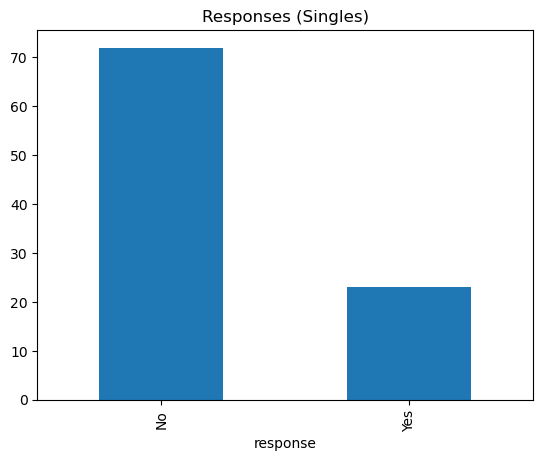

,response,justification
0,No,Amelia stated she probably wouldn't use Wander...
1,No,She explicitly says she probably wouldn't use ...
2,Yes,Ananya explicitly answered she would most like...
3,No,"He explicitly said he wouldn't use WanderLux, ..."
4,No,She prefers a food- and culture-focused trip (...
...,...,...
90,Yes,"Sophia explicitly answered ""Yes"" in the simula..."
91,No,She is a 42-year-old part-time CNA on a tight ...
92,No,Taylor explicitly answered 'No' because they p...
93,No,Prefers a modest restorative solo retreat or s...


In [10]:
extract_and_analyze_results(usa_singles, "Singles")


################# Analyzing results for Families... #################
2025-10-01 22:01:13,413 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
Extraction raw result message: {'content': '{"response": "No", "justification": "She explicitly said she wouldn\'t use WanderLux because she and her husband are on a tight retirement budget, are primary caregivers for young grandchildren (making adult-only properties impractical), the service does not emphasize childcare or family-friendly options, and she prefers shorter, affordable, family-oriented trips; she might consider it only if it offered vetted, reasonably priced family-friendly options."}', 'refusal': None, 'role': 'assistant', 'annotations': []}
2025-10-01 22:01:18,492 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
Extraction raw result message: {'content': '{"response": "Yes", "justification": "In the interaction (event #3) Amara explic

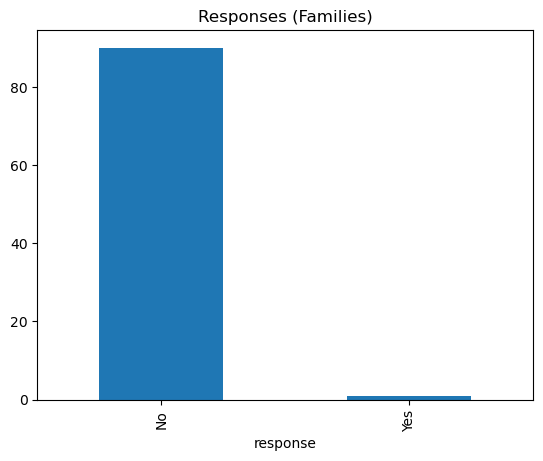

,response,justification
0,No,She explicitly said she wouldn't use WanderLux...
1,Yes,In the interaction (event #3) Amara explicitly...
2,No,"Agent explicitly said ""No. I wouldn't use Wand..."
3,No,Arden said No because as a part-time student w...
4,No,Ari explained they have two young children (ag...
...,...,...
86,No,"Victoria explicitly answered 'No', explaining ..."
87,No,No — as a parent of two young children and som...
88,No,"The agent explicitly answered: ""No. I wouldn’t..."
89,No,Zara is a 22-year-old stay-at-home dad with tw...


In [11]:
extract_and_analyze_results(usa_families, "Families")

################# Analyzing results for Couples... #################
2025-10-01 22:10:46,230 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
Extraction raw result message: {'content': '{"response": "No", "justification": "Alex explicitly answered \'No\' — they are 14, money is tight, the service is adult-focused and likely expensive/not kid-friendly, and they prefer cheaper, local trips; they might consider such a service only in the future if older or with more money."}', 'refusal': None, 'role': 'assistant', 'annotations': []}
2025-10-01 22:10:53,561 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
Extraction raw result message: {'content': '{"response":"No","justification":"He explicitly answered \'No\'. He and his wife prefer active, outdoors-focused vacations (backpacking, national parks, kayaking) and would choose such a trip if they had only one vacation next year. He appreciates Wan

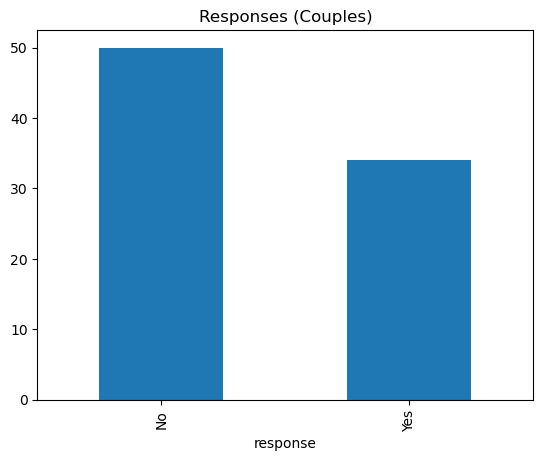

,response,justification
0,No,"Alex explicitly answered 'No' — they are 14, m..."
1,No,He explicitly answered 'No'. He and his wife p...
2,Yes,Ava explicitly answered 'Yes' in the simulatio...
3,No,"She is on a modest retirement budget, prefers ..."
4,No,"Bernice explicitly answered 'No'—she is 72, re..."
...,...,...
79,No,Walter explicitly said 'No' — he can't justify...
80,No,He explicitly said he wouldn’t use WanderLux b...
81,No,"Yvonne explicitly answered 'No' — she is 72, r..."
82,Yes,The agent explicitly responded 'Yes' and state...


In [12]:
extract_and_analyze_results(usa_couples, "Couples")